In [3]:
name = "Ricardo Hideki Hangai Kojo"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Ricardo Hideki Hangai Kojo

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [5]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


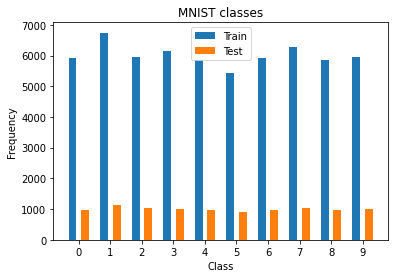

In [6]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

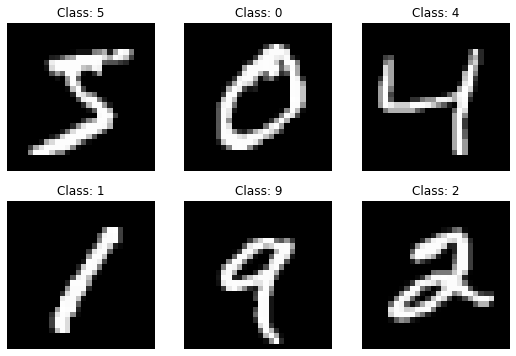

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [8]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

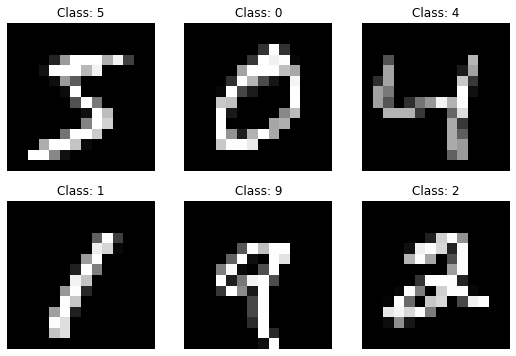

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [10]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))

float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


---

# Solution

## 0. Lib versions

In [11]:
print('numpy version:', np.__version__)

import matplotlib
print('matplotlib version:', matplotlib.__version__)
del matplotlib

import tensorflow
print('tensorflow version: ', tensorflow.__version__)
del tensorflow

import sklearn
print('scikit-learn version:', sklearn.__version__)
del sklearn

numpy version: 1.19.5
matplotlib version: 3.4.1
tensorflow version:  2.5.0
scikit-learn version: 0.24.2


## 1. Dataset preparation

In [12]:
from sklearn.model_selection import train_test_split

D_X_train, D_X_val, D_y_train, D_y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

print(D_X_train.shape)
print(D_X_val.shape)

print(D_y_train.shape)
print(D_y_val.shape)

(42000, 196)
(18000, 196)
(42000,)
(18000,)


In [13]:
def print_distribution(y_train, y_test, train_label, test_label):
    """
    Plots distribution of train and test answers
    :param y_train: answers for train set
    :type y_train: np.ndarray(shape=(M,))
    :param y_test: answers for test set
    :type y_test: np.ndarray(shape=(N,))
    :param train_label: label shown for train set 
    :type train_label: str
    :param test_label: label shown for test set 
    :type test_label: str
    :return: nothing
    :rtype: None
    """

    labels = ["%s"%i for i in range(10)]

    unique, counts = np.unique(y_train, return_counts=True)
    uniquet, countst = np.unique(y_test, return_counts=True)

    fig, ax = plt.subplots()
    rects1 = ax.bar(unique - 0.2, counts, 0.25, label=train_label)
    rects2 = ax.bar(unique + 0.2, countst, 0.25, label=test_label)
    ax.legend()
    ax.set_xticks(unique)
    ax.set_xticklabels(labels)

    plt.title('MNIST classes')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

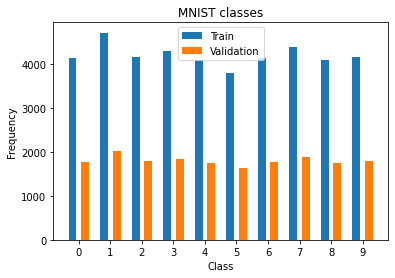

In [14]:
print_distribution(D_y_train, D_y_val, 'Train', 'Validation')

## 2. Training, evaluating and selecting models

### 2.1 Logistic regression

To train and evaluate a model using Logistic Regression, the method [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) was used. It implements the Logistic Regression function along with the Cross Validation Technique. It also applies regularization by default.

The hyperparameter is `C`, which is the inverse of the regularization strength (which we've seen in class as $\lambda$). The values chosen to be testes were `[0.01, 0.1, 1, 10, 100]`.

The Cross Validation technique applied is a Stratified K-fold with 5 folds.

The iterations number was increased due to no conversion error with default value (`100` iterations).

After fitting the data, **the chosen `C` value was `10`**.

The decisions for this sections were taken based on the following articles from SciKit Learn documentation: [about Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [LogisticRegression method docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [LogisticRegressionCV method docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html), [the whole section about model selection](https://scikit-learn.org/stable/model_selection.html) and usage examples such as [this one](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html).

In [28]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression_model = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10, 100],
    cv=5,
    max_iter=1000,
    random_state=42
).fit(D_X_train, D_y_train)

/home/kojo/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [30]:
print('Score for Logistic Regression model:', logistic_regression_model.score(D_X_train, D_y_train))
print('Chosen C parameter:', logistic_regression_model.C_)

Score for Logistic Regression model: 0.9172857142857143
Chosen C parameter: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


### 2.2 Neural network



https://johdev.com/jupyter/2020/03/02/Sklearn_MLP_for_MNIST.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html
https://scikit-learn.org/stable/modules/neural_networks_supervised.html
https://scikit-learn.org/stable/modules/grid_search.html
https://nasirml.wordpress.com/2017/12/16/multi-layer-perceptron-in-tensorflow-part-2-mnist/

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

param_grid = {
    'hidden_layer_sizes': [(10,), (100,), (196,), (196, 98)],
    'activation': ['tanh', 'relu'],
    'alpha': [1e-3, 1e-4, 1e-5],
    'learning_rate_init': [0.1, 0.01, 0.001],
    'max_iter': [10, 50, 100, 200],
}
base_neural_network = MLPClassifier(early_stopping=True, random_state=42, verbose=True)
sh = HalvingRandomSearchCV(base_neural_network, param_grid, random_state=42).fit(D_X_train, D_y_train)

/home/kojo/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 288 is smaller than n_iter=420. Running 288 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn

Iteration 1, loss = 2.44115875
Validation score: 0.000000
Iteration 2, loss = 2.19106116
Validation score: 0.250000
Iteration 3, loss = 1.53465699
Validation score: 0.125000
Iteration 4, loss = 1.45041019
Validation score: 0.250000
Iteration 5, loss = 1.22241346
Validation score: 0.250000
Iteration 6, loss = 0.97464290
Validation score: 0.250000
Iteration 7, loss = 0.83175659
Validation score: 0.250000
Iteration 8, loss = 0.71573552
Validation score: 0.125000
Iteration 9, loss = 0.58686129
Validation score: 0.125000
Iteration 10, loss = 0.44315571
Validation score: 0.250000
Iteration 1, loss = 2.38830739
Validation score: 0.375000
Iteration 2, loss = 1.75690218
Validation score: 0.125000
Iteration 3, loss = 1.36633417
Validation score: 0.250000
Iteration 4, loss = 1.03586152
Validation score: 0.250000
Iteration 5, loss = 0.76810007
Validation score: 0.250000
Iteration 6, loss = 0.60122811
Validation score: 0.250000
Iteration 7, loss = 0.45084539
Validation score: 0.250000
Iteration 8, 

Iteration 1, loss = 2.37875369
Validation score: 0.125000
Iteration 2, loss = 1.82444878
Validation score: 0.375000
Iteration 3, loss = 1.44917207
Validation score: 0.625000
Iteration 4, loss = 1.10898604
Validation score: 0.625000
Iteration 5, loss = 0.82546074
Validation score: 0.625000
Iteration 6, loss = 0.59493184
Validation score: 0.500000
Iteration 7, loss = 0.44260038
Validation score: 0.625000
Iteration 8, loss = 0.32764762
Validation score: 0.625000
Iteration 9, loss = 0.24276451
Validation score: 0.750000
Iteration 10, loss = 0.18398323
Validation score: 0.750000
Iteration 11, loss = 0.14028530
Validation score: 0.750000
Iteration 12, loss = 0.10581197
Validation score: 0.750000
Iteration 13, loss = 0.07962790
Validation score: 0.750000
Iteration 14, loss = 0.06183857
Validation score: 0.750000
Iteration 15, loss = 0.04996249
Validation score: 0.750000
Iteration 16, loss = 0.04127320
Validation score: 0.625000
Iteration 17, loss = 0.03415095
Validation score: 0.500000
Iterat

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 10, loss = 1.40133867
Validation score: 0.500000
Iteration 1, loss = 2.35234772
Validation score: 0.000000
Iteration 2, loss = 2.16392794
Validation score: 0.000000
Iteration 3, loss = 2.00695872
Validation score: 0.000000
Iteration 4, loss = 1.87823033
Validation score: 0.000000
Iteration 5, loss = 1.77169597
Validation score: 0.000000
Iteration 6, loss = 1.67944148
Validation score: 0.125000
Iteration 7, loss = 1.59537280
Validation score: 0.125000
Iteration 8, loss = 1.51609353
Validation score: 0.125000
Iteration 9, loss = 1.43998084
Validation score: 0.125000
Iteration 10, loss = 1.36630229
Validation score: 0.125000
Iteration 1, loss = 2.44115875
Validation score: 0.000000
Iteration 2, loss = 2.25930454
Validation score: 0.000000
Iteration 3, loss = 2.11572602
Validation score: 0.125000
Iteration 4, loss = 1.98994605
Validation score: 0.125000
Iteration 5, loss = 1.87337812
Validation score: 0.125000
Iteration 6, loss = 1.76366225
Validation score: 0.125000
Iteration 7,

Iteration 18, loss = 0.92900400
Validation score: 0.500000
Iteration 19, loss = 0.88180926
Validation score: 0.500000
Iteration 20, loss = 0.83573466
Validation score: 0.500000
Iteration 21, loss = 0.79090259
Validation score: 0.500000
Iteration 22, loss = 0.74763714
Validation score: 0.500000
Iteration 23, loss = 0.70626383
Validation score: 0.500000
Iteration 24, loss = 0.66697441
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35234772
Validation score: 0.000000
Iteration 2, loss = 2.16392794
Validation score: 0.000000
Iteration 3, loss = 2.00695872
Validation score: 0.000000
Iteration 4, loss = 1.87823033
Validation score: 0.000000
Iteration 5, loss = 1.77169597
Validation score: 0.000000
Iteration 6, loss = 1.67944148
Validation score: 0.125000
Iteration 7, loss = 1.59537280
Validation score: 0.125000
Iteration 8, loss = 1.51609353
Validation score: 0.125000
Iteration 9, loss = 1.43998084

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 3, loss = 2.35464523
Validation score: 0.000000
Iteration 4, loss = 2.33816863
Validation score: 0.000000
Iteration 5, loss = 2.32191775
Validation score: 0.000000
Iteration 6, loss = 2.30588435
Validation score: 0.000000
Iteration 7, loss = 2.29006078
Validation score: 0.000000
Iteration 8, loss = 2.27443858
Validation score: 0.000000
Iteration 9, loss = 2.25901032
Validation score: 0.000000
Iteration 10, loss = 2.24376773
Validation score: 0.000000
Iteration 11, loss = 2.22870383
Validation score: 0.000000
Iteration 12, loss = 2.21380993
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37875369
Validation score: 0.000000
Iteration 2, loss = 2.36000470
Validation score: 0.000000
Iteration 3, loss = 2.34151763
Validation score: 0.000000
Iteration 4, loss = 2.32329591
Validation score: 0.000000
Iteration 5, loss = 2.30534250
Validation score: 0.000000
Iteration 6, loss = 2.28765594
Val

Iteration 2, loss = 1.51953350
Validation score: 0.375000
Iteration 3, loss = 4.23457676
Validation score: 0.375000
Iteration 4, loss = 1.80810792
Validation score: 0.375000
Iteration 5, loss = 0.71091914
Validation score: 0.250000
Iteration 6, loss = 1.05032052
Validation score: 0.250000
Iteration 7, loss = 0.49536246
Validation score: 0.375000
Iteration 8, loss = 0.20855860
Validation score: 0.500000
Iteration 9, loss = 0.13152078
Validation score: 0.375000
Iteration 10, loss = 0.13969653
Validation score: 0.500000
Iteration 1, loss = 2.41962633
Validation score: 0.250000
Iteration 2, loss = 1.79313597
Validation score: 0.500000
Iteration 3, loss = 3.41107501
Validation score: 0.250000
Iteration 4, loss = 2.27858635
Validation score: 0.250000
Iteration 5, loss = 0.91443271
Validation score: 0.125000
Iteration 6, loss = 1.42819691
Validation score: 0.125000
Iteration 7, loss = 0.41249749
Validation score: 0.500000
Iteration 8, loss = 0.18714036
Validation score: 0.500000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.04116251
Validation score: 0.500000
Iteration 1, loss = 2.43190245
Validation score: 0.125000
Iteration 2, loss = 1.60744454
Validation score: 0.125000
Iteration 3, loss = 2.32579588
Validation score: 0.250000
Iteration 4, loss = 1.62039619
Validation score: 0.250000
Iteration 5, loss = 0.73955555
Validation score: 0.250000
Iteration 6, loss = 0.35460762
Validation score: 0.125000
Iteration 7, loss = 0.25115041
Validation score: 0.375000
Iteration 8, loss = 0.07466538
Validation score: 0.500000
Iteration 9, loss = 0.03766817
Validation score: 0.625000
Iteration 10, loss = 0.06671259
Validation score: 0.625000
Iteration 1, loss = 2.36207569
Validation score: 0.125000
Iteration 2, loss = 2.22415268
Validation score: 0.375000
Iteration 3, loss = 2.20338677
Validation score: 0.250000
Iteration 4, loss = 3.77493811
Validation score: 0.500000
Iteration 5, loss = 1.99230833
Validation score: 0.375000
Iteration 6, loss = 0.55215693
Validation score: 0.250000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.87530350
Validation score: 0.375000
Iteration 8, loss = 0.83348046
Validation score: 0.375000
Iteration 9, loss = 0.21209395
Validation score: 0.500000
Iteration 10, loss = 0.07022720
Validation score: 0.750000
Iteration 1, loss = 2.41364404
Validation score: 0.250000
Iteration 2, loss = 1.51953350
Validation score: 0.375000
Iteration 3, loss = 4.23457676
Validation score: 0.375000
Iteration 4, loss = 1.80810792
Validation score: 0.375000
Iteration 5, loss = 0.71091914
Validation score: 0.250000
Iteration 6, loss = 1.05032052
Validation score: 0.250000
Iteration 7, loss = 0.49536246
Validation score: 0.375000
Iteration 8, loss = 0.20855860
Validation score: 0.500000
Iteration 9, loss = 0.13152078
Validation score: 0.375000
Iteration 10, loss = 0.13969653
Validation score: 0.500000
Iteration 11, loss = 0.15263060
Validation score: 0.500000
Iteration 12, loss = 0.08436329
Validation score: 0.500000
Iteration 13, loss = 0.04141982
Validation score: 0.500000
Iteration

Iteration 9, loss = 0.21209395
Validation score: 0.500000
Iteration 10, loss = 0.07022720
Validation score: 0.750000
Iteration 11, loss = 0.13182886
Validation score: 0.750000
Iteration 12, loss = 0.12421144
Validation score: 0.500000
Iteration 13, loss = 0.05555361
Validation score: 0.500000
Iteration 14, loss = 0.04650333
Validation score: 0.500000
Iteration 15, loss = 0.04140948
Validation score: 0.375000
Iteration 16, loss = 0.03483803
Validation score: 0.375000
Iteration 17, loss = 0.03290600
Validation score: 0.375000
Iteration 18, loss = 0.03371707
Validation score: 0.500000
Iteration 19, loss = 0.03424801
Validation score: 0.500000
Iteration 20, loss = 0.03273773
Validation score: 0.500000
Iteration 21, loss = 0.03080300
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41364404
Validation score: 0.250000
Iteration 2, loss = 1.51953350
Validation score: 0.375000
Iteration 3, loss = 4.234

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 9, loss = 0.21451856
Validation score: 0.500000
Iteration 10, loss = 0.15716995
Validation score: 0.375000
Iteration 1, loss = 2.43190245
Validation score: 0.125000
Iteration 2, loss = 1.77906782
Validation score: 0.125000
Iteration 3, loss = 1.34481059
Validation score: 0.250000
Iteration 4, loss = 1.00167469
Validation score: 0.375000
Iteration 5, loss = 0.73209846
Validation score: 0.375000
Iteration 6, loss = 0.53256747
Validation score: 0.375000
Iteration 7, loss = 0.38798732
Validation score: 0.375000
Iteration 8, loss = 0.28090520
Validation score: 0.500000
Iteration 9, loss = 0.20171765
Validation score: 0.500000
Iteration 10, loss = 0.14437818
Validation score: 0.500000
Iteration 1, loss = 2.36207569
Validation score: 0.000000
Iteration 2, loss = 1.71654791
Validation score: 0.250000
Iteration 3, loss = 1.30870543
Validation score: 0.375000
Iteration 4, loss = 1.00787599
Validation score: 0.375000
Iteration 5, loss = 0.76218387
Validation score: 0.375000
Iteration 6,

Iteration 19, loss = 0.01100662
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36207569
Validation score: 0.000000
Iteration 2, loss = 1.71654791
Validation score: 0.250000
Iteration 3, loss = 1.30870543
Validation score: 0.375000
Iteration 4, loss = 1.00787599
Validation score: 0.375000
Iteration 5, loss = 0.76218387
Validation score: 0.375000
Iteration 6, loss = 0.56299096
Validation score: 0.375000
Iteration 7, loss = 0.41742707
Validation score: 0.375000
Iteration 8, loss = 0.31502833
Validation score: 0.375000
Iteration 9, loss = 0.23885803
Validation score: 0.375000
Iteration 10, loss = 0.17908667
Validation score: 0.375000
Iteration 11, loss = 0.13220522
Validation score: 0.375000
Iteration 12, loss = 0.09656749
Validation score: 0.375000
Iteration 13, loss = 0.07037321
Validation score: 0.375000
Iteration 14, loss = 0.05156695
Validation score: 0.375000
Validation score did not improv

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 8, loss = 1.92552067
Validation score: 0.250000
Iteration 9, loss = 1.86431082
Validation score: 0.250000
Iteration 10, loss = 1.80537497
Validation score: 0.375000
Iteration 1, loss = 2.36207569
Validation score: 0.250000
Iteration 2, loss = 2.27636006
Validation score: 0.125000
Iteration 3, loss = 2.19512214
Validation score: 0.125000
Iteration 4, loss = 2.11818857
Validation score: 0.125000
Iteration 5, loss = 2.04531165
Validation score: 0.000000
Iteration 6, loss = 1.97618943
Validation score: 0.000000
Iteration 7, loss = 1.91050593
Validation score: 0.000000
Iteration 8, loss = 1.84795027
Validation score: 0.000000
Iteration 9, loss = 1.78822723
Validation score: 0.000000
Iteration 10, loss = 1.73106682
Validation score: 0.125000
Iteration 1, loss = 2.41364404
Validation score: 0.125000
Iteration 2, loss = 2.32722957
Validation score: 0.125000
Iteration 3, loss = 2.24680858
Validation score: 0.250000
Iteration 4, loss = 2.17156826
Validation score: 0.250000
Iteration 5,

Iteration 10, loss = 1.81747538
Validation score: 0.000000
Iteration 11, loss = 1.76107803
Validation score: 0.000000
Iteration 12, loss = 1.70629156
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43190245
Validation score: 0.125000
Iteration 2, loss = 2.34991056
Validation score: 0.000000
Iteration 3, loss = 2.27144593
Validation score: 0.000000
Iteration 4, loss = 2.19634090
Validation score: 0.125000
Iteration 5, loss = 2.12439037
Validation score: 0.125000
Iteration 6, loss = 2.05539282
Validation score: 0.125000
Iteration 7, loss = 1.98916049
Validation score: 0.125000
Iteration 8, loss = 1.92552067
Validation score: 0.250000
Iteration 9, loss = 1.86431082
Validation score: 0.250000
Iteration 10, loss = 1.80537497
Validation score: 0.375000
Iteration 11, loss = 1.74855734
Validation score: 0.375000
Iteration 12, loss = 1.69370514
Validation score: 0.375000
Iteration 13, loss = 1.64066896

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net


Validation score: 0.625000
Iteration 1, loss = 2.33736400
Validation score: 0.625000
Iteration 2, loss = 1.97355151
Validation score: 0.250000
Iteration 3, loss = 4.67319831
Validation score: 0.375000
Iteration 4, loss = 2.68563360
Validation score: 0.375000
Iteration 5, loss = 2.15610821
Validation score: 0.500000
Iteration 6, loss = 0.54482355
Validation score: 0.250000
Iteration 7, loss = 0.91845470
Validation score: 0.375000
Iteration 8, loss = 0.61991157
Validation score: 0.375000
Iteration 9, loss = 0.10594628
Validation score: 0.750000
Iteration 10, loss = 0.03842689
Validation score: 0.750000
Iteration 1, loss = 2.32617443
Validation score: 0.250000
Iteration 2, loss = 2.21951305
Validation score: 0.125000
Iteration 3, loss = 5.63054736
Validation score: 0.000000
Iteration 4, loss = 5.02965632
Validation score: 0.625000
Iteration 5, loss = 2.68970863
Validation score: 0.875000
Iteration 6, loss = 1.96629731
Validation score: 0.875000
Iteration 7, loss = 0.80936572
Validation s

Iteration 5, loss = 2.51408277
Validation score: 0.375000
Iteration 6, loss = 1.88996254
Validation score: 0.250000
Iteration 7, loss = 1.88230252
Validation score: 0.500000
Iteration 8, loss = 1.00589744
Validation score: 0.500000
Iteration 9, loss = 0.73584046
Validation score: 0.625000
Iteration 10, loss = 0.45801601
Validation score: 0.625000
Iteration 11, loss = 0.16215610
Validation score: 0.625000
Iteration 12, loss = 0.05106668
Validation score: 0.750000
Iteration 13, loss = 0.11375767
Validation score: 0.375000
Iteration 14, loss = 0.15650105
Validation score: 0.375000
Iteration 15, loss = 0.06557142
Validation score: 0.500000
Iteration 16, loss = 0.04462526
Validation score: 0.375000
Iteration 17, loss = 0.04706347
Validation score: 0.250000
Iteration 18, loss = 0.05101137
Validation score: 0.250000
Iteration 19, loss = 0.05135136
Validation score: 0.250000
Iteration 20, loss = 0.05124225
Validation score: 0.375000
Iteration 21, loss = 0.05267072
Validation score: 0.375000
It

Iteration 8, loss = 0.83872671
Validation score: 0.375000
Iteration 9, loss = 0.89394594
Validation score: 0.500000
Iteration 10, loss = 0.21215119
Validation score: 0.625000
Iteration 11, loss = 0.08111726
Validation score: 0.750000
Iteration 12, loss = 0.08992572
Validation score: 0.625000
Iteration 13, loss = 0.06355086
Validation score: 0.750000
Iteration 14, loss = 0.05129149
Validation score: 0.625000
Iteration 15, loss = 0.05984706
Validation score: 0.625000
Iteration 16, loss = 0.06251056
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34905796
Validation score: 0.250000
Iteration 2, loss = 3.39637396
Validation score: 0.625000
Iteration 3, loss = 5.69371721
Validation score: 0.125000
Iteration 4, loss = 5.96167248
Validation score: 0.125000
Iteration 5, loss = 4.45749912
Validation score: 0.875000
Iteration 6, loss = 1.78459969
Validation score: 0.875000
Iteration 7, loss = 1.69985133

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35535941
Validation score: 0.250000
Iteration 2, loss = 1.58880049
Validation score: 0.250000
Iteration 3, loss = 1.04125763
Validation score: 0.500000
Iteration 4, loss = 0.67754447
Validation score: 0.625000
Iteration 5, loss = 0.45944437
Validation score: 0.625000
Iteration 6, loss = 0.31696512
Validation score: 0.625000
Iteration 7, loss = 0.21137711
Validation score: 0.625000
Iteration 8, loss = 0.13895595
Validation score: 0.625000
Iteration 9, loss = 0.09335348
Validation score: 0.625000
Iteration 10, loss = 0.06451269
Validation score: 0.625000
Iteration 1, loss = 2.33736400
Validation score: 0.500000
Iteration 2, loss = 1.54197175
Validation score: 0.625000
Iteration 3, loss = 0.99671303
Validation score: 0.625000
Iteration 4, loss = 0.63349245
Validation score: 0.750000
Iteration 5, loss = 0.40042292
Validation score: 0.750000
Iteration 6, loss = 0.25903877
Validation score: 0.750000
Iteration 7, loss = 0.16909987
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.07960415
Validation score: 0.875000
Iteration 1, loss = 2.41132123
Validation score: 0.125000
Iteration 2, loss = 1.72508555
Validation score: 0.250000
Iteration 3, loss = 1.11036315
Validation score: 0.250000
Iteration 4, loss = 0.78015138
Validation score: 0.500000
Iteration 5, loss = 0.53160069
Validation score: 0.625000
Iteration 6, loss = 0.36888461
Validation score: 0.750000
Iteration 7, loss = 0.26642080
Validation score: 0.750000
Iteration 8, loss = 0.19134745
Validation score: 0.750000
Iteration 9, loss = 0.13316664
Validation score: 0.750000
Iteration 10, loss = 0.09144728
Validation score: 0.625000
Iteration 11, loss = 0.06409698
Validation score: 0.625000
Iteration 12, loss = 0.04701491
Validation score: 0.625000
Iteration 13, loss = 0.03629945
Validation score: 0.625000
Iteration 14, loss = 0.02912456
Validation score: 0.625000
Iteration 15, loss = 0.02378101
Validation score: 0.625000
Iteration 16, loss = 0.01944258
Validation score: 0.625000
Iterat

Iteration 15, loss = 0.01081108
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32617443
Validation score: 0.125000
Iteration 2, loss = 1.56213945
Validation score: 0.500000
Iteration 3, loss = 1.05192762
Validation score: 0.750000
Iteration 4, loss = 0.68358117
Validation score: 0.625000
Iteration 5, loss = 0.44273030
Validation score: 0.750000
Iteration 6, loss = 0.28998101
Validation score: 0.750000
Iteration 7, loss = 0.19514761
Validation score: 0.750000
Iteration 8, loss = 0.13220548
Validation score: 0.750000
Iteration 9, loss = 0.08640111
Validation score: 0.750000
Iteration 10, loss = 0.05438841
Validation score: 0.750000
Iteration 11, loss = 0.03412445
Validation score: 0.750000
Iteration 12, loss = 0.02228577
Validation score: 0.750000
Iteration 13, loss = 0.01562402
Validation score: 0.875000
Iteration 14, loss = 0.01183686
Validation score: 0.875000
Iteration 15, loss = 0.00956576

Iteration 9, loss = 1.61480375
Validation score: 0.125000
Iteration 10, loss = 1.54103618
Validation score: 0.125000
Iteration 1, loss = 2.35535941
Validation score: 0.125000
Iteration 2, loss = 2.25058982
Validation score: 0.125000
Iteration 3, loss = 2.15127704
Validation score: 0.125000
Iteration 4, loss = 2.05695770
Validation score: 0.250000
Iteration 5, loss = 1.96715382
Validation score: 0.250000
Iteration 6, loss = 1.88140152
Validation score: 0.250000
Iteration 7, loss = 1.79928419
Validation score: 0.250000
Iteration 8, loss = 1.72045311
Validation score: 0.250000
Iteration 9, loss = 1.64463247
Validation score: 0.250000
Iteration 10, loss = 1.57162454
Validation score: 0.375000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33736400
Validation score: 0.000000
Iteration 2, loss = 2.22888538
Validation score: 0.000000
Iteration 3, loss = 2.12657077
Validation score: 0.000000
Iteration 4, loss = 2.02977497
Validation score: 0.000000
Iteration 5, loss = 1.93788119
Validation score: 0.000000
Iteration 6, loss = 1.85033146
Validation score: 0.000000
Iteration 7, loss = 1.76664526
Validation score: 0.250000
Iteration 8, loss = 1.68643383
Validation score: 0.375000
Iteration 9, loss = 1.60939866
Validation score: 0.625000
Iteration 10, loss = 1.53532424
Validation score: 0.625000
Iteration 1, loss = 2.32617443
Validation score: 0.000000
Iteration 2, loss = 2.21458896
Validation score: 0.000000
Iteration 3, loss = 2.11045143
Validation score: 0.000000
Iteration 4, loss = 2.01306951
Validation score: 0.000000
Iteration 5, loss = 1.92167616
Validation score: 0.000000
Iteration 6, loss = 1.83547201
Validation score: 0.125000
Iteration 7, loss = 1.75371068
Validation score: 0.125000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.000000
Iteration 2, loss = 2.22878686
Validation score: 0.000000
Iteration 3, loss = 2.11864192
Validation score: 0.000000
Iteration 4, loss = 2.01762255
Validation score: 0.000000
Iteration 5, loss = 1.92442423
Validation score: 0.125000
Iteration 6, loss = 1.83760863
Validation score: 0.375000
Iteration 7, loss = 1.75588642
Validation score: 0.500000
Iteration 8, loss = 1.67827192
Validation score: 0.625000
Iteration 9, loss = 1.60411115
Validation score: 0.625000
Iteration 10, loss = 1.53301627
Validation score: 0.750000
Iteration 1, loss = 2.41132123
Validation score: 0.000000
Iteration 2, loss = 2.28208724
Validation score: 0.000000
Iteration 3, loss = 2.16212899
Validation score: 0.000000
Iteration 4, loss = 2.05165131
Validation score: 0.125000
Iteration 5, loss = 1.95043772
Validation score: 0.125000
Iteration 6, loss = 1.85763291
Validation score: 0.125000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.77183289
Validation score: 0.125000
Iteration 8, loss = 1.69138907
Validation score: 0.125000
Iteration 9, loss = 1.61480375
Validation score: 0.125000
Iteration 10, loss = 1.54103618
Validation score: 0.125000
Iteration 11, loss = 1.46960568
Validation score: 0.125000
Iteration 12, loss = 1.40049628
Validation score: 0.125000
Iteration 13, loss = 1.33394841
Validation score: 0.125000
Iteration 14, loss = 1.27024127
Validation score: 0.125000
Iteration 15, loss = 1.20954030
Validation score: 0.250000
Iteration 16, loss = 1.15183848
Validation score: 0.250000
Iteration 17, loss = 1.09698661
Validation score: 0.375000
Iteration 18, loss = 1.04476938
Validation score: 0.375000
Iteration 19, loss = 0.99498311
Validation score: 0.375000
Iteration 20, loss = 0.94748134
Validation score: 0.500000
Iteration 21, loss = 0.90218120
Validation score: 0.500000
Iteration 22, loss = 0.85904485
Validation score: 0.500000
Iteration 23, loss = 0.81804864
Validation score: 0.500000


Iteration 15, loss = 1.21796298
Validation score: 0.750000
Iteration 16, loss = 1.16236926
Validation score: 0.750000
Iteration 17, loss = 1.10906895
Validation score: 0.750000
Iteration 18, loss = 1.05800580
Validation score: 0.750000
Iteration 19, loss = 1.00913613
Validation score: 0.750000
Iteration 20, loss = 0.96242264
Validation score: 0.750000
Iteration 21, loss = 0.91782908
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41132123
Validation score: 0.000000
Iteration 2, loss = 2.28208724
Validation score: 0.000000
Iteration 3, loss = 2.16212899
Validation score: 0.000000
Iteration 4, loss = 2.05165131
Validation score: 0.125000
Iteration 5, loss = 1.95043772
Validation score: 0.125000
Iteration 6, loss = 1.85763291
Validation score: 0.125000
Iteration 7, loss = 1.77183289
Validation score: 0.125000
Iteration 8, loss = 1.69138907
Validation score: 0.125000
Iteration 9, loss = 1.61480375

Iteration 5, loss = 1.92442423
Validation score: 0.125000
Iteration 6, loss = 1.83760863
Validation score: 0.375000
Iteration 7, loss = 1.75588642
Validation score: 0.500000
Iteration 8, loss = 1.67827192
Validation score: 0.625000
Iteration 9, loss = 1.60411115
Validation score: 0.625000
Iteration 10, loss = 1.53301627
Validation score: 0.750000
Iteration 11, loss = 1.46476891
Validation score: 0.750000
Iteration 12, loss = 1.39923492
Validation score: 0.750000
Iteration 13, loss = 1.33631438
Validation score: 0.750000
Iteration 14, loss = 1.27591858
Validation score: 0.750000
Iteration 15, loss = 1.21796298
Validation score: 0.750000
Iteration 16, loss = 1.16236926
Validation score: 0.750000
Iteration 17, loss = 1.10906895
Validation score: 0.750000
Iteration 18, loss = 1.05800580
Validation score: 0.750000
Iteration 19, loss = 1.00913613
Validation score: 0.750000
Iteration 20, loss = 0.96242264
Validation score: 0.750000
Iteration 21, loss = 0.91782908
Validation score: 0.750000
Va

Validation score: 0.000000
Iteration 5, loss = 1.92442423
Validation score: 0.125000
Iteration 6, loss = 1.83760863
Validation score: 0.375000
Iteration 7, loss = 1.75588642
Validation score: 0.500000
Iteration 8, loss = 1.67827192
Validation score: 0.625000
Iteration 9, loss = 1.60411115
Validation score: 0.625000
Iteration 10, loss = 1.53301627
Validation score: 0.750000
Iteration 11, loss = 1.46476891
Validation score: 0.750000
Iteration 12, loss = 1.39923492
Validation score: 0.750000
Iteration 13, loss = 1.33631438
Validation score: 0.750000
Iteration 14, loss = 1.27591858
Validation score: 0.750000
Iteration 15, loss = 1.21796298
Validation score: 0.750000
Iteration 16, loss = 1.16236926
Validation score: 0.750000
Iteration 17, loss = 1.10906895
Validation score: 0.750000
Iteration 18, loss = 1.05800580
Validation score: 0.750000
Iteration 19, loss = 1.00913613
Validation score: 0.750000
Iteration 20, loss = 0.96242264
Validation score: 0.750000
Iteration 21, loss = 0.91782908
Va

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39562069
Validation score: 0.500000
Iteration 2, loss = 1.40299171
Validation score: 0.250000
Iteration 3, loss = 4.12311886
Validation score: 0.125000
Iteration 4, loss = 5.30632375
Validation score: 0.125000
Iteration 5, loss = 5.82956950
Validation score: 0.125000
Iteration 6, loss = 7.28046046
Validation score: 0.250000
Iteration 7, loss = 7.34884574
Validation score: 0.000000
Iteration 8, loss = 7.56463612
Validation score: 0.000000
Iteration 9, loss = 6.86807387
Validation score: 0.125000
Iteration 10, loss = 7.30830094
Validation score: 0.125000
Iteration 1, loss = 2.42282203
Validation score: 0.000000
Iteration 2, loss = 2.47000459
Validation score: 0.000000
Iteration 3, loss = 4.72922551
Validation score: 0.250000
Iteration 4, loss = 4.93319986
Validation score: 0.000000
Iteration 5, loss = 5.91331440
Validation score: 0.000000
Iteration 6, loss = 7.39226628
Validation score: 0.125000
Iteration 7, loss = 6.84526342
Validation score: 0.250000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 3.66454568
Validation score: 0.250000
Iteration 10, loss = 3.64366460
Validation score: 0.000000
Iteration 1, loss = 2.40552852
Validation score: 0.500000
Iteration 2, loss = 2.55044823
Validation score: 0.000000
Iteration 3, loss = 6.34333586
Validation score: 0.000000
Iteration 4, loss = 6.28358794
Validation score: 0.125000
Iteration 5, loss = 5.95112386
Validation score: 0.125000
Iteration 6, loss = 5.83477055
Validation score: 0.000000
Iteration 7, loss = 6.76028351
Validation score: 0.625000
Iteration 8, loss = 7.70743691
Validation score: 0.625000
Iteration 9, loss = 7.23771968
Validation score: 0.500000
Iteration 10, loss = 5.40320417
Validation score: 0.125000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.36191615
Validation score: 0.000000
Iteration 2, loss = 5.34482124
Validation score: 0.125000
Iteration 3, loss = 5.80106123
Validation score: 0.250000
Iteration 4, loss = 4.21814131
Validation score: 0.000000
Iteration 5, loss = 5.17434685
Validation score: 0.125000
Iteration 6, loss = 6.24692596
Validation score: 0.250000
Iteration 7, loss = 6.26575280
Validation score: 0.000000
Iteration 8, loss = 4.82648409
Validation score: 0.000000
Iteration 9, loss = 5.81558814
Validation score: 0.000000
Iteration 10, loss = 5.68120167
Validation score: 0.125000
Iteration 11, loss = 4.81424448
Validation score: 0.250000
Iteration 12, loss = 3.38508789
Validation score: 0.250000
Iteration 13, loss = 3.41366700
Validation score: 0.500000
Iteration 14, loss = 4.15345258
Validation score: 0.375000
Iteration 15, loss = 4.47872907
Validation score: 0.500000
Iteration 16, loss = 3.42397423
Validation score: 0.500000
Iteration 17, loss = 1.97842377
Validation score: 0.125000
Iterat

Iteration 4, loss = 5.30632375
Validation score: 0.125000
Iteration 5, loss = 5.82956950
Validation score: 0.125000
Iteration 6, loss = 7.28046046
Validation score: 0.250000
Iteration 7, loss = 7.34884574
Validation score: 0.000000
Iteration 8, loss = 7.56463612
Validation score: 0.000000
Iteration 9, loss = 6.86807387
Validation score: 0.125000
Iteration 10, loss = 7.30830094
Validation score: 0.125000
Iteration 11, loss = 6.43753805
Validation score: 0.125000
Iteration 12, loss = 5.20052348
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42282203
Validation score: 0.000000
Iteration 2, loss = 2.47000459
Validation score: 0.000000
Iteration 3, loss = 4.72922551
Validation score: 0.250000
Iteration 4, loss = 4.93319986
Validation score: 0.000000
Iteration 5, loss = 5.91331440
Validation score: 0.000000
Iteration 6, loss = 7.39226628
Validation score: 0.125000
Iteration 7, loss = 6.84526342
Val

Iteration 10, loss = 0.07585444
Validation score: 0.500000
Iteration 1, loss = 2.34246035
Validation score: 0.375000
Iteration 2, loss = 1.46022444
Validation score: 0.250000
Iteration 3, loss = 0.89900161
Validation score: 0.500000
Iteration 4, loss = 0.55697882
Validation score: 0.625000
Iteration 5, loss = 0.31930210
Validation score: 0.625000
Iteration 6, loss = 0.19553726
Validation score: 0.500000
Iteration 7, loss = 0.12791930
Validation score: 0.375000
Iteration 8, loss = 0.08573917
Validation score: 0.500000
Iteration 9, loss = 0.06005658
Validation score: 0.500000
Iteration 10, loss = 0.04285281
Validation score: 0.500000
Iteration 1, loss = 2.39562069
Validation score: 0.250000
Iteration 2, loss = 1.40147839


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.625000
Iteration 3, loss = 0.87397751
Validation score: 0.750000
Iteration 4, loss = 0.49993654
Validation score: 0.750000
Iteration 5, loss = 0.24066421
Validation score: 0.625000
Iteration 6, loss = 0.16197357
Validation score: 0.625000
Iteration 7, loss = 0.10748873
Validation score: 0.625000
Iteration 8, loss = 0.05911667
Validation score: 0.625000
Iteration 9, loss = 0.03623154
Validation score: 0.625000
Iteration 10, loss = 0.02539901
Validation score: 0.750000
Iteration 1, loss = 2.42282203
Validation score: 0.125000
Iteration 2, loss = 1.52689940
Validation score: 0.750000
Iteration 3, loss = 0.90608391
Validation score: 0.375000
Iteration 4, loss = 0.53384062
Validation score: 0.500000
Iteration 5, loss = 0.30687374
Validation score: 0.750000
Iteration 6, loss = 0.17975652
Validation score: 0.750000
Iteration 7, loss = 0.10780466
Validation score: 0.625000
Iteration 8, loss = 0.06372153
Validation score: 0.625000
Iteration 9, loss = 0.03799282
Validation sc

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.40552852
Validation score: 0.625000
Iteration 2, loss = 1.50463849
Validation score: 0.375000
Iteration 3, loss = 0.97005848
Validation score: 0.500000
Iteration 4, loss = 0.54207892
Validation score: 0.750000
Iteration 5, loss = 0.31863639
Validation score: 0.750000
Iteration 6, loss = 0.20760618
Validation score: 0.750000
Iteration 7, loss = 0.12771985
Validation score: 0.625000
Iteration 8, loss = 0.07322550
Validation score: 0.625000
Iteration 9, loss = 0.04339945
Validation score: 0.625000
Iteration 10, loss = 0.02786089
Validation score: 0.625000
Iteration 1, loss = 2.36191615
Validation score: 0.000000
Iteration 2, loss = 2.14592414
Validation score: 0.500000
Iteration 3, loss = 1.02628050
Validation score: 0.500000
Iteration 4, loss = 0.79302787
Validation score: 0.625000
Iteration 5, loss = 0.55383224
Validation score: 0.500000
Iteration 6, loss = 0.33777746
Validation score: 0.500000
Iteration 7, loss = 0.22939811
Validation score: 0.625000
Iteration 8, 

Iteration 12, loss = 0.01355591
Validation score: 0.625000
Iteration 13, loss = 0.01070506
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40552852
Validation score: 0.625000
Iteration 2, loss = 1.50463849
Validation score: 0.375000
Iteration 3, loss = 0.97005848
Validation score: 0.500000
Iteration 4, loss = 0.54207892
Validation score: 0.750000
Iteration 5, loss = 0.31863639
Validation score: 0.750000
Iteration 6, loss = 0.20760618
Validation score: 0.750000
Iteration 7, loss = 0.12771985
Validation score: 0.625000
Iteration 8, loss = 0.07322550
Validation score: 0.625000
Iteration 9, loss = 0.04339945
Validation score: 0.625000
Iteration 10, loss = 0.02786089
Validation score: 0.625000
Iteration 11, loss = 0.01952378
Validation score: 0.750000
Iteration 12, loss = 0.01465966
Validation score: 0.750000
Iteration 13, loss = 0.01158539
Validation score: 0.750000
Iteration 14, loss = 0.00953942

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.30843329
Validation score: 0.375000
Iteration 10, loss = 1.21155825
Validation score: 0.375000
Iteration 1, loss = 2.39562069
Validation score: 0.125000
Iteration 2, loss = 2.21647356
Validation score: 0.250000
Iteration 3, loss = 2.05431275
Validation score: 0.500000
Iteration 4, loss = 1.90735579
Validation score: 0.625000
Iteration 5, loss = 1.77304508
Validation score: 0.625000
Iteration 6, loss = 1.64869116
Validation score: 0.625000
Iteration 7, loss = 1.53217549
Validation score: 0.625000
Iteration 8, loss = 1.42229866
Validation score: 0.625000
Iteration 9, loss = 1.31860630
Validation score: 0.625000
Iteration 10, loss = 1.22098141
Validation score: 0.625000
Iteration 1, loss = 2.42282203
Validation score: 0.375000
Iteration 2, loss = 2.22960845
Validation score: 0.375000
Iteration 3, loss = 2.06044589
Validation score: 0.250000
Iteration 4, loss = 1.91170752
Validation score: 0.250000
Iteration 5, loss = 1.77868999
Validation score: 0.250000
Iteration 6,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.54299538
Validation score: 0.750000
Iteration 8, loss = 1.43518973
Validation score: 0.750000
Iteration 9, loss = 1.33280258
Validation score: 0.750000
Iteration 10, loss = 1.23579442
Validation score: 0.750000
Iteration 1, loss = 2.40552852
Validation score: 0.375000
Iteration 2, loss = 2.20385820
Validation score: 0.500000
Iteration 3, loss = 2.02865470
Validation score: 0.750000
Iteration 4, loss = 1.87567805
Validation score: 0.875000
Iteration 5, loss = 1.73954281
Validation score: 0.875000
Iteration 6, loss = 1.61548231
Validation score: 0.875000
Iteration 7, loss = 1.50029286
Validation score: 0.875000
Iteration 8, loss = 1.39227052
Validation score: 0.875000
Iteration 9, loss = 1.29070578
Validation score: 0.875000
Iteration 10, loss = 1.19536134
Validation score: 0.875000
Iteration 1, loss = 2.36191615
Validation score: 0.125000

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 2.15126508
Validation score: 0.250000
Iteration 3, loss = 1.97810767
Validation score: 0.250000
Iteration 4, loss = 1.83885997
Validation score: 0.125000
Iteration 5, loss = 1.72180769
Validation score: 0.125000
Iteration 6, loss = 1.61339659
Validation score: 0.125000
Iteration 7, loss = 1.50645599
Validation score: 0.250000
Iteration 8, loss = 1.40075100
Validation score: 0.250000
Iteration 9, loss = 1.29908832
Validation score: 0.375000
Iteration 10, loss = 1.20394828
Validation score: 0.375000
Iteration 11, loss = 1.11612859
Validation score: 0.375000
Iteration 12, loss = 1.03505345
Validation score: 0.375000
Iteration 13, loss = 0.95971851
Validation score: 0.375000
Iteration 14, loss = 0.88935223
Validation score: 0.375000
Iteration 15, loss = 0.82356865
Validation score: 0.375000
Iteration 16, loss = 0.76222406
Validation score: 0.375000
Iteration 17, loss = 0.70522301
Validation score: 0.375000
Iteration 18, loss = 0.65239364
Validation score: 0.375000
Iter

Validation score: 0.500000
Iteration 14, loss = 0.88285723
Validation score: 0.625000
Iteration 15, loss = 0.81408619
Validation score: 0.625000
Iteration 16, loss = 0.75012046
Validation score: 0.625000
Iteration 17, loss = 0.69070023
Validation score: 0.625000
Iteration 18, loss = 0.63557079
Validation score: 0.625000
Iteration 19, loss = 0.58448150
Validation score: 0.625000
Iteration 20, loss = 0.53718924
Validation score: 0.625000
Iteration 21, loss = 0.49346325
Validation score: 0.625000
Iteration 22, loss = 0.45308939
Validation score: 0.625000
Iteration 23, loss = 0.41586868
Validation score: 0.625000
Iteration 24, loss = 0.38161368
Validation score: 0.625000
Iteration 25, loss = 0.35014386
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39562069
Validation score: 0.125000
Iteration 2, loss = 2.21647356
Validation score: 0.250000
Iteration 3, loss = 2.05431275
Validation score: 0.50000

Iteration 4, loss = 1.91170752
Validation score: 0.250000
Iteration 5, loss = 1.77868999
Validation score: 0.250000
Iteration 6, loss = 1.65688755
Validation score: 0.750000
Iteration 7, loss = 1.54299538
Validation score: 0.750000
Iteration 8, loss = 1.43518973
Validation score: 0.750000
Iteration 9, loss = 1.33280258
Validation score: 0.750000
Iteration 10, loss = 1.23579442
Validation score: 0.750000
Iteration 11, loss = 1.14431633
Validation score: 0.750000
Iteration 12, loss = 1.05845553
Validation score: 0.750000
Iteration 13, loss = 0.97814258
Validation score: 0.750000
Iteration 14, loss = 0.90316502
Validation score: 0.750000
Iteration 15, loss = 0.83322816
Validation score: 0.875000
Iteration 16, loss = 0.76802010
Validation score: 0.875000
Iteration 17, loss = 0.70725398
Validation score: 0.875000
Iteration 18, loss = 0.65067977
Validation score: 0.875000
Iteration 19, loss = 0.59807654
Validation score: 0.875000
Iteration 20, loss = 0.54923795
Validation score: 0.750000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 7, loss = 0.44960433
Validation score: 0.250000
Iteration 8, loss = 0.31416758
Validation score: 0.250000
Iteration 9, loss = 0.22112893
Validation score: 0.250000
Iteration 10, loss = 0.15697237
Validation score: 0.250000
Iteration 1, loss = 2.37856789
Validation score: 0.125000
Iteration 2, loss = 1.82421755
Validation score: 0.375000
Iteration 3, loss = 1.44878053
Validation score: 0.625000
Iteration 4, loss = 1.10841572
Validation score: 0.625000
Iteration 5, loss = 0.82467826
Validation score: 0.625000
Iteration 6, loss = 0.59390746
Validation score: 0.500000
Iteration 7, loss = 0.44134825
Validation score: 0.625000
Iteration 8, loss = 0.32614711
Validation score: 0.625000
Iteration 9, loss = 0.24100643
Validation score: 0.750000
Iteration 10, loss = 0.18197868
Validation score: 0.750000
Iteration 1, loss = 2.35396733
Validation score: 0.125000
Iteration 2, loss = 1.90723389
Validation score: 0.125000
Iteration 3, loss = 1.65197799
Validation score: 0.375000
Iteration 4,

Validation score: 0.750000
Iteration 14, loss = 0.05884604
Validation score: 0.750000
Iteration 15, loss = 0.04673640
Validation score: 0.750000
Iteration 16, loss = 0.03782904
Validation score: 0.625000
Iteration 17, loss = 0.03049948
Validation score: 0.500000
Iteration 18, loss = 0.02438523
Validation score: 0.500000
Iteration 19, loss = 0.01963464
Validation score: 0.500000
Iteration 20, loss = 0.01593808
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35396733
Validation score: 0.125000
Iteration 2, loss = 1.90723389
Validation score: 0.125000
Iteration 3, loss = 1.65197799
Validation score: 0.375000
Iteration 4, loss = 1.23804661
Validation score: 0.375000
Iteration 5, loss = 1.04933506
Validation score: 0.375000
Iteration 6, loss = 0.85570555
Validation score: 0.500000
Iteration 7, loss = 0.67506207
Validation score: 0.375000
Iteration 8, loss = 0.54792476
Validation score: 0.375000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 4, loss = 1.96914789
Validation score: 0.125000
Iteration 5, loss = 1.85484690
Validation score: 0.125000
Iteration 6, loss = 1.74854252
Validation score: 0.125000
Iteration 7, loss = 1.64973491
Validation score: 0.125000
Iteration 8, loss = 1.55825304
Validation score: 0.125000
Iteration 9, loss = 1.47364581
Validation score: 0.125000
Iteration 10, loss = 1.39511213
Validation score: 0.125000
Iteration 11, loss = 1.32171950
Validation score: 0.125000
Iteration 12, loss = 1.25265645
Validation score: 0.250000
Iteration 13, loss = 1.18733180
Validation score: 0.250000
Iteration 14, loss = 1.12532962
Validation score: 0.250000
Iteration 15, loss = 1.06632503
Validation score: 0.250000
Iteration 16, loss = 1.01003923
Validation score: 0.250000
Iteration 17, loss = 0.95623984
Validation score: 0.250000
Iteration 18, loss = 0.90476218
Validation score: 0.250000
Iteration 19, loss = 0.85552608
Validation score: 0.250000
Iteration 20, loss = 0.80852221
Validation score: 0.250000
Ite

Iteration 23, loss = 0.65926651
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35396733
Validation score: 0.000000
Iteration 2, loss = 2.17129999
Validation score: 0.125000
Iteration 3, loss = 2.02276457
Validation score: 0.125000
Iteration 4, loss = 1.90150416
Validation score: 0.125000
Iteration 5, loss = 1.79950533
Validation score: 0.125000
Iteration 6, loss = 1.70963122
Validation score: 0.375000
Iteration 7, loss = 1.62677309
Validation score: 0.500000
Iteration 8, loss = 1.54834118
Validation score: 0.500000
Iteration 9, loss = 1.47329534
Validation score: 0.500000
Iteration 10, loss = 1.40113162
Validation score: 0.500000
Iteration 11, loss = 1.33152502
Validation score: 0.500000
Iteration 12, loss = 1.26438619
Validation score: 0.500000
Iteration 13, loss = 1.20000051
Validation score: 0.625000
Iteration 14, loss = 1.13892819
Validation score: 0.625000
Iteration 15, loss = 1.08160972

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.37856789
Validation score: 0.000000
Iteration 2, loss = 2.35981948
Validation score: 0.000000
Iteration 3, loss = 2.34133279
Validation score: 0.000000
Iteration 4, loss = 2.32311208
Validation score: 0.000000
Iteration 5, loss = 2.30515902
Validation score: 0.000000
Iteration 6, loss = 2.28747321
Validation score: 0.000000
Iteration 7, loss = 2.27005316
Validation score: 0.000000
Iteration 8, loss = 2.25289759
Validation score: 0.000000
Iteration 9, loss = 2.23600503
Validation score: 0.000000
Iteration 10, loss = 2.21937229
Validation score: 0.000000
Iteration 11, loss = 2.20299514
Validation score: 0.000000
Iteration 12, loss = 2.18686912
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35396733
Validation score: 0.000000
Iteration 2, loss = 2.33410418
Validation score: 0.000000
Iteration 3, loss = 2.31455658
Validation score: 0.000000
Iteration 4, loss = 2.29532836
Val

Validation score: 0.000000
Iteration 7, loss = 2.27005316
Validation score: 0.000000
Iteration 8, loss = 2.25289759
Validation score: 0.000000
Iteration 9, loss = 2.23600503
Validation score: 0.000000
Iteration 10, loss = 2.21937229
Validation score: 0.000000
Iteration 11, loss = 2.20299514
Validation score: 0.000000
Iteration 12, loss = 2.18686912
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35396733
Validation score: 0.000000
Iteration 2, loss = 2.33410418
Validation score: 0.000000
Iteration 3, loss = 2.31455658
Validation score: 0.000000
Iteration 4, loss = 2.29532836
Validation score: 0.000000
Iteration 5, loss = 2.27642164
Validation score: 0.000000
Iteration 6, loss = 2.25783556
Validation score: 0.000000
Iteration 7, loss = 2.23957012
Validation score: 0.000000
Iteration 8, loss = 2.22162724
Validation score: 0.000000
Iteration 9, loss = 2.20400692
Validation score: 0.000000
Iterati

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 7, loss = 0.24324261
Validation score: 0.375000
Iteration 8, loss = 0.06486782
Validation score: 0.500000
Iteration 9, loss = 0.02634890
Validation score: 0.625000
Iteration 10, loss = 0.05387221
Validation score: 0.625000
Iteration 1, loss = 2.36113776
Validation score: 0.125000
Iteration 2, loss = 2.21993729
Validation score: 0.375000
Iteration 3, loss = 2.20996492
Validation score: 0.250000
Iteration 4, loss = 3.76037248
Validation score: 0.500000
Iteration 5, loss = 1.98108069
Validation score: 0.375000
Iteration 6, loss = 0.54262323
Validation score: 0.250000
Iteration 7, loss = 0.85757635
Validation score: 0.375000
Iteration 8, loss = 0.82444379
Validation score: 0.375000
Iteration 9, loss = 0.20094962
Validation score: 0.500000
Iteration 10, loss = 0.05664584
Validation score: 0.750000
Iteration 1, loss = 2.41270611
Validation score: 0.250000
Iteration 2, loss = 1.51706153
Validation score: 0.375000
Iteration 3, loss = 4.22932784
Validation score: 0.375000
Iteration 4,

Iteration 4, loss = 1.46933273
Validation score: 0.250000
Iteration 5, loss = 0.72161425
Validation score: 0.000000
Iteration 6, loss = 0.33176589
Validation score: 0.125000
Iteration 7, loss = 0.15629139
Validation score: 0.125000
Iteration 8, loss = 0.16575282
Validation score: 0.125000
Iteration 9, loss = 0.08750733
Validation score: 0.250000
Iteration 10, loss = 0.02827284
Validation score: 0.500000
Iteration 11, loss = 0.01863923
Validation score: 0.500000
Iteration 12, loss = 0.01471861
Validation score: 0.500000
Iteration 13, loss = 0.01216766
Validation score: 0.500000
Iteration 14, loss = 0.01104381
Validation score: 0.500000
Iteration 15, loss = 0.01164892
Validation score: 0.500000
Iteration 16, loss = 0.01141384
Validation score: 0.500000
Iteration 17, loss = 0.00959272
Validation score: 0.500000
Iteration 18, loss = 0.00743772
Validation score: 0.500000
Iteration 19, loss = 0.00579510
Validation score: 0.500000
Iteration 20, loss = 0.00475618
Validation score: 0.500000
Ite

Iteration 4, loss = 3.76037248
Validation score: 0.500000
Iteration 5, loss = 1.98108069
Validation score: 0.375000
Iteration 6, loss = 0.54262323
Validation score: 0.250000
Iteration 7, loss = 0.85757635
Validation score: 0.375000
Iteration 8, loss = 0.82444379
Validation score: 0.375000
Iteration 9, loss = 0.20094962
Validation score: 0.500000
Iteration 10, loss = 0.05664584
Validation score: 0.750000
Iteration 11, loss = 0.11820809
Validation score: 0.750000
Iteration 12, loss = 0.10896589
Validation score: 0.500000
Iteration 13, loss = 0.03967200
Validation score: 0.500000
Iteration 14, loss = 0.02891692
Validation score: 0.500000
Iteration 15, loss = 0.02350764
Validation score: 0.500000
Iteration 16, loss = 0.01570968
Validation score: 0.375000
Iteration 17, loss = 0.01237729
Validation score: 0.375000
Iteration 18, loss = 0.01215239
Validation score: 0.500000
Iteration 19, loss = 0.01186976
Validation score: 0.500000
Iteration 20, loss = 0.00963046
Validation score: 0.500000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.43096452
Validation score: 0.125000
Iteration 2, loss = 1.77817231
Validation score: 0.125000
Iteration 3, loss = 1.34393938
Validation score: 0.250000
Iteration 4, loss = 1.00081164
Validation score: 0.375000
Iteration 5, loss = 0.73122547
Validation score: 0.375000
Iteration 6, loss = 0.53167132
Validation score: 0.375000
Iteration 7, loss = 0.38705973
Validation score: 0.375000
Iteration 8, loss = 0.27993947
Validation score: 0.500000
Iteration 9, loss = 0.20070719
Validation score: 0.500000
Iteration 10, loss = 0.14331752
Validation score: 0.500000
Iteration 1, loss = 2.36113776
Validation score: 0.000000
Iteration 2, loss = 1.71568434
Validation score: 0.250000
Iteration 3, loss = 1.30785311
Validation score: 0.375000
Iteration 4, loss = 1.00704694
Validation score: 0.375000
Iteration 5, loss = 0.76136011
Validation score: 0.375000
Iteration 6, loss = 0.56213917
Validation score: 0.375000
Iteration 7, loss = 0.41653548
Validation score: 0.375000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.37433131
Validation score: 0.125000
Iteration 4, loss = 1.04935064
Validation score: 0.250000
Iteration 5, loss = 0.78516537
Validation score: 0.375000
Iteration 6, loss = 0.57774836
Validation score: 0.375000
Iteration 7, loss = 0.42724378
Validation score: 0.625000
Iteration 8, loss = 0.32088937
Validation score: 0.500000
Iteration 9, loss = 0.24308875
Validation score: 0.500000
Iteration 10, loss = 0.18376948
Validation score: 0.500000
Iteration 11, loss = 0.13794484
Validation score: 0.500000
Iteration 12, loss = 0.10300133
Validation score: 0.500000
Iteration 13, loss = 0.07698877
Validation score: 0.500000
Iteration 14, loss = 0.05801673
Validation score: 0.500000
Iteration 15, loss = 0.04428524
Validation score: 0.500000
Iteration 16, loss = 0.03430109
Validation score: 0.500000
Iteration 17, loss = 0.02696453
Validation score: 0.500000
Iteration 18, loss = 0.02150971
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 

Iteration 1, loss = 2.43096452
Validation score: 0.125000
Iteration 2, loss = 1.77817231
Validation score: 0.125000
Iteration 3, loss = 1.34393938
Validation score: 0.250000
Iteration 4, loss = 1.00081164
Validation score: 0.375000
Iteration 5, loss = 0.73122547
Validation score: 0.375000
Iteration 6, loss = 0.53167132
Validation score: 0.375000
Iteration 7, loss = 0.38705973
Validation score: 0.375000
Iteration 8, loss = 0.27993947
Validation score: 0.500000
Iteration 9, loss = 0.20070719
Validation score: 0.500000
Iteration 10, loss = 0.14331752
Validation score: 0.500000
Iteration 11, loss = 0.10215594
Validation score: 0.500000
Iteration 12, loss = 0.07277706
Validation score: 0.375000
Iteration 13, loss = 0.05193863
Validation score: 0.375000
Iteration 14, loss = 0.03730324
Validation score: 0.375000
Iteration 15, loss = 0.02713759
Validation score: 0.375000
Iteration 16, loss = 0.02012059
Validation score: 0.375000
Iteration 17, loss = 0.01526413
Validation score: 0.375000
Iterat

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 3, loss = 2.27620897
Validation score: 0.000000
Iteration 4, loss = 2.20106298
Validation score: 0.000000
Iteration 5, loss = 2.12986690
Validation score: 0.000000
Iteration 6, loss = 2.06207332
Validation score: 0.000000
Iteration 7, loss = 1.99720350
Validation score: 0.000000
Iteration 8, loss = 1.93486304
Validation score: 0.000000
Iteration 9, loss = 1.87473681
Validation score: 0.000000
Iteration 10, loss = 1.81657559
Validation score: 0.000000
Iteration 1, loss = 2.43096452
Validation score: 0.125000
Iteration 2, loss = 2.34897798
Validation score: 0.000000
Iteration 3, loss = 2.27051874
Validation score: 0.000000
Iteration 4, loss = 2.19541854
Validation score: 0.125000
Iteration 5, loss = 2.12347289
Validation score: 0.125000
Iteration 6, loss = 2.05448003
Validation score: 0.125000
Iteration 7, loss = 1.98825219
Validation score: 0.125000
Iteration 8, loss = 1.92461645
Validation score: 0.250000
Iteration 9, loss = 1.86341110
Validation score: 0.250000
Iteration 10

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.000000
Iteration 8, loss = 1.84704916
Validation score: 0.000000
Iteration 9, loss = 1.78733025
Validation score: 0.000000
Iteration 10, loss = 1.73017356
Validation score: 0.125000
Iteration 1, loss = 2.41270611
Validation score: 0.125000
Iteration 2, loss = 2.32629643
Validation score: 0.125000
Iteration 3, loss = 2.24588046
Validation score: 0.250000
Iteration 4, loss = 2.17064483
Validation score: 0.250000
Iteration 5, loss = 2.09984931
Validation score: 0.250000
Iteration 6, loss = 2.03282524
Validation score: 0.250000
Iteration 7, loss = 1.96900235
Validation score: 0.250000
Iteration 8, loss = 1.90791334
Validation score: 0.250000
Iteration 9, loss = 1.84918690
Validation score: 0.250000
Iteration 10, loss = 1.79253609
Validation score: 0.250000
Iteration 11, loss = 1.73774379
Validation score: 0.250000
Iteration 12, loss = 1.68464968
Validation score: 0.375000
Iteration 13, loss = 1.63313624
Validation score: 0.375000
Iteration 14, loss = 1.58311563
Validati

Iteration 9, loss = 1.86341110
Validation score: 0.250000
Iteration 10, loss = 1.80447869
Validation score: 0.375000
Iteration 11, loss = 1.74766472
Validation score: 0.375000
Iteration 12, loss = 1.69281575
Validation score: 0.375000
Iteration 13, loss = 1.63978291
Validation score: 0.250000
Iteration 14, loss = 1.58842399
Validation score: 0.250000
Iteration 15, loss = 1.53861046
Validation score: 0.250000
Iteration 16, loss = 1.49023031
Validation score: 0.250000
Iteration 17, loss = 1.44319179
Validation score: 0.250000
Iteration 18, loss = 1.39742463
Validation score: 0.250000
Iteration 19, loss = 1.35287766
Validation score: 0.250000
Iteration 20, loss = 1.30951591
Validation score: 0.250000
Iteration 21, loss = 1.26731532
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36113776
Validation score: 0.250000
Iteration 2, loss = 2.27542850
Validation score: 0.125000
Iteration 3, loss = 2.194

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.125000
Iteration 3, loss = 4.32932965
Validation score: 0.250000
Iteration 4, loss = 2.56988998
Validation score: 0.375000
Iteration 5, loss = 2.52233150
Validation score: 0.375000
Iteration 6, loss = 1.88793453
Validation score: 0.250000
Iteration 7, loss = 1.90816594
Validation score: 0.500000
Iteration 8, loss = 1.01261456
Validation score: 0.500000
Iteration 9, loss = 0.70659263
Validation score: 0.625000
Iteration 10, loss = 0.43699006
Validation score: 0.625000
Iteration 1, loss = 2.33602350
Validation score: 0.625000
Iteration 2, loss = 1.97135928
Validation score: 0.250000
Iteration 3, loss = 4.66796976
Validation score: 0.375000
Iteration 4, loss = 2.67991008
Validation score: 0.375000
Iteration 5, loss = 2.14463837
Validation score: 0.500000
Iteration 6, loss = 0.53416205
Validation score: 0.250000
Iteration 7, loss = 0.89912450
Validation score: 0.375000
Iteration 8, loss = 0.59997645
Validation score: 0.375000
Iteration 9, loss = 0.08501798
Validation sc

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.78165863
Validation score: 0.625000
Iteration 8, loss = 0.82190772
Validation score: 0.375000
Iteration 9, loss = 0.87103882
Validation score: 0.375000
Iteration 10, loss = 0.15277830
Validation score: 0.625000
Iteration 1, loss = 2.34771746
Validation score: 0.250000
Iteration 2, loss = 3.39390500
Validation score: 0.625000
Iteration 3, loss = 5.68834546
Validation score: 0.125000
Iteration 4, loss = 5.95073045
Validation score: 0.125000
Iteration 5, loss = 4.44792424
Validation score: 0.875000
Iteration 6, loss = 1.77313838
Validation score: 0.875000
Iteration 7, loss = 1.68700276
Validation score: 0.875000
Iteration 8, loss = 0.73596363
Validation score: 0.625000
Iteration 9, loss = 0.13944548
Validation score: 0.375000
Iteration 10, loss = 0.26860514
Validation score: 0.625000
Iteration 1, loss = 2.40998073
Validation score: 0.125000
Iteration 2, loss = 5.05947362
Validation score: 0.250000
Iteration 3, loss = 4.20751032
Validation score: 0.125000
Iteration 4,

Validation score: 0.500000
Iteration 6, loss = 0.53416205
Validation score: 0.250000
Iteration 7, loss = 0.89912450
Validation score: 0.375000
Iteration 8, loss = 0.59997645
Validation score: 0.375000
Iteration 9, loss = 0.08501798
Validation score: 0.750000
Iteration 10, loss = 0.01534857
Validation score: 0.750000
Iteration 11, loss = 0.02009811
Validation score: 0.750000
Iteration 12, loss = 0.01759194
Validation score: 0.750000
Iteration 13, loss = 0.00909251
Validation score: 0.750000
Iteration 14, loss = 0.00969248
Validation score: 0.750000
Iteration 15, loss = 0.03704990
Validation score: 0.750000
Iteration 16, loss = 0.02117065
Validation score: 0.750000
Iteration 17, loss = 0.00925636
Validation score: 0.750000
Iteration 18, loss = 0.00783728
Validation score: 0.750000
Iteration 19, loss = 0.00697112
Validation score: 0.750000
Iteration 20, loss = 0.00640244
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Iteration 14, loss = 0.00910278
Validation score: 0.875000
Iteration 15, loss = 0.00858161
Validation score: 0.875000
Iteration 16, loss = 0.01068234
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40998073
Validation score: 0.125000
Iteration 2, loss = 1.72367949
Validation score: 0.250000
Iteration 3, loss = 1.10906800
Validation score: 0.250000
Iteration 4, loss = 0.77879987
Validation score: 0.500000
Iteration 5, loss = 0.53026693
Validation score: 0.625000
Iteration 6, loss = 0.36756571
Validation score: 0.750000
Iteration 7, loss = 0.26507776
Validation score: 0.750000
Iteration 8, loss = 0.18995796
Validation score: 0.750000
Iteration 9, loss = 0.13172476
Validation score: 0.750000
Iteration 10, loss = 0.08994801
Validation score: 0.625000
Iteration 1, loss = 2.35401891
Validation score: 0.250000
Iteration 2, loss = 1.58751982
Validation score: 0.250000
Iteration 3, loss = 1.04001668
Va

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33602350
Validation score: 0.500000
Iteration 2, loss = 1.54067422
Validation score: 0.625000
Iteration 3, loss = 0.99544826
Validation score: 0.625000
Iteration 4, loss = 0.63223095
Validation score: 0.750000
Iteration 5, loss = 0.39914780
Validation score: 0.750000
Iteration 6, loss = 0.25772378
Validation score: 0.750000
Iteration 7, loss = 0.16772584
Validation score: 0.750000
Iteration 8, loss = 0.10863926
Validation score: 0.750000
Iteration 9, loss = 0.06990680
Validation score: 0.750000
Iteration 10, loss = 0.04546095
Validation score: 0.750000
Iteration 1, loss = 2.32483394
Validation score: 0.125000
Iteration 2, loss = 1.56086920
Validation score: 0.500000
Iteration 3, loss = 1.05073528
Validation score: 0.750000
Iteration 4, loss = 0.68240420
Validation score: 0.625000
Iteration 5, loss = 0.44153836
Validation score: 0.750000
Iteration 6, loss = 0.28875287
Validation score: 0.750000
Iteration 7, loss = 0.19386170
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.24400578
Validation score: 0.875000
Iteration 8, loss = 0.17004087
Validation score: 0.875000
Iteration 9, loss = 0.11605891
Validation score: 0.875000
Iteration 10, loss = 0.07816069
Validation score: 0.875000
Iteration 1, loss = 2.40998073
Validation score: 0.125000
Iteration 2, loss = 1.72367949
Validation score: 0.250000
Iteration 3, loss = 1.10906800
Validation score: 0.250000
Iteration 4, loss = 0.77879987
Validation score: 0.500000
Iteration 5, loss = 0.53026693
Validation score: 0.625000
Iteration 6, loss = 0.36756571
Validation score: 0.750000
Iteration 7, loss = 0.26507776
Validation score: 0.750000
Iteration 8, loss = 0.18995796
Validation score: 0.750000
Iteration 9, loss = 0.13172476
Validation score: 0.750000
Iteration 10, loss = 0.08994801
Validation score: 0.625000
Iteration 11, loss = 0.06253228
Validation score: 0.625000
Iteration 12, loss = 0.04537812
Validation score: 0.625000
Iteration 13, loss = 0.03458753
Validation score: 0.625000
Iteration

Iteration 1, loss = 2.32483394
Validation score: 0.125000
Iteration 2, loss = 1.56086920
Validation score: 0.500000
Iteration 3, loss = 1.05073528
Validation score: 0.750000
Iteration 4, loss = 0.68240420
Validation score: 0.625000
Iteration 5, loss = 0.44153836
Validation score: 0.750000
Iteration 6, loss = 0.28875287
Validation score: 0.750000
Iteration 7, loss = 0.19386170
Validation score: 0.750000
Iteration 8, loss = 0.13085831
Validation score: 0.750000
Iteration 9, loss = 0.08498444
Validation score: 0.750000
Iteration 10, loss = 0.05289047
Validation score: 0.750000
Iteration 11, loss = 0.03253892
Validation score: 0.750000
Iteration 12, loss = 0.02061199
Validation score: 0.750000
Iteration 13, loss = 0.01386439
Validation score: 0.875000
Iteration 14, loss = 0.00999510
Validation score: 0.875000
Iteration 15, loss = 0.00764608
Validation score: 0.875000
Iteration 16, loss = 0.00609445
Validation score: 0.875000
Iteration 17, loss = 0.00497590
Validation score: 0.875000
Iterat

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.24925769
Validation score: 0.125000
Iteration 3, loss = 2.14995315
Validation score: 0.125000
Iteration 4, loss = 2.05564203
Validation score: 0.250000
Iteration 5, loss = 1.96584561
Validation score: 0.250000
Iteration 6, loss = 1.88010042
Validation score: 0.250000
Iteration 7, loss = 1.79799001
Validation score: 0.250000
Iteration 8, loss = 1.71916471
Validation score: 0.250000
Iteration 9, loss = 1.64335007
Validation score: 0.250000
Iteration 10, loss = 1.57034753
Validation score: 0.375000
Iteration 1, loss = 2.33602350
Validation score: 0.000000
Iteration 2, loss = 2.22755292
Validation score: 0.000000
Iteration 3, loss = 2.12524705
Validation score: 0.000000
Iteration 4, loss = 2.02845893
Validation score: 0.000000
Iteration 5, loss = 1.93657313
Validation score: 0.000000
Iteration 6, loss = 1.84903016
Validation score: 0.000000
Iteration 7, loss = 1.76535085
Validation score: 0.250000
Iteration 8, loss = 1.68514560
Validation score: 0.375000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 2.16080577
Validation score: 0.000000
Iteration 4, loss = 2.05033581
Validation score: 0.125000
Iteration 5, loss = 1.94912943
Validation score: 0.125000
Iteration 6, loss = 1.85633192
Validation score: 0.125000
Iteration 7, loss = 1.77053841
Validation score: 0.125000
Iteration 8, loss = 1.69010087
Validation score: 0.125000
Iteration 9, loss = 1.61352179
Validation score: 0.125000
Iteration 10, loss = 1.53975979
Validation score: 0.125000
Iteration 11, loss = 1.46833462
Validation score: 0.125000
Iteration 12, loss = 1.39922986
Validation score: 0.125000
Iteration 13, loss = 1.33268606
Validation score: 0.125000
Iteration 14, loss = 1.26898263
Validation score: 0.125000
Iteration 15, loss = 1.20828479
Validation score: 0.250000
Iteration 16, loss = 1.15058607
Validation score: 0.250000
Iteration 17, loss = 1.09573683
Validation score: 0.375000
Iteration 18, loss = 1.04352189
Validation score: 0.375000
Iteration 19, loss = 0.99373787
Validation score: 0.375000
Iter

Validation score: 0.750000
Iteration 13, loss = 1.33506237
Validation score: 0.750000
Iteration 14, loss = 1.27467123
Validation score: 0.750000
Iteration 15, loss = 1.21671992
Validation score: 0.750000
Iteration 16, loss = 1.16113014
Validation score: 0.750000
Iteration 17, loss = 1.10783301
Validation score: 0.750000
Iteration 18, loss = 1.05677301
Validation score: 0.750000
Iteration 19, loss = 1.00790585
Validation score: 0.750000
Iteration 20, loss = 0.96119465
Validation score: 0.750000
Iteration 21, loss = 0.91660306
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40998073
Validation score: 0.000000
Iteration 2, loss = 2.28075566
Validation score: 0.000000
Iteration 3, loss = 2.16080577
Validation score: 0.000000
Iteration 4, loss = 2.05033581
Validation score: 0.125000
Iteration 5, loss = 1.94912943
Validation score: 0.125000
Iteration 6, loss = 1.85633192
Validation score: 0.125000
I

Validation score: 0.750000
Iteration 14, loss = 1.27467123
Validation score: 0.750000
Iteration 15, loss = 1.21671992
Validation score: 0.750000
Iteration 16, loss = 1.16113014
Validation score: 0.750000
Iteration 17, loss = 1.10783301
Validation score: 0.750000
Iteration 18, loss = 1.05677301
Validation score: 0.750000
Iteration 19, loss = 1.00790585
Validation score: 0.750000
Iteration 20, loss = 0.96119465
Validation score: 0.750000
Iteration 21, loss = 0.91660306
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40998073
Validation score: 0.000000
Iteration 2, loss = 2.28075566
Validation score: 0.000000
Iteration 3, loss = 2.16080577
Validation score: 0.000000
Iteration 4, loss = 2.05033581
Validation score: 0.125000
Iteration 5, loss = 1.94912943
Validation score: 0.125000
Iteration 6, loss = 1.85633192
Validation score: 0.125000
Iteration 7, loss = 1.77053841
Validation score: 0.125000
It

Validation score: 0.750000
Iteration 26, loss = 0.70522616
Validation score: 0.750000
Iteration 27, loss = 0.67128566
Validation score: 0.750000
Iteration 28, loss = 0.63898857
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34771746
Validation score: 0.000000
Iteration 2, loss = 2.22745584
Validation score: 0.000000
Iteration 3, loss = 2.11732050
Validation score: 0.000000
Iteration 4, loss = 2.01630991
Validation score: 0.000000
Iteration 5, loss = 1.92311987
Validation score: 0.125000
Iteration 6, loss = 1.83631245
Validation score: 0.375000
Iteration 7, loss = 1.75459788
Validation score: 0.500000
Iteration 8, loss = 1.67699048
Validation score: 0.625000
Iteration 9, loss = 1.60283645
Validation score: 0.625000
Iteration 10, loss = 1.53174797
Validation score: 0.750000
Iteration 11, loss = 1.46350644
Validation score: 0.750000
Iteration 12, loss = 1.39797802
Validation score: 0.750000
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 5.32014255
Validation score: 0.125000
Iteration 5, loss = 5.89245905
Validation score: 0.125000
Iteration 6, loss = 7.25623683
Validation score: 0.250000
Iteration 7, loss = 7.32770173
Validation score: 0.000000
Iteration 8, loss = 7.42778895
Validation score: 0.000000
Iteration 9, loss = 6.72726357
Validation score: 0.125000
Iteration 10, loss = 7.24965364
Validation score: 0.125000
Iteration 1, loss = 2.42066889
Validation score: 0.000000
Iteration 2, loss = 2.46844147
Validation score: 0.000000
Iteration 3, loss = 4.72114067
Validation score: 0.375000
Iteration 4, loss = 4.93830055
Validation score: 0.000000
Iteration 5, loss = 5.94140822
Validation score: 0.000000
Iteration 6, loss = 7.41872078
Validation score: 0.125000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 6.82570027
Validation score: 0.250000
Iteration 8, loss = 2.93080978
Validation score: 0.000000
Iteration 9, loss = 3.64790146
Validation score: 0.250000
Iteration 10, loss = 4.04835838
Validation score: 0.125000
Iteration 1, loss = 2.40337538
Validation score: 0.500000
Iteration 2, loss = 2.54431415
Validation score: 0.000000
Iteration 3, loss = 6.33548536
Validation score: 0.000000
Iteration 4, loss = 6.27443113
Validation score: 0.125000
Iteration 5, loss = 5.96680392
Validation score: 0.125000
Iteration 6, loss = 5.79768922
Validation score: 0.000000
Iteration 7, loss = 6.66546110
Validation score: 0.625000
Iteration 8, loss = 7.62571505
Validation score: 0.375000
Iteration 9, loss = 7.28499137
Validation score: 0.250000
Iteration 10, loss = 5.46620225
Validation score: 0.125000
Iteration 1, loss = 2.35976301
Validation score: 0.000000
Iteration 2, loss = 5.34235112
Validation score: 0.125000
Iteration 3, loss = 5.79888812
Validation score: 0.250000
Iteration 4,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.000000
Iteration 5, loss = 5.14412629
Validation score: 0.125000
Iteration 6, loss = 6.20156238
Validation score: 0.250000
Iteration 7, loss = 6.38674044
Validation score: 0.000000
Iteration 8, loss = 5.02668712
Validation score: 0.000000
Iteration 9, loss = 5.60176690
Validation score: 0.000000
Iteration 10, loss = 5.67487112
Validation score: 0.125000
Iteration 11, loss = 4.82044760
Validation score: 0.250000
Iteration 12, loss = 3.38444117
Validation score: 0.125000
Iteration 13, loss = 3.52787564
Validation score: 0.250000
Iteration 14, loss = 3.98573332
Validation score: 0.375000
Iteration 15, loss = 4.01016043
Validation score: 0.250000
Iteration 16, loss = 3.21139232
Validation score: 0.250000
Iteration 17, loss = 2.04396317
Validation score: 0.125000
Iteration 18, loss = 2.49726048
Validation score: 0.125000
Iteration 19, loss = 2.78591385
Validation score: 0.250000
Iteration 20, loss = 2.58817997
Validation score: 0.125000
Iteration 21, loss = 2.15476258
V

Validation score: 0.250000
Iteration 9, loss = 2.21793603
Validation score: 0.375000
Iteration 10, loss = 1.99803690
Validation score: 0.375000
Iteration 11, loss = 1.50636308
Validation score: 0.125000
Iteration 12, loss = 1.80735380
Validation score: 0.250000
Iteration 13, loss = 1.38425587
Validation score: 0.250000
Iteration 14, loss = 1.18138481
Validation score: 0.250000
Iteration 15, loss = 1.10609782
Validation score: 0.250000
Iteration 16, loss = 0.89146162
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39346756
Validation score: 0.500000
Iteration 2, loss = 1.39901206
Validation score: 0.250000
Iteration 3, loss = 4.12072033
Validation score: 0.125000
Iteration 4, loss = 5.32014255
Validation score: 0.125000
Iteration 5, loss = 5.89245905
Validation score: 0.125000
Iteration 6, loss = 7.25623683
Validation score: 0.250000
Iteration 7, loss = 7.32770173
Validation score: 0.000000
Ite

Iteration 1, loss = 2.40337538
Validation score: 0.500000
Iteration 2, loss = 2.54431415
Validation score: 0.000000
Iteration 3, loss = 6.33548536
Validation score: 0.000000
Iteration 4, loss = 6.27443113
Validation score: 0.125000
Iteration 5, loss = 5.96680392
Validation score: 0.125000
Iteration 6, loss = 5.79768922
Validation score: 0.000000
Iteration 7, loss = 6.66546110
Validation score: 0.625000
Iteration 8, loss = 7.62571505
Validation score: 0.375000
Iteration 9, loss = 7.28499137
Validation score: 0.250000
Iteration 10, loss = 5.46620225
Validation score: 0.125000
Iteration 11, loss = 5.36555038
Validation score: 0.125000
Iteration 12, loss = 4.96864738
Validation score: 0.125000
Iteration 13, loss = 3.47115443
Validation score: 0.125000
Iteration 14, loss = 3.00619222
Validation score: 0.000000
Iteration 15, loss = 2.45913064
Validation score: 0.125000
Iteration 16, loss = 2.69231688
Validation score: 0.125000
Iteration 17, loss = 2.50142497
Validation score: 0.000000
Iterat

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.500000
Iteration 1, loss = 2.39346756
Validation score: 0.250000
Iteration 2, loss = 1.39940760
Validation score: 0.625000
Iteration 3, loss = 0.87201332
Validation score: 0.750000
Iteration 4, loss = 0.49803051
Validation score: 0.750000
Iteration 5, loss = 0.23859563
Validation score: 0.625000
Iteration 6, loss = 0.15983264
Validation score: 0.625000
Iteration 7, loss = 0.10533288
Validation score: 0.625000
Iteration 8, loss = 0.05687740
Validation score: 0.625000
Iteration 9, loss = 0.03388439
Validation score: 0.625000
Iteration 10, loss = 0.02295791
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.42066889
Validation score: 0.125000
Iteration 2, loss = 1.52489004
Validation score: 0.750000
Iteration 3, loss = 0.90412750
Validation score: 0.375000
Iteration 4, loss = 0.53184996
Validation score: 0.500000
Iteration 5, loss = 0.30484903
Validation score: 0.750000
Iteration 6, loss = 0.17767104
Validation score: 0.750000
Iteration 7, loss = 0.10565614
Validation score: 0.625000
Iteration 8, loss = 0.06150139
Validation score: 0.625000
Iteration 9, loss = 0.03569119
Validation score: 0.625000
Iteration 10, loss = 0.02228031
Validation score: 0.625000
Iteration 1, loss = 2.40337538
Validation score: 0.625000
Iteration 2, loss = 1.50265088
Validation score: 0.375000
Iteration 3, loss = 0.96822637
Validation score: 0.500000
Iteration 4, loss = 0.54014324
Validation score: 0.750000
Iteration 5, loss = 0.31659761
Validation score: 0.750000
Iteration 6, loss = 0.20550372
Validation score: 0.750000
Iteration 7, loss = 0.12557633
Validation score: 0.625000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.03674457
Validation score: 0.500000
Iteration 14, loss = 0.02688309
Validation score: 0.500000
Iteration 15, loss = 0.01864448
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34030721
Validation score: 0.375000
Iteration 2, loss = 1.45814469
Validation score: 0.250000
Iteration 3, loss = 0.89689365
Validation score: 0.500000
Iteration 4, loss = 0.55506152
Validation score: 0.625000
Iteration 5, loss = 0.31729338
Validation score: 0.625000
Iteration 6, loss = 0.19339899
Validation score: 0.500000
Iteration 7, loss = 0.12574827
Validation score: 0.375000
Iteration 8, loss = 0.08352564
Validation score: 0.500000
Iteration 9, loss = 0.05774813
Validation score: 0.500000
Iteration 10, loss = 0.04044185
Validation score: 0.500000
Iteration 11, loss = 0.02713375
Validation score: 0.500000
Iteration 12, loss = 0.01801984
Validation score: 0.500000
Iteration 13, loss = 0.01250111

Iteration 5, loss = 0.55178501
Validation score: 0.500000
Iteration 6, loss = 0.33569873
Validation score: 0.500000
Iteration 7, loss = 0.22727152
Validation score: 0.625000
Iteration 8, loss = 0.16344335
Validation score: 0.625000
Iteration 9, loss = 0.10982387
Validation score: 0.500000
Iteration 10, loss = 0.07356610
Validation score: 0.500000
Iteration 11, loss = 0.05476589
Validation score: 0.500000
Iteration 12, loss = 0.04563372
Validation score: 0.500000
Iteration 13, loss = 0.03674457
Validation score: 0.500000
Iteration 14, loss = 0.02688309
Validation score: 0.500000
Iteration 15, loss = 0.01864448
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34030721
Validation score: 0.375000
Iteration 2, loss = 1.45814469
Validation score: 0.250000
Iteration 3, loss = 0.89689365
Validation score: 0.500000
Iteration 4, loss = 0.55506152
Validation score: 0.625000
Iteration 5, loss = 0.31729338


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.39346756
Validation score: 0.125000
Iteration 2, loss = 2.21432758
Validation score: 0.250000
Iteration 3, loss = 2.05217360
Validation score: 0.500000
Iteration 4, loss = 1.90522270
Validation score: 0.625000
Iteration 5, loss = 1.77091756
Validation score: 0.625000
Iteration 6, loss = 1.64656882
Validation score: 0.625000
Iteration 7, loss = 1.53005784
Validation score: 0.625000
Iteration 8, loss = 1.42018532
Validation score: 0.625000
Iteration 9, loss = 1.31649636
Validation score: 0.625000
Iteration 10, loss = 1.21887429
Validation score: 0.625000
Iteration 1, loss = 2.42066889
Validation score: 0.375000
Iteration 2, loss = 2.22746432
Validation score: 0.375000
Iteration 3, loss = 2.05831014
Validation score: 0.250000
Iteration 4, loss = 1.90958008
Validation score: 0.250000
Iteration 5, loss = 1.77656926
Validation score: 0.250000
Iteration 6, loss = 1.65477272
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.54088525
Validation score: 0.750000
Iteration 8, loss = 1.43308375
Validation score: 0.750000
Iteration 9, loss = 1.33070021
Validation score: 0.750000
Iteration 10, loss = 1.23369501
Validation score: 0.750000
Iteration 1, loss = 2.40337538
Validation score: 0.375000
Iteration 2, loss = 2.20171595
Validation score: 0.500000
Iteration 3, loss = 2.02652268
Validation score: 0.750000
Iteration 4, loss = 1.87355512
Validation score: 0.875000
Iteration 5, loss = 1.73742821
Validation score: 0.875000
Iteration 6, loss = 1.61337484
Validation score: 0.875000
Iteration 7, loss = 1.49819153
Validation score: 0.875000
Iteration 8, loss = 1.39017438
Validation score: 0.875000
Iteration 9, loss = 1.28861395
Validation score: 0.875000
Iteration 10, loss = 1.19327332
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35976301
Validation score: 0.125000
Iteration 2, loss = 2.14911978
Validation score: 0.250000
Iteration 3, loss = 1.97596909
Validation score: 0.250000
Iteration 4, loss = 1.83672768
Validation score: 0.125000
Iteration 5, loss = 1.71968157
Validation score: 0.125000
Iteration 6, loss = 1.61127652
Validation score: 0.125000
Iteration 7, loss = 1.50434152
Validation score: 0.250000
Iteration 8, loss = 1.39864124
Validation score: 0.250000
Iteration 9, loss = 1.29698266
Validation score: 0.375000
Iteration 10, loss = 1.20184609
Validation score: 0.375000
Iteration 11, loss = 1.11402932
Validation score: 0.375000
Iteration 12, loss = 1.03295676
Validation score: 0.375000
Iteration 13, loss = 0.95762367
Validation score: 0.375000
Iteration 14, loss = 0.88725883
Validation score: 0.375000
Iteration 15, loss = 0.82147622
Validation score: 0.375000
Iteration 16, loss = 0.76013236
Validation score: 0.375000
Iteration 17, loss = 0.70313172
Validation score: 0.375000
Iterat

Iteration 17, loss = 0.68860020
Validation score: 0.625000
Iteration 18, loss = 0.63347054
Validation score: 0.625000
Iteration 19, loss = 0.58238083
Validation score: 0.625000
Iteration 20, loss = 0.53508787
Validation score: 0.625000
Iteration 21, loss = 0.49136099
Validation score: 0.625000
Iteration 22, loss = 0.45098602
Validation score: 0.625000
Iteration 23, loss = 0.41376396
Validation score: 0.625000
Iteration 24, loss = 0.37950732
Validation score: 0.625000
Iteration 25, loss = 0.34803572
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39346756
Validation score: 0.125000
Iteration 2, loss = 2.21432758
Validation score: 0.250000
Iteration 3, loss = 2.05217360
Validation score: 0.500000
Iteration 4, loss = 1.90522270
Validation score: 0.625000
Iteration 5, loss = 1.77091756
Validation score: 0.625000
Iteration 6, loss = 1.64656882
Validation score: 0.625000
Iteration 7, loss = 1.530057

Iteration 19, loss = 0.59598336
Validation score: 0.875000
Iteration 20, loss = 0.54714380
Validation score: 0.750000
Iteration 21, loss = 0.50186884
Validation score: 0.750000
Iteration 22, loss = 0.45996201
Validation score: 0.750000
Iteration 23, loss = 0.42123140
Validation score: 0.750000
Iteration 24, loss = 0.38549204
Validation score: 0.750000
Iteration 25, loss = 0.35256587
Validation score: 0.750000
Iteration 26, loss = 0.32228175
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40337538
Validation score: 0.375000
Iteration 2, loss = 2.20171595
Validation score: 0.500000
Iteration 3, loss = 2.02652268
Validation score: 0.750000
Iteration 4, loss = 1.87355512
Validation score: 0.875000
Iteration 5, loss = 1.73742821
Validation score: 0.875000
Iteration 6, loss = 1.61337484
Validation score: 0.875000
Iteration 7, loss = 1.49819153
Validation score: 0.875000
Iteration 8, loss = 1.3901743

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.38810301
Validation score: 0.375000
Iteration 2, loss = 1.75665127
Validation score: 0.125000
Iteration 3, loss = 1.36590081
Validation score: 0.250000
Iteration 4, loss = 1.03520634
Validation score: 0.250000
Iteration 5, loss = 0.76722661
Validation score: 0.250000
Iteration 6, loss = 0.60010937
Validation score: 0.250000
Iteration 7, loss = 0.44947934
Validation score: 0.250000
Iteration 8, loss = 0.31401834
Validation score: 0.250000
Iteration 9, loss = 0.22095360
Validation score: 0.250000
Iteration 10, loss = 0.15677211
Validation score: 0.250000
Iteration 11, loss = 0.11305656
Validation score: 0.250000
Iteration 12, loss = 0.08120513
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37854931
Validation score: 0.125000
Iteration 2, loss = 1.82419251
Validation score: 0.375000
Iteration 3, loss = 1.44874193
Validation score: 0.625000
Iteration 4, loss = 1.10836035
Val

Validation score: 0.500000
Iteration 18, loss = 0.02399137
Validation score: 0.500000
Iteration 19, loss = 0.01922176
Validation score: 0.500000
Iteration 20, loss = 0.01550630
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35394875
Validation score: 0.125000
Iteration 2, loss = 1.90720858
Validation score: 0.125000
Iteration 3, loss = 1.65193362
Validation score: 0.375000
Iteration 4, loss = 1.23799065
Validation score: 0.375000
Iteration 5, loss = 1.04926239
Validation score: 0.375000
Iteration 6, loss = 0.85561789
Validation score: 0.500000
Iteration 7, loss = 0.67495725
Validation score: 0.375000
Iteration 8, loss = 0.54780685
Validation score: 0.375000
Iteration 9, loss = 0.43076370
Validation score: 0.625000
Iteration 10, loss = 0.31030444
Validation score: 0.625000
Iteration 11, loss = 0.21707733
Validation score: 0.625000
Iteration 12, loss = 0.15216304
Validation score: 0.625000
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.125000
Iteration 4, loss = 1.98975245
Validation score: 0.125000
Iteration 5, loss = 1.87318382
Validation score: 0.125000
Iteration 6, loss = 1.76346512
Validation score: 0.125000
Iteration 7, loss = 1.66133599
Validation score: 0.125000
Iteration 8, loss = 1.56765737
Validation score: 0.125000
Iteration 9, loss = 1.48126304
Validation score: 0.000000
Iteration 10, loss = 1.39981946
Validation score: 0.000000
Iteration 11, loss = 1.32206967
Validation score: 0.000000
Iteration 12, loss = 1.24853832
Validation score: 0.000000
Iteration 13, loss = 1.18034617
Validation score: 0.125000
Iteration 14, loss = 1.11786379
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38810301
Validation score: 0.000000
Iteration 2, loss = 2.23026143
Validation score: 0.125000
Iteration 3, loss = 2.09307985
Validation score: 0.125000
Iteration 4, loss = 1.96912935
Validation score: 0.125000
Itera

Iteration 12, loss = 1.22592296
Validation score: 0.125000
Iteration 13, loss = 1.16039124
Validation score: 0.125000
Iteration 14, loss = 1.09848318
Validation score: 0.125000
Iteration 15, loss = 1.04020077
Validation score: 0.125000
Iteration 16, loss = 0.98513406
Validation score: 0.125000
Iteration 17, loss = 0.93270861
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.44095437
Validation score: 0.000000
Iteration 2, loss = 2.25910563
Validation score: 0.000000
Iteration 3, loss = 2.11553062
Validation score: 0.125000
Iteration 4, loss = 1.98975245
Validation score: 0.125000
Iteration 5, loss = 1.87318382
Validation score: 0.125000
Iteration 6, loss = 1.76346512
Validation score: 0.125000
Iteration 7, loss = 1.66133599
Validation score: 0.125000
Iteration 8, loss = 1.56765737
Validation score: 0.125000
Iteration 9, loss = 1.48126304
Validation score: 0.000000
Iteration 10, loss = 1.39981946

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.000000
Iteration 8, loss = 2.27423853
Validation score: 0.000000
Iteration 9, loss = 2.25881062
Validation score: 0.000000
Iteration 10, loss = 2.24356836
Validation score: 0.000000
Iteration 1, loss = 2.37854931
Validation score: 0.000000
Iteration 2, loss = 2.35980092
Validation score: 0.000000
Iteration 3, loss = 2.34131447
Validation score: 0.000000
Iteration 4, loss = 2.32309336
Validation score: 0.000000
Iteration 5, loss = 2.30514055
Validation score: 0.000000
Iteration 6, loss = 2.28745455
Validation score: 0.000000
Iteration 7, loss = 2.27003452
Validation score: 0.000000
Iteration 8, loss = 2.25287941
Validation score: 0.000000
Iteration 9, loss = 2.23598687
Validation score: 0.000000
Iteration 10, loss = 2.21935394
Validation score: 0.000000
Iteration 1, loss = 2.35394875
Validation score: 0.000000
Iteration 2, loss = 2.33408562
Validation score: 0.000000
Iteration 3, loss = 2.31453784
Validation score: 0.000000
Iteration 4, loss = 2.29531007
Validation s

Iteration 1, loss = 2.35394875
Validation score: 0.000000
Iteration 2, loss = 2.33408562
Validation score: 0.000000
Iteration 3, loss = 2.31453784
Validation score: 0.000000
Iteration 4, loss = 2.29531007
Validation score: 0.000000
Iteration 5, loss = 2.27640316
Validation score: 0.000000
Iteration 6, loss = 2.25781690
Validation score: 0.000000
Iteration 7, loss = 2.23955170
Validation score: 0.000000
Iteration 8, loss = 2.22160885
Validation score: 0.000000
Iteration 9, loss = 2.20398855
Validation score: 0.000000
Iteration 10, loss = 2.18669039
Validation score: 0.000000
Iteration 11, loss = 2.16971308
Validation score: 0.000000
Iteration 12, loss = 2.15305387
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35214334
Validation score: 0.000000
Iteration 2, loss = 2.33189493
Validation score: 0.000000
Iteration 3, loss = 2.31192901
Validation score: 0.000000
Iteration 4, loss = 2.29225323
Val

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.44066772
Validation score: 0.000000
Iteration 2, loss = 1.55168860
Validation score: 0.250000
Iteration 3, loss = 3.63491130
Validation score: 0.375000
Iteration 4, loss = 1.46875585
Validation score: 0.250000
Iteration 5, loss = 0.72085226
Validation score: 0.000000
Iteration 6, loss = 0.33110729
Validation score: 0.125000
Iteration 7, loss = 0.15545885
Validation score: 0.125000
Iteration 8, loss = 0.16462062
Validation score: 0.125000
Iteration 9, loss = 0.08637534
Validation score: 0.250000
Iteration 10, loss = 0.02697675
Validation score: 0.500000
Iteration 1, loss = 2.43087073
Validation score: 0.125000
Iteration 2, loss = 1.60575787
Validation score: 0.125000
Iteration 3, loss = 2.32263171
Validation score: 0.250000
Iteration 4, loss = 1.61595187
Validation score: 0.250000
Iteration 5, loss = 0.73355775
Validation score: 0.250000
Iteration 6, loss = 0.34659610
Validation score: 0.125000
Iteration 7, loss = 0.24244578
Validation score: 0.375000
Iteration 8, 

Iteration 9, loss = 0.11895516
Validation score: 0.375000
Iteration 10, loss = 0.12136219
Validation score: 0.500000
Iteration 11, loss = 0.13495363
Validation score: 0.500000
Iteration 12, loss = 0.06679855
Validation score: 0.500000
Iteration 13, loss = 0.02254684
Validation score: 0.500000
Iteration 14, loss = 0.00958582
Validation score: 0.500000
Iteration 15, loss = 0.00931343
Validation score: 0.500000
Iteration 16, loss = 0.01142679
Validation score: 0.500000
Iteration 17, loss = 0.01255196
Validation score: 0.500000
Iteration 18, loss = 0.01137676
Validation score: 0.500000
Iteration 19, loss = 0.00857873
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41859461
Validation score: 0.250000
Iteration 2, loss = 1.79167356
Validation score: 0.500000
Iteration 3, loss = 3.40779092
Validation score: 0.250000
Iteration 4, loss = 2.27427490
Validation score: 0.250000
Iteration 5, loss = 0.90812

Validation score: 0.375000
Iteration 17, loss = 0.00195962
Validation score: 0.375000
Iteration 18, loss = 0.00174923
Validation score: 0.375000
Iteration 19, loss = 0.00156218
Validation score: 0.375000
Iteration 20, loss = 0.00138005
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36104397
Validation score: 0.125000
Iteration 2, loss = 2.21974109
Validation score: 0.375000
Iteration 3, loss = 2.20983920
Validation score: 0.250000
Iteration 4, loss = 3.75980345
Validation score: 0.500000
Iteration 5, loss = 1.98044936
Validation score: 0.375000
Iteration 6, loss = 0.54189706
Validation score: 0.250000
Iteration 7, loss = 0.85659656
Validation score: 0.375000
Iteration 8, loss = 0.82350305
Validation score: 0.375000
Iteration 9, loss = 0.19985319
Validation score: 0.500000
Iteration 10, loss = 0.05537891
Validation score: 0.750000
Iteration 11, loss = 0.11679162
Validation score: 0.750000
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.38695803
Validation score: 0.375000
Iteration 8, loss = 0.27983418
Validation score: 0.500000
Iteration 9, loss = 0.20059794
Validation score: 0.500000
Iteration 10, loss = 0.14320404
Validation score: 0.500000
Iteration 1, loss = 2.36104397
Validation score: 0.000000
Iteration 2, loss = 1.71559236
Validation score: 0.250000
Iteration 3, loss = 1.30776153
Validation score: 0.375000
Iteration 4, loss = 1.00695489
Validation score: 0.375000
Iteration 5, loss = 0.76126694
Validation score: 0.375000
Iteration 6, loss = 0.56204361
Validation score: 0.375000
Iteration 7, loss = 0.41643696
Validation score: 0.375000
Iteration 8, loss = 0.31400358
Validation score: 0.375000
Iteration 9, loss = 0.23780178
Validation score: 0.375000
Iteration 10, loss = 0.17799097
Validation score: 0.375000
Iteration 1, loss = 2.41261232
Validation score: 0.250000
Iteration 2, loss = 1.79109517
Validation score: 0.125000
Iteration 3, loss = 1.37423475
Validation score: 0.125000
Iteration 4,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.500000
Iteration 17, loss = 0.02681916
Validation score: 0.500000
Iteration 18, loss = 0.02135966
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.41859461
Validation score: 0.125000
Iteration 2, loss = 1.82240577
Validation score: 0.250000
Iteration 3, loss = 1.39574095
Validation score: 0.250000
Iteration 4, loss = 1.04658898
Validation score: 0.250000
Iteration 5, loss = 0.77941035
Validation score: 0.375000
Iteration 6, loss = 0.59003674
Validation score: 0.500000
Iteration 7, loss = 0.45270654
Validation score: 0.500000
Iteration 8, loss = 0.34730012
Validation score: 0.500000
Iteration 9, loss = 0.26378570
Validation score: 0.500000
Iteration 10, loss = 0.19772894
Validation score: 0.625000
Iteration 11, loss = 0.14644561
Validation score: 0.500000
Iteration 12, loss = 0.10761203
Validation score: 0.500000
Iteration 13, loss = 0.07901728
Validation score: 0.500000
Iter

Iteration 18, loss = 0.01171338
Validation score: 0.375000
Iteration 19, loss = 0.00928767
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36104397
Validation score: 0.000000
Iteration 2, loss = 1.71559236
Validation score: 0.250000
Iteration 3, loss = 1.30776153
Validation score: 0.375000
Iteration 4, loss = 1.00695489
Validation score: 0.375000
Iteration 5, loss = 0.76126694
Validation score: 0.375000
Iteration 6, loss = 0.56204361
Validation score: 0.375000
Iteration 7, loss = 0.41643696
Validation score: 0.375000
Iteration 8, loss = 0.31400358
Validation score: 0.375000
Iteration 9, loss = 0.23780178
Validation score: 0.375000
Iteration 10, loss = 0.17799097
Validation score: 0.375000
Iteration 11, loss = 0.13105870
Validation score: 0.375000
Iteration 12, loss = 0.09536144
Validation score: 0.375000
Iteration 13, loss = 0.06910271
Validation score: 0.375000
Iteration 14, loss = 0.05023055

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 2.19532545
Validation score: 0.125000
Iteration 5, loss = 2.12338005
Validation score: 0.125000
Iteration 6, loss = 2.05438722
Validation score: 0.125000
Iteration 7, loss = 1.98815984
Validation score: 0.125000
Iteration 8, loss = 1.92452434
Validation score: 0.250000
Iteration 9, loss = 1.86331880
Validation score: 0.250000
Iteration 10, loss = 1.80438682
Validation score: 0.375000
Iteration 1, loss = 2.36104397
Validation score: 0.250000
Iteration 2, loss = 2.27533492
Validation score: 0.125000
Iteration 3, loss = 2.19410327
Validation score: 0.125000
Iteration 4, loss = 2.11717566
Validation score: 0.125000
Iteration 5, loss = 2.04430434
Validation score: 0.000000
Iteration 6, loss = 1.97518712
Validation score: 0.000000
Iteration 7, loss = 1.90950841
Validation score: 0.000000
Iteration 8, loss = 1.84695713
Validation score: 0.000000
Iteration 9, loss = 1.78723847
Validation score: 0.000000
Iteration 10, loss = 1.73008181
Validation score: 0.125000
Iteration 1,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 2.03273246
Validation score: 0.250000
Iteration 7, loss = 1.96890961
Validation score: 0.250000
Iteration 8, loss = 1.90782105
Validation score: 0.250000
Iteration 9, loss = 1.84909485
Validation score: 0.250000
Iteration 10, loss = 1.79244406
Validation score: 0.250000
Iteration 11, loss = 1.73765187
Validation score: 0.250000
Iteration 12, loss = 1.68455797
Validation score: 0.375000
Iteration 13, loss = 1.63304462
Validation score: 0.375000
Iteration 14, loss = 1.58302431
Validation score: 0.375000
Iteration 15, loss = 1.53442783
Validation score: 0.375000
Iteration 16, loss = 1.48719755
Validation score: 0.250000
Iteration 17, loss = 1.44128164
Validation score: 0.250000
Iteration 18, loss = 1.39663169
Validation score: 0.250000
Iteration 19, loss = 1.35320286
Validation score: 0.250000
Iteration 20, loss = 1.31095362
Validation score: 0.250000
Iteration 21, loss = 1.26984720
Validation score: 0.250000
Iteration 22, loss = 1.22985330
Validation score: 0.250000
I

Iteration 14, loss = 1.58833279
Validation score: 0.250000
Iteration 15, loss = 1.53851942
Validation score: 0.250000
Iteration 16, loss = 1.49013943
Validation score: 0.250000
Iteration 17, loss = 1.44310094
Validation score: 0.250000
Iteration 18, loss = 1.39733381
Validation score: 0.250000
Iteration 19, loss = 1.35278696
Validation score: 0.250000
Iteration 20, loss = 1.30942521
Validation score: 0.250000
Iteration 21, loss = 1.26722471
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36104397
Validation score: 0.250000
Iteration 2, loss = 2.27533492
Validation score: 0.125000
Iteration 3, loss = 2.19410327
Validation score: 0.125000
Iteration 4, loss = 2.11717566
Validation score: 0.125000
Iteration 5, loss = 2.04430434
Validation score: 0.000000
Iteration 6, loss = 1.97518712
Validation score: 0.000000
Iteration 7, loss = 1.90950841
Validation score: 0.000000
Iteration 8, loss = 1.8469571

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.750000
Iteration 10, loss = 0.01296336
Validation score: 0.750000
Iteration 1, loss = 2.32469989
Validation score: 0.250000
Iteration 2, loss = 2.21652359
Validation score: 0.125000
Iteration 3, loss = 5.62666490
Validation score: 0.000000
Iteration 4, loss = 4.97409227
Validation score: 0.625000
Iteration 5, loss = 2.65542765
Validation score: 0.875000
Iteration 6, loss = 1.98357152
Validation score: 0.875000
Iteration 7, loss = 0.78053836
Validation score: 0.625000
Iteration 8, loss = 0.82044204
Validation score: 0.375000
Iteration 9, loss = 0.86867472
Validation score: 0.500000
Iteration 10, loss = 0.15006798
Validation score: 0.625000
Iteration 1, loss = 2.34758341
Validation score: 0.250000
Iteration 2, loss = 3.39366395
Validation score: 0.625000
Iteration 3, loss = 5.68785325
Validation score: 0.125000
Iteration 4, loss = 5.94951062
Validation score: 0.125000
Iteration 5, loss = 4.44705066
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.77215335
Validation score: 0.875000
Iteration 7, loss = 1.68574245
Validation score: 0.875000
Iteration 8, loss = 0.73442195
Validation score: 0.625000
Iteration 9, loss = 0.13720951
Validation score: 0.375000
Iteration 10, loss = 0.26653348
Validation score: 0.625000
Iteration 1, loss = 2.40984668
Validation score: 0.125000
Iteration 2, loss = 5.05872669
Validation score: 0.250000
Iteration 3, loss = 4.20712566
Validation score: 0.125000
Iteration 4, loss = 4.51522258
Validation score: 0.375000
Iteration 5, loss = 4.87961637
Validation score: 0.500000
Iteration 6, loss = 3.44428638
Validation score: 0.500000
Iteration 7, loss = 1.47297571
Validation score: 0.250000
Iteration 8, loss = 4.19729775
Validation score: 0.375000
Iteration 9, loss = 1.24503189
Validation score: 0.500000
Iteration 10, loss = 0.51184389
Validation score: 0.375000
Iteration 11, loss = 0.17774594
Validation score: 0.250000
Iteration 12, loss = 0.44263927
Validation score: 0.375000
Iteration 

Iteration 13, loss = 0.00592871
Validation score: 0.750000
Iteration 14, loss = 0.00627188
Validation score: 0.750000
Iteration 15, loss = 0.03328058
Validation score: 0.750000
Iteration 16, loss = 0.01740464
Validation score: 0.750000
Iteration 17, loss = 0.00523270
Validation score: 0.750000
Iteration 18, loss = 0.00363452
Validation score: 0.750000
Iteration 19, loss = 0.00260209
Validation score: 0.750000
Iteration 20, loss = 0.00187540
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32469989
Validation score: 0.250000
Iteration 2, loss = 2.21652359
Validation score: 0.125000
Iteration 3, loss = 5.62666490
Validation score: 0.000000
Iteration 4, loss = 4.97409227
Validation score: 0.625000
Iteration 5, loss = 2.65542765
Validation score: 0.875000
Iteration 6, loss = 1.98357152
Validation score: 0.875000
Iteration 7, loss = 0.78053836
Validation score: 0.625000
Iteration 8, loss = 0.8204420

Iteration 1, loss = 2.40984668
Validation score: 0.125000
Iteration 2, loss = 1.72352937
Validation score: 0.250000
Iteration 3, loss = 1.10892700
Validation score: 0.250000
Iteration 4, loss = 0.77864839
Validation score: 0.500000
Iteration 5, loss = 0.53011654
Validation score: 0.625000
Iteration 6, loss = 0.36741734
Validation score: 0.750000
Iteration 7, loss = 0.26492737
Validation score: 0.750000
Iteration 8, loss = 0.18980364
Validation score: 0.750000
Iteration 9, loss = 0.13156653
Validation score: 0.750000
Iteration 10, loss = 0.08978592
Validation score: 0.625000
Iteration 1, loss = 2.35388486
Validation score: 0.250000
Iteration 2, loss = 1.58738854
Validation score: 0.250000
Iteration 3, loss = 1.03988319
Validation score: 0.500000
Iteration 4, loss = 0.67616475
Validation score: 0.625000
Iteration 5, loss = 0.45803653
Validation score: 0.625000
Iteration 6, loss = 0.31553088
Validation score: 0.625000
Iteration 7, loss = 0.20988884
Validation score: 0.625000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.13738868
Validation score: 0.625000
Iteration 9, loss = 0.09169773
Validation score: 0.625000
Iteration 10, loss = 0.06276579
Validation score: 0.625000
Iteration 1, loss = 2.33588945
Validation score: 0.500000
Iteration 2, loss = 1.54054109
Validation score: 0.625000
Iteration 3, loss = 0.99531440
Validation score: 0.625000
Iteration 4, loss = 0.63209450
Validation score: 0.750000
Iteration 5, loss = 0.39900749
Validation score: 0.750000
Iteration 6, loss = 0.25757835
Validation score: 0.750000
Iteration 7, loss = 0.16757463
Validation score: 0.750000
Iteration 8, loss = 0.10848187
Validation score: 0.750000
Iteration 9, loss = 0.06974287
Validation score: 0.750000
Iteration 10, loss = 0.04529018
Validation score: 0.750000
Iteration 1, loss = 2.32469989
Validation score: 0.125000
Iteration 2, loss = 1.56073704


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.500000
Iteration 3, loss = 1.05060670
Validation score: 0.750000
Iteration 4, loss = 0.68227248
Validation score: 0.625000
Iteration 5, loss = 0.44140355
Validation score: 0.750000
Iteration 6, loss = 0.28861443
Validation score: 0.750000
Iteration 7, loss = 0.19371848
Validation score: 0.750000
Iteration 8, loss = 0.13070960
Validation score: 0.750000
Iteration 9, loss = 0.08482955
Validation score: 0.750000
Iteration 10, loss = 0.05272889
Validation score: 0.750000
Iteration 1, loss = 2.34758341
Validation score: 0.250000
Iteration 2, loss = 1.63526574
Validation score: 0.750000
Iteration 3, loss = 1.12225236
Validation score: 0.750000
Iteration 4, loss = 0.76309223
Validation score: 0.875000
Iteration 5, loss = 0.50718750
Validation score: 0.875000
Iteration 6, loss = 0.34658133
Validation score: 0.875000
Iteration 7, loss = 0.24386399
Validation score: 0.875000
Iteration 8, loss = 0.16989482
Validation score: 0.875000
Iteration 9, loss = 0.11590813
Validation sc

Validation score: 0.500000
Iteration 3, loss = 1.05060670
Validation score: 0.750000
Iteration 4, loss = 0.68227248
Validation score: 0.625000
Iteration 5, loss = 0.44140355
Validation score: 0.750000
Iteration 6, loss = 0.28861443
Validation score: 0.750000
Iteration 7, loss = 0.19371848
Validation score: 0.750000
Iteration 8, loss = 0.13070960
Validation score: 0.750000
Iteration 9, loss = 0.08482955
Validation score: 0.750000
Iteration 10, loss = 0.05272889
Validation score: 0.750000
Iteration 11, loss = 0.03237044
Validation score: 0.750000
Iteration 12, loss = 0.02043673
Validation score: 0.750000
Iteration 13, loss = 0.01368254
Validation score: 0.875000
Iteration 14, loss = 0.00980689
Validation score: 0.875000
Iteration 15, loss = 0.00745172
Validation score: 0.875000
Iteration 16, loss = 0.00589414
Validation score: 0.875000
Iteration 17, loss = 0.00476984
Validation score: 0.875000
Iteration 18, loss = 0.00390190
Validation score: 0.875000
Iteration 19, loss = 0.00320690
Vali

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35388486
Validation score: 0.125000
Iteration 2, loss = 2.24912395
Validation score: 0.125000
Iteration 3, loss = 2.14981974
Validation score: 0.125000
Iteration 4, loss = 2.05550877
Validation score: 0.250000
Iteration 5, loss = 1.96571271
Validation score: 0.250000
Iteration 6, loss = 1.87996765
Validation score: 0.250000
Iteration 7, loss = 1.79785736
Validation score: 0.250000
Iteration 8, loss = 1.71903248
Validation score: 0.250000
Iteration 9, loss = 1.64321804
Validation score: 0.250000
Iteration 10, loss = 1.57021556
Validation score: 0.375000
Iteration 1, loss = 2.33588945
Validation score: 0.000000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.22741938
Validation score: 0.000000
Iteration 3, loss = 2.12511365
Validation score: 0.000000
Iteration 4, loss = 2.02832588
Validation score: 0.000000
Iteration 5, loss = 1.93643999
Validation score: 0.000000
Iteration 6, loss = 1.84889779
Validation score: 0.000000
Iteration 7, loss = 1.76521849
Validation score: 0.250000
Iteration 8, loss = 1.68501354
Validation score: 0.375000
Iteration 9, loss = 1.60798454
Validation score: 0.625000
Iteration 10, loss = 1.53391564
Validation score: 0.625000
Iteration 1, loss = 2.32469989
Validation score: 0.000000
Iteration 2, loss = 2.21312316
Validation score: 0.000000
Iteration 3, loss = 2.10899379
Validation score: 0.000000
Iteration 4, loss = 2.01162047
Validation score: 0.000000
Iteration 5, loss = 1.92023474
Validation score: 0.000000
Iteration 6, loss = 1.83403784
Validation score: 0.125000
Iteration 7, loss = 1.75228306
Validation score: 0.125000
Iteration 8, loss = 1.67433789
Validation score: 0.125000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.94610698
Validation score: 0.500000
Iteration 21, loss = 0.90080845
Validation score: 0.500000
Iteration 22, loss = 0.85767327
Validation score: 0.500000
Iteration 23, loss = 0.81667819
Validation score: 0.500000
Iteration 24, loss = 0.77778691
Validation score: 0.500000
Iteration 25, loss = 0.74093497
Validation score: 0.500000
Iteration 26, loss = 0.70602677
Validation score: 0.500000
Iteration 27, loss = 0.67294269
Validation score: 0.500000
Iteration 28, loss = 0.64155355
Validation score: 0.625000
Iteration 29, loss = 0.61173400
Validation score: 0.625000
Iteration 30, loss = 0.58337289
Validation score: 0.625000
Iteration 31, loss = 0.55637775
Validation score: 0.625000
Iteration 32, loss = 0.53067554
Validation score: 0.625000
Iteration 33, loss = 0.50620801
Validation score: 0.625000
Iteration 34, loss = 0.48292654
Validation score: 0.625000
Iteration 35, loss = 0.46078714
Validation score: 0.625000
Iteration 36, loss = 0.43974577
Validation score: 0.6250

Iteration 11, loss = 1.46820315
Validation score: 0.125000
Iteration 12, loss = 1.39909866
Validation score: 0.125000
Iteration 13, loss = 1.33255489
Validation score: 0.125000
Iteration 14, loss = 1.26885159
Validation score: 0.125000
Iteration 15, loss = 1.20815395
Validation score: 0.250000
Iteration 16, loss = 1.15045531
Validation score: 0.250000
Iteration 17, loss = 1.09560593
Validation score: 0.375000
Iteration 18, loss = 1.04339102
Validation score: 0.375000
Iteration 19, loss = 0.99360713
Validation score: 0.375000
Iteration 20, loss = 0.94610698
Validation score: 0.500000
Iteration 21, loss = 0.90080845
Validation score: 0.500000
Iteration 22, loss = 0.85767327
Validation score: 0.500000
Iteration 23, loss = 0.81667819
Validation score: 0.500000
Iteration 24, loss = 0.77778691
Validation score: 0.500000
Iteration 25, loss = 0.74093497
Validation score: 0.500000
Iteration 26, loss = 0.70602677
Validation score: 0.500000
Iteration 27, loss = 0.67294269
Validation score: 0.5000

Validation score: 0.125000
Iteration 14, loss = 1.26885159
Validation score: 0.125000
Iteration 15, loss = 1.20815395
Validation score: 0.250000
Iteration 16, loss = 1.15045531
Validation score: 0.250000
Iteration 17, loss = 1.09560593
Validation score: 0.375000
Iteration 18, loss = 1.04339102
Validation score: 0.375000
Iteration 19, loss = 0.99360713
Validation score: 0.375000
Iteration 20, loss = 0.94610698
Validation score: 0.500000
Iteration 21, loss = 0.90080845
Validation score: 0.500000
Iteration 22, loss = 0.85767327
Validation score: 0.500000
Iteration 23, loss = 0.81667819
Validation score: 0.500000
Iteration 24, loss = 0.77778691
Validation score: 0.500000
Iteration 25, loss = 0.74093497
Validation score: 0.500000
Iteration 26, loss = 0.70602677
Validation score: 0.500000
Iteration 27, loss = 0.67294269
Validation score: 0.500000
Iteration 28, loss = 0.64155355
Validation score: 0.625000
Iteration 29, loss = 0.61173400
Validation score: 0.625000
Iteration 30, loss = 0.583372

Iteration 21, loss = 0.91647376
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35954770
Validation score: 0.000000
Iteration 2, loss = 5.34233136
Validation score: 0.125000
Iteration 3, loss = 5.80048256
Validation score: 0.250000
Iteration 4, loss = 4.20459942
Validation score: 0.000000
Iteration 5, loss = 5.12760392
Validation score: 0.125000
Iteration 6, loss = 6.18438278
Validation score: 0.250000
Iteration 7, loss = 6.44571685
Validation score: 0.000000
Iteration 8, loss = 5.10874200
Validation score: 0.000000
Iteration 9, loss = 5.55613737
Validation score: 0.000000
Iteration 10, loss = 5.74030494
Validation score: 0.125000
Iteration 1, loss = 2.34009189
Validation score: 0.250000
Iteration 2, loss = 2.07095321
Validation score: 0.250000
Iteration 3, loss = 6.96033633
Validation score: 0.125000
Iteration 4, loss = 3.90921799
Validation score: 0.125000
Iteration 5, loss = 3.47259048
Vali

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 7.32650137
Validation score: 0.000000
Iteration 8, loss = 7.41366125
Validation score: 0.000000
Iteration 9, loss = 6.65472895
Validation score: 0.125000
Iteration 10, loss = 7.11699837
Validation score: 0.125000
Iteration 1, loss = 2.42045358
Validation score: 0.000000
Iteration 2, loss = 2.46817513
Validation score: 0.000000
Iteration 3, loss = 4.72029502
Validation score: 0.375000
Iteration 4, loss = 4.93857689
Validation score: 0.000000
Iteration 5, loss = 5.94436250
Validation score: 0.000000
Iteration 6, loss = 7.37310010
Validation score: 0.125000
Iteration 7, loss = 6.81477807
Validation score: 0.250000
Iteration 8, loss = 2.91309913
Validation score: 0.000000
Iteration 9, loss = 3.61498301
Validation score: 0.250000
Iteration 10, loss = 3.97478161
Validation score: 0.125000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.40316007
Validation score: 0.500000
Iteration 2, loss = 2.54314136
Validation score: 0.000000
Iteration 3, loss = 6.33328293
Validation score: 0.000000
Iteration 4, loss = 6.27295573
Validation score: 0.125000
Iteration 5, loss = 5.96800458
Validation score: 0.125000
Iteration 6, loss = 5.81713957
Validation score: 0.000000
Iteration 7, loss = 6.66945590
Validation score: 0.625000
Iteration 8, loss = 7.60401899
Validation score: 0.500000
Iteration 9, loss = 7.18826401
Validation score: 0.250000
Iteration 10, loss = 5.52427882
Validation score: 0.125000
Iteration 1, loss = 2.35954770
Validation score: 0.000000
Iteration 2, loss = 5.34233136
Validation score: 0.125000
Iteration 3, loss = 5.80048256
Validation score: 0.250000
Iteration 4, loss = 4.20459942
Validation score: 0.000000
Iteration 5, loss = 5.12760392
Validation score: 0.125000
Iteration 6, loss = 6.18438278
Validation score: 0.250000
Iteration 7, loss = 6.44571685
Validation score: 0.000000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 2.88657115
Validation score: 0.125000
Iteration 20, loss = 2.66465548
Validation score: 0.250000
Iteration 21, loss = 2.41441726
Validation score: 0.125000
Iteration 22, loss = 1.84091852
Validation score: 0.375000
Iteration 23, loss = 1.64317031
Validation score: 0.250000
Iteration 24, loss = 1.36565037
Validation score: 0.500000
Iteration 25, loss = 1.37119572
Validation score: 0.500000
Iteration 26, loss = 1.45156760
Validation score: 0.375000
Iteration 27, loss = 1.33320268
Validation score: 0.375000
Iteration 28, loss = 1.32784755
Validation score: 0.250000
Iteration 29, loss = 1.28583647
Validation score: 0.250000
Iteration 30, loss = 1.10224252
Validation score: 0.375000
Iteration 31, loss = 0.99053521
Validation score: 0.375000
Iteration 32, loss = 0.95801953
Validation score: 0.500000
Iteration 33, loss = 0.95382213
Validation score: 0.375000
Iteration 34, loss = 0.96035369
Validation score: 0.500000
Iteration 35, loss = 0.82124054
Validation score: 0.3750

Iteration 11, loss = 3.33413562
Validation score: 0.000000
Iteration 12, loss = 3.59826445
Validation score: 0.125000
Iteration 13, loss = 3.10248632
Validation score: 0.000000
Iteration 14, loss = 3.17432305
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40316007
Validation score: 0.500000
Iteration 2, loss = 2.54314136
Validation score: 0.000000
Iteration 3, loss = 6.33328293
Validation score: 0.000000
Iteration 4, loss = 6.27295573
Validation score: 0.125000
Iteration 5, loss = 5.96800458
Validation score: 0.125000
Iteration 6, loss = 5.81713957
Validation score: 0.000000
Iteration 7, loss = 6.66945590
Validation score: 0.625000
Iteration 8, loss = 7.60401899
Validation score: 0.500000
Iteration 9, loss = 7.18826401
Validation score: 0.250000
Iteration 10, loss = 5.52427882
Validation score: 0.125000
Iteration 11, loss = 5.26013635
Validation score: 0.125000
Iteration 12, loss = 4.88165913

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.250000
Iteration 3, loss = 0.89665924
Validation score: 0.500000
Iteration 4, loss = 0.55483636
Validation score: 0.625000
Iteration 5, loss = 0.31706678
Validation score: 0.625000
Iteration 6, loss = 0.19316490
Validation score: 0.500000
Iteration 7, loss = 0.12550925
Validation score: 0.375000
Iteration 8, loss = 0.08328381
Validation score: 0.500000
Iteration 9, loss = 0.05750157
Validation score: 0.500000
Iteration 10, loss = 0.04018865
Validation score: 0.500000
Iteration 1, loss = 2.39325224
Validation score: 0.250000
Iteration 2, loss = 1.39920022
Validation score: 0.625000
Iteration 3, loss = 0.87181606
Validation score: 0.750000
Iteration 4, loss = 0.49784068
Validation score: 0.750000
Iteration 5, loss = 0.23837840
Validation score: 0.625000
Iteration 6, loss = 0.15960485
Validation score: 0.625000
Iteration 7, loss = 0.10510585
Validation score: 0.625000
Iteration 8, loss = 0.05664197
Validation score: 0.625000
Iteration 9, loss = 0.03363773
Validation sc

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.625000
Iteration 1, loss = 2.35954770
Validation score: 0.000000
Iteration 2, loss = 2.14350234
Validation score: 0.500000
Iteration 3, loss = 1.02401474
Validation score: 0.500000
Iteration 4, loss = 0.79078530
Validation score: 0.625000
Iteration 5, loss = 0.55154454
Validation score: 0.500000
Iteration 6, loss = 0.33545976
Validation score: 0.500000
Iteration 7, loss = 0.22703291
Validation score: 0.625000
Iteration 8, loss = 0.16320425
Validation score: 0.625000
Iteration 9, loss = 0.10958174
Validation score: 0.500000
Iteration 10, loss = 0.07331933
Validation score: 0.500000
Iteration 11, loss = 0.05451451
Validation score: 0.500000
Iteration 12, loss = 0.04537910
Validation score: 0.500000
Iteration 13, loss = 0.03648748
Validation score: 0.500000
Iteration 14, loss = 0.02662188
Validation score: 0.500000
Iteration 15, loss = 0.01837830
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.375000
Iteration 8, loss = 0.08328381
Validation score: 0.500000
Iteration 9, loss = 0.05750157
Validation score: 0.500000
Iteration 10, loss = 0.04018865
Validation score: 0.500000
Iteration 11, loss = 0.02687432
Validation score: 0.500000
Iteration 12, loss = 0.01775470
Validation score: 0.500000
Iteration 13, loss = 0.01223024
Validation score: 0.625000
Iteration 14, loss = 0.00888871
Validation score: 0.625000
Iteration 15, loss = 0.00667122
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.39325224
Validation score: 0.250000
Iteration 2, loss = 1.39920022
Validation score: 0.625000
Iteration 3, loss = 0.87181606
Validation score: 0.750000
Iteration 4, loss = 0.49784068
Validation score: 0.750000
Iteration 5, loss = 0.23837840
Validation score: 0.625000
Iteration 6, loss = 0.15960485
Validation score: 0.625000
Iteration 7, loss = 0.10510585
Validation score: 0.625000
Iter

Iteration 12, loss = 0.04537910
Validation score: 0.500000
Iteration 13, loss = 0.03648748
Validation score: 0.500000
Iteration 14, loss = 0.02662188
Validation score: 0.500000
Iteration 15, loss = 0.01837830
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34009189
Validation score: 0.375000
Iteration 2, loss = 1.45792684
Validation score: 0.250000
Iteration 3, loss = 0.89665924
Validation score: 0.500000
Iteration 4, loss = 0.55483636
Validation score: 0.625000
Iteration 5, loss = 0.31706678
Validation score: 0.625000
Iteration 6, loss = 0.19316490
Validation score: 0.500000
Iteration 7, loss = 0.12550925
Validation score: 0.375000
Iteration 8, loss = 0.08328381
Validation score: 0.500000
Iteration 9, loss = 0.05750157
Validation score: 0.500000
Iteration 10, loss = 0.04018865
Validation score: 0.500000
Iteration 11, loss = 0.02687432
Validation score: 0.500000
Iteration 12, loss = 0.01775470

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34009189
Validation score: 0.000000
Iteration 2, loss = 2.17252622
Validation score: 0.125000
Iteration 3, loss = 2.02153923
Validation score: 0.375000
Iteration 4, loss = 1.88328020
Validation score: 0.375000
Iteration 5, loss = 1.75456799
Validation score: 0.375000
Iteration 6, loss = 1.63323054
Validation score: 0.375000
Iteration 7, loss = 1.51818046
Validation score: 0.375000
Iteration 8, loss = 1.40911893
Validation score: 0.375000
Iteration 9, loss = 1.30610879
Validation score: 0.375000
Iteration 10, loss = 1.20923639
Validation score: 0.375000
Iteration 1, loss = 2.39325224
Validation score: 0.125000
Iteration 2, loss = 2.21411236
Validation score: 0.250000
Iteration 3, loss = 2.05195848
Validation score: 0.500000
Iteration 4, loss = 1.90500745
Validation score: 0.625000
Iteration 5, loss = 1.77070267
Validation score: 0.625000
Iteration 6, loss = 1.64635405
Validation score: 0.625000
Iteration 7, loss = 1.52984316
Validation score: 0.625000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.23348110
Validation score: 0.750000
Iteration 1, loss = 2.40316007
Validation score: 0.375000
Iteration 2, loss = 2.20150118
Validation score: 0.500000
Iteration 3, loss = 2.02630803
Validation score: 0.750000
Iteration 4, loss = 1.87334079
Validation score: 0.875000
Iteration 5, loss = 1.73721418
Validation score: 0.875000
Iteration 6, loss = 1.61316109
Validation score: 0.875000
Iteration 7, loss = 1.49797781
Validation score: 0.875000
Iteration 8, loss = 1.38996065
Validation score: 0.875000
Iteration 9, loss = 1.28840052
Validation score: 0.875000
Iteration 10, loss = 1.19305982
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35954770
Validation score: 0.125000
Iteration 2, loss = 2.14890435
Validation score: 0.250000
Iteration 3, loss = 1.97575355
Validation score: 0.250000
Iteration 4, loss = 1.83651159
Validation score: 0.125000
Iteration 5, loss = 1.71946546
Validation score: 0.125000
Iteration 6, loss = 1.61106057
Validation score: 0.125000
Iteration 7, loss = 1.50412573
Validation score: 0.250000
Iteration 8, loss = 1.39842557
Validation score: 0.250000
Iteration 9, loss = 1.29676699
Validation score: 0.375000
Iteration 10, loss = 1.20163038
Validation score: 0.375000
Iteration 11, loss = 1.11381354
Validation score: 0.375000
Iteration 12, loss = 1.03274088
Validation score: 0.375000
Iteration 13, loss = 0.95740764
Validation score: 0.375000
Iteration 14, loss = 0.88704268
Validation score: 0.375000
Iteration 15, loss = 0.82125997
Validation score: 0.375000
Iteration 16, loss = 0.75991593
Validation score: 0.375000
Iteration 17, loss = 0.70291509
Validation score: 0.375000
Iterat

Iteration 1, loss = 2.39325224
Validation score: 0.125000
Iteration 2, loss = 2.21411236
Validation score: 0.250000
Iteration 3, loss = 2.05195848
Validation score: 0.500000
Iteration 4, loss = 1.90500745
Validation score: 0.625000
Iteration 5, loss = 1.77070267
Validation score: 0.625000
Iteration 6, loss = 1.64635405
Validation score: 0.625000
Iteration 7, loss = 1.52984316
Validation score: 0.625000
Iteration 8, loss = 1.41997069
Validation score: 0.625000
Iteration 9, loss = 1.31628174
Validation score: 0.625000
Iteration 10, loss = 1.21865955
Validation score: 0.625000
Iteration 11, loss = 1.12700502
Validation score: 0.625000
Iteration 12, loss = 1.04110869
Validation score: 0.625000
Iteration 13, loss = 0.96067118
Validation score: 0.625000
Iteration 14, loss = 0.88537500
Validation score: 0.625000
Iteration 15, loss = 0.81494626
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42045358


Iteration 24, loss = 0.38527506
Validation score: 0.750000
Iteration 25, loss = 0.35234862
Validation score: 0.750000
Iteration 26, loss = 0.32206426
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.40316007
Validation score: 0.375000
Iteration 2, loss = 2.20150118
Validation score: 0.500000
Iteration 3, loss = 2.02630803
Validation score: 0.750000
Iteration 4, loss = 1.87334079
Validation score: 0.875000
Iteration 5, loss = 1.73721418
Validation score: 0.875000
Iteration 6, loss = 1.61316109
Validation score: 0.875000
Iteration 7, loss = 1.49797781
Validation score: 0.875000
Iteration 8, loss = 1.38996065
Validation score: 0.875000
Iteration 9, loss = 1.28840052
Validation score: 0.875000
Iteration 10, loss = 1.19305982
Validation score: 0.875000
Iteration 11, loss = 1.10382031
Validation score: 0.875000
Iteration 12, loss = 1.02052920
Validation score: 0.875000
Iteration 13, loss = 0.94296924

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.375000
Iteration 5, loss = 1.19298733
Validation score: 0.375000
Iteration 6, loss = 0.94139653
Validation score: 0.250000
Iteration 7, loss = 0.83021710
Validation score: 0.250000
Iteration 8, loss = 0.72004449
Validation score: 0.250000
Iteration 9, loss = 0.60317374
Validation score: 0.250000
Iteration 10, loss = 0.50002320
Validation score: 0.125000
Iteration 11, loss = 0.39982358
Validation score: 0.125000
Iteration 12, loss = 0.30356244
Validation score: 0.250000
Iteration 13, loss = 0.26067360
Validation score: 0.250000
Iteration 14, loss = 0.21356316
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37021343
Validation score: 0.375000
Iteration 2, loss = 2.18406883
Validation score: 0.250000
Iteration 3, loss = 1.74253053
Validation score: 0.250000
Iteration 4, loss = 1.46182993
Validation score: 0.250000
Iteration 5, loss = 1.18344438
Validation score: 0.125000
Itera

Validation score: 0.250000
Iteration 16, loss = 0.01741031
Validation score: 0.250000
Iteration 17, loss = 0.01364212
Validation score: 0.250000
Iteration 18, loss = 0.01064221
Validation score: 0.250000
Iteration 19, loss = 0.00880483
Validation score: 0.250000
Iteration 20, loss = 0.00785899
Validation score: 0.250000
Iteration 21, loss = 0.00713384
Validation score: 0.250000
Iteration 22, loss = 0.00652774
Validation score: 0.250000
Iteration 23, loss = 0.00605396
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42983736
Validation score: 0.000000
Iteration 2, loss = 2.23852123
Validation score: 0.250000
Iteration 3, loss = 1.56863756
Validation score: 0.375000
Iteration 4, loss = 1.40915483
Validation score: 0.375000
Iteration 5, loss = 1.19298733
Validation score: 0.375000
Iteration 6, loss = 0.94139653
Validation score: 0.250000
Iteration 7, loss = 0.83021710
Validation score: 0.250000
It

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.37021343
Validation score: 0.250000
Iteration 2, loss = 2.26524204
Validation score: 0.250000
Iteration 3, loss = 2.17365455
Validation score: 0.125000
Iteration 4, loss = 2.08136675
Validation score: 0.000000
Iteration 5, loss = 1.98410003
Validation score: 0.000000
Iteration 6, loss = 1.89056374
Validation score: 0.125000
Iteration 7, loss = 1.80209624
Validation score: 0.125000
Iteration 8, loss = 1.71635983
Validation score: 0.125000
Iteration 9, loss = 1.63376228
Validation score: 0.250000
Iteration 10, loss = 1.55237364
Validation score: 0.250000
Iteration 1, loss = 2.36686159
Validation score: 0.125000
Iteration 2, loss = 2.24967460
Validation score: 0.250000
Iteration 3, loss = 2.14588962
Validation score: 0.250000
Iteration 4, loss = 2.03982181
Validation score: 0.250000
Iteration 5, loss = 1.93954494
Validation score: 0.000000
Iteration 6, loss = 1.84194183
Validation score: 0.000000
Iteration 7, loss = 1.74409696
Validation score: 0.000000
Iteration 8, 

Iteration 1, loss = 2.36650788
Validation score: 0.000000
Iteration 2, loss = 2.23753373
Validation score: 0.000000
Iteration 3, loss = 2.11734536
Validation score: 0.125000
Iteration 4, loss = 2.00417744
Validation score: 0.125000
Iteration 5, loss = 1.89443030
Validation score: 0.250000
Iteration 6, loss = 1.78470211
Validation score: 0.250000
Iteration 7, loss = 1.67864772
Validation score: 0.250000
Iteration 8, loss = 1.58159471
Validation score: 0.250000
Iteration 9, loss = 1.49056419
Validation score: 0.125000
Iteration 10, loss = 1.40643479
Validation score: 0.125000
Iteration 11, loss = 1.32797022
Validation score: 0.125000
Iteration 12, loss = 1.25306094
Validation score: 0.125000
Iteration 13, loss = 1.18176162
Validation score: 0.125000
Iteration 14, loss = 1.11343563
Validation score: 0.125000
Iteration 15, loss = 1.04829922
Validation score: 0.250000
Iteration 16, loss = 0.98617818
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 co

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.37021343
Validation score: 0.125000
Iteration 2, loss = 2.35798207
Validation score: 0.125000
Iteration 3, loss = 2.34595881
Validation score: 0.125000
Iteration 4, loss = 2.33445689
Validation score: 0.125000
Iteration 5, loss = 2.32323241
Validation score: 0.125000
Iteration 6, loss = 2.31212748
Validation score: 0.125000
Iteration 7, loss = 2.30144643
Validation score: 0.125000
Iteration 8, loss = 2.29119034
Validation score: 0.125000
Iteration 9, loss = 2.28103917
Validation score: 0.125000
Iteration 10, loss = 2.27078694
Validation score: 0.125000
Iteration 11, loss = 2.26037558
Validation score: 0.125000
Iteration 12, loss = 2.25010517
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36686159
Validation score: 0.250000
Iteration 2, loss = 2.35439233
Validation score: 0.250000
Iteration 3, loss = 2.34173148
Validation score: 0.125000
Iteration 4, loss = 2.32895873
Val

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 2, loss = 2.23732611
Validation score: 0.250000
Iteration 3, loss = 3.93589988
Validation score: 0.250000
Iteration 4, loss = 2.09985538
Validation score: 0.250000
Iteration 5, loss = 1.10743830
Validation score: 0.125000
Iteration 6, loss = 0.64312676
Validation score: 0.125000
Iteration 7, loss = 0.41281460
Validation score: 0.125000
Iteration 8, loss = 0.28375531
Validation score: 0.250000
Iteration 9, loss = 0.20248780
Validation score: 0.375000
Iteration 10, loss = 0.11144973
Validation score: 0.500000
Iteration 1, loss = 2.43160533
Validation score: 0.000000
Iteration 2, loss = 2.61075018
Validation score: 0.250000
Iteration 3, loss = 3.51240367
Validation score: 0.125000
Iteration 4, loss = 3.18713723
Validation score: 0.000000
Iteration 5, loss = 1.34246268
Validation score: 0.125000
Iteration 6, loss = 0.57125519
Validation score: 0.000000
Iteration 7, loss = 0.49037031
Validation score: 0.250000
Iteration 8, loss = 0.44598241
Validation score: 0.250000
Iteration 9, 

Iteration 1, loss = 2.45709153
Validation score: 0.250000
Iteration 2, loss = 3.96793458
Validation score: 0.000000
Iteration 3, loss = 2.97822692
Validation score: 0.125000
Iteration 4, loss = 2.33943736
Validation score: 0.500000
Iteration 5, loss = 1.30099763
Validation score: 0.500000
Iteration 6, loss = 0.80899656
Validation score: 0.750000
Iteration 7, loss = 0.49664857
Validation score: 0.500000
Iteration 8, loss = 0.42674032
Validation score: 0.375000
Iteration 9, loss = 0.29198083
Validation score: 0.625000
Iteration 10, loss = 0.14716475
Validation score: 0.500000
Iteration 11, loss = 0.09326129
Validation score: 0.625000
Iteration 12, loss = 0.08320866
Validation score: 0.625000
Iteration 13, loss = 0.06370789
Validation score: 0.750000
Iteration 14, loss = 0.04205657
Validation score: 0.750000
Iteration 15, loss = 0.02840679
Validation score: 0.750000
Iteration 16, loss = 0.02606268
Validation score: 0.750000
Iteration 17, loss = 0.02794933
Validation score: 0.750000
Valida

Iteration 7, loss = 0.49037031
Validation score: 0.250000
Iteration 8, loss = 0.44598241
Validation score: 0.250000
Iteration 9, loss = 0.28289419
Validation score: 0.250000
Iteration 10, loss = 0.12548022
Validation score: 0.375000
Iteration 11, loss = 0.07294023
Validation score: 0.250000
Iteration 12, loss = 0.06002165
Validation score: 0.250000
Iteration 13, loss = 0.05911258
Validation score: 0.375000
Iteration 14, loss = 0.04736719
Validation score: 0.375000
Iteration 15, loss = 0.03492456
Validation score: 0.375000
Iteration 16, loss = 0.02811346
Validation score: 0.500000
Iteration 17, loss = 0.02453593
Validation score: 0.500000
Iteration 18, loss = 0.02345558
Validation score: 0.500000
Iteration 19, loss = 0.02356499
Validation score: 0.500000
Iteration 20, loss = 0.02413017
Validation score: 0.500000
Iteration 21, loss = 0.02472544
Validation score: 0.500000
Iteration 22, loss = 0.02521364
Validation score: 0.500000
Iteration 23, loss = 0.02566982
Validation score: 0.500000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 6, loss = 0.89500956
Validation score: 0.250000
Iteration 7, loss = 0.69446956
Validation score: 0.250000
Iteration 8, loss = 0.52882012
Validation score: 0.250000
Iteration 9, loss = 0.39215561
Validation score: 0.250000
Iteration 10, loss = 0.28137652
Validation score: 0.375000
Iteration 1, loss = 2.36594252
Validation score: 0.125000
Iteration 2, loss = 1.89726894
Validation score: 0.125000
Iteration 3, loss = 1.58831291
Validation score: 0.125000
Iteration 4, loss = 1.31999054
Validation score: 0.375000
Iteration 5, loss = 1.07391087
Validation score: 0.375000
Iteration 6, loss = 0.86198276
Validation score: 0.375000
Iteration 7, loss = 0.67844665
Validation score: 0.375000
Iteration 8, loss = 0.52388837
Validation score: 0.375000
Iteration 9, loss = 0.39844440
Validation score: 0.375000
Iteration 10, loss = 0.29747348
Validation score: 0.375000
Iteration 1, loss = 2.45709153
Validation score: 0.250000
Iteration 2, loss = 1.98034031
Validation score: 0.250000
Iteration 3

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.625000
Iteration 14, loss = 0.09862798
Validation score: 0.625000
Iteration 15, loss = 0.07188157
Validation score: 0.625000
Iteration 16, loss = 0.05278687
Validation score: 0.625000
Iteration 17, loss = 0.03957201
Validation score: 0.625000
Iteration 18, loss = 0.03029770
Validation score: 0.625000
Iteration 19, loss = 0.02356064
Validation score: 0.625000
Iteration 20, loss = 0.01859115
Validation score: 0.625000
Iteration 21, loss = 0.01489258
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43943181
Validation score: 0.125000
Iteration 2, loss = 1.99920422
Validation score: 0.125000
Iteration 3, loss = 1.68333762
Validation score: 0.250000
Iteration 4, loss = 1.40101178
Validation score: 0.250000
Iteration 5, loss = 1.13191570
Validation score: 0.250000
Iteration 6, loss = 0.88903371
Validation score: 0.250000
Iteration 7, loss = 0.68736850
Validation score: 0.250000
It

Iteration 4, loss = 1.36544648
Validation score: 0.000000
Iteration 5, loss = 1.09594162
Validation score: 0.000000
Iteration 6, loss = 0.84975671
Validation score: 0.125000
Iteration 7, loss = 0.64577149
Validation score: 0.250000
Iteration 8, loss = 0.48292120
Validation score: 0.375000
Iteration 9, loss = 0.35611892
Validation score: 0.375000
Iteration 10, loss = 0.26111410
Validation score: 0.375000
Iteration 11, loss = 0.18934196
Validation score: 0.375000
Iteration 12, loss = 0.13438869
Validation score: 0.375000
Iteration 13, loss = 0.09355109
Validation score: 0.375000
Iteration 14, loss = 0.06492924
Validation score: 0.375000
Iteration 15, loss = 0.04555506
Validation score: 0.375000
Iteration 16, loss = 0.03247604
Validation score: 0.375000
Iteration 17, loss = 0.02367124
Validation score: 0.375000
Iteration 18, loss = 0.01780760
Validation score: 0.375000
Iteration 19, loss = 0.01381467
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10

Validation score: 0.500000
Iteration 15, loss = 0.06025083
Validation score: 0.500000
Iteration 16, loss = 0.04276367
Validation score: 0.500000
Iteration 17, loss = 0.03074897
Validation score: 0.500000
Iteration 18, loss = 0.02256049
Validation score: 0.500000
Iteration 19, loss = 0.01693344
Validation score: 0.375000
Iteration 20, loss = 0.01304112
Validation score: 0.375000
Iteration 21, loss = 0.01029412
Validation score: 0.500000
Iteration 22, loss = 0.00832485
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45709153
Validation score: 0.250000
Iteration 2, loss = 2.39468347
Validation score: 0.125000
Iteration 3, loss = 2.33648775
Validation score: 0.000000
Iteration 4, loss = 2.28128559
Validation score: 0.000000
Iteration 5, loss = 2.22816959
Validation score: 0.000000
Iteration 6, loss = 2.17701474
Validation score: 0.000000
Iteration 7, loss = 2.12791430
Validation score: 0.125000
It

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.43160533
Validation score: 0.250000
Iteration 2, loss = 2.37238414
Validation score: 0.250000
Iteration 3, loss = 2.31642057
Validation score: 0.125000
Iteration 4, loss = 2.26332148
Validation score: 0.125000
Iteration 5, loss = 2.21227164
Validation score: 0.125000
Iteration 6, loss = 2.16304901
Validation score: 0.125000
Iteration 7, loss = 2.11538216
Validation score: 0.125000
Iteration 8, loss = 2.06937174
Validation score: 0.125000
Iteration 9, loss = 2.02464096
Validation score: 0.125000
Iteration 10, loss = 1.98081409
Validation score: 0.125000
Iteration 1, loss = 2.43146333
Validation score: 0.250000
Iteration 2, loss = 2.37249403
Validation score: 0.250000
Iteration 3, loss = 2.31704959
Validation score: 0.250000
Iteration 4, loss = 2.26426196
Validation score: 0.250000
Iteration 5, loss = 2.21340346
Validation score: 0.125000
Iteration 6, loss = 2.16465742
Validation score: 0.125000
Iteration 7, loss = 2.11747413
Validation score: 0.125000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45709153
Validation score: 0.250000
Iteration 2, loss = 2.39468347
Validation score: 0.125000
Iteration 3, loss = 2.33648775
Validation score: 0.000000
Iteration 4, loss = 2.28128559
Validation score: 0.000000
Iteration 5, loss = 2.22816959
Validation score: 0.000000
Iteration 6, loss = 2.17701474
Validation score: 0.000000
Iteration 7, loss = 2.12791430
Validation score: 0.125000
Iteration 8, loss = 2.08129574
Validation score: 0.125000
Iteration 9, loss = 2.03668372
Validation score: 0.250000
Iteration 10, loss = 1.99367136
Validation score: 0.250000
Iteration 11, loss = 1.95217431
Validation score: 0.250000
Iteration 12, loss = 1.91171933
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43943181
Validation score: 0.125000
Iteration 2, loss = 2.38434452
Validation score: 0.125000
Iteration 3, loss = 2.33249708
Validation score: 0.000000
Iteration 4, loss = 2.28301056
Val

Iteration 10, loss = 2.01612301
Validation score: 0.125000
Iteration 11, loss = 1.97611895
Validation score: 0.125000
Iteration 12, loss = 1.93715356
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43160533
Validation score: 0.250000
Iteration 2, loss = 2.37238414
Validation score: 0.250000
Iteration 3, loss = 2.31642057
Validation score: 0.125000
Iteration 4, loss = 2.26332148
Validation score: 0.125000
Iteration 5, loss = 2.21227164
Validation score: 0.125000
Iteration 6, loss = 2.16304901
Validation score: 0.125000
Iteration 7, loss = 2.11538216
Validation score: 0.125000
Iteration 8, loss = 2.06937174
Validation score: 0.125000
Iteration 9, loss = 2.02464096
Validation score: 0.125000
Iteration 10, loss = 1.98081409
Validation score: 0.125000
Iteration 11, loss = 1.93776776
Validation score: 0.125000
Iteration 12, loss = 1.89590085
Validation score: 0.125000
Validation score did not improv

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31530467
Validation score: 0.125000
Iteration 2, loss = 4.71118904
Validation score: 0.625000
Iteration 3, loss = 3.78381826
Validation score: 0.125000
Iteration 4, loss = 5.11115296
Validation score: 0.250000
Iteration 5, loss = 3.15038711
Validation score: 0.625000
Iteration 6, loss = 1.59086276
Validation score: 0.750000
Iteration 7, loss = 0.54543022
Validation score: 0.250000
Iteration 8, loss = 0.44883174
Validation score: 0.125000
Iteration 9, loss = 0.38219423
Validation score: 0.250000
Iteration 10, loss = 0.19275747
Validation score: 0.375000
Iteration 1, loss = 2.26394379
Validation score: 0.125000
Iteration 2, loss = 3.99651043
Validation score: 0.500000
Iteration 3, loss = 4.89654004
Validation score: 0.250000
Iteration 4, loss = 5.59931107
Validation score: 0.500000
Iteration 5, loss = 3.42948833
Validation score: 0.125000
Iteration 6, loss = 1.86397344
Validation score: 0.375000
Iteration 7, loss = 0.61165933
Validation score: 0.500000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.875000
Iteration 1, loss = 2.36725915
Validation score: 0.125000
Iteration 2, loss = 7.07684412
Validation score: 0.125000
Iteration 3, loss = 6.48419916
Validation score: 0.125000
Iteration 4, loss = 4.57434856
Validation score: 0.250000
Iteration 5, loss = 2.71974444
Validation score: 0.125000
Iteration 6, loss = 0.77803528
Validation score: 0.375000
Iteration 7, loss = 0.48731855
Validation score: 0.125000
Iteration 8, loss = 0.66373019
Validation score: 0.500000
Iteration 9, loss = 0.18208582
Validation score: 0.375000
Iteration 10, loss = 0.13517723
Validation score: 0.375000
Iteration 11, loss = 0.18340687
Validation score: 0.375000
Iteration 12, loss = 0.14547298
Validation score: 0.375000
Iteration 13, loss = 0.09810710
Validation score: 0.250000
Iteration 14, loss = 0.05812721
Validation score: 0.250000
Iteration 15, loss = 0.04041083
Validation score: 0.375000
Iteration 16, loss = 0.03876996
Validation score: 0.375000
Iteration 17, loss = 0.03967689
Valid

Iteration 3, loss = 3.78381826
Validation score: 0.125000
Iteration 4, loss = 5.11115296
Validation score: 0.250000
Iteration 5, loss = 3.15038711
Validation score: 0.625000
Iteration 6, loss = 1.59086276
Validation score: 0.750000
Iteration 7, loss = 0.54543022
Validation score: 0.250000
Iteration 8, loss = 0.44883174
Validation score: 0.125000
Iteration 9, loss = 0.38219423
Validation score: 0.250000
Iteration 10, loss = 0.19275747
Validation score: 0.375000
Iteration 11, loss = 0.12448466
Validation score: 0.500000
Iteration 12, loss = 0.08716600
Validation score: 0.500000
Iteration 13, loss = 0.06191562
Validation score: 0.500000
Iteration 14, loss = 0.05426241
Validation score: 0.500000
Iteration 15, loss = 0.04838971
Validation score: 0.500000
Iteration 16, loss = 0.04599201
Validation score: 0.500000
Iteration 17, loss = 0.04500609
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.2639437

Iteration 20, loss = 0.04433597
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.26171495
Validation score: 0.500000
Iteration 2, loss = 4.20199698
Validation score: 0.750000
Iteration 3, loss = 6.51340527
Validation score: 0.125000
Iteration 4, loss = 5.90407597
Validation score: 0.500000
Iteration 5, loss = 1.71829069
Validation score: 0.750000
Iteration 6, loss = 0.65316634
Validation score: 0.750000
Iteration 7, loss = 0.85845491
Validation score: 0.875000
Iteration 8, loss = 0.55933289
Validation score: 0.875000
Iteration 9, loss = 0.35578707
Validation score: 0.875000
Iteration 10, loss = 0.26278745
Validation score: 0.875000
Iteration 11, loss = 0.21270956
Validation score: 0.875000
Iteration 12, loss = 0.18389807
Validation score: 0.875000
Iteration 13, loss = 0.15570819
Validation score: 0.875000
Iteration 14, loss = 0.12493971
Validation score: 0.750000
Iteration 15, loss = 0.10748897

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34333506
Validation score: 0.125000
Iteration 2, loss = 1.76513380
Validation score: 0.250000
Iteration 3, loss = 1.32144068
Validation score: 0.500000
Iteration 4, loss = 0.94817773
Validation score: 0.625000
Iteration 5, loss = 0.65727514
Validation score: 0.625000
Iteration 6, loss = 0.45103320
Validation score: 0.625000
Iteration 7, loss = 0.30678067
Validation score: 0.625000
Iteration 8, loss = 0.20430063
Validation score: 0.625000
Iteration 9, loss = 0.13325110
Validation score: 0.625000
Iteration 10, loss = 0.08507883
Validation score: 0.625000
Iteration 1, loss = 2.31530467
Validation score: 0.250000
Iteration 2, loss = 1.72669994
Validation score: 0.625000
Iteration 3, loss = 1.27830949
Validation score: 0.625000
Iteration 4, loss = 0.89689906
Validation score: 0.750000
Iteration 5, loss = 0.59813137
Validation score: 0.750000
Iteration 6, loss = 0.39255723
Validation score: 0.750000
Iteration 7, loss = 0.25604163
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.01018607
Validation score: 0.625000
Iteration 16, loss = 0.00773374
Validation score: 0.625000
Iteration 17, loss = 0.00617734
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34333506
Validation score: 0.125000
Iteration 2, loss = 1.76513380
Validation score: 0.250000
Iteration 3, loss = 1.32144068
Validation score: 0.500000
Iteration 4, loss = 0.94817773
Validation score: 0.625000
Iteration 5, loss = 0.65727514
Validation score: 0.625000
Iteration 6, loss = 0.45103320
Validation score: 0.625000
Iteration 7, loss = 0.30678067
Validation score: 0.625000
Iteration 8, loss = 0.20430063
Validation score: 0.625000
Iteration 9, loss = 0.13325110
Validation score: 0.625000
Iteration 10, loss = 0.08507883
Validation score: 0.625000
Iteration 11, loss = 0.05322671
Validation score: 0.625000
Iteration 12, loss = 0.03349135
Validation score: 0.625000
Iteration 13, loss = 0.02198359

Validation score: 0.750000
Iteration 4, loss = 0.91681507
Validation score: 0.750000
Iteration 5, loss = 0.64068044
Validation score: 0.875000
Iteration 6, loss = 0.43467241
Validation score: 0.875000
Iteration 7, loss = 0.29171985
Validation score: 0.875000
Iteration 8, loss = 0.19153324
Validation score: 0.875000
Iteration 9, loss = 0.12413834
Validation score: 0.875000
Iteration 10, loss = 0.07939756
Validation score: 0.875000
Iteration 11, loss = 0.04989919
Validation score: 0.875000
Iteration 12, loss = 0.03133495
Validation score: 0.875000
Iteration 13, loss = 0.02027306
Validation score: 0.875000
Iteration 14, loss = 0.01381119
Validation score: 0.875000
Iteration 15, loss = 0.00989662
Validation score: 0.875000
Iteration 16, loss = 0.00744260
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36725915
Validation score: 0.125000
Iteration 2, loss = 1.73948348
Validation score: 0.125000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 2.10662319
Validation score: 0.250000
Iteration 5, loss = 2.04193325
Validation score: 0.250000
Iteration 6, loss = 1.97867252
Validation score: 0.250000
Iteration 7, loss = 1.91663925
Validation score: 0.375000
Iteration 8, loss = 1.85592417
Validation score: 0.375000
Iteration 9, loss = 1.79664174
Validation score: 0.250000
Iteration 10, loss = 1.73860464
Validation score: 0.375000
Iteration 1, loss = 2.26394379
Validation score: 0.250000
Iteration 2, loss = 2.18968679
Validation score: 0.250000
Iteration 3, loss = 2.11884415
Validation score: 0.375000
Iteration 4, loss = 2.05110878
Validation score: 0.375000
Iteration 5, loss = 1.98628580
Validation score: 0.375000
Iteration 6, loss = 1.92327730
Validation score: 0.375000
Iteration 7, loss = 1.86219988
Validation score: 0.375000
Iteration 8, loss = 1.80283146
Validation score: 0.500000
Iteration 9, loss = 1.74486623
Validation score: 0.500000
Iteration 10, loss = 1.68807052
Validation score: 0.500000
Iteration 1,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.90364947
Validation score: 0.250000
Iteration 7, loss = 1.84160307
Validation score: 0.375000
Iteration 8, loss = 1.78199570
Validation score: 0.375000
Iteration 9, loss = 1.72414031
Validation score: 0.500000
Iteration 10, loss = 1.66770324
Validation score: 0.750000
Iteration 1, loss = 2.36725915
Validation score: 0.125000
Iteration 2, loss = 2.28593881
Validation score: 0.125000
Iteration 3, loss = 2.20766370
Validation score: 0.125000
Iteration 4, loss = 2.13282474
Validation score: 0.125000
Iteration 5, loss = 2.06108659
Validation score: 0.250000
Iteration 6, loss = 1.99159126
Validation score: 0.125000
Iteration 7, loss = 1.92424868
Validation score: 0.125000
Iteration 8, loss = 1.85908686
Validation score: 0.125000
Iteration 9, loss = 1.79571391
Validation score: 0.125000
Iteration 10, loss = 1.73410528
Validation score: 0.125000
Iteration 11, loss = 1.67392102
Validation score: 0.125000
Iteration 12, loss = 1.61490132
Validation score: 0.125000
Iteration 

Validation score: 0.250000
Iteration 6, loss = 2.00812859
Validation score: 0.375000
Iteration 7, loss = 1.94689845
Validation score: 0.375000
Iteration 8, loss = 1.88742729
Validation score: 0.250000
Iteration 9, loss = 1.82909185
Validation score: 0.250000
Iteration 10, loss = 1.77179114
Validation score: 0.250000
Iteration 11, loss = 1.71554732
Validation score: 0.250000
Iteration 12, loss = 1.66031198
Validation score: 0.250000
Iteration 13, loss = 1.60578281
Validation score: 0.500000
Iteration 14, loss = 1.55214799
Validation score: 0.500000
Iteration 15, loss = 1.49925714
Validation score: 0.500000
Iteration 16, loss = 1.44722291
Validation score: 0.500000
Iteration 17, loss = 1.39593765
Validation score: 0.500000
Iteration 18, loss = 1.34545053
Validation score: 0.500000
Iteration 19, loss = 1.29589805
Validation score: 0.500000
Iteration 20, loss = 1.24747620
Validation score: 0.500000
Iteration 21, loss = 1.20029414
Validation score: 0.500000
Iteration 22, loss = 1.15413675
V

Iteration 23, loss = 1.10908169
Validation score: 0.500000
Iteration 24, loss = 1.06517345
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31530467
Validation score: 0.125000
Iteration 2, loss = 2.24297898
Validation score: 0.125000
Iteration 3, loss = 2.17350858
Validation score: 0.125000
Iteration 4, loss = 2.10662319
Validation score: 0.250000
Iteration 5, loss = 2.04193325
Validation score: 0.250000
Iteration 6, loss = 1.97867252
Validation score: 0.250000
Iteration 7, loss = 1.91663925
Validation score: 0.375000
Iteration 8, loss = 1.85592417
Validation score: 0.375000
Iteration 9, loss = 1.79664174
Validation score: 0.250000
Iteration 10, loss = 1.73860464
Validation score: 0.375000
Iteration 11, loss = 1.68151191
Validation score: 0.375000
Iteration 12, loss = 1.62532689
Validation score: 0.375000
Iteration 13, loss = 1.56992264
Validation score: 0.500000
Iteration 14, loss = 1.51548174

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 8.43528859
Validation score: 0.375000
Iteration 5, loss = 5.68467634
Validation score: 0.000000
Iteration 6, loss = 2.35854832
Validation score: 0.000000
Iteration 7, loss = 1.68192155
Validation score: 0.125000
Iteration 8, loss = 1.41903051
Validation score: 0.125000
Iteration 9, loss = 1.15101804
Validation score: 0.250000
Iteration 10, loss = 0.94517769
Validation score: 0.250000
Iteration 1, loss = 2.37948537
Validation score: 0.250000
Iteration 2, loss = 13.35631762
Validation score: 0.500000
Iteration 3, loss = 7.79849315
Validation score: 0.000000
Iteration 4, loss = 7.35563463
Validation score: 0.000000
Iteration 5, loss = 6.11486846
Validation score: 0.250000
Iteration 6, loss = 2.63437045
Validation score: 0.250000
Iteration 7, loss = 1.52009475
Validation score: 0.500000
Iteration 8, loss = 1.24444224
Validation score: 0.625000
Iteration 9, loss = 1.03922487
Validation score: 0.625000
Iteration 10, loss = 0.90554116
Validation score: 0.500000
Iteration 1

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.71665221
Validation score: 0.500000
Iteration 8, loss = 1.56707416
Validation score: 0.500000
Iteration 9, loss = 1.47241361
Validation score: 0.375000
Iteration 10, loss = 1.42222414
Validation score: 0.500000
Iteration 11, loss = 1.36664956
Validation score: 0.375000
Iteration 12, loss = 1.30766177
Validation score: 0.375000
Iteration 13, loss = 1.28601756
Validation score: 0.375000
Iteration 14, loss = 1.24321150
Validation score: 0.250000
Iteration 15, loss = 1.17821803
Validation score: 0.250000
Iteration 16, loss = 1.11383275
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31478768
Validation score: 0.000000
Iteration 2, loss = 12.82298982
Validation score: 0.250000
Iteration 3, loss = 7.05170114
Validation score: 0.000000
Iteration 4, loss = 8.23866510
Validation score: 0.125000
Iteration 5, loss = 4.08482368
Validation score: 0.375000
Iteration 6, loss = 2.0762791

Iteration 4, loss = 7.34176356
Validation score: 0.000000
Iteration 5, loss = 3.06568661
Validation score: 0.125000
Iteration 6, loss = 1.93530281
Validation score: 0.125000
Iteration 7, loss = 1.70019664
Validation score: 0.375000
Iteration 8, loss = 1.52886095
Validation score: 0.500000
Iteration 9, loss = 1.24390788
Validation score: 0.375000
Iteration 10, loss = 1.09385866
Validation score: 0.250000
Iteration 11, loss = 0.92383102
Validation score: 0.375000
Iteration 12, loss = 0.79938943
Validation score: 0.625000
Iteration 13, loss = 0.64580432
Validation score: 0.500000
Iteration 14, loss = 0.59063551
Validation score: 0.500000
Iteration 15, loss = 0.47699011
Validation score: 0.500000
Iteration 16, loss = 0.36103054
Validation score: 0.625000
Iteration 17, loss = 0.28884815
Validation score: 0.750000
Iteration 18, loss = 0.24967822
Validation score: 0.750000
Iteration 19, loss = 0.22328748
Validation score: 0.750000
Iteration 20, loss = 0.20625306
Validation score: 0.750000
Ite

Iteration 15, loss = 0.29518945
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37948537
Validation score: 0.250000
Iteration 2, loss = 13.35631762
Validation score: 0.500000
Iteration 3, loss = 7.79849315
Validation score: 0.000000
Iteration 4, loss = 7.35563463
Validation score: 0.000000
Iteration 5, loss = 6.11486846
Validation score: 0.250000
Iteration 6, loss = 2.63437045
Validation score: 0.250000
Iteration 7, loss = 1.52009475
Validation score: 0.500000
Iteration 8, loss = 1.24444224
Validation score: 0.625000
Iteration 9, loss = 1.03922487
Validation score: 0.625000
Iteration 10, loss = 0.90554116
Validation score: 0.500000
Iteration 11, loss = 0.82683256
Validation score: 0.500000
Iteration 12, loss = 0.79178844
Validation score: 0.625000
Iteration 13, loss = 0.70071477
Validation score: 0.750000
Iteration 14, loss = 0.57468032
Validation score: 0.875000
Iteration 15, loss = 0.4961343

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.12093084
Validation score: 0.625000
Iteration 8, loss = 0.05178191
Validation score: 0.625000
Iteration 9, loss = 0.02273429
Validation score: 0.625000
Iteration 10, loss = 0.01131096
Validation score: 0.625000
Iteration 1, loss = 2.32246264
Validation score: 0.375000
Iteration 2, loss = 1.79096523
Validation score: 0.500000
Iteration 3, loss = 1.28630655
Validation score: 0.500000
Iteration 4, loss = 0.82576892
Validation score: 0.500000
Iteration 5, loss = 0.46067620
Validation score: 0.625000
Iteration 6, loss = 0.23875347
Validation score: 0.625000
Iteration 7, loss = 0.10962147
Validation score: 0.750000
Iteration 8, loss = 0.04888204
Validation score: 0.625000
Iteration 9, loss = 0.02621567
Validation score: 0.625000
Iteration 10, loss = 0.01275186
Validation score: 0.625000
Iteration 1, loss = 2.35759749
Validation score: 0.125000
Iteration 2, loss = 1.82755903
Validation score: 0.125000
Iteration 3, loss = 1.34755207
Validation score: 0.375000
Iteration 4,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 8, loss = 0.05631747
Validation score: 0.750000
Iteration 9, loss = 0.02181560
Validation score: 0.625000
Iteration 10, loss = 0.01077028
Validation score: 0.625000
Iteration 1, loss = 2.37948537
Validation score: 0.250000
Iteration 2, loss = 1.83679711
Validation score: 0.875000
Iteration 3, loss = 1.40396466
Validation score: 0.875000
Iteration 4, loss = 0.94089668
Validation score: 0.625000
Iteration 5, loss = 0.59520617
Validation score: 0.750000
Iteration 6, loss = 0.33338665
Validation score: 0.750000
Iteration 7, loss = 0.16508741
Validation score: 0.750000
Iteration 8, loss = 0.08100237
Validation score: 0.750000
Iteration 9, loss = 0.03438374
Validation score: 0.750000
Iteration 10, loss = 0.01542568
Validation score: 0.750000
Iteration 1, loss = 2.34490493
Validation score: 0.125000
Iteration 2, loss = 1.85364481
Validation score: 0.250000
Iteration 3, loss = 1.38966442
Validation score: 0.500000
Iteration 4, loss = 0.93375576
Validation score: 0.625000
Iteration 5

Iteration 11, loss = 0.00628469
Validation score: 0.625000
Iteration 12, loss = 0.00427385
Validation score: 0.625000
Iteration 13, loss = 0.00364558
Validation score: 0.625000
Iteration 14, loss = 0.00349686
Validation score: 0.625000
Iteration 15, loss = 0.00346558
Validation score: 0.625000
Iteration 16, loss = 0.00347265
Validation score: 0.750000
Iteration 17, loss = 0.00350332
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37948537
Validation score: 0.250000
Iteration 2, loss = 1.83679711
Validation score: 0.875000
Iteration 3, loss = 1.40396466
Validation score: 0.875000
Iteration 4, loss = 0.94089668
Validation score: 0.625000
Iteration 5, loss = 0.59520617
Validation score: 0.750000
Iteration 6, loss = 0.33338665
Validation score: 0.750000
Iteration 7, loss = 0.16508741
Validation score: 0.750000
Iteration 8, loss = 0.08100237
Validation score: 0.750000
Iteration 9, loss = 0.03438374

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.68193517
Validation score: 0.250000
Iteration 1, loss = 2.32246264
Validation score: 0.000000
Iteration 2, loss = 2.23647435
Validation score: 0.000000
Iteration 3, loss = 2.15679415
Validation score: 0.125000
Iteration 4, loss = 2.08155852
Validation score: 0.125000
Iteration 5, loss = 2.01024478
Validation score: 0.125000
Iteration 6, loss = 1.94089838
Validation score: 0.250000
Iteration 7, loss = 1.87308615
Validation score: 0.375000
Iteration 8, loss = 1.80595614
Validation score: 0.375000
Iteration 9, loss = 1.73910951
Validation score: 0.375000
Iteration 10, loss = 1.67114031
Validation score: 0.375000
Iteration 1, loss = 2.35759749
Validation score: 0.000000
Iteration 2, loss = 2.26185362
Validation score: 0.250000
Iteration 3, loss = 2.17420856
Validation score: 0.250000
Iteration 4, loss = 2.09300818
Validation score: 0.250000
Iteration 5, loss = 2.01688295
Validation score: 0.250000
Iteration 6, loss = 1.94633485
Validation score: 0.250000
Iteration 7,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.02506824
Validation score: 0.625000
Iteration 6, loss = 1.95471885
Validation score: 0.750000
Iteration 7, loss = 1.88660697
Validation score: 0.750000
Iteration 8, loss = 1.82002009
Validation score: 0.750000
Iteration 9, loss = 1.75399938
Validation score: 0.750000
Iteration 10, loss = 1.68731888
Validation score: 0.750000
Iteration 1, loss = 2.34490493
Validation score: 0.250000
Iteration 2, loss = 2.24820347
Validation score: 0.125000
Iteration 3, loss = 2.16084480
Validation score: 0.125000
Iteration 4, loss = 2.08016865
Validation score: 0.125000
Iteration 5, loss = 2.00548028
Validation score: 0.125000
Iteration 6, loss = 1.93586097
Validation score: 0.125000
Iteration 7, loss = 1.86940783
Validation score: 0.125000
Iteration 8, loss = 1.80354572
Validation score: 0.125000
Iteration 9, loss = 1.73782809
Validation score: 0.125000
Iteration 10, loss = 1.67140331
Validation score: 0.125000
Iteration 11, loss = 1.60394453


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.125000
Iteration 12, loss = 1.53445951
Validation score: 0.375000
Iteration 13, loss = 1.46316599
Validation score: 0.375000
Iteration 14, loss = 1.39175600
Validation score: 0.375000
Iteration 15, loss = 1.32020816
Validation score: 0.500000
Iteration 16, loss = 1.24937980
Validation score: 0.500000
Iteration 17, loss = 1.17989943
Validation score: 0.500000
Iteration 18, loss = 1.11176721
Validation score: 0.500000
Iteration 19, loss = 1.04491937
Validation score: 0.500000
Iteration 20, loss = 0.97916004
Validation score: 0.500000
Iteration 21, loss = 0.91466289
Validation score: 0.500000
Iteration 22, loss = 0.85171724
Validation score: 0.500000
Iteration 23, loss = 0.79068233
Validation score: 0.500000
Iteration 24, loss = 0.73203923
Validation score: 0.500000
Iteration 25, loss = 0.67595229
Validation score: 0.500000
Iteration 26, loss = 0.62259495
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Iteration 14, loss = 1.39175600
Validation score: 0.375000
Iteration 15, loss = 1.32020816
Validation score: 0.500000
Iteration 16, loss = 1.24937980
Validation score: 0.500000
Iteration 17, loss = 1.17989943
Validation score: 0.500000
Iteration 18, loss = 1.11176721
Validation score: 0.500000
Iteration 19, loss = 1.04491937
Validation score: 0.500000
Iteration 20, loss = 0.97916004
Validation score: 0.500000
Iteration 21, loss = 0.91466289
Validation score: 0.500000
Iteration 22, loss = 0.85171724
Validation score: 0.500000
Iteration 23, loss = 0.79068233
Validation score: 0.500000
Iteration 24, loss = 0.73203923
Validation score: 0.500000
Iteration 25, loss = 0.67595229
Validation score: 0.500000
Iteration 26, loss = 0.62259495
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31478768
Validation score: 0.125000
Iteration 2, loss = 2.22953338
Validation score: 0.125000
Iteration 3, loss = 2.15

Validation score: 0.500000
Iteration 23, loss = 0.79068233
Validation score: 0.500000
Iteration 24, loss = 0.73203923
Validation score: 0.500000
Iteration 25, loss = 0.67595229
Validation score: 0.500000
Iteration 26, loss = 0.62259495
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31478768
Validation score: 0.125000
Iteration 2, loss = 2.22953338
Validation score: 0.125000
Iteration 3, loss = 2.15123509
Validation score: 0.125000
Iteration 4, loss = 2.07859084
Validation score: 0.125000
Iteration 5, loss = 2.00965599
Validation score: 0.125000
Iteration 6, loss = 1.94359299
Validation score: 0.250000
Iteration 7, loss = 1.87791045
Validation score: 0.250000
Iteration 8, loss = 1.81240426
Validation score: 0.250000
Iteration 9, loss = 1.74733763
Validation score: 0.250000
Iteration 10, loss = 1.68193517
Validation score: 0.250000
Iteration 11, loss = 1.61535727
Validation score: 0.250000
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.375000
Iteration 9, loss = 0.52613819
Validation score: 0.250000
Iteration 10, loss = 0.43464439
Validation score: 0.250000
Iteration 1, loss = 2.36667578
Validation score: 0.125000
Iteration 2, loss = 1.89674382
Validation score: 0.125000
Iteration 3, loss = 1.67706627
Validation score: 0.125000
Iteration 4, loss = 1.19036022
Validation score: 0.250000
Iteration 5, loss = 1.03319618
Validation score: 0.125000
Iteration 6, loss = 0.81759019
Validation score: 0.375000
Iteration 7, loss = 0.67398637
Validation score: 0.375000
Iteration 8, loss = 0.52067009
Validation score: 0.625000
Iteration 9, loss = 0.40650719
Validation score: 0.625000
Iteration 10, loss = 0.34200913
Validation score: 0.625000
Iteration 1, loss = 2.36308319
Validation score: 0.125000
Iteration 2, loss = 1.84476107
Validation score: 0.125000
Iteration 3, loss = 1.65491296
Validation score: 0.250000
Iteration 4, loss = 1.13856506
Validation score: 0.375000
Iteration 5, loss = 0.93252244
Validation s

Validation score: 0.375000
Iteration 7, loss = 0.67398637
Validation score: 0.375000
Iteration 8, loss = 0.52067009
Validation score: 0.625000
Iteration 9, loss = 0.40650719
Validation score: 0.625000
Iteration 10, loss = 0.34200913
Validation score: 0.625000
Iteration 11, loss = 0.24498792
Validation score: 0.625000
Iteration 12, loss = 0.17562114
Validation score: 0.750000
Iteration 13, loss = 0.13307509
Validation score: 0.625000
Iteration 14, loss = 0.08961260
Validation score: 0.750000
Iteration 15, loss = 0.06118231
Validation score: 0.875000
Iteration 16, loss = 0.04363813
Validation score: 0.875000
Iteration 17, loss = 0.03149147
Validation score: 0.875000
Iteration 18, loss = 0.02218872
Validation score: 0.875000
Iteration 19, loss = 0.01541272
Validation score: 0.875000
Iteration 20, loss = 0.01075634
Validation score: 0.875000
Iteration 21, loss = 0.00767019
Validation score: 0.875000
Iteration 22, loss = 0.00569060
Validation score: 0.875000
Iteration 23, loss = 0.00458934


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 1, loss = 2.36308319
Validation score: 0.000000
Iteration 2, loss = 2.24033792
Validation score: 0.000000
Iteration 3, loss = 2.12273538
Validation score: 0.000000
Iteration 4, loss = 2.00945457
Validation score: 0.125000
Iteration 5, loss = 1.89707665
Validation score: 0.125000
Iteration 6, loss = 1.78657017
Validation score: 0.250000
Iteration 7, loss = 1.68376015
Validation score: 0.250000
Iteration 8, loss = 1.59369738
Validation score: 0.250000
Iteration 9, loss = 1.51295722
Validation score: 0.375000
Iteration 10, loss = 1.43714299
Validation score: 0.375000
Iteration 1, loss = 2.36632208
Validation score: 0.000000
Iteration 2, loss = 2.23728015
Validation score: 0.000000
Iteration 3, loss = 2.11713226
Validation score: 0.125000
Iteration 4, loss = 2.00391494
Validation score: 0.125000
Iteration 5, loss = 1.89441326
Validation score: 0.250000
Iteration 6, loss = 1.78473727
Validation score: 0.250000
Iteration 7, loss = 1.67862813
Validation score: 0.250000
Iteration 8, 

Validation score: 0.250000
Iteration 8, loss = 1.58150823
Validation score: 0.250000
Iteration 9, loss = 1.49061051
Validation score: 0.125000
Iteration 10, loss = 1.40665724
Validation score: 0.125000
Iteration 11, loss = 1.32821811
Validation score: 0.125000
Iteration 12, loss = 1.25329358
Validation score: 0.125000
Iteration 13, loss = 1.18172968
Validation score: 0.125000
Iteration 14, loss = 1.11313561
Validation score: 0.125000
Iteration 15, loss = 1.04790194
Validation score: 0.125000
Iteration 16, loss = 0.98572158
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42965156
Validation score: 0.125000
Iteration 2, loss = 2.41452859
Validation score: 0.125000
Iteration 3, loss = 2.39941495
Validation score: 0.125000
Iteration 4, loss = 2.38462640
Validation score: 0.125000
Iteration 5, loss = 2.36999488
Validation score: 0.125000
Iteration 6, loss = 2.35565519
Validation score: 0.125000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 9, loss = 2.25804641
Validation score: 0.000000
Iteration 10, loss = 2.24445799
Validation score: 0.000000
Iteration 11, loss = 2.23095477
Validation score: 0.000000
Iteration 12, loss = 2.21748800
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42965156
Validation score: 0.125000
Iteration 2, loss = 2.41452859
Validation score: 0.125000
Iteration 3, loss = 2.39941495
Validation score: 0.125000
Iteration 4, loss = 2.38462640
Validation score: 0.125000
Iteration 5, loss = 2.36999488
Validation score: 0.125000
Iteration 6, loss = 2.35565519
Validation score: 0.125000
Iteration 7, loss = 2.34189109
Validation score: 0.125000
Iteration 8, loss = 2.32884098
Validation score: 0.125000
Iteration 9, loss = 2.31623083
Validation score: 0.125000
Iteration 10, loss = 2.30385592
Validation score: 0.125000
Iteration 11, loss = 2.29144520
Validation score: 0.125000
Iteration 12, loss = 2.27867419


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.125000
Iteration 2, loss = 2.79795006
Validation score: 0.125000
Iteration 3, loss = 3.25840770
Validation score: 0.125000
Iteration 4, loss = 1.16410663
Validation score: 0.250000
Iteration 5, loss = 0.46769853
Validation score: 0.250000
Iteration 6, loss = 0.51756912
Validation score: 0.250000
Iteration 7, loss = 0.18716788
Validation score: 0.375000
Iteration 8, loss = 0.10045783
Validation score: 0.500000
Iteration 9, loss = 0.04915962
Validation score: 0.500000
Iteration 10, loss = 0.02906524
Validation score: 0.500000
Iteration 1, loss = 2.36500459
Validation score: 0.000000
Iteration 2, loss = 3.87689385
Validation score: 0.250000
Iteration 3, loss = 5.96569436
Validation score: 0.250000
Iteration 4, loss = 2.79229165
Validation score: 0.250000
Iteration 5, loss = 1.32478407
Validation score: 0.250000
Iteration 6, loss = 0.83599428
Validation score: 0.250000
Iteration 7, loss = 0.71860186
Validation score: 0.375000
Iteration 8, loss = 0.48071875
Validation s

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.38221960
Validation score: 0.500000
Iteration 9, loss = 0.25685523
Validation score: 0.500000
Iteration 10, loss = 0.14926374
Validation score: 0.625000
Iteration 11, loss = 0.08075057
Validation score: 0.625000
Iteration 12, loss = 0.04833372
Validation score: 0.875000
Iteration 13, loss = 0.02646215
Validation score: 0.875000
Iteration 14, loss = 0.01519890
Validation score: 0.875000
Iteration 15, loss = 0.01067926
Validation score: 0.875000
Iteration 16, loss = 0.00902230
Validation score: 0.875000
Iteration 17, loss = 0.00764276
Validation score: 0.875000
Iteration 18, loss = 0.00590541
Validation score: 0.875000
Iteration 19, loss = 0.00458614
Validation score: 0.875000
Iteration 20, loss = 0.00384370
Validation score: 0.750000
Iteration 21, loss = 0.00348510
Validation score: 0.750000
Iteration 22, loss = 0.00331248
Validation score: 0.750000
Iteration 23, loss = 0.00321706
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 fo

Validation score: 0.625000
Iteration 15, loss = 0.00594273
Validation score: 0.625000
Iteration 16, loss = 0.00502846
Validation score: 0.625000
Iteration 17, loss = 0.00432860
Validation score: 0.625000
Iteration 18, loss = 0.00374741
Validation score: 0.625000
Iteration 19, loss = 0.00340189
Validation score: 0.625000
Iteration 20, loss = 0.00323667
Validation score: 0.625000
Iteration 21, loss = 0.00316939
Validation score: 0.625000
Iteration 22, loss = 0.00314589
Validation score: 0.625000
Iteration 23, loss = 0.00312220
Validation score: 0.625000
Iteration 24, loss = 0.00309533
Validation score: 0.625000
Iteration 25, loss = 0.00307804
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43066740
Validation score: 0.000000
Iteration 2, loss = 2.60902771
Validation score: 0.250000
Iteration 3, loss = 3.51256840
Validation score: 0.125000
Iteration 4, loss = 2.96911268
Validation score: 0.000000

Iteration 9, loss = 0.21825131
Validation score: 0.375000
Iteration 10, loss = 0.09447530
Validation score: 0.250000
Iteration 11, loss = 0.05584629
Validation score: 0.250000
Iteration 12, loss = 0.05116827
Validation score: 0.250000
Iteration 13, loss = 0.04876983
Validation score: 0.375000
Iteration 14, loss = 0.03004640
Validation score: 0.375000
Iteration 15, loss = 0.01680463
Validation score: 0.500000
Iteration 16, loss = 0.00793141
Validation score: 0.500000
Iteration 17, loss = 0.00483683
Validation score: 0.500000
Iteration 18, loss = 0.00371325
Validation score: 0.500000
Iteration 19, loss = 0.00334165
Validation score: 0.500000
Iteration 20, loss = 0.00328054
Validation score: 0.375000
Iteration 21, loss = 0.00333536
Validation score: 0.375000
Iteration 22, loss = 0.00343896
Validation score: 0.375000
Iteration 23, loss = 0.00355169
Validation score: 0.375000
Iteration 24, loss = 0.00362248
Validation score: 0.375000
Iteration 25, loss = 0.00360022
Validation score: 0.37500

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.125000
Iteration 7, loss = 0.64536331
Validation score: 0.250000
Iteration 8, loss = 0.48243663
Validation score: 0.375000
Iteration 9, loss = 0.35544399
Validation score: 0.375000
Iteration 10, loss = 0.26036942
Validation score: 0.375000
Iteration 1, loss = 2.43052541
Validation score: 0.250000
Iteration 2, loss = 1.96984142
Validation score: 0.250000
Iteration 3, loss = 1.65328994
Validation score: 0.125000
Iteration 4, loss = 1.37765196
Validation score: 0.250000
Iteration 5, loss = 1.12408639
Validation score: 0.250000
Iteration 6, loss = 0.89455500
Validation score: 0.250000
Iteration 7, loss = 0.69400195
Validation score: 0.250000
Iteration 8, loss = 0.52799122
Validation score: 0.250000
Iteration 9, loss = 0.39122073
Validation score: 0.250000
Iteration 10, loss = 0.28066949
Validation score: 0.375000
Iteration 1, loss = 2.36500459
Validation score: 0.125000
Iteration 2, loss = 1.89645898
Validation score: 0.125000
Iteration 3, loss = 1.58765980
Validation s

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.250000
Iteration 2, loss = 1.97953224
Validation score: 0.250000
Iteration 3, loss = 1.66713227
Validation score: 0.250000
Iteration 4, loss = 1.39218538
Validation score: 0.125000
Iteration 5, loss = 1.14214513
Validation score: 0.125000
Iteration 6, loss = 0.91926590
Validation score: 0.250000
Iteration 7, loss = 0.71853622
Validation score: 0.375000
Iteration 8, loss = 0.54838661
Validation score: 0.375000
Iteration 9, loss = 0.41925909
Validation score: 0.500000
Iteration 10, loss = 0.32218106
Validation score: 0.625000
Iteration 11, loss = 0.24493805
Validation score: 0.625000
Iteration 12, loss = 0.18234149
Validation score: 0.625000
Iteration 13, loss = 0.13403673
Validation score: 0.625000
Iteration 14, loss = 0.09782669
Validation score: 0.625000
Iteration 15, loss = 0.07089978
Validation score: 0.625000
Iteration 16, loss = 0.05150880
Validation score: 0.625000
Iteration 17, loss = 0.03809491
Validation score: 0.625000
Iteration 18, loss = 0.02869803
Valid

Iteration 9, loss = 0.35544399
Validation score: 0.375000
Iteration 10, loss = 0.26036942
Validation score: 0.375000
Iteration 11, loss = 0.18826363
Validation score: 0.375000
Iteration 12, loss = 0.13286166
Validation score: 0.375000
Iteration 13, loss = 0.09187691
Validation score: 0.375000
Iteration 14, loss = 0.06325530
Validation score: 0.375000
Iteration 15, loss = 0.04383586
Validation score: 0.375000
Iteration 16, loss = 0.03073470
Validation score: 0.375000
Iteration 17, loss = 0.02198174
Validation score: 0.375000
Iteration 18, loss = 0.01615524
Validation score: 0.375000
Iteration 19, loss = 0.01216112
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43052541
Validation score: 0.250000
Iteration 2, loss = 1.96984142
Validation score: 0.250000
Iteration 3, loss = 1.65328994
Validation score: 0.125000
Iteration 4, loss = 1.37765196
Validation score: 0.250000
Iteration 5, loss = 1.12408

Iteration 16, loss = 0.04199435
Validation score: 0.500000
Iteration 17, loss = 0.02978773
Validation score: 0.500000
Iteration 18, loss = 0.02143170
Validation score: 0.375000
Iteration 19, loss = 0.01569603
Validation score: 0.375000
Iteration 20, loss = 0.01171219
Validation score: 0.375000
Iteration 21, loss = 0.00889839
Validation score: 0.375000
Iteration 22, loss = 0.00687148
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45615360
Validation score: 0.250000
Iteration 2, loss = 2.39375740
Validation score: 0.125000
Iteration 3, loss = 2.33557088
Validation score: 0.000000
Iteration 4, loss = 2.28035875
Validation score: 0.000000
Iteration 5, loss = 2.22722371
Validation score: 0.000000
Iteration 6, loss = 2.17605494
Validation score: 0.000000
Iteration 7, loss = 2.12694314
Validation score: 0.125000
Iteration 8, loss = 2.08033315
Validation score: 0.125000
Iteration 9, loss = 2.03569960

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 10, loss = 1.97993260
Validation score: 0.125000
Iteration 1, loss = 2.43052541
Validation score: 0.250000
Iteration 2, loss = 2.37156433
Validation score: 0.250000
Iteration 3, loss = 2.31612546
Validation score: 0.250000
Iteration 4, loss = 2.26333736
Validation score: 0.250000
Iteration 5, loss = 2.21246656
Validation score: 0.125000
Iteration 6, loss = 2.16372055
Validation score: 0.125000
Iteration 7, loss = 2.11657015
Validation score: 0.125000
Iteration 8, loss = 2.07079685
Validation score: 0.125000
Iteration 9, loss = 2.02625698
Validation score: 0.125000
Iteration 10, loss = 1.98312898
Validation score: 0.125000
Iteration 1, loss = 2.36500459
Validation score: 0.250000
Iteration 2, loss = 2.30420147
Validation score: 0.250000
Iteration 3, loss = 2.24700976
Validation score: 0.125000
Iteration 4, loss = 2.19263498
Validation score: 0.250000
Iteration 5, loss = 2.14050895
Validation score: 0.125000
Iteration 6, loss = 2.09058230
Validation score: 0.125000
Iteration 7

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.250000
Iteration 2, loss = 2.39375740
Validation score: 0.125000
Iteration 3, loss = 2.33557088
Validation score: 0.000000
Iteration 4, loss = 2.28035875
Validation score: 0.000000
Iteration 5, loss = 2.22722371
Validation score: 0.000000
Iteration 6, loss = 2.17605494
Validation score: 0.000000
Iteration 7, loss = 2.12694314
Validation score: 0.125000
Iteration 8, loss = 2.08033315
Validation score: 0.125000
Iteration 9, loss = 2.03569960
Validation score: 0.250000
Iteration 10, loss = 1.99269769
Validation score: 0.250000
Iteration 11, loss = 1.95118565
Validation score: 0.250000
Iteration 12, loss = 1.91076525
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43849389
Validation score: 0.125000
Iteration 2, loss = 2.38341893
Validation score: 0.125000
Iteration 3, loss = 2.33157392
Validation score: 0.000000
Iteration 4, loss = 2.28209591
Validation score: 0.125000
Iterati

Iteration 5, loss = 2.23416370
Validation score: 0.125000
Iteration 6, loss = 2.18744752
Validation score: 0.125000
Iteration 7, loss = 2.14235556
Validation score: 0.125000
Iteration 8, loss = 2.09867441
Validation score: 0.000000
Iteration 9, loss = 2.05634006
Validation score: 0.125000
Iteration 10, loss = 2.01518426
Validation score: 0.125000
Iteration 11, loss = 1.97515846
Validation score: 0.125000
Iteration 12, loss = 1.93619231
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43066740
Validation score: 0.250000
Iteration 2, loss = 2.37145794
Validation score: 0.250000
Iteration 3, loss = 2.31549348
Validation score: 0.125000
Iteration 4, loss = 2.26241037
Validation score: 0.125000
Iteration 5, loss = 2.21135624
Validation score: 0.125000
Iteration 6, loss = 2.16212978
Validation score: 0.125000
Iteration 7, loss = 2.11446311
Validation score: 0.125000
Iteration 8, loss = 2.06845859
Val

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31396417
Validation score: 0.125000
Iteration 2, loss = 4.70084242
Validation score: 0.625000
Iteration 3, loss = 3.81090082
Validation score: 0.125000
Iteration 4, loss = 5.08994801
Validation score: 0.250000
Iteration 5, loss = 3.06923369
Validation score: 0.625000
Iteration 6, loss = 1.54067499
Validation score: 0.750000
Iteration 7, loss = 0.56914855
Validation score: 0.250000
Iteration 8, loss = 0.45905310
Validation score: 0.125000
Iteration 9, loss = 0.35529664
Validation score: 0.250000
Iteration 10, loss = 0.17361795
Validation score: 0.375000
Iteration 1, loss = 2.26260330
Validation score: 0.125000
Iteration 2, loss = 3.95060758
Validation score: 0.375000
Iteration 3, loss = 4.88235049
Validation score: 0.250000
Iteration 4, loss = 5.61248228
Validation score: 0.375000
Iteration 5, loss = 3.38485736
Validation score: 0.125000
Iteration 6, loss = 1.80852144
Validation score: 0.375000
Iteration 7, loss = 0.64388588
Validation score: 0.500000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.750000
Iteration 14, loss = 0.09791156
Validation score: 0.625000
Iteration 15, loss = 0.05602679
Validation score: 0.625000
Iteration 16, loss = 0.02875131
Validation score: 0.625000
Iteration 17, loss = 0.01837188
Validation score: 0.625000
Iteration 18, loss = 0.01110888
Validation score: 0.625000
Iteration 19, loss = 0.00861099
Validation score: 0.750000
Iteration 20, loss = 0.00811122
Validation score: 0.750000
Iteration 21, loss = 0.00793593
Validation score: 0.750000
Iteration 22, loss = 0.00748512
Validation score: 0.875000
Iteration 23, loss = 0.00679030
Validation score: 0.750000
Iteration 24, loss = 0.00617362
Validation score: 0.750000
Iteration 25, loss = 0.00579767
Validation score: 0.750000
Iteration 26, loss = 0.00561702
Validation score: 0.750000
Iteration 27, loss = 0.00555401
Validation score: 0.750000
Iteration 28, loss = 0.00554791
Validation score: 0.750000
Iteration 29, loss = 0.00556866
Validation score: 0.750000
Iteration 30, loss = 0.005606

Iteration 7, loss = 0.56914855
Validation score: 0.250000
Iteration 8, loss = 0.45905310
Validation score: 0.125000
Iteration 9, loss = 0.35529664
Validation score: 0.250000
Iteration 10, loss = 0.17361795
Validation score: 0.375000
Iteration 11, loss = 0.09608795
Validation score: 0.500000
Iteration 12, loss = 0.05961136
Validation score: 0.500000
Iteration 13, loss = 0.03458248
Validation score: 0.500000
Iteration 14, loss = 0.02707488
Validation score: 0.500000
Iteration 15, loss = 0.01886975
Validation score: 0.625000
Iteration 16, loss = 0.01326854
Validation score: 0.625000
Iteration 17, loss = 0.01050617
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.26260330
Validation score: 0.125000
Iteration 2, loss = 3.95060758
Validation score: 0.375000
Iteration 3, loss = 4.88235049
Validation score: 0.250000
Iteration 4, loss = 5.61248228
Validation score: 0.375000
Iteration 5, loss = 3.3848573

Iteration 14, loss = 0.07530683
Validation score: 0.750000
Iteration 15, loss = 0.06132987
Validation score: 0.750000
Iteration 16, loss = 0.04920096
Validation score: 0.750000
Iteration 17, loss = 0.03298198
Validation score: 0.750000
Iteration 18, loss = 0.02285795
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36591865
Validation score: 0.125000
Iteration 2, loss = 1.73817350
Validation score: 0.125000
Iteration 3, loss = 1.28662924
Validation score: 0.250000
Iteration 4, loss = 0.90578192
Validation score: 0.375000
Iteration 5, loss = 0.61942068
Validation score: 0.625000
Iteration 6, loss = 0.41022499
Validation score: 0.750000
Iteration 7, loss = 0.26909672
Validation score: 0.750000
Iteration 8, loss = 0.17695793
Validation score: 0.750000
Iteration 9, loss = 0.11294437
Validation score: 0.750000
Iteration 10, loss = 0.06996994
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34199456
Validation score: 0.125000
Iteration 2, loss = 1.76382307
Validation score: 0.250000
Iteration 3, loss = 1.31985153
Validation score: 0.500000
Iteration 4, loss = 0.94664883
Validation score: 0.625000
Iteration 5, loss = 0.65578413
Validation score: 0.625000
Iteration 6, loss = 0.44976051
Validation score: 0.625000
Iteration 7, loss = 0.30534920
Validation score: 0.625000
Iteration 8, loss = 0.20267624
Validation score: 0.625000
Iteration 9, loss = 0.13144687
Validation score: 0.625000
Iteration 10, loss = 0.08326103
Validation score: 0.625000
Iteration 1, loss = 2.31396417
Validation score: 0.250000
Iteration 2, loss = 1.72526556
Validation score: 0.625000
Iteration 3, loss = 1.27713429
Validation score: 0.625000
Iteration 4, loss = 0.89635538
Validation score: 0.750000
Iteration 5, loss = 0.59714064
Validation score: 0.750000
Iteration 6, loss = 0.39134890
Validation score: 0.750000
Iteration 7, loss = 0.25455765
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.90578192
Validation score: 0.375000
Iteration 5, loss = 0.61942068
Validation score: 0.625000
Iteration 6, loss = 0.41022499
Validation score: 0.750000
Iteration 7, loss = 0.26909672
Validation score: 0.750000
Iteration 8, loss = 0.17695793
Validation score: 0.750000
Iteration 9, loss = 0.11294437
Validation score: 0.750000
Iteration 10, loss = 0.06996994
Validation score: 0.750000
Iteration 11, loss = 0.04359314
Validation score: 0.750000
Iteration 12, loss = 0.02790170
Validation score: 0.625000
Iteration 13, loss = 0.01827271
Validation score: 0.625000
Iteration 14, loss = 0.01216761
Validation score: 0.625000
Iteration 15, loss = 0.00824015
Validation score: 0.625000
Iteration 16, loss = 0.00570431
Validation score: 0.625000
Iteration 17, loss = 0.00406500
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34199456
Validation score: 0.125000
Iteration 2, loss = 1.7638230

Validation score: 0.875000
Iteration 7, loss = 0.29006681
Validation score: 0.875000
Iteration 8, loss = 0.18996149
Validation score: 0.875000
Iteration 9, loss = 0.12245487
Validation score: 0.875000
Iteration 10, loss = 0.07774783
Validation score: 0.875000
Iteration 11, loss = 0.04818252
Validation score: 0.875000
Iteration 12, loss = 0.02957657
Validation score: 0.875000
Iteration 13, loss = 0.01852299
Validation score: 0.875000
Iteration 14, loss = 0.01202785
Validation score: 0.875000
Iteration 15, loss = 0.00803143
Validation score: 0.875000
Iteration 16, loss = 0.00547830
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36591865
Validation score: 0.125000
Iteration 2, loss = 1.73817350
Validation score: 0.125000
Iteration 3, loss = 1.28662924
Validation score: 0.250000
Iteration 4, loss = 0.90578192
Validation score: 0.375000
Iteration 5, loss = 0.61942068
Validation score: 0.625000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 2.20024576
Validation score: 0.250000
Iteration 4, loss = 2.13358750
Validation score: 0.250000
Iteration 5, loss = 2.06940519
Validation score: 0.250000
Iteration 6, loss = 2.00686193
Validation score: 0.375000
Iteration 7, loss = 1.94565128
Validation score: 0.375000
Iteration 8, loss = 1.88619074
Validation score: 0.250000
Iteration 9, loss = 1.82788226
Validation score: 0.250000
Iteration 10, loss = 1.77060217
Validation score: 0.250000
Iteration 1, loss = 2.31396417
Validation score: 0.125000
Iteration 2, loss = 2.24164542
Validation score: 0.125000
Iteration 3, loss = 2.17220013
Validation score: 0.125000
Iteration 4, loss = 2.10531936
Validation score: 0.250000
Iteration 5, loss = 2.04067273
Validation score: 0.250000
Iteration 6, loss = 1.97742524
Validation score: 0.250000
Iteration 7, loss = 1.91542093
Validation score: 0.375000
Iteration 8, loss = 1.85467697
Validation score: 0.375000
Iteration 9, loss = 1.79539426
Validation score: 0.250000
Iteration 10,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.28461223
Validation score: 0.125000
Iteration 3, loss = 2.20637024
Validation score: 0.125000
Iteration 4, loss = 2.13155170
Validation score: 0.125000
Iteration 5, loss = 2.05980442
Validation score: 0.250000
Iteration 6, loss = 1.99033281
Validation score: 0.125000
Iteration 7, loss = 1.92301440
Validation score: 0.125000
Iteration 8, loss = 1.85789624
Validation score: 0.125000
Iteration 9, loss = 1.79451993
Validation score: 0.125000
Iteration 10, loss = 1.73293188
Validation score: 0.125000
Iteration 11, loss = 1.67272817
Validation score: 0.125000
Iteration 12, loss = 1.61370861
Validation score: 0.125000
Iteration 13, loss = 1.55563025
Validation score: 0.125000
Iteration 14, loss = 1.49851311
Validation score: 0.125000
Iteration 15, loss = 1.44243148
Validation score: 0.125000
Iteration 16, loss = 1.38746640
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34199456

Iteration 16, loss = 1.38746640
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34199456
Validation score: 0.250000
Iteration 2, loss = 2.26960353
Validation score: 0.250000
Iteration 3, loss = 2.20024576
Validation score: 0.250000
Iteration 4, loss = 2.13358750
Validation score: 0.250000
Iteration 5, loss = 2.06940519
Validation score: 0.250000
Iteration 6, loss = 2.00686193
Validation score: 0.375000
Iteration 7, loss = 1.94565128
Validation score: 0.375000
Iteration 8, loss = 1.88619074
Validation score: 0.250000
Iteration 9, loss = 1.82788226
Validation score: 0.250000
Iteration 10, loss = 1.77060217
Validation score: 0.250000
Iteration 11, loss = 1.71431222
Validation score: 0.250000
Iteration 12, loss = 1.65902228
Validation score: 0.250000
Iteration 13, loss = 1.60446679
Validation score: 0.500000
Iteration 14, loss = 1.55086977
Validation score: 0.500000
Iteration 15, loss = 1.49798601

Validation score: 0.250000
Iteration 9, loss = 1.82788226
Validation score: 0.250000
Iteration 10, loss = 1.77060217
Validation score: 0.250000
Iteration 11, loss = 1.71431222
Validation score: 0.250000
Iteration 12, loss = 1.65902228
Validation score: 0.250000
Iteration 13, loss = 1.60446679
Validation score: 0.500000
Iteration 14, loss = 1.55086977
Validation score: 0.500000
Iteration 15, loss = 1.49798601
Validation score: 0.500000
Iteration 16, loss = 1.44597892
Validation score: 0.500000
Iteration 17, loss = 1.39475005
Validation score: 0.500000
Iteration 18, loss = 1.34432949
Validation score: 0.500000
Iteration 19, loss = 1.29477850
Validation score: 0.500000
Iteration 20, loss = 1.24639908
Validation score: 0.500000
Iteration 21, loss = 1.19928319
Validation score: 0.500000
Iteration 22, loss = 1.15314813
Validation score: 0.500000
Iteration 23, loss = 1.10806256
Validation score: 0.500000
Iteration 24, loss = 1.06415332
Validation score: 0.500000
Validation score did not impro

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.31263455
Validation score: 0.000000
Iteration 2, loss = 12.80763152
Validation score: 0.250000
Iteration 3, loss = 6.96183723
Validation score: 0.000000
Iteration 4, loss = 7.51879883
Validation score: 0.125000
Iteration 5, loss = 4.14743093
Validation score: 0.250000
Iteration 6, loss = 2.19837105
Validation score: 0.250000
Iteration 7, loss = 1.73391419
Validation score: 0.125000
Iteration 8, loss = 1.67003536
Validation score: 0.250000
Iteration 9, loss = 1.52759044
Validation score: 0.250000
Iteration 10, loss = 1.39965677
Validation score: 0.375000
Iteration 1, loss = 2.32030950
Validation score: 0.000000
Iteration 2, loss = 12.59883620
Validation score: 0.375000
Iteration 3, loss = 7.88595844
Validation score: 0.125000
Iteration 4, loss = 7.09400627
Validation score: 0.000000
Iteration 5, loss = 3.01519854
Validation score: 0.125000
Iteration 6, loss = 1.83319925
Validation score: 0.125000
Iteration 7, loss = 1.67429558
Validation score: 0.375000
Iteration 8

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.000000
Iteration 3, loss = 10.06326104
Validation score: 0.500000
Iteration 4, loss = 9.30381572
Validation score: 0.375000
Iteration 5, loss = 4.54338486
Validation score: 0.375000
Iteration 6, loss = 1.93048554
Validation score: 0.250000
Iteration 7, loss = 1.71320979
Validation score: 0.375000
Iteration 8, loss = 1.65152664
Validation score: 0.375000
Iteration 9, loss = 1.58945218
Validation score: 0.375000
Iteration 10, loss = 1.48601897
Validation score: 0.375000
Iteration 11, loss = 1.38806980
Validation score: 0.250000
Iteration 12, loss = 1.26441630
Validation score: 0.250000
Iteration 13, loss = 1.14147962
Validation score: 0.250000
Iteration 14, loss = 1.01216833
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31263455
Validation score: 0.000000
Iteration 2, loss = 12.80763152
Validation score: 0.250000
Iteration 3, loss = 6.96183723
Validation score: 0.000000
Ite

Iteration 26, loss = 0.40565273
Validation score: 0.375000
Iteration 27, loss = 0.39869432
Validation score: 0.375000
Iteration 28, loss = 0.32319429
Validation score: 0.500000
Iteration 29, loss = 0.29188847
Validation score: 0.500000
Iteration 30, loss = 0.33745554
Validation score: 0.500000
Iteration 31, loss = 0.27341696
Validation score: 0.500000
Iteration 32, loss = 0.34983610
Validation score: 0.375000
Iteration 33, loss = 0.41185066
Validation score: 0.500000
Iteration 34, loss = 0.29693635
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32030950
Validation score: 0.000000
Iteration 2, loss = 12.59883620
Validation score: 0.375000
Iteration 3, loss = 7.88595844
Validation score: 0.125000
Iteration 4, loss = 7.09400627
Validation score: 0.000000
Iteration 5, loss = 3.01519854
Validation score: 0.125000
Iteration 6, loss = 1.83319925
Validation score: 0.125000
Iteration 7, loss = 1.67429

Iteration 22, loss = 0.04734725
Validation score: 0.625000
Iteration 23, loss = 0.03772268
Validation score: 0.625000
Iteration 24, loss = 0.03002234
Validation score: 0.625000
Iteration 25, loss = 0.03111155
Validation score: 0.625000
Iteration 26, loss = 0.02128690
Validation score: 0.625000
Iteration 27, loss = 0.01943453
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35544435
Validation score: 0.125000
Iteration 2, loss = 12.67346606
Validation score: 0.000000
Iteration 3, loss = 10.26618845
Validation score: 0.250000
Iteration 4, loss = 8.52190702
Validation score: 0.375000
Iteration 5, loss = 5.84138464
Validation score: 0.000000
Iteration 6, loss = 2.74374545
Validation score: 0.000000
Iteration 7, loss = 1.61662634
Validation score: 0.000000
Iteration 8, loss = 1.42156936
Validation score: 0.125000
Iteration 9, loss = 1.16955174
Validation score: 0.375000
Iteration 10, loss = 1.008358

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35544435
Validation score: 0.125000
Iteration 2, loss = 1.82529861
Validation score: 0.125000
Iteration 3, loss = 1.34635192
Validation score: 0.375000
Iteration 4, loss = 0.90325305
Validation score: 0.375000
Iteration 5, loss = 0.53923343
Validation score: 0.500000
Iteration 6, loss = 0.27901574
Validation score: 0.750000
Iteration 7, loss = 0.13137244
Validation score: 0.750000
Iteration 8, loss = 0.05474266
Validation score: 0.750000
Iteration 9, loss = 0.01972263
Validation score: 0.625000
Iteration 10, loss = 0.00835944
Validation score: 0.625000
Iteration 1, loss = 2.37733223
Validation score: 0.250000
Iteration 2, loss = 1.83485363
Validation score: 0.875000
Iteration 3, loss = 1.40223154
Validation score: 0.875000
Iteration 4, loss = 0.94009499
Validation score: 0.750000
Iteration 5, loss = 0.59386083
Validation score: 0.750000
Iteration 6, loss = 0.33202029
Validation score: 0.750000
Iteration 7, loss = 0.16455967
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.250000
Iteration 3, loss = 1.38895411
Validation score: 0.500000
Iteration 4, loss = 0.93272887
Validation score: 0.500000
Iteration 5, loss = 0.55926754
Validation score: 0.500000
Iteration 6, loss = 0.30364597
Validation score: 0.625000
Iteration 7, loss = 0.15502826
Validation score: 0.625000
Iteration 8, loss = 0.07636550
Validation score: 0.625000
Iteration 9, loss = 0.03154858
Validation score: 0.625000
Iteration 10, loss = 0.01495818
Validation score: 0.625000
Iteration 11, loss = 0.00660444
Validation score: 0.625000
Iteration 12, loss = 0.00405604
Validation score: 0.625000
Iteration 13, loss = 0.00235860
Validation score: 0.500000
Iteration 14, loss = 0.00127106
Validation score: 0.500000
Iteration 15, loss = 0.00081544
Validation score: 0.500000
Iteration 16, loss = 0.00063478
Validation score: 0.500000
Iteration 17, loss = 0.00055402
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
It

Iteration 7, loss = 0.13137244
Validation score: 0.750000
Iteration 8, loss = 0.05474266
Validation score: 0.750000
Iteration 9, loss = 0.01972263
Validation score: 0.625000
Iteration 10, loss = 0.00835944
Validation score: 0.625000
Iteration 11, loss = 0.00353409
Validation score: 0.625000
Iteration 12, loss = 0.00159255
Validation score: 0.625000
Iteration 13, loss = 0.00096826
Validation score: 0.625000
Iteration 14, loss = 0.00074639
Validation score: 0.625000
Iteration 15, loss = 0.00061440
Validation score: 0.625000
Iteration 16, loss = 0.00051475
Validation score: 0.625000
Iteration 17, loss = 0.00045159
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37733223
Validation score: 0.250000
Iteration 2, loss = 1.83485363
Validation score: 0.875000
Iteration 3, loss = 1.40223154
Validation score: 0.875000
Iteration 4, loss = 0.94009499
Validation score: 0.750000
Iteration 5, loss = 0.5938608

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35544435
Validation score: 0.125000
Iteration 2, loss = 2.25971623
Validation score: 0.250000
Iteration 3, loss = 2.17209853
Validation score: 0.250000
Iteration 4, loss = 2.09088166
Validation score: 0.250000
Iteration 5, loss = 2.01475743
Validation score: 0.250000
Iteration 6, loss = 1.94418848
Validation score: 0.250000
Iteration 7, loss = 1.87620593
Validation score: 0.250000
Iteration 8, loss = 1.80982705
Validation score: 0.250000
Iteration 9, loss = 1.74344641
Validation score: 0.375000
Iteration 10, loss = 1.67685483
Validation score: 0.250000
Iteration 1, loss = 2.37733223
Validation score: 0.375000
Iteration 2, loss = 2.27473805
Validation score: 0.375000
Iteration 3, loss = 2.18212305
Validation score: 0.625000
Iteration 4, loss = 2.09859848
Validation score: 0.625000
Iteration 5, loss = 2.02290040
Validation score: 0.625000
Iteration 6, loss = 1.95256306
Validation score: 0.750000
Iteration 7, loss = 1.88447769
Validation score: 0.750000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.750000
Iteration 1, loss = 2.34275179
Validation score: 0.250000
Iteration 2, loss = 2.24605856
Validation score: 0.125000
Iteration 3, loss = 2.15871149
Validation score: 0.125000
Iteration 4, loss = 2.07805603
Validation score: 0.125000
Iteration 5, loss = 2.00337037
Validation score: 0.125000
Iteration 6, loss = 1.93377227
Validation score: 0.125000
Iteration 7, loss = 1.86741478
Validation score: 0.125000
Iteration 8, loss = 1.80153119
Validation score: 0.125000
Iteration 9, loss = 1.73582140
Validation score: 0.125000
Iteration 10, loss = 1.66943644
Validation score: 0.125000
Iteration 11, loss = 1.60208555
Validation score: 0.125000
Iteration 12, loss = 1.53272308
Validation score: 0.375000
Iteration 13, loss = 1.46141664
Validation score: 0.375000
Iteration 14, loss = 1.38999324
Validation score: 0.375000
Iteration 15, loss = 1.31851522
Validation score: 0.500000
Iteration 16, loss = 1.24777929
Validation score: 0.500000
Iteration 17, loss = 1.17835673
Valida

Iteration 14, loss = 1.38999324
Validation score: 0.375000
Iteration 15, loss = 1.31851522
Validation score: 0.500000
Iteration 16, loss = 1.24777929
Validation score: 0.500000
Iteration 17, loss = 1.17835673
Validation score: 0.500000
Iteration 18, loss = 1.11005541
Validation score: 0.500000
Iteration 19, loss = 1.04307582
Validation score: 0.500000
Iteration 20, loss = 0.97727406
Validation score: 0.500000
Iteration 21, loss = 0.91275439
Validation score: 0.500000
Iteration 22, loss = 0.84988356
Validation score: 0.500000
Iteration 23, loss = 0.78897468
Validation score: 0.500000
Iteration 24, loss = 0.73047927
Validation score: 0.500000
Iteration 25, loss = 0.67455669
Validation score: 0.500000
Iteration 26, loss = 0.62121664
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31263455
Validation score: 0.125000
Iteration 2, loss = 2.22740319
Validation score: 0.125000
Iteration 3, loss = 2.14

Iteration 10, loss = 1.66943644
Validation score: 0.125000
Iteration 11, loss = 1.60208555
Validation score: 0.125000
Iteration 12, loss = 1.53272308
Validation score: 0.375000
Iteration 13, loss = 1.46141664
Validation score: 0.375000
Iteration 14, loss = 1.38999324
Validation score: 0.375000
Iteration 15, loss = 1.31851522
Validation score: 0.500000
Iteration 16, loss = 1.24777929
Validation score: 0.500000
Iteration 17, loss = 1.17835673
Validation score: 0.500000
Iteration 18, loss = 1.11005541
Validation score: 0.500000
Iteration 19, loss = 1.04307582
Validation score: 0.500000
Iteration 20, loss = 0.97727406
Validation score: 0.500000
Iteration 21, loss = 0.91275439
Validation score: 0.500000
Iteration 22, loss = 0.84988356
Validation score: 0.500000
Iteration 23, loss = 0.78897468
Validation score: 0.500000
Iteration 24, loss = 0.73047927
Validation score: 0.500000
Iteration 25, loss = 0.67455669
Validation score: 0.500000
Iteration 26, loss = 0.62121664
Validation score: 0.5000

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.000000
Iteration 3, loss = 1.42542882
Validation score: 0.000000
Iteration 4, loss = 1.09191235
Validation score: 0.125000
Iteration 5, loss = 0.82297679
Validation score: 0.250000
Iteration 6, loss = 0.62831664
Validation score: 0.250000
Iteration 7, loss = 0.45323146
Validation score: 0.250000
Iteration 8, loss = 0.31545277
Validation score: 0.250000
Iteration 9, loss = 0.20710166
Validation score: 0.250000
Iteration 10, loss = 0.13138866
Validation score: 0.250000
Iteration 1, loss = 2.42963298
Validation score: 0.000000
Iteration 2, loss = 2.24014196
Validation score: 0.250000
Iteration 3, loss = 1.56904277
Validation score: 0.375000
Iteration 4, loss = 1.41068194
Validation score: 0.375000
Iteration 5, loss = 1.19435861
Validation score: 0.375000
Iteration 6, loss = 0.94435138
Validation score: 0.250000
Iteration 7, loss = 0.83019853
Validation score: 0.250000
Iteration 8, loss = 0.72041600
Validation score: 0.250000
Iteration 9, loss = 0.60217054
Validation sc

Iteration 8, loss = 0.31545277
Validation score: 0.250000
Iteration 9, loss = 0.20710166
Validation score: 0.250000
Iteration 10, loss = 0.13138866
Validation score: 0.250000
Iteration 11, loss = 0.07386100
Validation score: 0.375000
Iteration 12, loss = 0.05463852
Validation score: 0.375000
Iteration 13, loss = 0.04424185
Validation score: 0.375000
Iteration 14, loss = 0.02564533
Validation score: 0.375000
Iteration 15, loss = 0.01852270
Validation score: 0.250000
Iteration 16, loss = 0.01413703
Validation score: 0.250000
Iteration 17, loss = 0.01050502
Validation score: 0.250000
Iteration 18, loss = 0.00791155
Validation score: 0.250000
Iteration 19, loss = 0.00632263
Validation score: 0.250000
Iteration 20, loss = 0.00501235
Validation score: 0.250000
Iteration 21, loss = 0.00387986
Validation score: 0.250000
Iteration 22, loss = 0.00298045
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.42

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Validation score: 0.000000
Iteration 4, loss = 2.00943100
Validation score: 0.125000
Iteration 5, loss = 1.89720540
Validation score: 0.125000
Iteration 6, loss = 1.78656990
Validation score: 0.250000
Iteration 7, loss = 1.68409214
Validation score: 0.250000
Iteration 8, loss = 1.59379303
Validation score: 0.250000
Iteration 9, loss = 1.51316884
Validation score: 0.375000
Iteration 10, loss = 1.43719107
Validation score: 0.375000
Iteration 11, loss = 1.36377446
Validation score: 0.375000
Iteration 12, loss = 1.29324186
Validation score: 0.375000
Iteration 13, loss = 1.22727865
Validation score: 0.375000
Iteration 14, loss = 1.16400681
Validation score: 0.375000
Iteration 15, loss = 1.10385582
Validation score: 0.375000
Iteration 16, loss = 1.04500534
Validation score: 0.375000
Iteration 17, loss = 0.98757244
Validation score: 0.375000
Iteration 18, loss = 0.93161117
Validation score: 0.375000
Iteration 19, loss = 0.87704243
Validation score: 0.375000
Iteration 20, loss = 0.82416128
Val

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 8, loss = 2.27156230
Validation score: 0.000000
Iteration 9, loss = 2.25801186
Validation score: 0.000000
Iteration 10, loss = 2.24442328
Validation score: 0.000000
Iteration 1, loss = 2.42963298
Validation score: 0.125000
Iteration 2, loss = 2.41451088
Validation score: 0.125000
Iteration 3, loss = 2.39939324
Validation score: 0.125000
Iteration 4, loss = 2.38460472
Validation score: 0.125000
Iteration 5, loss = 2.36997472
Validation score: 0.125000
Iteration 6, loss = 2.35562531
Validation score: 0.125000
Iteration 7, loss = 2.34187248
Validation score: 0.125000
Iteration 8, loss = 2.32882876
Validation score: 0.125000
Iteration 9, loss = 2.31621631
Validation score: 0.125000
Iteration 10, loss = 2.30383444
Validation score: 0.125000
Iteration 11, loss = 2.29140425
Validation score: 0.125000
Iteration 12, loss = 2.27867461
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37000905
Va

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_net

Iteration 8, loss = 0.40006301
Validation score: 0.250000
Iteration 9, loss = 0.26070388
Validation score: 0.375000
Iteration 10, loss = 0.11001882
Validation score: 0.250000
Iteration 1, loss = 2.43043161
Validation score: 0.125000
Iteration 2, loss = 2.79648543
Validation score: 0.125000
Iteration 3, loss = 3.23433282
Validation score: 0.125000
Iteration 4, loss = 1.16065089
Validation score: 0.250000
Iteration 5, loss = 0.46206195
Validation score: 0.250000
Iteration 6, loss = 0.50583841
Validation score: 0.250000
Iteration 7, loss = 0.18963939
Validation score: 0.500000
Iteration 8, loss = 0.09988565
Validation score: 0.500000
Iteration 9, loss = 0.04601994
Validation score: 0.500000
Iteration 10, loss = 0.02631390
Validation score: 0.500000
Iteration 1, loss = 2.36491080
Validation score: 0.000000
Iteration 2, loss = 3.87254560
Validation score: 0.250000
Iteration 3, loss = 5.97609546
Validation score: 0.250000
Iteration 4, loss = 2.76645155
Validation score: 0.250000
Iteration 5,

Iteration 3, loss = 3.94542696
Validation score: 0.250000
Iteration 4, loss = 2.03797901
Validation score: 0.250000
Iteration 5, loss = 1.06470083
Validation score: 0.125000
Iteration 6, loss = 0.60873488
Validation score: 0.125000
Iteration 7, loss = 0.39992178
Validation score: 0.125000
Iteration 8, loss = 0.25472114
Validation score: 0.375000
Iteration 9, loss = 0.18370012
Validation score: 0.375000
Iteration 10, loss = 0.10143876
Validation score: 0.500000
Iteration 11, loss = 0.04259767
Validation score: 0.500000
Iteration 12, loss = 0.02231254
Validation score: 0.500000
Iteration 13, loss = 0.01465807
Validation score: 0.500000
Iteration 14, loss = 0.00963830
Validation score: 0.500000
Iteration 15, loss = 0.00524903
Validation score: 0.625000
Iteration 16, loss = 0.00316986
Validation score: 0.625000
Iteration 17, loss = 0.00241762
Validation score: 0.625000
Iteration 18, loss = 0.00208160
Validation score: 0.625000
Iteration 19, loss = 0.00185302
Validation score: 0.625000
Iter

Validation score: 0.250000
Iteration 8, loss = 0.40006301
Validation score: 0.250000
Iteration 9, loss = 0.26070388
Validation score: 0.375000
Iteration 10, loss = 0.11001882
Validation score: 0.250000
Iteration 11, loss = 0.05536439
Validation score: 0.250000
Iteration 12, loss = 0.04589945
Validation score: 0.375000
Iteration 13, loss = 0.05088602
Validation score: 0.375000
Iteration 14, loss = 0.03458839
Validation score: 0.375000
Iteration 15, loss = 0.01416619
Validation score: 0.375000
Iteration 16, loss = 0.00570396
Validation score: 0.500000
Iteration 17, loss = 0.00291397
Validation score: 0.500000
Iteration 18, loss = 0.00192384
Validation score: 0.500000
Iteration 19, loss = 0.00152681
Validation score: 0.500000
Iteration 20, loss = 0.00129053
Validation score: 0.375000
Iteration 21, loss = 0.00118420
Validation score: 0.375000
Iteration 22, loss = 0.00124326
Validation score: 0.375000
Iteration 23, loss = 0.00123538
Validation score: 0.375000
Iteration 24, loss = 0.00107675

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.43057361
Validation score: 0.125000
Iteration 2, loss = 1.96316301
Validation score: 0.125000
Iteration 3, loss = 1.64292313
Validation score: 0.125000
Iteration 4, loss = 1.36379380
Validation score: 0.000000
Iteration 5, loss = 1.09459061
Validation score: 0.000000
Iteration 6, loss = 0.84888517
Validation score: 0.125000
Iteration 7, loss = 0.64536801
Validation score: 0.250000
Iteration 8, loss = 0.48268264
Validation score: 0.375000
Iteration 9, loss = 0.35578882
Validation score: 0.375000
Iteration 10, loss = 0.26041803
Validation score: 0.375000
Iteration 1, loss = 2.43043161
Validation score: 0.250000
Iteration 2, loss = 1.96975057
Validation score: 0.250000
Iteration 3, loss = 1.65323839
Validation score: 0.125000
Iteration 4, loss = 1.37780920
Validation score: 0.250000
Iteration 5, loss = 1.12448531
Validation score: 0.250000
Iteration 6, loss = 0.89486527
Validation score: 0.250000
Iteration 7, loss = 0.69469300
Validation score: 0.250000
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 1.97948822
Validation score: 0.250000
Iteration 3, loss = 1.66685463
Validation score: 0.250000
Iteration 4, loss = 1.39182302
Validation score: 0.125000
Iteration 5, loss = 1.14146993
Validation score: 0.125000
Iteration 6, loss = 0.91855370
Validation score: 0.250000
Iteration 7, loss = 0.71825486
Validation score: 0.375000
Iteration 8, loss = 0.54806601
Validation score: 0.375000
Iteration 9, loss = 0.41879530
Validation score: 0.500000
Iteration 10, loss = 0.32165359
Validation score: 0.625000
Iteration 11, loss = 0.24421615
Validation score: 0.625000
Iteration 12, loss = 0.18162711
Validation score: 0.625000
Iteration 13, loss = 0.13331864
Validation score: 0.625000
Iteration 14, loss = 0.09708412
Validation score: 0.625000
Iteration 15, loss = 0.07019270
Validation score: 0.625000
Iteration 16, loss = 0.05090233
Validation score: 0.625000
Iteration 17, loss = 0.03753590
Validation score: 0.625000
Iteration 18, loss = 0.02820264
Validation score: 0.625000
Iter

Iteration 22, loss = 0.00752946
Validation score: 0.375000
Iteration 23, loss = 0.00603696
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43057361
Validation score: 0.125000
Iteration 2, loss = 1.96316301
Validation score: 0.125000
Iteration 3, loss = 1.64292313
Validation score: 0.125000
Iteration 4, loss = 1.36379380
Validation score: 0.000000
Iteration 5, loss = 1.09459061
Validation score: 0.000000
Iteration 6, loss = 0.84888517
Validation score: 0.125000
Iteration 7, loss = 0.64536801
Validation score: 0.250000
Iteration 8, loss = 0.48268264
Validation score: 0.375000
Iteration 9, loss = 0.35578882
Validation score: 0.375000
Iteration 10, loss = 0.26041803
Validation score: 0.375000
Iteration 11, loss = 0.18815928
Validation score: 0.375000
Iteration 12, loss = 0.13277375
Validation score: 0.375000
Iteration 13, loss = 0.09185634
Validation score: 0.375000
Iteration 14, loss = 0.06328132

Validation score: 0.375000
Iteration 9, loss = 0.39795218
Validation score: 0.375000
Iteration 10, loss = 0.29692652
Validation score: 0.375000
Iteration 11, loss = 0.21921791
Validation score: 0.500000
Iteration 12, loss = 0.16157091
Validation score: 0.500000
Iteration 13, loss = 0.11809913
Validation score: 0.500000
Iteration 14, loss = 0.08455668
Validation score: 0.500000
Iteration 15, loss = 0.05962538
Validation score: 0.500000
Iteration 16, loss = 0.04189720
Validation score: 0.500000
Iteration 17, loss = 0.02965391
Validation score: 0.500000
Iteration 18, loss = 0.02127069
Validation score: 0.500000
Iteration 19, loss = 0.01551240
Validation score: 0.375000
Iteration 20, loss = 0.01153166
Validation score: 0.375000
Iteration 21, loss = 0.00872095
Validation score: 0.375000
Iteration 22, loss = 0.00669834
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.45605981
Validation score: 0.2500

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 2.23406794
Validation score: 0.125000
Iteration 6, loss = 2.18736036
Validation score: 0.125000
Iteration 7, loss = 2.14226576
Validation score: 0.125000
Iteration 8, loss = 2.09857031
Validation score: 0.000000
Iteration 9, loss = 2.05622887
Validation score: 0.125000
Iteration 10, loss = 2.01506659
Validation score: 0.125000
Iteration 1, loss = 2.43057361
Validation score: 0.250000
Iteration 2, loss = 2.37136674
Validation score: 0.250000
Iteration 3, loss = 2.31540068
Validation score: 0.125000
Iteration 4, loss = 2.26232277
Validation score: 0.125000
Iteration 5, loss = 2.21127194
Validation score: 0.125000
Iteration 6, loss = 2.16203077
Validation score: 0.125000
Iteration 7, loss = 2.11435658
Validation score: 0.125000
Iteration 8, loss = 2.06835621
Validation score: 0.125000
Iteration 9, loss = 2.02364817
Validation score: 0.125000
Iteration 10, loss = 1.97982218
Validation score: 0.125000
Iteration 1, loss = 2.43043161
Validation score: 0.250000
Iteration 2,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.125000
Iteration 7, loss = 2.14226576
Validation score: 0.125000
Iteration 8, loss = 2.09857031
Validation score: 0.000000
Iteration 9, loss = 2.05622887
Validation score: 0.125000
Iteration 10, loss = 2.01506659
Validation score: 0.125000
Iteration 11, loss = 1.97503283
Validation score: 0.125000
Iteration 12, loss = 1.93605828
Validation score: 0.125000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43057361
Validation score: 0.250000
Iteration 2, loss = 2.37136674
Validation score: 0.250000
Iteration 3, loss = 2.31540068
Validation score: 0.125000
Iteration 4, loss = 2.26232277
Validation score: 0.125000
Iteration 5, loss = 2.21127194
Validation score: 0.125000
Iteration 6, loss = 2.16203077
Validation score: 0.125000
Iteration 7, loss = 2.11435658
Validation score: 0.125000
Iteration 8, loss = 2.06835621
Validation score: 0.125000
Iteration 9, loss = 2.02364817
Validation score: 0.125000
Iterati

Iteration 1, loss = 2.43043161
Validation score: 0.250000
Iteration 2, loss = 2.37147165
Validation score: 0.250000
Iteration 3, loss = 2.31603307
Validation score: 0.250000
Iteration 4, loss = 2.26325186
Validation score: 0.250000
Iteration 5, loss = 2.21238520
Validation score: 0.125000
Iteration 6, loss = 2.16362976
Validation score: 0.125000
Iteration 7, loss = 2.11647841
Validation score: 0.125000
Iteration 8, loss = 2.07072175
Validation score: 0.125000
Iteration 9, loss = 2.02617711
Validation score: 0.125000
Iteration 10, loss = 1.98304369
Validation score: 0.125000
Iteration 11, loss = 1.94108351
Validation score: 0.250000
Iteration 12, loss = 1.90031690
Validation score: 0.250000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36491080
Validation score: 0.250000
Iteration 2, loss = 2.30410812
Validation score: 0.250000
Iteration 3, loss = 2.24691966
Validation score: 0.125000
Iteration 4, loss = 2.19254751
Val

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 4.69211481
Validation score: 0.625000
Iteration 3, loss = 3.84474542
Validation score: 0.125000
Iteration 4, loss = 5.05931598
Validation score: 0.250000
Iteration 5, loss = 2.98457112
Validation score: 0.625000
Iteration 6, loss = 1.49789075
Validation score: 0.750000
Iteration 7, loss = 0.58971483
Validation score: 0.250000
Iteration 8, loss = 0.46410564
Validation score: 0.125000
Iteration 9, loss = 0.35940816
Validation score: 0.250000
Iteration 10, loss = 0.17847540
Validation score: 0.375000
Iteration 1, loss = 2.26246925
Validation score: 0.125000
Iteration 2, loss = 3.93457737
Validation score: 0.375000
Iteration 3, loss = 4.86091542
Validation score: 0.250000
Iteration 4, loss = 5.56491102
Validation score: 0.500000
Iteration 5, loss = 3.34325590
Validation score: 0.125000
Iteration 6, loss = 1.74659989
Validation score: 0.375000
Iteration 7, loss = 0.61247604
Validation score: 0.500000
Iteration 8, loss = 0.63024353
Validation score: 0.750000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.18130049
Validation score: 0.875000
Iteration 1, loss = 2.26024040
Validation score: 0.500000
Iteration 2, loss = 4.12134506
Validation score: 0.750000
Iteration 3, loss = 6.46374651
Validation score: 0.125000
Iteration 4, loss = 5.51770550
Validation score: 0.500000
Iteration 5, loss = 1.65332150
Validation score: 0.750000
Iteration 6, loss = 0.63156537
Validation score: 0.750000
Iteration 7, loss = 0.81594031
Validation score: 0.875000
Iteration 8, loss = 0.49944063
Validation score: 0.875000
Iteration 9, loss = 0.30231463
Validation score: 0.875000
Iteration 10, loss = 0.24309744
Validation score: 0.875000
Iteration 1, loss = 2.36578460
Validation score: 0.125000
Iteration 2, loss = 7.03171417
Validation score: 0.125000
Iteration 3, loss = 6.40269926
Validation score: 0.250000
Iteration 4, loss = 4.40796861
Validation score: 0.250000
Iteration 5, loss = 2.53709807
Validation score: 0.250000
Iteration 6, loss = 0.74249783

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.500000
Iteration 7, loss = 0.45586305
Validation score: 0.250000
Iteration 8, loss = 0.63813198
Validation score: 0.625000
Iteration 9, loss = 0.18374208
Validation score: 0.500000
Iteration 10, loss = 0.08532444
Validation score: 0.375000
Iteration 11, loss = 0.09989838
Validation score: 0.375000
Iteration 12, loss = 0.10195607
Validation score: 0.375000
Iteration 13, loss = 0.07607391
Validation score: 0.375000
Iteration 14, loss = 0.03522217
Validation score: 0.500000
Iteration 15, loss = 0.00964458
Validation score: 0.500000
Iteration 16, loss = 0.00355452
Validation score: 0.500000
Iteration 17, loss = 0.00216445
Validation score: 0.375000
Iteration 18, loss = 0.00169127
Validation score: 0.375000
Iteration 19, loss = 0.00146081
Validation score: 0.375000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34186051
Validation score: 0.125000
Iteration 2, loss = 5.16973506
Validation score: 0.000000

Iteration 6, loss = 1.49789075
Validation score: 0.750000
Iteration 7, loss = 0.58971483
Validation score: 0.250000
Iteration 8, loss = 0.46410564
Validation score: 0.125000
Iteration 9, loss = 0.35940816
Validation score: 0.250000
Iteration 10, loss = 0.17847540
Validation score: 0.375000
Iteration 11, loss = 0.09198047
Validation score: 0.500000
Iteration 12, loss = 0.06395538
Validation score: 0.500000
Iteration 13, loss = 0.04926014
Validation score: 0.500000
Iteration 14, loss = 0.04054772
Validation score: 0.500000
Iteration 15, loss = 0.02923590
Validation score: 0.500000
Iteration 16, loss = 0.01838810
Validation score: 0.500000
Iteration 17, loss = 0.01123365
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.26246925
Validation score: 0.125000
Iteration 2, loss = 3.93457737
Validation score: 0.375000
Iteration 3, loss = 4.86091542
Validation score: 0.250000
Iteration 4, loss = 5.5649110

Iteration 3, loss = 6.46374651
Validation score: 0.125000
Iteration 4, loss = 5.51770550
Validation score: 0.500000
Iteration 5, loss = 1.65332150
Validation score: 0.750000
Iteration 6, loss = 0.63156537
Validation score: 0.750000
Iteration 7, loss = 0.81594031
Validation score: 0.875000
Iteration 8, loss = 0.49944063
Validation score: 0.875000
Iteration 9, loss = 0.30231463
Validation score: 0.875000
Iteration 10, loss = 0.24309744
Validation score: 0.875000
Iteration 11, loss = 0.20192417
Validation score: 0.875000
Iteration 12, loss = 0.13061154
Validation score: 0.875000
Iteration 13, loss = 0.09193867
Validation score: 0.750000
Iteration 14, loss = 0.07813881
Validation score: 0.750000
Iteration 15, loss = 0.06517310
Validation score: 0.750000
Iteration 16, loss = 0.04749154
Validation score: 0.750000
Iteration 17, loss = 0.03259268
Validation score: 0.750000
Iteration 18, loss = 0.02387782
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.625000
Iteration 5, loss = 0.65581070
Validation score: 0.625000
Iteration 6, loss = 0.45008283
Validation score: 0.625000
Iteration 7, loss = 0.30577457
Validation score: 0.625000
Iteration 8, loss = 0.20318375
Validation score: 0.625000
Iteration 9, loss = 0.13174180
Validation score: 0.625000
Iteration 10, loss = 0.08332910
Validation score: 0.625000
Iteration 1, loss = 2.31383012
Validation score: 0.250000
Iteration 2, loss = 1.72509952
Validation score: 0.625000
Iteration 3, loss = 1.27703253
Validation score: 0.625000
Iteration 4, loss = 0.89623896
Validation score: 0.750000
Iteration 5, loss = 0.59701145
Validation score: 0.750000
Iteration 6, loss = 0.39128769
Validation score: 0.750000
Iteration 7, loss = 0.25409391
Validation score: 0.750000
Iteration 8, loss = 0.16212027
Validation score: 0.750000
Iteration 9, loss = 0.10061089
Validation score: 0.750000
Iteration 10, loss = 0.06165117
Validation score: 0.750000
Iteration 1, loss = 2.26246925
Validation s

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.125000
Iteration 2, loss = 1.73799243
Validation score: 0.125000
Iteration 3, loss = 1.28663766
Validation score: 0.250000
Iteration 4, loss = 0.90570671
Validation score: 0.375000
Iteration 5, loss = 0.61933771
Validation score: 0.625000
Iteration 6, loss = 0.41006196
Validation score: 0.750000
Iteration 7, loss = 0.26919809
Validation score: 0.750000
Iteration 8, loss = 0.17705762
Validation score: 0.750000
Iteration 9, loss = 0.11304620
Validation score: 0.750000
Iteration 10, loss = 0.06992272
Validation score: 0.750000
Iteration 11, loss = 0.04346625
Validation score: 0.625000
Iteration 12, loss = 0.02777249
Validation score: 0.625000
Iteration 13, loss = 0.01814027
Validation score: 0.625000
Iteration 14, loss = 0.01201639
Validation score: 0.625000
Iteration 15, loss = 0.00806929
Validation score: 0.625000
Iteration 16, loss = 0.00551381
Validation score: 0.625000
Iteration 17, loss = 0.00385878
Validation score: 0.625000
Validation score did not improve mor

Iteration 12, loss = 0.02162236
Validation score: 0.750000
Iteration 13, loss = 0.01364243
Validation score: 0.750000
Iteration 14, loss = 0.00886951
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.26024040
Validation score: 0.375000
Iteration 2, loss = 1.67473134
Validation score: 0.750000
Iteration 3, loss = 1.26046824
Validation score: 0.750000
Iteration 4, loss = 0.91519875
Validation score: 0.750000
Iteration 5, loss = 0.63920048
Validation score: 0.875000
Iteration 6, loss = 0.43325656
Validation score: 0.875000
Iteration 7, loss = 0.29009467
Validation score: 0.875000
Iteration 8, loss = 0.18994796
Validation score: 0.875000
Iteration 9, loss = 0.12232144
Validation score: 0.875000
Iteration 10, loss = 0.07747412
Validation score: 0.875000
Iteration 11, loss = 0.04783144
Validation score: 0.875000
Iteration 12, loss = 0.02923796
Validation score: 0.875000
Iteration 13, loss = 0.01822764

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.250000
Iteration 9, loss = 1.82780126
Validation score: 0.250000
Iteration 10, loss = 1.77053482
Validation score: 0.250000
Iteration 1, loss = 2.31383012
Validation score: 0.125000
Iteration 2, loss = 2.24151151
Validation score: 0.125000
Iteration 3, loss = 2.17207003
Validation score: 0.125000
Iteration 4, loss = 2.10519076
Validation score: 0.250000
Iteration 5, loss = 2.04055898
Validation score: 0.250000
Iteration 6, loss = 1.97732465
Validation score: 0.250000
Iteration 7, loss = 1.91531930
Validation score: 0.375000
Iteration 8, loss = 1.85457259
Validation score: 0.375000
Iteration 9, loss = 1.79529792
Validation score: 0.250000
Iteration 10, loss = 1.73725393
Validation score: 0.375000
Iteration 1, loss = 2.26246925
Validation score: 0.250000
Iteration 2, loss = 2.18822866
Validation score: 0.250000
Iteration 3, loss = 2.11739842
Validation score: 0.375000
Iteration 4, loss = 2.04967462
Validation score: 0.375000
Iteration 5, loss = 1.98488008
Validation 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.77053482
Validation score: 0.250000
Iteration 11, loss = 1.71420818
Validation score: 0.250000
Iteration 12, loss = 1.65889159
Validation score: 0.250000
Iteration 13, loss = 1.60434748
Validation score: 0.500000
Iteration 14, loss = 1.55072070
Validation score: 0.500000
Iteration 15, loss = 1.49788897
Validation score: 0.500000
Iteration 16, loss = 1.44587878
Validation score: 0.500000
Iteration 17, loss = 1.39467338
Validation score: 0.500000
Iteration 18, loss = 1.34428529
Validation score: 0.500000
Iteration 19, loss = 1.29474989
Validation score: 0.500000
Iteration 20, loss = 1.24637469
Validation score: 0.500000
Iteration 21, loss = 1.19921150
Validation score: 0.500000
Iteration 22, loss = 1.15308019
Validation score: 0.500000
Iteration 23, loss = 1.10799560
Validation score: 0.500000
Iteration 24, loss = 1.06405573
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.

Iteration 21, loss = 1.19921150
Validation score: 0.500000
Iteration 22, loss = 1.15308019
Validation score: 0.500000
Iteration 23, loss = 1.10799560
Validation score: 0.500000
Iteration 24, loss = 1.06405573
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31383012
Validation score: 0.125000
Iteration 2, loss = 2.24151151
Validation score: 0.125000
Iteration 3, loss = 2.17207003
Validation score: 0.125000
Iteration 4, loss = 2.10519076
Validation score: 0.250000
Iteration 5, loss = 2.04055898
Validation score: 0.250000
Iteration 6, loss = 1.97732465
Validation score: 0.250000
Iteration 7, loss = 1.91531930
Validation score: 0.375000
Iteration 8, loss = 1.85457259
Validation score: 0.375000
Iteration 9, loss = 1.79529792
Validation score: 0.250000
Iteration 10, loss = 1.73725393
Validation score: 0.375000
Iteration 11, loss = 1.68019127
Validation score: 0.375000
Iteration 12, loss = 1.62403608

Iteration 24, loss = 1.06405573
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31383012
Validation score: 0.125000
Iteration 2, loss = 2.24151151
Validation score: 0.125000
Iteration 3, loss = 2.17207003
Validation score: 0.125000
Iteration 4, loss = 2.10519076
Validation score: 0.250000
Iteration 5, loss = 2.04055898
Validation score: 0.250000
Iteration 6, loss = 1.97732465
Validation score: 0.250000
Iteration 7, loss = 1.91531930
Validation score: 0.375000
Iteration 8, loss = 1.85457259
Validation score: 0.375000
Iteration 9, loss = 1.79529792
Validation score: 0.250000
Iteration 10, loss = 1.73725393
Validation score: 0.375000
Iteration 11, loss = 1.68019127
Validation score: 0.375000
Iteration 12, loss = 1.62403608
Validation score: 0.375000
Iteration 13, loss = 1.56856850
Validation score: 0.500000
Iteration 14, loss = 1.51412749
Validation score: 0.625000
Iteration 15, loss = 1.46047560

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.26187472
Validation score: 0.375000
Iteration 10, loss = 1.02406338
Validation score: 0.375000
Iteration 1, loss = 2.35522904
Validation score: 0.125000
Iteration 2, loss = 12.67577443
Validation score: 0.000000
Iteration 3, loss = 8.97087371
Validation score: 0.625000
Iteration 4, loss = 8.21033570
Validation score: 0.000000
Iteration 5, loss = 5.03125020
Validation score: 0.000000
Iteration 6, loss = 2.46613080
Validation score: 0.125000
Iteration 7, loss = 1.48126900
Validation score: 0.250000
Iteration 8, loss = 1.23186459
Validation score: 0.250000
Iteration 9, loss = 1.06307762
Validation score: 0.250000
Iteration 10, loss = 0.93107667
Validation score: 0.375000
Iteration 1, loss = 2.37711692
Validation score: 0.250000
Iteration 2, loss = 13.35459180
Validation score: 0.250000
Iteration 3, loss = 7.67928034
Validation score: 0.125000
Iteration 4, loss = 8.86932752
Validation score: 0.000000
Iteration 5, loss = 5.18341392
Validation score: 0.375000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 2.11872280
Validation score: 0.500000
Iteration 7, loss = 1.71759813
Validation score: 0.750000
Iteration 8, loss = 1.31474103
Validation score: 0.750000
Iteration 9, loss = 1.11676184
Validation score: 0.750000
Iteration 10, loss = 0.91985791
Validation score: 0.750000
Iteration 1, loss = 2.34253648
Validation score: 0.000000
Iteration 2, loss = 11.92570836
Validation score: 0.000000
Iteration 3, loss = 10.05706523
Validation score: 0.500000
Iteration 4, loss = 9.60289279
Validation score: 0.375000
Iteration 5, loss = 4.35163507
Validation score: 0.500000
Iteration 6, loss = 1.83617228
Validation score: 0.250000
Iteration 7, loss = 1.71408830
Validation score: 0.375000
Iteration 8, loss = 1.64011427

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.375000
Iteration 9, loss = 1.54618815
Validation score: 0.375000
Iteration 10, loss = 1.41266069
Validation score: 0.375000
Iteration 11, loss = 1.29434057
Validation score: 0.375000
Iteration 12, loss = 1.20016016
Validation score: 0.375000
Iteration 13, loss = 1.09397605
Validation score: 0.375000
Iteration 14, loss = 0.96391273
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31241923
Validation score: 0.000000
Iteration 2, loss = 12.80013606
Validation score: 0.250000
Iteration 3, loss = 6.88000854
Validation score: 0.000000
Iteration 4, loss = 6.93229070
Validation score: 0.125000
Iteration 5, loss = 3.85413760
Validation score: 0.125000
Iteration 6, loss = 2.20407427
Validation score: 0.125000
Iteration 7, loss = 1.63396056
Validation score: 0.375000
Iteration 8, loss = 1.50619097
Validation score: 0.375000
Iteration 9, loss = 1.40143906
Validation score: 0.250000
Ite

Iteration 18, loss = 0.14040930
Validation score: 0.625000
Iteration 19, loss = 0.10983583
Validation score: 0.500000
Iteration 20, loss = 0.08956729
Validation score: 0.500000
Iteration 21, loss = 0.07489957
Validation score: 0.500000
Iteration 22, loss = 0.06675277
Validation score: 0.500000
Iteration 23, loss = 0.06034032
Validation score: 0.500000
Iteration 24, loss = 0.05580888
Validation score: 0.500000
Iteration 25, loss = 0.05152766
Validation score: 0.500000
Iteration 26, loss = 0.04774780
Validation score: 0.500000
Iteration 27, loss = 0.04605664
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35522904
Validation score: 0.125000
Iteration 2, loss = 12.67577443
Validation score: 0.000000
Iteration 3, loss = 8.97087371
Validation score: 0.625000
Iteration 4, loss = 8.21033570
Validation score: 0.000000
Iteration 5, loss = 5.03125020
Validation score: 0.000000
Iteration 6, loss = 2.4661

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.81294353
Validation score: 0.375000
Iteration 3, loss = 1.32660974
Validation score: 0.375000
Iteration 4, loss = 0.87372789
Validation score: 0.500000
Iteration 5, loss = 0.49146543
Validation score: 0.625000
Iteration 6, loss = 0.24860091
Validation score: 0.625000
Iteration 7, loss = 0.11998377
Validation score: 0.625000
Iteration 8, loss = 0.04974891
Validation score: 0.625000
Iteration 9, loss = 0.02019409
Validation score: 0.625000
Iteration 10, loss = 0.00881145
Validation score: 0.625000
Iteration 1, loss = 2.32009419
Validation score: 0.375000
Iteration 2, loss = 1.78852289
Validation score: 0.500000
Iteration 3, loss = 1.28355187
Validation score: 0.500000
Iteration 4, loss = 0.82411107
Validation score: 0.500000
Iteration 5, loss = 0.45850554
Validation score: 0.625000
Iteration 6, loss = 0.23423774
Validation score: 0.625000
Iteration 7, loss = 0.10504917
Validation score: 0.750000
Iteration 8, loss = 0.04531906
Validation score: 0.625000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34253648
Validation score: 0.125000
Iteration 2, loss = 1.85113438
Validation score: 0.250000
Iteration 3, loss = 1.38782170
Validation score: 0.500000
Iteration 4, loss = 0.93076448
Validation score: 0.500000
Iteration 5, loss = 0.55781569
Validation score: 0.500000
Iteration 6, loss = 0.30230827
Validation score: 0.625000
Iteration 7, loss = 0.15538605
Validation score: 0.625000
Iteration 8, loss = 0.07572921
Validation score: 0.625000
Iteration 9, loss = 0.03146143
Validation score: 0.625000
Iteration 10, loss = 0.01470518
Validation score: 0.625000
Iteration 11, loss = 0.00659764
Validation score: 0.625000
Iteration 12, loss = 0.00397091
Validation score: 0.500000
Iteration 13, loss = 0.00205087
Validation score: 0.500000
Iteration 14, loss = 0.00096208
Validation score: 0.500000
Iteration 15, loss = 0.00052608
Validation score: 0.500000
Iteration 16, loss = 0.00034479
Validation score: 0.500000
Iteration 17, loss = 0.00025331
Validation score: 0.500000
Valida

Iteration 18, loss = 0.00010792
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35522904
Validation score: 0.125000
Iteration 2, loss = 1.82501833
Validation score: 0.125000
Iteration 3, loss = 1.34655487
Validation score: 0.375000
Iteration 4, loss = 0.90198096
Validation score: 0.375000
Iteration 5, loss = 0.53883353
Validation score: 0.500000
Iteration 6, loss = 0.27716132
Validation score: 0.750000
Iteration 7, loss = 0.12967511
Validation score: 0.750000
Iteration 8, loss = 0.05385163
Validation score: 0.750000
Iteration 9, loss = 0.01897164
Validation score: 0.625000
Iteration 10, loss = 0.00772062
Validation score: 0.625000
Iteration 11, loss = 0.00316649
Validation score: 0.625000
Iteration 12, loss = 0.00131051
Validation score: 0.625000
Iteration 13, loss = 0.00069581
Validation score: 0.625000
Iteration 14, loss = 0.00046769
Validation score: 0.625000
Iteration 15, loss = 0.00032638

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.94122208
Validation score: 0.250000
Iteration 7, loss = 1.87561482
Validation score: 0.250000
Iteration 8, loss = 1.81007643
Validation score: 0.250000
Iteration 9, loss = 1.74503375
Validation score: 0.250000
Iteration 10, loss = 1.67963461
Validation score: 0.250000
Iteration 1, loss = 2.32009419
Validation score: 0.000000
Iteration 2, loss = 2.23412913
Validation score: 0.000000
Iteration 3, loss = 2.15448270
Validation score: 0.125000
Iteration 4, loss = 2.07926535
Validation score: 0.125000
Iteration 5, loss = 2.00797884
Validation score: 0.125000
Iteration 6, loss = 1.93869929
Validation score: 0.250000
Iteration 7, loss = 1.87091934
Validation score: 0.375000
Iteration 8, loss = 1.80376331
Validation score: 0.375000
Iteration 9, loss = 1.73695569
Validation score: 0.375000
Iteration 10, loss = 1.66901533
Validation score: 0.375000
Iteration 1, loss = 2.35522904
Validation score: 0.125000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.25950366
Validation score: 0.250000
Iteration 3, loss = 2.17188832
Validation score: 0.250000
Iteration 4, loss = 2.09069461
Validation score: 0.250000
Iteration 5, loss = 2.01457509
Validation score: 0.250000
Iteration 6, loss = 1.94407038
Validation score: 0.250000
Iteration 7, loss = 1.87612005
Validation score: 0.250000
Iteration 8, loss = 1.80978227
Validation score: 0.250000
Iteration 9, loss = 1.74338981
Validation score: 0.375000
Iteration 10, loss = 1.67676584
Validation score: 0.250000
Iteration 1, loss = 2.37711692
Validation score: 0.375000
Iteration 2, loss = 2.27452360
Validation score: 0.375000
Iteration 3, loss = 2.18190868
Validation score: 0.625000
Iteration 4, loss = 2.09839203
Validation score: 0.625000
Iteration 5, loss = 2.02269275
Validation score: 0.625000
Iteration 6, loss = 1.95236797
Validation score: 0.750000
Iteration 7, loss = 1.88428411
Validation score: 0.750000
Iteration 8, loss = 1.81776450
Validation score: 0.750000
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34253648
Validation score: 0.250000
Iteration 2, loss = 2.24584322
Validation score: 0.125000
Iteration 3, loss = 2.15850043
Validation score: 0.125000
Iteration 4, loss = 2.07784947
Validation score: 0.125000
Iteration 5, loss = 2.00316173
Validation score: 0.125000
Iteration 6, loss = 1.93355327
Validation score: 0.125000
Iteration 7, loss = 1.86715169
Validation score: 0.125000
Iteration 8, loss = 1.80124137
Validation score: 0.125000
Iteration 9, loss = 1.73551194
Validation score: 0.125000
Iteration 10, loss = 1.66914280
Validation score: 0.125000
Iteration 11, loss = 1.60183419
Validation score: 0.125000
Iteration 12, loss = 1.53258740
Validation score: 0.375000
Iteration 13, loss = 1.46133567
Validation score: 0.375000
Iteration 14, loss = 1.38994577
Validation score: 0.375000
Iteration 15, loss = 1.31854136
Validation score: 0.500000
Iteration 16, loss = 1.24785189
Validation score: 0.500000
Iteration 17, loss = 1.17841502
Validation score: 0.500000
Iterat

Validation score: 0.125000
Iteration 7, loss = 1.86715169
Validation score: 0.125000
Iteration 8, loss = 1.80124137
Validation score: 0.125000
Iteration 9, loss = 1.73551194
Validation score: 0.125000
Iteration 10, loss = 1.66914280
Validation score: 0.125000
Iteration 11, loss = 1.60183419
Validation score: 0.125000
Iteration 12, loss = 1.53258740
Validation score: 0.375000
Iteration 13, loss = 1.46133567
Validation score: 0.375000
Iteration 14, loss = 1.38994577
Validation score: 0.375000
Iteration 15, loss = 1.31854136
Validation score: 0.500000
Iteration 16, loss = 1.24785189
Validation score: 0.500000
Iteration 17, loss = 1.17841502
Validation score: 0.500000
Iteration 18, loss = 1.11011292
Validation score: 0.500000
Iteration 19, loss = 1.04314427
Validation score: 0.500000
Iteration 20, loss = 0.97744168
Validation score: 0.500000
Iteration 21, loss = 0.91301692
Validation score: 0.500000
Iteration 22, loss = 0.85022887
Validation score: 0.500000
Iteration 23, loss = 0.78946706


Validation score: 0.125000
Iteration 5, loss = 2.00316173
Validation score: 0.125000
Iteration 6, loss = 1.93355327
Validation score: 0.125000
Iteration 7, loss = 1.86715169
Validation score: 0.125000
Iteration 8, loss = 1.80124137
Validation score: 0.125000
Iteration 9, loss = 1.73551194
Validation score: 0.125000
Iteration 10, loss = 1.66914280
Validation score: 0.125000
Iteration 11, loss = 1.60183419
Validation score: 0.125000
Iteration 12, loss = 1.53258740
Validation score: 0.375000
Iteration 13, loss = 1.46133567
Validation score: 0.375000
Iteration 14, loss = 1.38994577
Validation score: 0.375000
Iteration 15, loss = 1.31854136
Validation score: 0.500000
Iteration 16, loss = 1.24785189
Validation score: 0.500000
Iteration 17, loss = 1.17841502
Validation score: 0.500000
Iteration 18, loss = 1.11011292
Validation score: 0.500000
Iteration 19, loss = 1.04314427
Validation score: 0.500000
Iteration 20, loss = 0.97744168
Validation score: 0.500000
Iteration 21, loss = 0.91301692
Va

Iteration 1, loss = 2.39346985
Validation score: 0.291667
Iteration 2, loss = 2.21482273
Validation score: 0.333333
Iteration 3, loss = 2.08089589
Validation score: 0.500000
Iteration 4, loss = 1.96538050
Validation score: 0.500000
Iteration 5, loss = 1.85848399
Validation score: 0.500000
Iteration 6, loss = 1.75472718
Validation score: 0.541667
Iteration 7, loss = 1.65871430
Validation score: 0.541667
Iteration 8, loss = 1.56987273
Validation score: 0.541667
Iteration 9, loss = 1.48798840
Validation score: 0.541667
Iteration 10, loss = 1.41337142
Validation score: 0.541667
Iteration 11, loss = 1.34414014
Validation score: 0.541667
Iteration 12, loss = 1.27777663
Validation score: 0.541667
Iteration 13, loss = 1.21465045
Validation score: 0.625000
Iteration 14, loss = 1.15628754
Validation score: 0.625000
Iteration 15, loss = 1.10297895
Validation score: 0.583333
Iteration 16, loss = 1.05391051
Validation score: 0.583333
Iteration 17, loss = 1.00845504
Validation score: 0.583333
Iterat

Iteration 3, loss = 2.04219397
Validation score: 0.416667
Iteration 4, loss = 1.93676687
Validation score: 0.500000
Iteration 5, loss = 1.84411940
Validation score: 0.541667
Iteration 6, loss = 1.75859276
Validation score: 0.666667
Iteration 7, loss = 1.67494206
Validation score: 0.666667
Iteration 8, loss = 1.59444213
Validation score: 0.708333
Iteration 9, loss = 1.52094158
Validation score: 0.750000
Iteration 10, loss = 1.45333028
Validation score: 0.791667
Iteration 11, loss = 1.39176280
Validation score: 0.791667
Iteration 12, loss = 1.33370287
Validation score: 0.791667
Iteration 13, loss = 1.28073856
Validation score: 0.791667
Iteration 14, loss = 1.22665744
Validation score: 0.833333
Iteration 15, loss = 1.17415209
Validation score: 0.833333
Iteration 16, loss = 1.12680607
Validation score: 0.833333
Iteration 17, loss = 1.08255354
Validation score: 0.791667
Iteration 18, loss = 1.04168742
Validation score: 0.791667
Iteration 19, loss = 1.00334843
Validation score: 0.833333
Iter

Iteration 17, loss = 1.08480979
Validation score: 0.708333
Iteration 18, loss = 1.04343085
Validation score: 0.708333
Iteration 19, loss = 1.00566647
Validation score: 0.708333
Iteration 20, loss = 0.97088131
Validation score: 0.708333
Iteration 21, loss = 0.93660864
Validation score: 0.708333
Iteration 22, loss = 0.90477212
Validation score: 0.708333
Iteration 23, loss = 0.87295550
Validation score: 0.708333
Iteration 24, loss = 0.84194084
Validation score: 0.708333
Iteration 25, loss = 0.81276775
Validation score: 0.708333
Iteration 26, loss = 0.78728916
Validation score: 0.750000
Iteration 27, loss = 0.76305554
Validation score: 0.750000
Iteration 28, loss = 0.74169579
Validation score: 0.750000
Iteration 29, loss = 0.72277651
Validation score: 0.750000
Iteration 30, loss = 0.70470837
Validation score: 0.750000
Iteration 31, loss = 0.68474068
Validation score: 0.750000
Iteration 32, loss = 0.66421648
Validation score: 0.750000
Iteration 33, loss = 0.64409757
Validation score: 0.7500

Validation score: 0.708333
Iteration 22, loss = 0.82513052
Validation score: 0.750000
Iteration 23, loss = 0.79253903
Validation score: 0.750000
Iteration 24, loss = 0.76182874
Validation score: 0.750000
Iteration 25, loss = 0.73260531
Validation score: 0.750000
Iteration 26, loss = 0.70686403
Validation score: 0.750000
Iteration 27, loss = 0.68357513
Validation score: 0.750000
Iteration 28, loss = 0.66111732
Validation score: 0.750000
Iteration 29, loss = 0.64058146
Validation score: 0.750000
Iteration 30, loss = 0.62088907
Validation score: 0.750000
Iteration 31, loss = 0.59988222
Validation score: 0.750000
Iteration 32, loss = 0.57871678
Validation score: 0.750000
Iteration 33, loss = 0.55852653
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34784542
Validation score: 0.375000
Iteration 2, loss = 2.18648953
Validation score: 0.458333
Iteration 3, loss = 2.06489921
Validation score: 0.41666

Iteration 1, loss = 2.37209292
Validation score: 0.375000
Iteration 2, loss = 2.20571707
Validation score: 0.416667
Iteration 3, loss = 2.07982242
Validation score: 0.500000
Iteration 4, loss = 1.96477201
Validation score: 0.541667
Iteration 5, loss = 1.86111563
Validation score: 0.583333
Iteration 6, loss = 1.76460793
Validation score: 0.625000
Iteration 7, loss = 1.67524799
Validation score: 0.625000
Iteration 8, loss = 1.58914151
Validation score: 0.625000
Iteration 9, loss = 1.50768683
Validation score: 0.625000
Iteration 10, loss = 1.42988551
Validation score: 0.625000
Iteration 11, loss = 1.35833368
Validation score: 0.625000
Iteration 12, loss = 1.29195465
Validation score: 0.625000
Iteration 13, loss = 1.22997473
Validation score: 0.625000
Iteration 14, loss = 1.17041230
Validation score: 0.625000
Iteration 15, loss = 1.11474274
Validation score: 0.666667
Iteration 16, loss = 1.06374768
Validation score: 0.708333
Iteration 17, loss = 1.01676833
Validation score: 0.708333
Iterat

Validation score: 0.666667
Iteration 23, loss = 0.83960136
Validation score: 0.666667
Iteration 24, loss = 0.81022000
Validation score: 0.708333
Iteration 25, loss = 0.78226784
Validation score: 0.708333
Iteration 26, loss = 0.75827022
Validation score: 0.708333
Iteration 27, loss = 0.73628058
Validation score: 0.708333
Iteration 28, loss = 0.71401187
Validation score: 0.750000
Iteration 29, loss = 0.69208660
Validation score: 0.750000
Iteration 30, loss = 0.67018148
Validation score: 0.750000
Iteration 31, loss = 0.64743672
Validation score: 0.750000
Iteration 32, loss = 0.62535511
Validation score: 0.750000
Iteration 33, loss = 0.60369869
Validation score: 0.791667
Iteration 34, loss = 0.58441458
Validation score: 0.750000
Iteration 35, loss = 0.56716288
Validation score: 0.750000
Iteration 36, loss = 0.55124170
Validation score: 0.750000
Iteration 37, loss = 0.53759407
Validation score: 0.750000
Iteration 38, loss = 0.52467064
Validation score: 0.750000
Iteration 39, loss = 0.512263

Validation score: 0.625000
Iteration 22, loss = 0.81756858
Validation score: 0.625000
Iteration 23, loss = 0.78900537
Validation score: 0.625000
Iteration 24, loss = 0.76249193
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38341224
Validation score: 0.333333
Iteration 2, loss = 2.22269433
Validation score: 0.375000
Iteration 3, loss = 2.10089591
Validation score: 0.541667
Iteration 4, loss = 1.98470558
Validation score: 0.541667
Iteration 5, loss = 1.87887967
Validation score: 0.583333
Iteration 6, loss = 1.77849897
Validation score: 0.541667
Iteration 7, loss = 1.68893934
Validation score: 0.541667
Iteration 8, loss = 1.60593981
Validation score: 0.541667
Iteration 9, loss = 1.53076809
Validation score: 0.541667
Iteration 10, loss = 1.45809685
Validation score: 0.541667
Iteration 11, loss = 1.39143137
Validation score: 0.541667
Iteration 12, loss = 1.32731304
Validation score: 0.541667
Iter

Iteration 1, loss = 2.39257926
Validation score: 0.291667
Iteration 2, loss = 2.21393892
Validation score: 0.333333
Iteration 3, loss = 2.08001753
Validation score: 0.500000
Iteration 4, loss = 1.96450653
Validation score: 0.500000
Iteration 5, loss = 1.85761297
Validation score: 0.500000
Iteration 6, loss = 1.75385804
Validation score: 0.541667
Iteration 7, loss = 1.65784634
Validation score: 0.541667
Iteration 8, loss = 1.56900486
Validation score: 0.541667
Iteration 9, loss = 1.48712081
Validation score: 0.541667
Iteration 10, loss = 1.41250313
Validation score: 0.541667
Iteration 11, loss = 1.34327011
Validation score: 0.541667
Iteration 12, loss = 1.27690529
Validation score: 0.541667
Iteration 13, loss = 1.21377731
Validation score: 0.625000
Iteration 14, loss = 1.15541204
Validation score: 0.625000
Iteration 15, loss = 1.10210071
Validation score: 0.583333
Iteration 16, loss = 1.05302908
Validation score: 0.583333
Iteration 17, loss = 1.00757031
Validation score: 0.583333
Iterat

Iteration 36, loss = 0.58961566
Validation score: 0.750000
Iteration 37, loss = 0.57444142
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32838444
Validation score: 0.333333
Iteration 2, loss = 2.16250340
Validation score: 0.375000
Iteration 3, loss = 2.04131253
Validation score: 0.416667
Iteration 4, loss = 1.93589020
Validation score: 0.500000
Iteration 5, loss = 1.84324636
Validation score: 0.541667
Iteration 6, loss = 1.75772354
Validation score: 0.666667
Iteration 7, loss = 1.67407503
Validation score: 0.666667
Iteration 8, loss = 1.59357636
Validation score: 0.708333
Iteration 9, loss = 1.52007618
Validation score: 0.750000
Iteration 10, loss = 1.45246421
Validation score: 0.791667
Iteration 11, loss = 1.39089546
Validation score: 0.791667
Iteration 12, loss = 1.33283358
Validation score: 0.791667
Iteration 13, loss = 1.27986729
Validation score: 0.791667
Iteration 14, loss = 1.22578344

Iteration 16, loss = 1.12928637
Validation score: 0.625000
Iteration 17, loss = 1.08578445
Validation score: 0.708333
Iteration 18, loss = 1.04440949
Validation score: 0.708333
Iteration 19, loss = 1.00664906
Validation score: 0.708333
Iteration 20, loss = 0.97186814
Validation score: 0.708333
Iteration 21, loss = 0.93759987
Validation score: 0.708333
Iteration 22, loss = 0.90576851
Validation score: 0.708333
Iteration 23, loss = 0.87395634
Validation score: 0.708333
Iteration 24, loss = 0.84294627
Validation score: 0.708333
Iteration 25, loss = 0.81377847
Validation score: 0.708333
Iteration 26, loss = 0.78830535
Validation score: 0.750000
Iteration 27, loss = 0.76407540
Validation score: 0.750000
Iteration 28, loss = 0.74271862
Validation score: 0.750000
Iteration 29, loss = 0.72380331
Validation score: 0.750000
Iteration 30, loss = 0.70573933
Validation score: 0.750000
Iteration 31, loss = 0.68577602
Validation score: 0.750000
Iteration 32, loss = 0.66525619
Validation score: 0.7500

Iteration 24, loss = 0.76192238
Validation score: 0.750000
Iteration 25, loss = 0.73269940
Validation score: 0.750000
Iteration 26, loss = 0.70695869
Validation score: 0.750000
Iteration 27, loss = 0.68367011
Validation score: 0.750000
Iteration 28, loss = 0.66121260
Validation score: 0.750000
Iteration 29, loss = 0.64067692
Validation score: 0.750000
Iteration 30, loss = 0.62098499
Validation score: 0.750000
Iteration 31, loss = 0.59997832
Validation score: 0.750000
Iteration 32, loss = 0.57881317
Validation score: 0.750000
Iteration 33, loss = 0.55862322
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34793522
Validation score: 0.375000
Iteration 2, loss = 2.18657888
Validation score: 0.458333
Iteration 3, loss = 2.06498819
Validation score: 0.416667
Iteration 4, loss = 1.95862200
Validation score: 0.541667
Iteration 5, loss = 1.86742284
Validation score: 0.583333
Iteration 6, loss = 1.78019

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35068261
Validation score: 0.625000
Iteration 2, loss = 1.78505815
Validation score: 0.625000
Iteration 3, loss = 1.43382770
Validation score: 0.666667
Iteration 4, loss = 1.15730194
Validation score: 0.666667
Iteration 5, loss = 0.90539219
Validation score: 0.666667
Iteration 6, loss = 0.72826995
Validation score: 0.666667
Iteration 7, loss = 0.58502407
Validation score: 0.791667
Iteration 8, loss = 0.47683102
Validation score: 0.750000
Iteration 9, loss = 0.42258409
Validation score: 0.833333
Iteration 10, loss = 0.35490591
Validation score: 0.791667
Iteration 1, loss = 2.33757204
Validation score: 0.500000
Iteration 2, loss = 1.80088952
Validation score: 0.583333
Iteration 3, loss = 1.44967862
Validation score: 0.625000
Iteration 4, loss = 1.16510545
Validation score: 0.583333
Iteration 5, loss = 0.95935388
Validation score: 0.583333
Iteration 6, loss = 0.81368918
Validation score: 0.625000
Iteration 7, loss = 0.65457823
Validation score: 0.541667
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.666667
Iteration 10, loss = 0.45932685
Validation score: 0.666667
Iteration 1, loss = 2.31475893
Validation score: 0.666667
Iteration 2, loss = 1.77919147
Validation score: 0.666667
Iteration 3, loss = 1.41736902
Validation score: 0.666667
Iteration 4, loss = 1.12589884
Validation score: 0.750000
Iteration 5, loss = 0.91944326
Validation score: 0.708333
Iteration 6, loss = 0.75883234
Validation score: 0.708333
Iteration 7, loss = 0.62439895
Validation score: 0.708333
Iteration 8, loss = 0.51914197
Validation score: 0.708333
Iteration 9, loss = 0.45761421
Validation score: 0.708333
Iteration 10, loss = 0.41130904
Validation score: 0.750000
Iteration 1, loss = 2.37142211
Validation score: 0.208333
Iteration 2, loss = 1.85698041
Validation score: 0.291667
Iteration 3, loss = 1.55553547
Validation score: 0.625000
Iteration 4, loss = 1.24607955
Validation score: 0.625000
Iteration 5, loss = 0.98083228
Validation score: 0.583333
Iteration 6, loss = 0.84084726
Validation s

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.72775419
Validation score: 0.666667
Iteration 7, loss = 0.58488917
Validation score: 0.791667
Iteration 8, loss = 0.47644365
Validation score: 0.750000
Iteration 9, loss = 0.42148855
Validation score: 0.791667
Iteration 10, loss = 0.35328960
Validation score: 0.833333
Iteration 1, loss = 2.33695065
Validation score: 0.500000
Iteration 2, loss = 1.80024838
Validation score: 0.583333
Iteration 3, loss = 1.44903204
Validation score: 0.625000
Iteration 4, loss = 1.16450743
Validation score: 0.583333
Iteration 5, loss = 0.95879960
Validation score: 0.583333
Iteration 6, loss = 0.81345354
Validation score: 0.625000
Iteration 7, loss = 0.65396481
Validation score: 0.541667
Iteration 8, loss = 0.55194901
Validation score: 0.625000
Iteration 9, loss = 0.52281020
Validation score: 0.708333
Iteration 10, loss = 0.45866169
Validation score: 0.666667
Iteration 1, loss = 2.31414703
Validation score: 0.666667
Iteration 2, loss = 1.77848578
Validation score: 0.666667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.41661625
Validation score: 0.666667
Iteration 4, loss = 1.12505509
Validation score: 0.750000
Iteration 5, loss = 0.91937304
Validation score: 0.708333
Iteration 6, loss = 0.75978493
Validation score: 0.708333
Iteration 7, loss = 0.62526355
Validation score: 0.708333
Iteration 8, loss = 0.52107925
Validation score: 0.708333
Iteration 9, loss = 0.45914753
Validation score: 0.708333
Iteration 10, loss = 0.41241413
Validation score: 0.791667
Iteration 1, loss = 2.62843814
Validation score: 0.083333
Iteration 2, loss = 3.88642716
Validation score: 0.458333
Iteration 3, loss = 1.96604952
Validation score: 0.583333
Iteration 4, loss = 1.13588035
Validation score: 0.625000
Iteration 5, loss = 0.75040184
Validation score: 0.583333
Iteration 6, loss = 0.67403308
Validation score: 0.583333
Iteration 7, loss = 0.65942846
Validation score: 0.583333
Iteration 8, loss = 0.34206306
Validation score: 0.708333
Iteration 9, loss = 0.30095136
Validation score: 0.625000
Iteration 10,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.13896166
Validation score: 0.625000
Iteration 15, loss = 0.06929742
Validation score: 0.666667
Iteration 16, loss = 0.06323720
Validation score: 0.625000
Iteration 17, loss = 0.03530634
Validation score: 0.625000
Iteration 18, loss = 0.01841136
Validation score: 0.625000
Iteration 19, loss = 0.02170407
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.51459686
Validation score: 0.250000
Iteration 2, loss = 3.82287291
Validation score: 0.250000
Iteration 3, loss = 2.51076099
Validation score: 0.500000
Iteration 4, loss = 1.22179804
Validation score: 0.583333
Iteration 5, loss = 0.94061717
Validation score: 0.583333
Iteration 6, loss = 0.82877974
Validation score: 0.750000
Iteration 7, loss = 0.60529762
Validation score: 0.791667
Iteration 8, loss = 0.43673648
Validation score: 0.708333
Iteration 9, loss = 0.34904791
Validation score: 0.666667
Iteration 10, loss = 0.36953960

Iteration 1, loss = 2.48526383
Validation score: 0.333333
Iteration 2, loss = 3.16333720
Validation score: 0.250000
Iteration 3, loss = 2.43912793
Validation score: 0.541667
Iteration 4, loss = 0.95404202
Validation score: 0.458333
Iteration 5, loss = 0.75474271
Validation score: 0.583333
Iteration 6, loss = 0.54506886
Validation score: 0.625000
Iteration 7, loss = 0.38279352
Validation score: 0.708333
Iteration 8, loss = 0.36802863
Validation score: 0.666667
Iteration 9, loss = 0.31663291
Validation score: 0.666667
Iteration 10, loss = 0.22575975
Validation score: 0.666667
Iteration 11, loss = 0.15405594
Validation score: 0.666667
Iteration 12, loss = 0.09480853
Validation score: 0.708333
Iteration 13, loss = 0.07231141
Validation score: 0.833333
Iteration 14, loss = 0.05909068
Validation score: 0.875000
Iteration 15, loss = 0.02895145
Validation score: 0.875000
Iteration 16, loss = 0.01966423
Validation score: 0.875000
Iteration 17, loss = 0.03055137
Validation score: 0.833333
Iterat

Iteration 5, loss = 1.23724692
Validation score: 0.583333
Iteration 6, loss = 0.77519928
Validation score: 0.416667
Iteration 7, loss = 0.70543379
Validation score: 0.500000
Iteration 8, loss = 0.55398960
Validation score: 0.625000
Iteration 9, loss = 0.45859841
Validation score: 0.708333
Iteration 10, loss = 0.37985195
Validation score: 0.625000
Iteration 11, loss = 0.26796202
Validation score: 0.708333
Iteration 12, loss = 0.16171129
Validation score: 0.666667
Iteration 13, loss = 0.12039954
Validation score: 0.666667
Iteration 14, loss = 0.11923802
Validation score: 0.625000
Iteration 15, loss = 0.09758641
Validation score: 0.708333
Iteration 16, loss = 0.08129723
Validation score: 0.666667
Iteration 17, loss = 0.05041173
Validation score: 0.666667
Iteration 18, loss = 0.03343328
Validation score: 0.625000
Iteration 19, loss = 0.04614182
Validation score: 0.625000
Iteration 20, loss = 0.04607481
Validation score: 0.625000
Validation score did not improve more than tol=0.000100 for 1

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.90542929
Validation score: 0.666667
Iteration 6, loss = 0.72762153
Validation score: 0.666667
Iteration 7, loss = 0.58528350
Validation score: 0.791667
Iteration 8, loss = 0.47641127
Validation score: 0.750000
Iteration 9, loss = 0.42038726
Validation score: 0.791667
Iteration 10, loss = 0.35326334
Validation score: 0.833333
Iteration 1, loss = 2.33688897
Validation score: 0.500000
Iteration 2, loss = 1.80019720
Validation score: 0.583333
Iteration 3, loss = 1.44894206
Validation score: 0.625000
Iteration 4, loss = 1.16444746
Validation score: 0.583333
Iteration 5, loss = 0.95833027
Validation score: 0.583333
Iteration 6, loss = 0.81295152
Validation score: 0.625000
Iteration 7, loss = 0.65339252
Validation score: 0.541667
Iteration 8, loss = 0.55166793
Validation score: 0.625000
Iteration 9, loss = 0.52254909
Validation score: 0.666667
Iteration 10, loss = 0.45839970
Validation score: 0.708333
Iteration 1, loss = 2.31408506


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.666667
Iteration 2, loss = 1.77837561
Validation score: 0.666667
Iteration 3, loss = 1.41673327
Validation score: 0.666667
Iteration 4, loss = 1.12490367
Validation score: 0.750000
Iteration 5, loss = 0.91877005
Validation score: 0.708333
Iteration 6, loss = 0.75931752
Validation score: 0.708333
Iteration 7, loss = 0.62422317
Validation score: 0.708333
Iteration 8, loss = 0.52128214
Validation score: 0.708333
Iteration 9, loss = 0.46025820
Validation score: 0.708333
Iteration 10, loss = 0.41323005
Validation score: 0.791667
Iteration 1, loss = 2.36764572
Validation score: 0.291667
Iteration 2, loss = 1.66990428
Validation score: 0.500000
Iteration 3, loss = 1.23018485
Validation score: 0.625000
Iteration 4, loss = 0.90908031
Validation score: 0.583333
Iteration 5, loss = 0.72167736
Validation score: 0.583333
Iteration 6, loss = 0.59744161
Validation score: 0.583333
Iteration 7, loss = 0.52226139
Validation score: 0.708333
Iteration 8, loss = 0.43370566
Validation sc

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.43927007
Validation score: 0.708333
Iteration 10, loss = 0.66040508
Validation score: 0.750000
Iteration 1, loss = 2.38304629
Validation score: 0.500000
Iteration 2, loss = 2.08291036
Validation score: 0.458333
Iteration 3, loss = 3.02291226
Validation score: 0.458333
Iteration 4, loss = 2.42914788
Validation score: 0.458333
Iteration 5, loss = 2.22944598
Validation score: 0.541667
Iteration 6, loss = 1.25266130
Validation score: 0.666667
Iteration 7, loss = 1.11377218
Validation score: 0.666667
Iteration 8, loss = 0.78137105
Validation score: 0.541667
Iteration 9, loss = 0.56514660
Validation score: 0.500000
Iteration 10, loss = 0.51429579
Validation score: 0.791667
Iteration 1, loss = 2.37462728
Validation score: 0.541667
Iteration 2, loss = 2.40007244
Validation score: 0.500000
Iteration 3, loss = 1.69616339
Validation score: 0.416667
Iteration 4, loss = 1.70287646
Validation score: 0.666667
Iteration 5, loss = 1.20151581
Validation score: 0.583333
Iteration 6,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 4.02256012
Validation score: 0.500000
Iteration 3, loss = 1.88739212
Validation score: 0.333333
Iteration 4, loss = 1.76309072
Validation score: 0.666667
Iteration 5, loss = 0.77540650
Validation score: 0.625000
Iteration 6, loss = 1.15475082
Validation score: 0.666667
Iteration 7, loss = 0.80868619
Validation score: 0.625000
Iteration 8, loss = 0.67295684
Validation score: 0.625000
Iteration 9, loss = 0.57261582
Validation score: 0.583333
Iteration 10, loss = 0.52386429
Validation score: 0.625000
Iteration 1, loss = 2.45881957
Validation score: 0.250000
Iteration 2, loss = 4.04533133
Validation score: 0.416667
Iteration 3, loss = 2.57871928
Validation score: 0.333333
Iteration 4, loss = 1.52279041
Validation score: 0.500000
Iteration 5, loss = 1.32689728
Validation score: 0.541667
Iteration 6, loss = 1.36106723
Validation score: 0.666667
Iteration 7, loss = 0.67102991
Validation score: 0.625000
Iteration 8, loss = 0.50261712
Validation score: 0.666667
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.31976807
Validation score: 0.583333
Iteration 11, loss = 0.22073522
Validation score: 0.666667
Iteration 12, loss = 0.16161330
Validation score: 0.750000
Iteration 13, loss = 0.14239665
Validation score: 0.750000
Iteration 14, loss = 0.14986221
Validation score: 0.750000
Iteration 15, loss = 0.21007240
Validation score: 0.708333
Iteration 16, loss = 0.19319413
Validation score: 0.750000
Iteration 17, loss = 0.08457242
Validation score: 0.791667
Iteration 18, loss = 0.07815141
Validation score: 0.791667
Iteration 19, loss = 0.11482346
Validation score: 0.750000
Iteration 20, loss = 0.10485488
Validation score: 0.750000
Iteration 21, loss = 0.03840156
Validation score: 0.750000
Iteration 22, loss = 0.06340546
Validation score: 0.666667
Iteration 23, loss = 0.08256330
Validation score: 0.666667
Iteration 24, loss = 0.03436263
Validation score: 0.708333
Iteration 25, loss = 0.02998529
Validation score: 0.708333
Iteration 26, loss = 0.02899951
Validation score: 0.7083

Iteration 1, loss = 2.43594471
Validation score: 0.416667
Iteration 2, loss = 3.46489521
Validation score: 0.458333
Iteration 3, loss = 2.77966197
Validation score: 0.375000
Iteration 4, loss = 2.31838520
Validation score: 0.416667
Iteration 5, loss = 2.11510505
Validation score: 0.541667
Iteration 6, loss = 1.87307038
Validation score: 0.666667
Iteration 7, loss = 1.09577033
Validation score: 0.666667
Iteration 8, loss = 0.51147466
Validation score: 0.625000
Iteration 9, loss = 0.42438124
Validation score: 0.666667
Iteration 10, loss = 0.63772157
Validation score: 0.708333
Iteration 11, loss = 0.43710555
Validation score: 0.750000
Iteration 12, loss = 0.26643876
Validation score: 0.750000
Iteration 13, loss = 0.17603992
Validation score: 0.833333
Iteration 14, loss = 0.09703856
Validation score: 0.791667
Iteration 15, loss = 0.07992300
Validation score: 0.833333
Iteration 16, loss = 0.05801917
Validation score: 0.791667
Iteration 17, loss = 0.04926104
Validation score: 0.791667
Iterat

Validation score: 0.791667
Iteration 18, loss = 0.03793905
Validation score: 0.833333
Iteration 19, loss = 0.03598274
Validation score: 0.833333
Iteration 20, loss = 0.03529598
Validation score: 0.875000
Iteration 21, loss = 0.02330740
Validation score: 0.875000
Iteration 22, loss = 0.01450128
Validation score: 0.875000
Iteration 23, loss = 0.01233081
Validation score: 0.833333
Iteration 24, loss = 0.01255122
Validation score: 0.833333
Iteration 25, loss = 0.00921239
Validation score: 0.875000
Iteration 26, loss = 0.00663327
Validation score: 0.875000
Iteration 27, loss = 0.00750654
Validation score: 0.875000
Iteration 28, loss = 0.00794831
Validation score: 0.875000
Iteration 29, loss = 0.00586281
Validation score: 0.875000
Iteration 30, loss = 0.00417913
Validation score: 0.875000
Iteration 31, loss = 0.00343428
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38206548
Validation score: 0.500

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.38216547
Validation score: 0.500000
Iteration 2, loss = 2.07960565
Validation score: 0.458333
Iteration 3, loss = 3.01299999
Validation score: 0.458333
Iteration 4, loss = 2.41919183
Validation score: 0.458333
Iteration 5, loss = 2.22053039
Validation score: 0.541667
Iteration 6, loss = 1.23738550
Validation score: 0.666667
Iteration 7, loss = 1.09379747
Validation score: 0.666667
Iteration 8, loss = 0.75283983
Validation score: 0.541667
Iteration 9, loss = 0.53786286
Validation score: 0.500000
Iteration 10, loss = 0.48583052
Validation score: 0.750000
Iteration 1, loss = 2.37376668
Validation score: 0.541667
Iteration 2, loss = 2.39709504
Validation score: 0.500000
Iteration 3, loss = 1.69259836
Validation score: 0.416667
Iteration 4, loss = 1.69903465
Validation score: 0.666667
Iteration 5, loss = 1.18934131
Validation score: 0.583333
Iteration 6, loss = 1.26697284
Validation score: 0.583333
Iteration 7, loss = 0.54544259
Validation score: 0.541667
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30552371
Validation score: 0.458333
Iteration 2, loss = 4.01907675
Validation score: 0.500000
Iteration 3, loss = 1.88558768
Validation score: 0.333333
Iteration 4, loss = 1.76192056
Validation score: 0.666667
Iteration 5, loss = 0.76940826
Validation score: 0.625000
Iteration 6, loss = 1.14574973
Validation score: 0.666667
Iteration 7, loss = 0.80119197
Validation score: 0.625000
Iteration 8, loss = 0.66172287
Validation score: 0.625000
Iteration 9, loss = 0.55695772
Validation score: 0.583333
Iteration 10, loss = 0.51086069
Validation score: 0.625000
Iteration 1, loss = 2.45807636
Validation score: 0.250000
Iteration 2, loss = 4.04557473
Validation score: 0.416667
Iteration 3, loss = 2.57548008
Validation score: 0.333333
Iteration 4, loss = 1.51957443


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.500000
Iteration 5, loss = 1.32332657
Validation score: 0.541667
Iteration 6, loss = 1.36123095
Validation score: 0.666667
Iteration 7, loss = 0.66288248
Validation score: 0.625000
Iteration 8, loss = 0.49284861
Validation score: 0.666667
Iteration 9, loss = 0.36591124
Validation score: 0.583333
Iteration 10, loss = 0.31133865
Validation score: 0.583333
Iteration 11, loss = 0.20703128
Validation score: 0.666667
Iteration 12, loss = 0.15466552
Validation score: 0.750000
Iteration 13, loss = 0.12315504
Validation score: 0.750000
Iteration 14, loss = 0.13856258
Validation score: 0.750000
Iteration 15, loss = 0.21783034
Validation score: 0.708333
Iteration 16, loss = 0.20081012
Validation score: 0.750000
Iteration 17, loss = 0.07720729
Validation score: 0.791667
Iteration 18, loss = 0.06112494
Validation score: 0.791667
Iteration 19, loss = 0.09365228
Validation score: 0.791667
Iteration 20, loss = 0.08441668
Validation score: 0.791667
Iteration 21, loss = 0.02037939
Va

Iteration 17, loss = 0.07720729
Validation score: 0.791667
Iteration 18, loss = 0.06112494
Validation score: 0.791667
Iteration 19, loss = 0.09365228
Validation score: 0.791667
Iteration 20, loss = 0.08441668
Validation score: 0.791667
Iteration 21, loss = 0.02037939
Validation score: 0.750000
Iteration 22, loss = 0.04645140
Validation score: 0.666667
Iteration 23, loss = 0.05443750
Validation score: 0.708333
Iteration 24, loss = 0.01263825
Validation score: 0.708333
Iteration 25, loss = 0.01066942
Validation score: 0.750000
Iteration 26, loss = 0.01167242
Validation score: 0.750000
Iteration 27, loss = 0.01390361
Validation score: 0.708333
Iteration 28, loss = 0.01383233
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43601347
Validation score: 0.416667
Iteration 2, loss = 3.46566066
Validation score: 0.458333
Iteration 3, loss = 2.78015792
Validation score: 0.375000
Iteration 4, loss = 2.319

Validation score: 0.708333
Iteration 28, loss = 0.01383233
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43601347
Validation score: 0.416667
Iteration 2, loss = 3.46566066
Validation score: 0.458333
Iteration 3, loss = 2.78015792
Validation score: 0.375000
Iteration 4, loss = 2.31988336
Validation score: 0.416667
Iteration 5, loss = 2.11355840
Validation score: 0.541667
Iteration 6, loss = 1.87558121
Validation score: 0.666667
Iteration 7, loss = 1.09561278
Validation score: 0.666667
Iteration 8, loss = 0.51439911
Validation score: 0.625000
Iteration 9, loss = 0.42423444
Validation score: 0.666667
Iteration 10, loss = 0.63958626
Validation score: 0.708333
Iteration 11, loss = 0.44087054
Validation score: 0.750000
Iteration 12, loss = 0.26893099
Validation score: 0.750000
Iteration 13, loss = 0.17819760
Validation score: 0.833333
Iteration 14, loss = 0.09952773
Validation score: 0.791667
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.19452085
Validation score: 0.583333
Iteration 4, loss = 0.89509474
Validation score: 0.583333
Iteration 5, loss = 0.71456635
Validation score: 0.625000
Iteration 6, loss = 0.59653293
Validation score: 0.666667
Iteration 7, loss = 0.52424974
Validation score: 0.708333
Iteration 8, loss = 0.45288708
Validation score: 0.833333
Iteration 9, loss = 0.37773318
Validation score: 0.791667
Iteration 10, loss = 0.35095658
Validation score: 0.791667
Iteration 1, loss = 2.35250311
Validation score: 0.500000
Iteration 2, loss = 1.59609888
Validation score: 0.708333
Iteration 3, loss = 1.15673630
Validation score: 0.666667
Iteration 4, loss = 0.85341373
Validation score: 0.666667
Iteration 5, loss = 0.67942481
Validation score: 0.666667
Iteration 6, loss = 0.56326302
Validation score: 0.708333
Iteration 7, loss = 0.45152638
Validation score: 0.791667
Iteration 8, loss = 0.37287461
Validation score: 0.791667
Iteration 9, loss = 0.31649896
Validation score: 0.833333
Iteration 10,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.72933931
Validation score: 0.708333
Iteration 6, loss = 0.62433683
Validation score: 0.666667
Iteration 7, loss = 0.51654736
Validation score: 0.708333
Iteration 8, loss = 0.44020870
Validation score: 0.708333
Iteration 9, loss = 0.39667661
Validation score: 0.750000
Iteration 10, loss = 0.35681661
Validation score: 0.750000
Iteration 1, loss = 2.45800837
Validation score: 0.250000
Iteration 2, loss = 4.04603943
Validation score: 0.416667
Iteration 3, loss = 2.57555666
Validation score: 0.333333
Iteration 4, loss = 1.51986685
Validation score: 0.500000
Iteration 5, loss = 1.32366374
Validation score: 0.541667
Iteration 6, loss = 1.36346174
Validation score: 0.666667
Iteration 7, loss = 0.66380666
Validation score: 0.625000
Iteration 8, loss = 0.49090748
Validation score: 0.666667
Iteration 9, loss = 0.36520786
Validation score: 0.583333
Iteration 10, loss = 0.31110308
Validation score: 0.583333
Iteration 1, loss = 2.43594471

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.416667
Iteration 2, loss = 3.46489521
Validation score: 0.458333
Iteration 3, loss = 2.77966197
Validation score: 0.375000
Iteration 4, loss = 2.31838520
Validation score: 0.416667
Iteration 5, loss = 2.11510505
Validation score: 0.541667
Iteration 6, loss = 1.87307038
Validation score: 0.666667
Iteration 7, loss = 1.09577033
Validation score: 0.666667
Iteration 8, loss = 0.51147466
Validation score: 0.625000
Iteration 9, loss = 0.42438124
Validation score: 0.666667
Iteration 10, loss = 0.63772157
Validation score: 0.708333
Iteration 1, loss = 2.38206548
Validation score: 0.500000
Iteration 2, loss = 2.07923228
Validation score: 0.458333
Iteration 3, loss = 3.01162108
Validation score: 0.458333
Iteration 4, loss = 2.41768484


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.458333
Iteration 5, loss = 2.21913416
Validation score: 0.541667
Iteration 6, loss = 1.23527390
Validation score: 0.666667
Iteration 7, loss = 1.09130959
Validation score: 0.666667
Iteration 8, loss = 0.74912247
Validation score: 0.541667
Iteration 9, loss = 0.53556704
Validation score: 0.500000
Iteration 10, loss = 0.48177393
Validation score: 0.750000
Iteration 1, loss = 2.37367521
Validation score: 0.541667
Iteration 2, loss = 2.39677523
Validation score: 0.500000
Iteration 3, loss = 1.69224754
Validation score: 0.416667
Iteration 4, loss = 1.69859251
Validation score: 0.666667
Iteration 5, loss = 1.18809549
Validation score: 0.583333
Iteration 6, loss = 1.26578769
Validation score: 0.625000
Iteration 7, loss = 0.54412337
Validation score: 0.541667
Iteration 8, loss = 0.67231052
Validation score: 0.625000
Iteration 9, loss = 0.53973076
Validation score: 0.666667
Iteration 10, loss = 0.54872818
Validation score: 0.666667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.30543299
Validation score: 0.458333
Iteration 2, loss = 4.01872335
Validation score: 0.500000
Iteration 3, loss = 1.88531360
Validation score: 0.333333
Iteration 4, loss = 1.76179225
Validation score: 0.666667
Iteration 5, loss = 0.76875690
Validation score: 0.625000
Iteration 6, loss = 1.14473487
Validation score: 0.666667
Iteration 7, loss = 0.80034382
Validation score: 0.625000
Iteration 8, loss = 0.66047643
Validation score: 0.625000
Iteration 9, loss = 0.55520915
Validation score: 0.583333
Iteration 10, loss = 0.50940337
Validation score: 0.625000
Iteration 1, loss = 2.36764572
Validation score: 0.291667
Iteration 2, loss = 1.66990428
Validation score: 0.500000
Iteration 3, loss = 1.23018485
Validation score: 0.625000
Iteration 4, loss = 0.90908031
Validation score: 0.583333
Iteration 5, loss = 0.72167736
Validation score: 0.583333
Iteration 6, loss = 0.59744161
Validation score: 0.583333
Iteration 7, loss = 0.52226139
Validation score: 0.708333
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.67934568
Validation score: 0.666667
Iteration 6, loss = 0.56317691
Validation score: 0.708333
Iteration 7, loss = 0.45143564
Validation score: 0.791667
Iteration 8, loss = 0.37277862
Validation score: 0.791667
Iteration 9, loss = 0.31639718
Validation score: 0.833333
Iteration 10, loss = 0.27501502
Validation score: 0.833333
Iteration 1, loss = 2.34298389
Validation score: 0.375000
Iteration 2, loss = 1.64512269
Validation score: 0.583333
Iteration 3, loss = 1.20565297
Validation score: 0.625000
Iteration 4, loss = 0.90016528
Validation score: 0.625000
Iteration 5, loss = 0.77302996
Validation score: 0.666667
Iteration 6, loss = 0.68028755
Validation score: 0.625000
Iteration 7, loss = 0.53821664
Validation score: 0.583333
Iteration 8, loss = 0.44825715
Validation score: 0.625000
Iteration 9, loss = 0.41830891
Validation score: 0.625000
Iteration 10, loss = 0.39405615
Validation score: 0.750000
Iteration 1, loss = 2.31445643
Validation score: 0.541667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.61631955
Validation score: 0.666667
Iteration 3, loss = 1.16607864
Validation score: 0.708333
Iteration 4, loss = 0.86468737
Validation score: 0.750000
Iteration 5, loss = 0.72925852
Validation score: 0.708333
Iteration 6, loss = 0.62424949
Validation score: 0.666667
Iteration 7, loss = 0.51645662
Validation score: 0.708333
Iteration 8, loss = 0.44011362
Validation score: 0.708333
Iteration 9, loss = 0.39657599
Validation score: 0.750000
Iteration 10, loss = 0.35671003
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.45800837
Validation score: 0.250000
Iteration 2, loss = 4.04603943
Validation score: 0.416667
Iteration 3, loss = 2.57555666
Validation score: 0.333333
Iteration 4, loss = 1.51986685
Validation score: 0.500000
Iteration 5, loss = 1.32366374
Validation score: 0.541667
Iteration 6, loss = 1.36346174
Validation score: 0.666667
Iteration 7, loss = 0.66380666
Validation score: 0.625000
Iteration 8, loss = 0.49090748
Validation score: 0.666667
Iteration 9, loss = 0.36520786
Validation score: 0.583333
Iteration 10, loss = 0.31110308
Validation score: 0.583333
Iteration 11, loss = 0.20611640
Validation score: 0.666667
Iteration 12, loss = 0.15571157
Validation score: 0.750000
Iteration 13, loss = 0.12245206
Validation score: 0.750000
Iteration 14, loss = 0.13909259
Validation score: 0.750000
Iteration 15, loss = 0.22027281
Validation score: 0.708333
Iteration 16, loss = 0.20261664
Validation score: 0.750000
Iteration 17, loss = 0.07664395
Validation score: 0.791667
Iterat

Validation score: 0.750000
Iteration 22, loss = 0.06340546
Validation score: 0.666667
Iteration 23, loss = 0.08256330
Validation score: 0.666667
Iteration 24, loss = 0.03436263
Validation score: 0.708333
Iteration 25, loss = 0.02998529
Validation score: 0.708333
Iteration 26, loss = 0.02899951
Validation score: 0.708333
Iteration 27, loss = 0.02998879
Validation score: 0.708333
Iteration 28, loss = 0.02996035
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.43676449
Validation score: 0.416667
Iteration 2, loss = 3.46921641
Validation score: 0.458333
Iteration 3, loss = 2.78553350
Validation score: 0.375000
Iteration 4, loss = 2.32270335
Validation score: 0.416667
Iteration 5, loss = 2.12601627
Validation score: 0.541667
Iteration 6, loss = 1.88638095
Validation score: 0.666667
Iteration 7, loss = 1.11851194
Validation score: 0.666667
Iteration 8, loss = 0.53681352
Validation score: 0.625000
Ite

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.89577099
Validation score: 0.583333
Iteration 5, loss = 0.71527567
Validation score: 0.625000
Iteration 6, loss = 0.59729801
Validation score: 0.666667
Iteration 7, loss = 0.52508257
Validation score: 0.708333
Iteration 8, loss = 0.45378080
Validation score: 0.833333
Iteration 9, loss = 0.37866336
Validation score: 0.791667
Iteration 10, loss = 0.35194118
Validation score: 0.791667
Iteration 1, loss = 2.35312663
Validation score: 0.500000
Iteration 2, loss = 1.59671960
Validation score: 0.708333
Iteration 3, loss = 1.15742416


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.666667
Iteration 4, loss = 0.85413678
Validation score: 0.666667
Iteration 5, loss = 0.68018790
Validation score: 0.666667
Iteration 6, loss = 0.56408800
Validation score: 0.708333
Iteration 7, loss = 0.45240686
Validation score: 0.791667
Iteration 8, loss = 0.37380710
Validation score: 0.791667
Iteration 9, loss = 0.31749119
Validation score: 0.833333
Iteration 10, loss = 0.27616017
Validation score: 0.833333
Iteration 1, loss = 2.34366190
Validation score: 0.375000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.64578379
Validation score: 0.583333
Iteration 3, loss = 1.20636903
Validation score: 0.625000
Iteration 4, loss = 0.90093376
Validation score: 0.625000
Iteration 5, loss = 0.77387605
Validation score: 0.666667
Iteration 6, loss = 0.68119128
Validation score: 0.625000
Iteration 7, loss = 0.53914814
Validation score: 0.583333
Iteration 8, loss = 0.44924422
Validation score: 0.625000
Iteration 9, loss = 0.41936842
Validation score: 0.625000
Iteration 10, loss = 0.39516636
Validation score: 0.750000
Iteration 1, loss = 2.31513680
Validation score: 0.541667
Iteration 2, loss = 1.61701084
Validation score: 0.666667
Iteration 3, loss = 1.16678395
Validation score: 0.708333
Iteration 4, loss = 0.86545968
Validation score: 0.750000
Iteration 5, loss = 0.73013729
Validation score: 0.708333
Iteration 6, loss = 0.62519992
Validation score: 0.666667
Iteration 7, loss = 0.51744754
Validation score: 0.708333
Iteration 8, loss = 0.44115131
Validation score: 0.708333
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.27699898
Validation score: 0.708333
Iteration 12, loss = 0.25136226
Validation score: 0.666667
Iteration 13, loss = 0.23066357
Validation score: 0.708333
Iteration 14, loss = 0.20483989
Validation score: 0.708333
Iteration 15, loss = 0.17022113
Validation score: 0.750000
Iteration 16, loss = 0.14302908
Validation score: 0.791667
Iteration 17, loss = 0.12330605
Validation score: 0.791667
Iteration 18, loss = 0.10293908
Validation score: 0.791667
Iteration 19, loss = 0.08849790
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37362718
Validation score: 0.416667
Iteration 2, loss = 1.61675906
Validation score: 0.541667
Iteration 3, loss = 1.19452085
Validation score: 0.583333
Iteration 4, loss = 0.89509474
Validation score: 0.583333
Iteration 5, loss = 0.71456635
Validation score: 0.625000
Iteration 6, loss = 0.59653293
Validation score: 0.666667
Iteration 7, loss = 0.524249

Iteration 1, loss = 2.35250311
Validation score: 0.500000
Iteration 2, loss = 1.59609888
Validation score: 0.708333
Iteration 3, loss = 1.15673630
Validation score: 0.666667
Iteration 4, loss = 0.85341373
Validation score: 0.666667
Iteration 5, loss = 0.67942481
Validation score: 0.666667
Iteration 6, loss = 0.56326302
Validation score: 0.708333
Iteration 7, loss = 0.45152638
Validation score: 0.791667
Iteration 8, loss = 0.37287461
Validation score: 0.791667
Iteration 9, loss = 0.31649896
Validation score: 0.833333
Iteration 10, loss = 0.27512076
Validation score: 0.833333
Iteration 11, loss = 0.23926074
Validation score: 0.750000
Iteration 12, loss = 0.21184283
Validation score: 0.750000
Iteration 13, loss = 0.18821994
Validation score: 0.791667
Iteration 14, loss = 0.16189102
Validation score: 0.791667
Iteration 15, loss = 0.13570551
Validation score: 0.833333
Iteration 16, loss = 0.12006675
Validation score: 0.791667
Iteration 17, loss = 0.11457253
Validation score: 0.833333
Iterat

Iteration 31, loss = 0.02299862
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34304635
Validation score: 0.375000
Iteration 2, loss = 1.64518462
Validation score: 0.583333
Iteration 3, loss = 1.20572135
Validation score: 0.625000
Iteration 4, loss = 0.90023905
Validation score: 0.625000
Iteration 5, loss = 0.77311024
Validation score: 0.666667
Iteration 6, loss = 0.68037319
Validation score: 0.625000
Iteration 7, loss = 0.53830427
Validation score: 0.583333
Iteration 8, loss = 0.44834885
Validation score: 0.625000
Iteration 9, loss = 0.41840660
Validation score: 0.625000
Iteration 10, loss = 0.39415843
Validation score: 0.750000
Iteration 11, loss = 0.35183551
Validation score: 0.750000
Iteration 12, loss = 0.30860066
Validation score: 0.708333
Iteration 13, loss = 0.26900795
Validation score: 0.750000
Iteration 14, loss = 0.23861923
Validation score: 0.750000
Iteration 15, loss = 0.22630696

Iteration 1, loss = 2.36829529
Validation score: 0.291667
Iteration 2, loss = 1.67050662
Validation score: 0.500000
Iteration 3, loss = 1.23084697
Validation score: 0.625000
Iteration 4, loss = 0.90975550
Validation score: 0.583333
Iteration 5, loss = 0.72240779
Validation score: 0.583333
Iteration 6, loss = 0.59824936
Validation score: 0.583333
Iteration 7, loss = 0.52314547
Validation score: 0.708333
Iteration 8, loss = 0.43466714
Validation score: 0.833333
Iteration 9, loss = 0.35432886
Validation score: 0.750000
Iteration 10, loss = 0.30928912
Validation score: 0.750000
Iteration 11, loss = 0.27806724
Validation score: 0.708333
Iteration 12, loss = 0.25249442
Validation score: 0.666667
Iteration 13, loss = 0.23185030
Validation score: 0.708333
Iteration 14, loss = 0.20605586
Validation score: 0.708333
Iteration 15, loss = 0.17145352
Validation score: 0.750000
Iteration 16, loss = 0.14432502
Validation score: 0.791667
Iteration 17, loss = 0.12466931
Validation score: 0.791667
Iterat

Iteration 8, loss = 0.45378080
Validation score: 0.833333
Iteration 9, loss = 0.37866336
Validation score: 0.791667
Iteration 10, loss = 0.35194118
Validation score: 0.791667
Iteration 11, loss = 0.32325854
Validation score: 0.750000
Iteration 12, loss = 0.26907255
Validation score: 0.750000
Iteration 13, loss = 0.23368578
Validation score: 0.666667
Iteration 14, loss = 0.22413497
Validation score: 0.750000
Iteration 15, loss = 0.20910538
Validation score: 0.750000
Iteration 16, loss = 0.18201556
Validation score: 0.750000
Iteration 17, loss = 0.14822365
Validation score: 0.791667
Iteration 18, loss = 0.11952044
Validation score: 0.791667
Iteration 19, loss = 0.11127622
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35312663
Validation score: 0.500000
Iteration 2, loss = 1.59671960
Validation score: 0.708333
Iteration 3, loss = 1.15742416
Validation score: 0.666667
Iteration 4, loss = 0.85413

Iteration 31, loss = 0.02283046
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34298389
Validation score: 0.375000
Iteration 2, loss = 1.64512269
Validation score: 0.583333
Iteration 3, loss = 1.20565297
Validation score: 0.625000
Iteration 4, loss = 0.90016528
Validation score: 0.625000
Iteration 5, loss = 0.77302996
Validation score: 0.666667
Iteration 6, loss = 0.68028755
Validation score: 0.625000
Iteration 7, loss = 0.53821664
Validation score: 0.583333
Iteration 8, loss = 0.44825715
Validation score: 0.625000
Iteration 9, loss = 0.41830891
Validation score: 0.625000
Iteration 10, loss = 0.39405615
Validation score: 0.750000
Iteration 11, loss = 0.35173016
Validation score: 0.750000
Iteration 12, loss = 0.30849195
Validation score: 0.708333
Iteration 13, loss = 0.26889652
Validation score: 0.750000
Iteration 14, loss = 0.23850204
Validation score: 0.750000
Iteration 15, loss = 0.22618054

Iteration 1, loss = 2.45881957
Validation score: 0.250000
Iteration 2, loss = 4.04533133
Validation score: 0.416667
Iteration 3, loss = 2.57871928
Validation score: 0.333333
Iteration 4, loss = 1.52279041
Validation score: 0.500000
Iteration 5, loss = 1.32689728
Validation score: 0.541667
Iteration 6, loss = 1.36106723
Validation score: 0.666667
Iteration 7, loss = 0.67102991
Validation score: 0.625000
Iteration 8, loss = 0.50261712
Validation score: 0.666667
Iteration 9, loss = 0.37723667
Validation score: 0.583333
Iteration 10, loss = 0.31976807
Validation score: 0.583333
Iteration 11, loss = 0.22073522
Validation score: 0.666667
Iteration 12, loss = 0.16161330
Validation score: 0.750000
Iteration 13, loss = 0.14239665
Validation score: 0.750000
Iteration 14, loss = 0.14986221
Validation score: 0.750000
Iteration 15, loss = 0.21007240
Validation score: 0.708333
Iteration 16, loss = 0.19319413
Validation score: 0.750000
Iteration 17, loss = 0.08457242
Validation score: 0.791667
Iterat

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.26731099
Validation score: 0.708333
Iteration 9, loss = 0.21275102
Validation score: 0.708333
Iteration 10, loss = 0.16769281
Validation score: 0.708333
Iteration 1, loss = 2.36232656
Validation score: 0.625000
Iteration 2, loss = 1.04167761
Validation score: 0.708333
Iteration 3, loss = 0.73760234
Validation score: 0.750000
Iteration 4, loss = 0.49000243
Validation score: 0.750000
Iteration 5, loss = 0.38000955
Validation score: 0.750000
Iteration 6, loss = 0.37983980
Validation score: 0.666667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.32149442
Validation score: 0.791667
Iteration 8, loss = 0.21301552
Validation score: 0.750000
Iteration 9, loss = 0.17778318
Validation score: 0.750000
Iteration 10, loss = 0.16994100
Validation score: 0.750000
Iteration 1, loss = 2.34417689
Validation score: 0.416667
Iteration 2, loss = 1.16362013
Validation score: 0.666667
Iteration 3, loss = 0.84447317
Validation score: 0.791667
Iteration 4, loss = 0.61324303
Validation score: 0.833333
Iteration 5, loss = 0.49794830
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.42622890
Validation score: 0.875000
Iteration 7, loss = 0.36146205
Validation score: 0.833333
Iteration 8, loss = 0.37101924
Validation score: 0.833333
Iteration 9, loss = 0.31966591
Validation score: 0.833333
Iteration 10, loss = 0.26830983
Validation score: 0.833333
Iteration 1, loss = 2.33124994
Validation score: 0.541667
Iteration 2, loss = 1.08419638
Validation score: 0.666667
Iteration 3, loss = 0.74000000
Validation score: 0.708333
Iteration 4, loss = 0.56111598
Validation score: 0.708333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.45673077
Validation score: 0.791667
Iteration 6, loss = 0.34733862
Validation score: 0.750000
Iteration 7, loss = 0.39175438
Validation score: 0.708333
Iteration 8, loss = 0.37904661
Validation score: 0.833333
Iteration 9, loss = 0.28222737
Validation score: 0.750000
Iteration 10, loss = 0.22545413
Validation score: 0.750000
Iteration 1, loss = 2.34930773
Validation score: 0.541667
Iteration 2, loss = 1.21889486
Validation score: 0.541667
Iteration 3, loss = 0.79411751
Validation score: 0.708333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.58767540
Validation score: 0.791667
Iteration 5, loss = 0.44224747
Validation score: 0.833333
Iteration 6, loss = 0.33297682
Validation score: 0.875000
Iteration 7, loss = 0.27307051
Validation score: 0.791667
Iteration 8, loss = 0.23331341
Validation score: 0.666667
Iteration 9, loss = 0.18187034
Validation score: 0.708333
Iteration 10, loss = 0.13441451
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35835041
Validation score: 0.416667
Iteration 2, loss = 1.24525833
Validation score: 0.708333
Iteration 3, loss = 0.79101861
Validation score: 0.583333
Iteration 4, loss = 0.60277200
Validation score: 0.541667
Iteration 5, loss = 0.48735794
Validation score: 0.708333
Iteration 6, loss = 0.40351674
Validation score: 0.750000
Iteration 7, loss = 0.39340869
Validation score: 0.791667
Iteration 8, loss = 0.26936859
Validation score: 0.708333
Iteration 9, loss = 0.21497305
Validation score: 0.708333
Iteration 10, loss = 0.16996084
Validation score: 0.708333
Iteration 1, loss = 2.36389653
Validation score: 0.625000

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 1.04326839
Validation score: 0.708333
Iteration 3, loss = 0.73928755
Validation score: 0.750000
Iteration 4, loss = 0.49175182
Validation score: 0.750000
Iteration 5, loss = 0.38184827
Validation score: 0.750000
Iteration 6, loss = 0.38178232
Validation score: 0.666667
Iteration 7, loss = 0.32344679
Validation score: 0.791667
Iteration 8, loss = 0.21505203
Validation score: 0.750000
Iteration 9, loss = 0.17998836
Validation score: 0.750000
Iteration 10, loss = 0.17228552
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.34570507
Validation score: 0.416667
Iteration 2, loss = 1.16519293
Validation score: 0.666667
Iteration 3, loss = 0.84601970
Validation score: 0.791667
Iteration 4, loss = 0.61491831
Validation score: 0.833333
Iteration 5, loss = 0.49969414
Validation score: 0.833333
Iteration 6, loss = 0.42803659
Validation score: 0.875000
Iteration 7, loss = 0.36338298
Validation score: 0.833333
Iteration 8, loss = 0.37311319
Validation score: 0.833333
Iteration 9, loss = 0.32191435
Validation score: 0.833333
Iteration 10, loss = 0.27060583
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33279490
Validation score: 0.541667
Iteration 2, loss = 1.08585119
Validation score: 0.666667
Iteration 3, loss = 0.74172355
Validation score: 0.708333
Iteration 4, loss = 0.56288634
Validation score: 0.708333
Iteration 5, loss = 0.45857742
Validation score: 0.791667
Iteration 6, loss = 0.34924719
Validation score: 0.750000
Iteration 7, loss = 0.39377184
Validation score: 0.708333
Iteration 8, loss = 0.38111800
Validation score: 0.833333
Iteration 9, loss = 0.28435662
Validation score: 0.750000
Iteration 10, loss = 0.22766918
Validation score: 0.750000
Iteration 1, loss = 2.34930773
Validation score: 0.541667
Iteration 2, loss = 1.21889486
Validation score: 0.541667
Iteration 3, loss = 0.79411751
Validation score: 0.708333
Iteration 4, loss = 0.58767540
Validation score: 0.791667
Iteration 5, loss = 0.44224747
Validation score: 0.833333
Iteration 6, loss = 0.33297682
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.27307051
Validation score: 0.791667
Iteration 8, loss = 0.23331341
Validation score: 0.666667
Iteration 9, loss = 0.18187034
Validation score: 0.708333
Iteration 10, loss = 0.13441451
Validation score: 0.750000
Iteration 11, loss = 0.14119752
Validation score: 0.791667
Iteration 12, loss = 0.13050514
Validation score: 0.750000
Iteration 13, loss = 0.05874477
Validation score: 0.625000
Iteration 14, loss = 0.09009081
Validation score: 0.625000
Iteration 15, loss = 0.15703648
Validation score: 0.625000
Iteration 16, loss = 0.12466143
Validation score: 0.750000
Iteration 17, loss = 0.05412758
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35835041
Validation score: 0.416667
Iteration 2, loss = 1.24525833
Validation score: 0.708333
Iteration 3, loss = 0.79101861
Validation score: 0.583333
Iteration 4, loss = 0.60277200
Validation score: 0.541667
Iteration 5, loss = 0.4873579

Iteration 18, loss = 0.04872736
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34417689
Validation score: 0.416667
Iteration 2, loss = 1.16362013
Validation score: 0.666667
Iteration 3, loss = 0.84447317
Validation score: 0.791667
Iteration 4, loss = 0.61324303
Validation score: 0.833333
Iteration 5, loss = 0.49794830
Validation score: 0.833333
Iteration 6, loss = 0.42622890
Validation score: 0.875000
Iteration 7, loss = 0.36146205
Validation score: 0.833333
Iteration 8, loss = 0.37101924
Validation score: 0.833333
Iteration 9, loss = 0.31966591
Validation score: 0.833333
Iteration 10, loss = 0.26830983
Validation score: 0.833333
Iteration 11, loss = 0.22596153
Validation score: 0.875000
Iteration 12, loss = 0.27412363
Validation score: 0.833333
Iteration 13, loss = 0.18984084
Validation score: 0.833333
Iteration 14, loss = 0.17569105
Validation score: 0.833333
Iteration 15, loss = 0.19985094

Iteration 9, loss = 0.17960306
Validation score: 0.708333
Iteration 10, loss = 0.13211911
Validation score: 0.750000
Iteration 11, loss = 0.13882617
Validation score: 0.833333
Iteration 12, loss = 0.12803021
Validation score: 0.791667
Iteration 13, loss = 0.05630653
Validation score: 0.625000
Iteration 14, loss = 0.08715926
Validation score: 0.625000
Iteration 15, loss = 0.15414110
Validation score: 0.625000
Iteration 16, loss = 0.12219584
Validation score: 0.750000
Iteration 17, loss = 0.05160919
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35677901
Validation score: 0.416667
Iteration 2, loss = 1.24369073
Validation score: 0.708333
Iteration 3, loss = 0.78933881
Validation score: 0.583333
Iteration 4, loss = 0.60099330
Validation score: 0.541667
Iteration 5, loss = 0.48549927
Validation score: 0.708333
Iteration 6, loss = 0.40151759
Validation score: 0.750000
Iteration 7, loss = 0.3914210

Iteration 1, loss = 2.34431344
Validation score: 0.416667
Iteration 2, loss = 1.16376533
Validation score: 0.666667
Iteration 3, loss = 0.84460947
Validation score: 0.791667
Iteration 4, loss = 0.61339474
Validation score: 0.833333
Iteration 5, loss = 0.49810494
Validation score: 0.833333
Iteration 6, loss = 0.42638979
Validation score: 0.875000
Iteration 7, loss = 0.36163578
Validation score: 0.833333
Iteration 8, loss = 0.37121347
Validation score: 0.833333
Iteration 9, loss = 0.31987384
Validation score: 0.833333
Iteration 10, loss = 0.26852276
Validation score: 0.833333
Iteration 11, loss = 0.22615988
Validation score: 0.875000
Iteration 12, loss = 0.27436613
Validation score: 0.833333
Iteration 13, loss = 0.19007238
Validation score: 0.833333
Iteration 14, loss = 0.17592651
Validation score: 0.833333
Iteration 15, loss = 0.20012427
Validation score: 0.833333
Iteration 16, loss = 0.14260788
Validation score: 0.833333
Iteration 17, loss = 0.13204213
Validation score: 0.833333
Valida

Validation score: 0.625000
Iteration 15, loss = 0.15441271
Validation score: 0.625000
Iteration 16, loss = 0.12242554
Validation score: 0.750000
Iteration 17, loss = 0.05184453
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35692300
Validation score: 0.416667
Iteration 2, loss = 1.24383058
Validation score: 0.708333
Iteration 3, loss = 0.78949847
Validation score: 0.583333
Iteration 4, loss = 0.60116842
Validation score: 0.541667
Iteration 5, loss = 0.48567290
Validation score: 0.708333
Iteration 6, loss = 0.40170400
Validation score: 0.750000
Iteration 7, loss = 0.39160771
Validation score: 0.791667
Iteration 8, loss = 0.26750210
Validation score: 0.708333
Iteration 9, loss = 0.21295174
Validation score: 0.708333
Iteration 10, loss = 0.16789835
Validation score: 0.708333
Iteration 11, loss = 0.10158628
Validation score: 0.666667
Iteration 12, loss = 0.07970408
Validation score: 0.708333
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.35692300
Validation score: 0.416667
Iteration 2, loss = 1.24383058
Validation score: 0.708333
Iteration 3, loss = 0.78949847
Validation score: 0.583333
Iteration 4, loss = 0.60116842
Validation score: 0.541667
Iteration 5, loss = 0.48567290
Validation score: 0.708333
Iteration 6, loss = 0.40170400
Validation score: 0.750000
Iteration 7, loss = 0.39160771
Validation score: 0.791667
Iteration 8, loss = 0.26750210
Validation score: 0.708333
Iteration 9, loss = 0.21295174
Validation score: 0.708333
Iteration 10, loss = 0.16789835
Validation score: 0.708333
Iteration 1, loss = 2.36247029
Validation score: 0.625000
Iteration 2, loss = 1.04182712
Validation score: 0.708333
Iteration 3, loss = 0.73776131
Validation score: 0.750000
Iteration 4, loss = 0.49016625
Validation score: 0.750000
Iteration 5, loss = 0.38017646
Validation score: 0.750000
Iteration 6, loss = 0.38002039
Validation score: 0.666667
Iteration 7, loss = 0.32167640
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.21320143
Validation score: 0.750000
Iteration 9, loss = 0.17798272
Validation score: 0.750000
Iteration 10, loss = 0.17015296
Validation score: 0.750000
Iteration 1, loss = 2.34431344
Validation score: 0.416667
Iteration 2, loss = 1.16376533
Validation score: 0.666667
Iteration 3, loss = 0.84460947
Validation score: 0.791667
Iteration 4, loss = 0.61339474
Validation score: 0.833333
Iteration 5, loss = 0.49810494
Validation score: 0.833333
Iteration 6, loss = 0.42638979
Validation score: 0.875000
Iteration 7, loss = 0.36163578
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.37121347
Validation score: 0.833333
Iteration 9, loss = 0.31987384
Validation score: 0.833333
Iteration 10, loss = 0.26852276
Validation score: 0.833333
Iteration 1, loss = 2.33138827
Validation score: 0.541667
Iteration 2, loss = 1.08435195
Validation score: 0.666667
Iteration 3, loss = 0.74015679
Validation score: 0.708333
Iteration 4, loss = 0.56127534
Validation score: 0.708333
Iteration 5, loss = 0.45690157
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.34751348
Validation score: 0.750000
Iteration 7, loss = 0.39194018
Validation score: 0.708333
Iteration 8, loss = 0.37923510
Validation score: 0.833333
Iteration 9, loss = 0.28242210
Validation score: 0.750000
Iteration 10, loss = 0.22565874
Validation score: 0.750000
Iteration 1, loss = 2.34930773
Validation score: 0.541667
Iteration 2, loss = 1.21889486
Validation score: 0.541667
Iteration 3, loss = 0.79411751
Validation score: 0.708333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.58767540
Validation score: 0.791667
Iteration 5, loss = 0.44224747
Validation score: 0.833333
Iteration 6, loss = 0.33297682
Validation score: 0.875000
Iteration 7, loss = 0.27307051
Validation score: 0.791667
Iteration 8, loss = 0.23331341
Validation score: 0.666667
Iteration 9, loss = 0.18187034
Validation score: 0.708333
Iteration 10, loss = 0.13441451
Validation score: 0.750000
Iteration 11, loss = 0.14119752
Validation score: 0.791667
Iteration 12, loss = 0.13050514
Validation score: 0.750000
Iteration 13, loss = 0.05874477
Validation score: 0.625000
Iteration 14, loss = 0.09009081
Validation score: 0.625000
Iteration 15, loss = 0.15703648
Validation score: 0.625000
Iteration 16, loss = 0.12466143
Validation score: 0.750000
Iteration 17, loss = 0.05412758
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.35835041
Validation score: 0.416667
Iteration 2, loss = 1.2452583

Validation score: 0.708333
Iteration 12, loss = 0.11699246
Validation score: 0.708333
Iteration 13, loss = 0.11705160
Validation score: 0.750000
Iteration 14, loss = 0.14649331
Validation score: 0.750000
Iteration 15, loss = 0.12653735
Validation score: 0.791667
Iteration 16, loss = 0.09196430
Validation score: 0.791667
Iteration 17, loss = 0.08881304
Validation score: 0.750000
Iteration 18, loss = 0.04872736
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.34417689
Validation score: 0.416667
Iteration 2, loss = 1.16362013
Validation score: 0.666667
Iteration 3, loss = 0.84447317
Validation score: 0.791667
Iteration 4, loss = 0.61324303
Validation score: 0.833333
Iteration 5, loss = 0.49794830
Validation score: 0.833333
Iteration 6, loss = 0.42622890
Validation score: 0.875000
Iteration 7, loss = 0.36146205
Validation score: 0.833333
Iteration 8, loss = 0.37101924
Validation score: 0.833333
Ite

Iteration 14, loss = 0.25281079
Validation score: 0.750000
Iteration 15, loss = 0.28447148
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32892647
Validation score: 0.541667
Iteration 2, loss = 1.73447577
Validation score: 0.708333
Iteration 3, loss = 1.16504243
Validation score: 0.791667
Iteration 4, loss = 0.79148468
Validation score: 0.750000
Iteration 5, loss = 0.60432873
Validation score: 0.708333
Iteration 6, loss = 0.60311343
Validation score: 0.708333
Iteration 7, loss = 0.48092568
Validation score: 0.791667
Iteration 8, loss = 0.36240972
Validation score: 0.708333
Iteration 9, loss = 0.43580234
Validation score: 0.708333
Iteration 10, loss = 0.22713060
Validation score: 0.541667
Iteration 11, loss = 0.39639469
Validation score: 0.708333
Iteration 12, loss = 0.25246963
Validation score: 0.750000
Iteration 13, loss = 0.28612430
Validation score: 0.708333
Iteration 14, loss = 0.29485381

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33270400
Validation score: 0.291667
Iteration 2, loss = 1.71765705
Validation score: 0.375000
Iteration 3, loss = 1.32043278
Validation score: 0.541667
Iteration 4, loss = 0.85658593
Validation score: 0.666667
Iteration 5, loss = 0.54928968
Validation score: 0.708333
Iteration 6, loss = 0.57310904
Validation score: 0.791667
Iteration 7, loss = 0.39665088
Validation score: 0.625000
Iteration 8, loss = 0.32625928
Validation score: 0.416667
Iteration 9, loss = 0.29770896
Validation score: 0.750000
Iteration 10, loss = 0.13600453
Validation score: 0.791667
Iteration 1, loss = 2.32700632
Validation score: 0.625000
Iteration 2, loss = 1.66792523


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.541667
Iteration 3, loss = 1.14503350
Validation score: 0.625000
Iteration 4, loss = 0.70220436
Validation score: 0.750000
Iteration 5, loss = 0.51369149
Validation score: 0.625000
Iteration 6, loss = 0.49701700
Validation score: 0.750000
Iteration 7, loss = 0.27425779
Validation score: 0.708333
Iteration 8, loss = 0.25072862
Validation score: 0.708333
Iteration 9, loss = 0.20761731
Validation score: 0.750000
Iteration 10, loss = 0.10298920
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.33229649
Validation score: 0.416667
Iteration 2, loss = 1.70066626
Validation score: 0.416667
Iteration 3, loss = 1.12773535
Validation score: 0.750000
Iteration 4, loss = 0.77756853
Validation score: 0.791667
Iteration 5, loss = 0.53047608
Validation score: 0.583333
Iteration 6, loss = 0.48879720
Validation score: 0.708333
Iteration 7, loss = 0.47238234
Validation score: 0.791667
Iteration 8, loss = 0.33601723
Validation score: 0.750000
Iteration 9, loss = 0.34172361
Validation score: 0.750000
Iteration 10, loss = 0.19314781
Validation score: 0.625000
Iteration 1, loss = 2.32892647
Validation score: 0.541667
Iteration 2, loss = 1.73447577
Validation score: 0.708333
Iteration 3, loss = 1.16504243
Validation score: 0.791667
Iteration 4, loss = 0.79148468
Validation score: 0.750000
Iteration 5, loss = 0.60432873
Validation score: 0.708333
Iteration 6, loss = 0.60311343
Validation score: 0.708333
Iteration 7, loss = 0.48092568
Validation score: 0.791667
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.77654169
Validation score: 0.583333
Iteration 5, loss = 0.60738811
Validation score: 0.833333
Iteration 6, loss = 0.40881187
Validation score: 0.875000
Iteration 7, loss = 0.64777043
Validation score: 0.916667
Iteration 8, loss = 0.28554842
Validation score: 0.708333
Iteration 9, loss = 0.21051784
Validation score: 0.750000
Iteration 10, loss = 0.20778505
Validation score: 0.875000
Iteration 11, loss = 0.13766583
Validation score: 0.875000
Iteration 12, loss = 0.10931094
Validation score: 0.791667
Iteration 13, loss = 0.10926689
Validation score: 0.708333
Iteration 14, loss = 0.16034380
Validation score: 0.708333
Iteration 15, loss = 0.12489899
Validation score: 0.791667
Iteration 16, loss = 0.04783189
Validation score: 0.875000
Iteration 17, loss = 0.02522101
Validation score: 0.875000
Iteration 18, loss = 0.02704307
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.332704

Iteration 6, loss = 0.72775419
Validation score: 0.666667
Iteration 7, loss = 0.58488917
Validation score: 0.791667
Iteration 8, loss = 0.47644365
Validation score: 0.750000
Iteration 9, loss = 0.42148855
Validation score: 0.791667
Iteration 10, loss = 0.35328960
Validation score: 0.833333
Iteration 11, loss = 0.27682517
Validation score: 0.750000
Iteration 12, loss = 0.23503997
Validation score: 0.750000
Iteration 13, loss = 0.20460447
Validation score: 0.791667
Iteration 14, loss = 0.17160517
Validation score: 0.833333
Iteration 15, loss = 0.14591038
Validation score: 0.833333
Iteration 16, loss = 0.13277201
Validation score: 0.833333
Iteration 17, loss = 0.11625056
Validation score: 0.833333
Iteration 18, loss = 0.09054456
Validation score: 0.833333
Iteration 19, loss = 0.07412152
Validation score: 0.833333
Iteration 20, loss = 0.07582003
Validation score: 0.833333
Iteration 21, loss = 0.07764995
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 

Iteration 6, loss = 0.81345354
Validation score: 0.625000
Iteration 7, loss = 0.65396481
Validation score: 0.541667
Iteration 8, loss = 0.55194901
Validation score: 0.625000
Iteration 9, loss = 0.52281020
Validation score: 0.708333
Iteration 10, loss = 0.45866169
Validation score: 0.666667
Iteration 11, loss = 0.37301029
Validation score: 0.750000
Iteration 12, loss = 0.30906702
Validation score: 0.750000
Iteration 13, loss = 0.28354863
Validation score: 0.750000
Iteration 14, loss = 0.27861151
Validation score: 0.750000
Iteration 15, loss = 0.27190570
Validation score: 0.750000
Iteration 16, loss = 0.24688551
Validation score: 0.791667
Iteration 17, loss = 0.20856214
Validation score: 0.791667
Iteration 18, loss = 0.17154430
Validation score: 0.750000
Iteration 19, loss = 0.14667723
Validation score: 0.708333
Iteration 20, loss = 0.14439724
Validation score: 0.666667
Iteration 21, loss = 0.14838259
Validation score: 0.708333
Iteration 22, loss = 0.13846892
Validation score: 0.750000
I

Iteration 30, loss = 0.04819892
Validation score: 0.708333
Iteration 31, loss = 0.04351080
Validation score: 0.750000
Iteration 32, loss = 0.03785942
Validation score: 0.750000
Iteration 33, loss = 0.03261060
Validation score: 0.750000
Iteration 34, loss = 0.03093809
Validation score: 0.708333
Iteration 35, loss = 0.03333834
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31414703
Validation score: 0.666667
Iteration 2, loss = 1.77848578
Validation score: 0.666667
Iteration 3, loss = 1.41661625
Validation score: 0.666667
Iteration 4, loss = 1.12505509
Validation score: 0.750000
Iteration 5, loss = 0.91937304
Validation score: 0.708333
Iteration 6, loss = 0.75978493
Validation score: 0.708333
Iteration 7, loss = 0.62526355
Validation score: 0.708333
Iteration 8, loss = 0.52107925
Validation score: 0.708333
Iteration 9, loss = 0.45914753
Validation score: 0.708333
Iteration 10, loss = 0.41241413

Iteration 1, loss = 2.37136312
Validation score: 0.208333
Iteration 2, loss = 1.85692253
Validation score: 0.291667
Iteration 3, loss = 1.55549588
Validation score: 0.625000
Iteration 4, loss = 1.24609197
Validation score: 0.625000
Iteration 5, loss = 0.98068811
Validation score: 0.583333
Iteration 6, loss = 0.84109527
Validation score: 0.583333
Iteration 7, loss = 0.73150338
Validation score: 0.666667
Iteration 8, loss = 0.52828806
Validation score: 0.833333
Iteration 9, loss = 0.42816144
Validation score: 0.791667
Iteration 10, loss = 0.38376328
Validation score: 0.791667
Iteration 11, loss = 0.31513603
Validation score: 0.750000
Iteration 12, loss = 0.26969120
Validation score: 0.666667
Iteration 13, loss = 0.24502756
Validation score: 0.708333
Iteration 14, loss = 0.21801007
Validation score: 0.750000
Iteration 15, loss = 0.18026310
Validation score: 0.708333
Iteration 16, loss = 0.14849925
Validation score: 0.750000
Iteration 17, loss = 0.13166932
Validation score: 0.750000
Iterat

Iteration 19, loss = 0.09525205
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37679786
Validation score: 0.375000
Iteration 2, loss = 1.83657208
Validation score: 0.500000
Iteration 3, loss = 1.50847128
Validation score: 0.541667
Iteration 4, loss = 1.20305767
Validation score: 0.583333
Iteration 5, loss = 0.96210158
Validation score: 0.625000
Iteration 6, loss = 0.82407489
Validation score: 0.583333
Iteration 7, loss = 0.70164081
Validation score: 0.708333
Iteration 8, loss = 0.55646862
Validation score: 0.833333
Iteration 9, loss = 0.47341656
Validation score: 0.750000
Iteration 10, loss = 0.44947933
Validation score: 0.625000
Iteration 11, loss = 0.37601416
Validation score: 0.625000
Iteration 12, loss = 0.30631982
Validation score: 0.625000
Iteration 13, loss = 0.28155238
Validation score: 0.666667
Iteration 14, loss = 0.25673339
Validation score: 0.750000
Iteration 15, loss = 0.20269864

Validation score: 0.833333
Iteration 10, loss = 0.35490591
Validation score: 0.791667
Iteration 11, loss = 0.27823221
Validation score: 0.750000
Iteration 12, loss = 0.23663339
Validation score: 0.750000
Iteration 13, loss = 0.20574483
Validation score: 0.791667
Iteration 14, loss = 0.17228731
Validation score: 0.833333
Iteration 15, loss = 0.14704493
Validation score: 0.833333
Iteration 16, loss = 0.13379040
Validation score: 0.833333
Iteration 17, loss = 0.11623474
Validation score: 0.833333
Iteration 18, loss = 0.09022602
Validation score: 0.833333
Iteration 19, loss = 0.07393010
Validation score: 0.833333
Iteration 20, loss = 0.07548251
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33757204
Validation score: 0.500000
Iteration 2, loss = 1.80088952
Validation score: 0.583333
Iteration 3, loss = 1.44967862
Validation score: 0.625000
Iteration 4, loss = 1.16510545
Validation score: 0.583333

Iteration 30, loss = 0.04973868
Validation score: 0.708333
Iteration 31, loss = 0.04543723
Validation score: 0.750000
Iteration 32, loss = 0.04023841
Validation score: 0.750000
Iteration 33, loss = 0.03502329
Validation score: 0.750000
Iteration 34, loss = 0.03320829
Validation score: 0.750000
Iteration 35, loss = 0.03563084
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31475893
Validation score: 0.666667
Iteration 2, loss = 1.77919147
Validation score: 0.666667
Iteration 3, loss = 1.41736902
Validation score: 0.666667
Iteration 4, loss = 1.12589884
Validation score: 0.750000
Iteration 5, loss = 0.91944326
Validation score: 0.708333
Iteration 6, loss = 0.75883234
Validation score: 0.708333
Iteration 7, loss = 0.62439895
Validation score: 0.708333
Iteration 8, loss = 0.51914197
Validation score: 0.708333
Iteration 9, loss = 0.45761421
Validation score: 0.708333
Iteration 10, loss = 0.41130904

Iteration 9, loss = 0.21364843
Validation score: 0.666667
Iteration 10, loss = 0.21734077
Validation score: 0.875000
Iteration 11, loss = 0.12891183
Validation score: 0.875000
Iteration 12, loss = 0.10934237
Validation score: 0.833333
Iteration 13, loss = 0.10902732
Validation score: 0.750000
Iteration 14, loss = 0.14827002
Validation score: 0.791667
Iteration 15, loss = 0.11505200
Validation score: 0.791667
Iteration 16, loss = 0.04720056
Validation score: 0.916667
Iteration 17, loss = 0.01956418
Validation score: 0.875000
Iteration 18, loss = 0.01918562
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33112745
Validation score: 0.291667
Iteration 2, loss = 1.71748407
Validation score: 0.375000
Iteration 3, loss = 1.32872509
Validation score: 0.541667
Iteration 4, loss = 0.85443481
Validation score: 0.666667
Iteration 5, loss = 0.54686312
Validation score: 0.708333
Iteration 6, loss = 0.562871

Validation score: 0.750000
Iteration 24, loss = 0.03979837
Validation score: 0.833333
Iteration 25, loss = 0.01133394
Validation score: 0.875000
Iteration 26, loss = 0.00959881
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32544850
Validation score: 0.625000
Iteration 2, loss = 1.66658571
Validation score: 0.583333
Iteration 3, loss = 1.13809264
Validation score: 0.625000
Iteration 4, loss = 0.70009586
Validation score: 0.750000
Iteration 5, loss = 0.51522323
Validation score: 0.625000
Iteration 6, loss = 0.50501863
Validation score: 0.750000
Iteration 7, loss = 0.28241620
Validation score: 0.750000
Iteration 8, loss = 0.23748835
Validation score: 0.625000
Iteration 9, loss = 0.21540634
Validation score: 0.750000
Iteration 10, loss = 0.10529228
Validation score: 0.791667
Iteration 11, loss = 0.10212767
Validation score: 0.708333
Iteration 12, loss = 0.12042444
Validation score: 0.833333
Iter

Iteration 11, loss = 0.45869021
Validation score: 0.750000
Iteration 12, loss = 0.29751391
Validation score: 0.791667
Iteration 13, loss = 0.20842812
Validation score: 0.750000
Iteration 14, loss = 0.29616869
Validation score: 0.750000
Iteration 15, loss = 0.27890348
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32736193
Validation score: 0.541667
Iteration 2, loss = 1.73317999
Validation score: 0.666667
Iteration 3, loss = 1.16446774
Validation score: 0.791667
Iteration 4, loss = 0.79935005
Validation score: 0.708333
Iteration 5, loss = 0.60659931
Validation score: 0.666667
Iteration 6, loss = 0.59004655
Validation score: 0.666667
Iteration 7, loss = 0.47914550
Validation score: 0.833333
Iteration 8, loss = 0.38318955
Validation score: 0.625000
Iteration 9, loss = 0.44103351
Validation score: 0.708333
Iteration 10, loss = 0.20916110
Validation score: 0.458333
Iteration 11, loss = 0.47296566

Validation score: 0.291667
Iteration 2, loss = 1.71725735
Validation score: 0.375000
Iteration 3, loss = 1.32167534
Validation score: 0.541667
Iteration 4, loss = 0.86289071
Validation score: 0.666667
Iteration 5, loss = 0.55515103
Validation score: 0.708333
Iteration 6, loss = 0.56884462
Validation score: 0.833333
Iteration 7, loss = 0.40682897
Validation score: 0.666667
Iteration 8, loss = 0.32755083
Validation score: 0.416667
Iteration 9, loss = 0.31428698
Validation score: 0.708333
Iteration 10, loss = 0.14009601
Validation score: 0.791667
Iteration 11, loss = 0.09814529
Validation score: 0.708333
Iteration 12, loss = 0.07900054
Validation score: 0.791667
Iteration 13, loss = 0.05658655
Validation score: 0.875000
Iteration 14, loss = 0.08029941
Validation score: 0.791667
Iteration 15, loss = 0.08140423
Validation score: 0.875000
Iteration 16, loss = 0.05197654
Validation score: 0.875000
Iteration 17, loss = 0.04806077
Validation score: 0.875000
Iteration 18, loss = 0.02054804
Valid

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.40207601
Validation score: 0.708333
Iteration 8, loss = 0.32776456
Validation score: 0.458333
Iteration 9, loss = 0.31058279
Validation score: 0.666667
Iteration 10, loss = 0.13692374
Validation score: 0.791667
Iteration 1, loss = 2.32544850
Validation score: 0.625000
Iteration 2, loss = 1.66658571
Validation score: 0.583333
Iteration 3, loss = 1.13809264
Validation score: 0.625000
Iteration 4, loss = 0.70009586
Validation score: 0.750000
Iteration 5, loss = 0.51522323
Validation score: 0.625000
Iteration 6, loss = 0.50501863
Validation score: 0.750000
Iteration 7, loss = 0.28241620
Validation score: 0.750000
Iteration 8, loss = 0.23748835
Validation score: 0.625000
Iteration 9, loss = 0.21540634
Validation score: 0.750000
Iteration 10, loss = 0.10529228
Validation score: 0.791667
Iteration 1, loss = 2.33074347
Validation score: 0.416667
Iteration 2, loss = 1.69974547
Validation score: 0.416667
Iteration 3, loss = 1.12771765
Validation score: 0.750000
Iteration 4,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.73317999
Validation score: 0.666667
Iteration 3, loss = 1.16446774
Validation score: 0.791667
Iteration 4, loss = 0.79935005
Validation score: 0.708333
Iteration 5, loss = 0.60659931
Validation score: 0.666667
Iteration 6, loss = 0.59004655
Validation score: 0.666667
Iteration 7, loss = 0.47914550
Validation score: 0.833333
Iteration 8, loss = 0.38318955
Validation score: 0.625000
Iteration 9, loss = 0.44103351
Validation score: 0.708333
Iteration 10, loss = 0.20916110
Validation score: 0.458333
Iteration 1, loss = 2.32598405
Validation score: 0.583333
Iteration 2, loss = 1.65557740
Validation score: 0.541667
Iteration 3, loss = 1.20109680
Validation score: 0.666667
Iteration 4, loss = 0.77127103
Validation score: 0.583333
Iteration 5, loss = 0.61650313
Validation score: 0.875000
Iteration 6, loss = 0.39720945
Validation score: 0.875000
Iteration 7, loss = 0.66613236
Validation score: 0.916667
Iteration 8, loss = 0.29838206
Validation score: 0.708333
Iteration 9, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.14351395
Validation score: 0.791667
Iteration 15, loss = 0.11187375
Validation score: 0.791667
Iteration 16, loss = 0.04535956
Validation score: 0.875000
Iteration 17, loss = 0.02000353
Validation score: 0.833333
Iteration 18, loss = 0.02044899
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33127165
Validation score: 0.291667
Iteration 2, loss = 1.71725735
Validation score: 0.375000
Iteration 3, loss = 1.32167534
Validation score: 0.541667
Iteration 4, loss = 0.86289071
Validation score: 0.666667
Iteration 5, loss = 0.55515103
Validation score: 0.708333
Iteration 6, loss = 0.56884462
Validation score: 0.833333
Iteration 7, loss = 0.40682897
Validation score: 0.666667
Iteration 8, loss = 0.32755083
Validation score: 0.416667
Iteration 9, loss = 0.31428698
Validation score: 0.708333
Iteration 10, loss = 0.14009601
Validation score: 0.791667
Iteration 11, loss = 0.09814529

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.666667
Iteration 4, loss = 0.69703354
Validation score: 0.750000
Iteration 5, loss = 0.51511393
Validation score: 0.583333
Iteration 6, loss = 0.49857266
Validation score: 0.750000
Iteration 7, loss = 0.28866844
Validation score: 0.750000
Iteration 8, loss = 0.23466013
Validation score: 0.625000
Iteration 9, loss = 0.21390076
Validation score: 0.750000
Iteration 10, loss = 0.10308063
Validation score: 0.833333
Iteration 1, loss = 2.33088659
Validation score: 0.416667
Iteration 2, loss = 1.69980065
Validation score: 0.416667
Iteration 3, loss = 1.12761604
Validation score: 0.750000
Iteration 4, loss = 0.76845949
Validation score: 0.791667
Iteration 5, loss = 0.52706583
Validation score: 0.625000
Iteration 6, loss = 0.48490148
Validation score: 0.666667
Iteration 7, loss = 0.47243283
Validation score: 0.791667
Iteration 8, loss = 0.32724408


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.791667
Iteration 9, loss = 0.32050686
Validation score: 0.750000
Iteration 10, loss = 0.18476748
Validation score: 0.625000
Iteration 1, loss = 2.32750634
Validation score: 0.541667
Iteration 2, loss = 1.73321690
Validation score: 0.666667
Iteration 3, loss = 1.16576153
Validation score: 0.791667
Iteration 4, loss = 0.79561415
Validation score: 0.708333
Iteration 5, loss = 0.61603843
Validation score: 0.708333
Iteration 6, loss = 0.59762999
Validation score: 0.666667
Iteration 7, loss = 0.49422855
Validation score: 0.791667
Iteration 8, loss = 0.37309909
Validation score: 0.666667
Iteration 9, loss = 0.44122611
Validation score: 0.750000
Iteration 10, loss = 0.22485561
Validation score: 0.500000
Iteration 1, loss = 2.37972880
Validation score: 0.541667
Iteration 2, loss = 1.32958586
Validation score: 0.500000
Iteration 3, loss = 0.90214403
Validation score: 0.625000
Iteration 4, loss = 0.66937413
Validation score: 0.666667
Iteration 5, loss = 0.52671067
Validation s

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.21793684
Validation score: 0.708333
Iteration 10, loss = 0.18099526
Validation score: 0.708333
Iteration 11, loss = 0.15616914
Validation score: 0.708333
Iteration 12, loss = 0.12906561
Validation score: 0.708333
Iteration 13, loss = 0.10310292
Validation score: 0.708333
Iteration 14, loss = 0.08768562
Validation score: 0.666667
Iteration 15, loss = 0.08299503
Validation score: 0.625000
Iteration 16, loss = 0.06970060
Validation score: 0.666667
Iteration 17, loss = 0.05764118
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38738142
Validation score: 0.416667
Iteration 2, loss = 1.37976951
Validation score: 0.583333
Iteration 3, loss = 0.98269433
Validation score: 0.625000
Iteration 4, loss = 0.73109808
Validation score: 0.666667
Iteration 5, loss = 0.54660033
Validation score: 0.625000
Iteration 6, loss = 0.44358765
Validation score: 0.708333
Iteration 7, loss = 0.3830524

Iteration 16, loss = 0.09734068
Validation score: 0.708333
Iteration 17, loss = 0.09245630
Validation score: 0.750000
Iteration 18, loss = 0.07864361
Validation score: 0.791667
Iteration 19, loss = 0.06264700
Validation score: 0.750000
Iteration 20, loss = 0.04921727
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.37107951
Validation score: 0.666667
Iteration 2, loss = 1.29797865
Validation score: 0.666667
Iteration 3, loss = 0.90964691
Validation score: 0.708333
Iteration 4, loss = 0.66626995
Validation score: 0.708333
Iteration 5, loss = 0.48542558
Validation score: 0.708333
Iteration 6, loss = 0.37832336
Validation score: 0.750000
Iteration 7, loss = 0.33719218
Validation score: 0.750000
Iteration 8, loss = 0.27977925
Validation score: 0.750000
Iteration 9, loss = 0.22681558
Validation score: 0.791667
Iteration 10, loss = 0.19918595
Validation score: 0.791667
Iteration 11, loss = 0.18801516

Iteration 1, loss = 2.33773998
Validation score: 0.541667
Iteration 2, loss = 1.38641881
Validation score: 0.500000
Iteration 3, loss = 0.98216745
Validation score: 0.625000
Iteration 4, loss = 0.76203759
Validation score: 0.791667
Iteration 5, loss = 0.60623328
Validation score: 0.750000
Iteration 6, loss = 0.48487831
Validation score: 0.791667
Iteration 7, loss = 0.45637699
Validation score: 0.791667
Iteration 8, loss = 0.37504159
Validation score: 0.791667
Iteration 9, loss = 0.28980207
Validation score: 0.791667
Iteration 10, loss = 0.26553471
Validation score: 0.791667
Iteration 11, loss = 0.24578615
Validation score: 0.791667
Iteration 12, loss = 0.21580827
Validation score: 0.791667
Iteration 13, loss = 0.18400322
Validation score: 0.833333
Iteration 14, loss = 0.15453865
Validation score: 0.791667
Iteration 15, loss = 0.14117752
Validation score: 0.791667
Iteration 16, loss = 0.12699583
Validation score: 0.833333
Iteration 17, loss = 0.11269596
Validation score: 0.833333
Iterat

Iteration 24, loss = 0.05656852
Validation score: 0.833333
Iteration 25, loss = 0.04143011
Validation score: 0.833333
Iteration 26, loss = 0.03874339
Validation score: 0.750000
Iteration 27, loss = 0.04095867
Validation score: 0.791667
Iteration 28, loss = 0.03835236
Validation score: 0.791667
Iteration 29, loss = 0.03149592
Validation score: 0.791667
Iteration 30, loss = 0.02572808
Validation score: 0.791667
Iteration 31, loss = 0.02212965
Validation score: 0.833333
Iteration 32, loss = 0.01978965
Validation score: 0.833333
Iteration 33, loss = 0.01883913
Validation score: 0.833333
Iteration 34, loss = 0.01628329
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31550053
Validation score: 0.583333
Iteration 2, loss = 1.38604861
Validation score: 0.791667
Iteration 3, loss = 1.01235305
Validation score: 0.750000
Iteration 4, loss = 0.72889101
Validation score: 0.875000
Iteration 5, loss = 0.5535

Iteration 14, loss = 0.16331874
Validation score: 0.833333
Iteration 15, loss = 0.13608379
Validation score: 0.833333
Iteration 16, loss = 0.12371569
Validation score: 0.750000
Iteration 17, loss = 0.12732424
Validation score: 0.750000
Iteration 18, loss = 0.10725237
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.38068810
Validation score: 0.541667
Iteration 2, loss = 1.33057320
Validation score: 0.500000
Iteration 3, loss = 0.90318453
Validation score: 0.625000
Iteration 4, loss = 0.67052890
Validation score: 0.666667
Iteration 5, loss = 0.52788025
Validation score: 0.625000
Iteration 6, loss = 0.42727830
Validation score: 0.708333
Iteration 7, loss = 0.31193144
Validation score: 0.666667
Iteration 8, loss = 0.25620970
Validation score: 0.666667
Iteration 9, loss = 0.21946133
Validation score: 0.708333
Iteration 10, loss = 0.18258590
Validation score: 0.708333
Iteration 11, loss = 0.15785167

Validation score: 0.625000
Iteration 6, loss = 0.44481185
Validation score: 0.708333
Iteration 7, loss = 0.38438345
Validation score: 0.708333
Iteration 8, loss = 0.32598236
Validation score: 0.750000
Iteration 9, loss = 0.27495280
Validation score: 0.791667
Iteration 10, loss = 0.23318920
Validation score: 0.708333
Iteration 11, loss = 0.20876201
Validation score: 0.708333
Iteration 12, loss = 0.17852342
Validation score: 0.708333
Iteration 13, loss = 0.16026186
Validation score: 0.666667
Iteration 14, loss = 0.14249608
Validation score: 0.708333
Iteration 15, loss = 0.11789566
Validation score: 0.708333
Iteration 16, loss = 0.09933458
Validation score: 0.708333
Iteration 17, loss = 0.09453164
Validation score: 0.791667
Iteration 18, loss = 0.08073448
Validation score: 0.791667
Iteration 19, loss = 0.06469615
Validation score: 0.750000
Iteration 20, loss = 0.05123153
Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Validation score: 0.750000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.33683420
Validation score: 0.541667
Iteration 2, loss = 1.38554966
Validation score: 0.500000
Iteration 3, loss = 0.98124103
Validation score: 0.625000
Iteration 4, loss = 0.76104021
Validation score: 0.791667
Iteration 5, loss = 0.60519896
Validation score: 0.750000
Iteration 6, loss = 0.48378577
Validation score: 0.750000
Iteration 7, loss = 0.45518174
Validation score: 0.791667
Iteration 8, loss = 0.37377085
Validation score: 0.791667
Iteration 9, loss = 0.28843532
Validation score: 0.791667
Iteration 10, loss = 0.26404560
Validation score: 0.791667
Iteration 11, loss = 0.24422229
Validation score: 0.791667
Iteration 12, loss = 0.21421869
Validation score: 0.791667
Iteration 13, loss = 0.18233691
Validation score: 0.833333
Iteration 14, loss = 0.15283393
Validation score: 0.791667
Iteration 15, loss = 0.13941601
Validation score: 0.791667
Iter

Iteration 27, loss = 0.04119632
Validation score: 0.791667
Iteration 28, loss = 0.03858299
Validation score: 0.791667
Iteration 29, loss = 0.03171796
Validation score: 0.791667
Iteration 30, loss = 0.02596135
Validation score: 0.791667
Iteration 31, loss = 0.02235560
Validation score: 0.833333
Iteration 32, loss = 0.01999431
Validation score: 0.833333
Iteration 33, loss = 0.01904666
Validation score: 0.833333
Iteration 34, loss = 0.01650724
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31559618
Validation score: 0.583333
Iteration 2, loss = 1.38614636
Validation score: 0.791667
Iteration 3, loss = 1.01245492
Validation score: 0.750000
Iteration 4, loss = 0.72899895
Validation score: 0.875000
Iteration 5, loss = 0.55366687
Validation score: 0.875000
Iteration 6, loss = 0.47711681
Validation score: 0.875000
Iteration 7, loss = 0.44199314
Validation score: 0.916667
Iteration 8, loss = 0.3562714

Iteration 5, loss = 0.59090209
Validation score: 0.583333
Iteration 6, loss = 0.45408757
Validation score: 0.750000
Iteration 7, loss = 0.34922148
Validation score: 0.708333
Iteration 8, loss = 0.29523935
Validation score: 0.666667
Iteration 9, loss = 0.22915124
Validation score: 0.625000
Iteration 10, loss = 0.21786191
Validation score: 0.791667
Iteration 11, loss = 0.18418380
Validation score: 0.708333
Iteration 12, loss = 0.12868189
Validation score: 0.666667
Iteration 13, loss = 0.12048317
Validation score: 0.666667
Iteration 14, loss = 0.11782639
Validation score: 0.666667
Iteration 15, loss = 0.08179417
Validation score: 0.666667
Iteration 16, loss = 0.07205849
Validation score: 0.666667
Iteration 17, loss = 0.07760045
Validation score: 0.666667
Iteration 18, loss = 0.05428666
Validation score: 0.666667
Iteration 19, loss = 0.03684591
Validation score: 0.750000
Iteration 20, loss = 0.03413781
Validation score: 0.708333
Iteration 21, loss = 0.03358846
Validation score: 0.666667
Va

Iteration 9, loss = 0.31828721
Validation score: 0.750000
Iteration 10, loss = 0.24501626
Validation score: 0.708333
Iteration 11, loss = 0.19224013
Validation score: 0.791667
Iteration 12, loss = 0.15506102
Validation score: 0.750000
Iteration 13, loss = 0.14414242
Validation score: 0.708333
Iteration 14, loss = 0.11732979
Validation score: 0.708333
Iteration 15, loss = 0.11115777
Validation score: 0.708333
Iteration 16, loss = 0.12116690
Validation score: 0.750000
Iteration 17, loss = 0.11356609
Validation score: 0.750000
Iteration 18, loss = 0.08303403
Validation score: 0.708333
Iteration 19, loss = 0.05427112
Validation score: 0.708333
Iteration 20, loss = 0.04339408
Validation score: 0.666667
Iteration 21, loss = 0.04657086
Validation score: 0.666667
Iteration 22, loss = 0.04998936
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31687095
Validation score: 0.583333
Iteration 2, loss = 1.50

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.708333
Iteration 8, loss = 0.32456646
Validation score: 0.750000
Iteration 9, loss = 0.27347267
Validation score: 0.791667
Iteration 10, loss = 0.23166247
Validation score: 0.708333
Iteration 1, loss = 2.37107951
Validation score: 0.666667
Iteration 2, loss = 1.29797865
Validation score: 0.666667
Iteration 3, loss = 0.90964691
Validation score: 0.708333
Iteration 4, loss = 0.66626995
Validation score: 0.708333
Iteration 5, loss = 0.48542558
Validation score: 0.708333
Iteration 6, loss = 0.37832336
Validation score: 0.750000
Iteration 7, loss = 0.33719218
Validation score: 0.750000
Iteration 8, loss = 0.27977925
Validation score: 0.750000
Iteration 9, loss = 0.22681558
Validation score: 0.791667
Iteration 10, loss = 0.19918595
Validation score: 0.791667
Iteration 1, loss = 2.33673930
Validation score: 0.541667
Iteration 2, loss = 1.38546181
Validation score: 0.500000
Iteration 3, loss = 0.98114359
Validation score: 0.625000
Iteration 4, loss = 0.76093755
Validation 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.26389891
Validation score: 0.791667
Iteration 1, loss = 2.31550053
Validation score: 0.583333
Iteration 2, loss = 1.38604861
Validation score: 0.791667
Iteration 3, loss = 1.01235305
Validation score: 0.750000
Iteration 4, loss = 0.72889101
Validation score: 0.875000
Iteration 5, loss = 0.55355266
Validation score: 0.875000
Iteration 6, loss = 0.47699594
Validation score: 0.875000
Iteration 7, loss = 0.44186726
Validation score: 0.916667
Iteration 8, loss = 0.35613778
Validation score: 0.916667
Iteration 9, loss = 0.29351971
Validation score: 0.875000
Iteration 10, loss = 0.27722228
Validation score: 0.833333
Iteration 1, loss = 2.33217937
Validation score: 0.541667
Iteration 2, loss = 1.54097977
Validation score: 0.541667
Iteration 3, loss = 1.08840786
Validation score: 0.583333
Iteration 4, loss = 0.77261233
Validation score: 0.583333
Iteration 5, loss = 0.59019488
Validation score: 0.583333
Iteration 6, loss = 0.45358228
Validation score: 0.750000
Iteration 7,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.03120792
Validation score: 0.708333
Iteration 21, loss = 0.03014603
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32499266
Validation score: 0.541667
Iteration 2, loss = 1.56758188
Validation score: 0.583333
Iteration 3, loss = 1.14881153
Validation score: 0.625000
Iteration 4, loss = 0.83520064
Validation score: 0.541667
Iteration 5, loss = 0.59849838
Validation score: 0.750000
Iteration 6, loss = 0.47461322
Validation score: 0.750000
Iteration 7, loss = 0.39986298
Validation score: 0.750000
Iteration 8, loss = 0.33497294
Validation score: 0.708333
Iteration 9, loss = 0.31758533
Validation score: 0.750000
Iteration 10, loss = 0.24333361
Validation score: 0.708333
Iteration 11, loss = 0.18996996
Validation score: 0.791667
Iteration 12, loss = 0.15349012
Validation score: 0.750000
Iteration 13, loss = 0.14272191
Validation score: 0.708333
Iteration 14, loss = 0.11551922

Validation score: 0.666667
Iteration 21, loss = 0.04566704
Validation score: 0.666667
Iteration 22, loss = 0.04912010
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31588534
Validation score: 0.583333
Iteration 2, loss = 1.50177413
Validation score: 0.666667
Iteration 3, loss = 1.07841042
Validation score: 0.625000
Iteration 4, loss = 0.80391106
Validation score: 0.708333
Iteration 5, loss = 0.52990529
Validation score: 0.791667
Iteration 6, loss = 0.42795034
Validation score: 0.791667
Iteration 7, loss = 0.35411177
Validation score: 0.708333
Iteration 8, loss = 0.33419003
Validation score: 0.708333
Iteration 9, loss = 0.34666860
Validation score: 0.750000
Iteration 10, loss = 0.22191459
Validation score: 0.750000
Iteration 11, loss = 0.20379997
Validation score: 0.708333
Iteration 12, loss = 0.18747545
Validation score: 0.750000
Iteration 13, loss = 0.14274703
Validation score: 0.791667
Iter

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.83520064
Validation score: 0.541667
Iteration 5, loss = 0.59849838
Validation score: 0.750000
Iteration 6, loss = 0.47461322
Validation score: 0.750000
Iteration 7, loss = 0.39986298
Validation score: 0.750000
Iteration 8, loss = 0.33497294
Validation score: 0.708333
Iteration 9, loss = 0.31758533
Validation score: 0.750000
Iteration 10, loss = 0.24333361
Validation score: 0.708333
Iteration 1, loss = 2.31588534
Validation score: 0.583333
Iteration 2, loss = 1.50177413
Validation score: 0.666667
Iteration 3, loss = 1.07841042
Validation score: 0.625000
Iteration 4, loss = 0.80391106
Validation score: 0.708333
Iteration 5, loss = 0.52990529
Validation score: 0.791667
Iteration 6, loss = 0.42795034
Validation score: 0.791667
Iteration 7, loss = 0.35411177
Validation score: 0.708333
Iteration 8, loss = 0.33419003
Validation score: 0.708333
Iteration 9, loss = 0.34666860
Validation score: 0.750000
Iteration 10, loss = 0.22191459
Validation score: 0.750000
Iteration 1,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.38965524
Validation score: 0.791667
Iteration 9, loss = 0.33845305
Validation score: 0.791667
Iteration 10, loss = 0.29329541
Validation score: 0.791667
Iteration 1, loss = 2.25882586
Validation score: 0.666667
Iteration 2, loss = 1.52495099
Validation score: 0.666667
Iteration 3, loss = 1.15072681
Validation score: 0.750000
Iteration 4, loss = 0.87006187
Validation score: 0.833333
Iteration 5, loss = 0.63245607
Validation score: 0.875000
Iteration 6, loss = 0.51365990
Validation score: 0.875000
Iteration 7, loss = 0.45430370
Validation score: 0.916667
Iteration 8, loss = 0.37888927
Validation score: 0.833333
Iteration 9, loss = 0.30036273
Validation score: 0.833333
Iteration 10, loss = 0.28336647
Validation score: 0.833333
Iteration 1, loss = 2.37981680
Validation score: 0.541667
Iteration 2, loss = 1.32967675
Validation score: 0.500000
Iteration 3, loss = 0.90224348
Validation score: 0.625000
Iteration 4, loss = 0.66947908
Validation score: 0.666667
Iteration 5,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.21807525
Validation score: 0.708333
Iteration 10, loss = 0.18113989
Validation score: 0.708333
Iteration 1, loss = 2.38747046
Validation score: 0.416667
Iteration 2, loss = 1.37985888
Validation score: 0.583333
Iteration 3, loss = 0.98278967
Validation score: 0.625000
Iteration 4, loss = 0.73119886
Validation score: 0.666667
Iteration 5, loss = 0.54670614
Validation score: 0.625000
Iteration 6, loss = 0.44369999
Validation score: 0.708333
Iteration 7, loss = 0.38317439
Validation score: 0.708333
Iteration 8, loss = 0.32469502
Validation score: 0.750000
Iteration 9, loss = 0.27360661
Validation score: 0.791667
Iteration 10, loss = 0.23180157
Validation score: 0.708333
Iteration 1, loss = 2.37116918
Validation score: 0.666667
Iteration 2, loss = 1.29806799
Validation score: 0.666667
Iteration 3, loss = 0.90974336
Validation score: 0.708333
Iteration 4, loss = 0.66637320
Validation score: 0.708333
Iteration 5, loss = 0.48553605
Validation score: 0.708333
Iteration 6,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.19932745
Validation score: 0.791667
Iteration 1, loss = 2.33683420
Validation score: 0.541667
Iteration 2, loss = 1.38554966
Validation score: 0.500000
Iteration 3, loss = 0.98124103
Validation score: 0.625000
Iteration 4, loss = 0.76104021
Validation score: 0.791667
Iteration 5, loss = 0.60519896
Validation score: 0.750000
Iteration 6, loss = 0.48378577
Validation score: 0.750000
Iteration 7, loss = 0.45518174
Validation score: 0.791667
Iteration 8, loss = 0.37377085
Validation score: 0.791667
Iteration 9, loss = 0.28843532
Validation score: 0.791667
Iteration 10, loss = 0.26404560
Validation score: 0.791667
Iteration 1, loss = 2.31559618
Validation score: 0.583333
Iteration 2, loss = 1.38614636
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.01245492
Validation score: 0.750000
Iteration 4, loss = 0.72899895
Validation score: 0.875000
Iteration 5, loss = 0.55366687
Validation score: 0.875000
Iteration 6, loss = 0.47711681
Validation score: 0.875000
Iteration 7, loss = 0.44199314
Validation score: 0.916667
Iteration 8, loss = 0.35627143
Validation score: 0.916667
Iteration 9, loss = 0.29366254
Validation score: 0.875000
Iteration 10, loss = 0.27737834
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.38068810
Validation score: 0.541667
Iteration 2, loss = 1.33057320
Validation score: 0.500000
Iteration 3, loss = 0.90318453
Validation score: 0.625000
Iteration 4, loss = 0.67052890
Validation score: 0.666667
Iteration 5, loss = 0.52788025
Validation score: 0.625000
Iteration 6, loss = 0.42727830
Validation score: 0.708333
Iteration 7, loss = 0.31193144
Validation score: 0.666667
Iteration 8, loss = 0.25620970
Validation score: 0.666667
Iteration 9, loss = 0.21946133
Validation score: 0.708333
Iteration 10, loss = 0.18258590
Validation score: 0.708333
Iteration 1, loss = 2.38834767
Validation score: 0.416667
Iteration 2, loss = 1.38073606
Validation score: 0.583333
Iteration 3, loss = 0.98371531
Validation score: 0.625000
Iteration 4, loss = 0.73219965
Validation score: 0.666667
Iteration 5, loss = 0.54775528
Validation score: 0.625000
Iteration 6, loss = 0.44481185
Validation score: 0.708333
Iteration 7, loss = 0.38438345
Validation score: 0.708333
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.666667
Iteration 2, loss = 1.29896213
Validation score: 0.666667
Iteration 3, loss = 0.91068368
Validation score: 0.708333
Iteration 4, loss = 0.66738149
Validation score: 0.708333
Iteration 5, loss = 0.48660545
Validation score: 0.708333
Iteration 6, loss = 0.37958040
Validation score: 0.750000
Iteration 7, loss = 0.33853539
Validation score: 0.750000
Iteration 8, loss = 0.28120111
Validation score: 0.750000
Iteration 9, loss = 0.22830436
Validation score: 0.791667
Iteration 10, loss = 0.20071741
Validation score: 0.791667
Iteration 1, loss = 2.33773998
Validation score: 0.541667
Iteration 2, loss = 1.38641881
Validation score: 0.500000
Iteration 3, loss = 0.98216745
Validation score: 0.625000
Iteration 4, loss = 0.76203759
Validation score: 0.791667
Iteration 5, loss = 0.60623328
Validation score: 0.750000
Iteration 6, loss = 0.48487831
Validation score: 0.791667
Iteration 7, loss = 0.45637699
Validation score: 0.791667
Iteration 8, loss = 0.37504159
Validation sc

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.35758903
Validation score: 0.916667
Iteration 9, loss = 0.29508109
Validation score: 0.875000
Iteration 10, loss = 0.27893555
Validation score: 0.833333
Iteration 1, loss = 2.33226559
Validation score: 0.541667
Iteration 2, loss = 1.54112624
Validation score: 0.541667
Iteration 3, loss = 1.08812046
Validation score: 0.583333
Iteration 4, loss = 0.77257821
Validation score: 0.583333
Iteration 5, loss = 0.58981269
Validation score: 0.583333
Iteration 6, loss = 0.45313205
Validation score: 0.750000
Iteration 7, loss = 0.34812641
Validation score: 0.708333
Iteration 8, loss = 0.29425070
Validation score: 0.666667
Iteration 9, loss = 0.22831473
Validation score: 0.625000
Iteration 10, loss = 0.21734022
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.32508262
Validation score: 0.541667
Iteration 2, loss = 1.56770698
Validation score: 0.583333
Iteration 3, loss = 1.14881111
Validation score: 0.625000
Iteration 4, loss = 0.83566701
Validation score: 0.541667
Iteration 5, loss = 0.59876470
Validation score: 0.750000
Iteration 6, loss = 0.47513895
Validation score: 0.750000
Iteration 7, loss = 0.39929372
Validation score: 0.750000
Iteration 8, loss = 0.33374460
Validation score: 0.666667
Iteration 9, loss = 0.31830725
Validation score: 0.750000
Iteration 10, loss = 0.24430027
Validation score: 0.708333
Iteration 1, loss = 2.31597830
Validation score: 0.583333
Iteration 2, loss = 1.50186360
Validation score: 0.666667
Iteration 3, loss = 1.07821512
Validation score: 0.625000
Iteration 4, loss = 0.80356957
Validation score: 0.708333
Iteration 5, loss = 0.53002337
Validation score: 0.791667
Iteration 6, loss = 0.42859569
Validation score: 0.791667
Iteration 7, loss = 0.35513184
Validation score: 0.708333
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.25891836
Validation score: 0.666667
Iteration 2, loss = 1.52500065
Validation score: 0.666667
Iteration 3, loss = 1.15103376
Validation score: 0.750000
Iteration 4, loss = 0.87074467
Validation score: 0.833333
Iteration 5, loss = 0.63264854
Validation score: 0.875000
Iteration 6, loss = 0.51416285
Validation score: 0.875000
Iteration 7, loss = 0.45511419
Validation score: 0.916667
Iteration 8, loss = 0.37947833
Validation score: 0.833333
Iteration 9, loss = 0.30122376
Validation score: 0.833333
Iteration 10, loss = 0.28342524
Validation score: 0.833333
Iteration 1, loss = 2.33226559
Validation score: 0.541667
Iteration 2, loss = 1.54112624
Validation score: 0.541667
Iteration 3, loss = 1.08812046
Validation score: 0.583333
Iteration 4, loss = 0.77257821
Validation score: 0.583333
Iteration 5, loss = 0.58981269
Validation score: 0.583333
Iteration 6, loss = 0.45313205
Validation score: 0.750000
Iteration 7, loss = 0.34812641
Validation score: 0.708333
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.22831473
Validation score: 0.625000
Iteration 10, loss = 0.21734022
Validation score: 0.791667
Iteration 11, loss = 0.18306573
Validation score: 0.750000
Iteration 12, loss = 0.12711284
Validation score: 0.666667
Iteration 13, loss = 0.11831341
Validation score: 0.666667
Iteration 14, loss = 0.11599268
Validation score: 0.708333
Iteration 15, loss = 0.08034865
Validation score: 0.666667
Iteration 16, loss = 0.06947151
Validation score: 0.666667
Iteration 17, loss = 0.07472181
Validation score: 0.666667
Iteration 18, loss = 0.05269531
Validation score: 0.666667
Iteration 19, loss = 0.03538986
Validation score: 0.750000
Iteration 20, loss = 0.03162097
Validation score: 0.708333
Iteration 21, loss = 0.03064283
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.32508262
Validation score: 0.541667
Iteration 2, loss = 1.56770698
Validation score: 0.583333
Iteration 3, loss = 1.148

Iteration 16, loss = 0.12053241
Validation score: 0.750000
Iteration 17, loss = 0.11284854
Validation score: 0.750000
Iteration 18, loss = 0.08186122
Validation score: 0.708333
Iteration 19, loss = 0.05279956
Validation score: 0.708333
Iteration 20, loss = 0.04213043
Validation score: 0.666667
Iteration 21, loss = 0.04586420
Validation score: 0.666667
Iteration 22, loss = 0.04932525
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.31597830
Validation score: 0.583333
Iteration 2, loss = 1.50186360
Validation score: 0.666667
Iteration 3, loss = 1.07821512
Validation score: 0.625000
Iteration 4, loss = 0.80356957
Validation score: 0.708333
Iteration 5, loss = 0.53002337
Validation score: 0.791667
Iteration 6, loss = 0.42859569
Validation score: 0.791667
Iteration 7, loss = 0.35513184
Validation score: 0.708333
Iteration 8, loss = 0.33483508
Validation score: 0.708333
Iteration 9, loss = 0.34845693

Iteration 23, loss = 0.04280862
Validation score: 0.750000
Iteration 24, loss = 0.03323877
Validation score: 0.750000
Iteration 25, loss = 0.02502772
Validation score: 0.791667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.28029785
Validation score: 0.625000
Iteration 2, loss = 1.53589157
Validation score: 0.625000
Iteration 3, loss = 1.13018372
Validation score: 0.666667
Iteration 4, loss = 0.90612411
Validation score: 0.750000
Iteration 5, loss = 0.64326309
Validation score: 0.750000
Iteration 6, loss = 0.51707534
Validation score: 0.750000
Iteration 7, loss = 0.49935364
Validation score: 0.833333
Iteration 8, loss = 0.39125878
Validation score: 0.791667
Iteration 9, loss = 0.34039567
Validation score: 0.791667
Iteration 10, loss = 0.29321733
Validation score: 0.791667
Iteration 11, loss = 0.24976771
Validation score: 0.791667
Iteration 12, loss = 0.23024853
Validation score: 0.875000
Iteration 13, loss = 0.20380316

Validation score: 0.666667
Iteration 3, loss = 1.15072681
Validation score: 0.750000
Iteration 4, loss = 0.87006187
Validation score: 0.833333
Iteration 5, loss = 0.63245607
Validation score: 0.875000
Iteration 6, loss = 0.51365990
Validation score: 0.875000
Iteration 7, loss = 0.45430370
Validation score: 0.916667
Iteration 8, loss = 0.37888927
Validation score: 0.833333
Iteration 9, loss = 0.30036273
Validation score: 0.833333
Iteration 10, loss = 0.28336647
Validation score: 0.833333
Iteration 11, loss = 0.24213161
Validation score: 0.833333
Iteration 12, loss = 0.19477332
Validation score: 0.875000
Iteration 13, loss = 0.17147540
Validation score: 0.875000
Iteration 14, loss = 0.15088391
Validation score: 0.833333
Iteration 15, loss = 0.13310955
Validation score: 0.791667
Iteration 16, loss = 0.13170789
Validation score: 0.791667
Iteration 17, loss = 0.12428360
Validation score: 0.791667
Iteration 18, loss = 0.08064112
Validation score: 0.791667
Validation score did not improve mor

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.40181691
Validation score: 0.750000
Iteration 8, loss = 0.33575628
Validation score: 0.666667
Iteration 9, loss = 0.31828721
Validation score: 0.750000
Iteration 10, loss = 0.24501626
Validation score: 0.708333
Iteration 1, loss = 2.31687095
Validation score: 0.583333
Iteration 2, loss = 1.50275633
Validation score: 0.666667
Iteration 3, loss = 1.07883809
Validation score: 0.625000
Iteration 4, loss = 0.80354928
Validation score: 0.708333
Iteration 5, loss = 0.53055446
Validation score: 0.791667
Iteration 6, loss = 0.43057135
Validation score: 0.791667
Iteration 7, loss = 0.35626943
Validation score: 0.708333
Iteration 8, loss = 0.33908730
Validation score: 0.708333
Iteration 9, loss = 0.35180534
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.22366299
Validation score: 0.750000
Iteration 1, loss = 2.28118029
Validation score: 0.625000
Iteration 2, loss = 1.53668825
Validation score: 0.625000
Iteration 3, loss = 1.13060826
Validation score: 0.666667
Iteration 4, loss = 0.90631023
Validation score: 0.750000
Iteration 5, loss = 0.64323217
Validation score: 0.750000
Iteration 6, loss = 0.51906532
Validation score: 0.750000
Iteration 7, loss = 0.50110724
Validation score: 0.833333
Iteration 8, loss = 0.39029530
Validation score: 0.791667
Iteration 9, loss = 0.34116784
Validation score: 0.791667
Iteration 10, loss = 0.29554999
Validation score: 0.791667
Iteration 1, loss = 2.25980941
Validation score: 0.666667
Iteration 2, loss = 1.52597574
Validation score: 0.666667
Iteration 3, loss = 1.15223927
Validation score: 0.750000
Iteration 4, loss = 0.87167921
Validation score: 0.833333
Iteration 5, loss = 0.63315140
Validation score: 0.875000
Iteration 6, loss = 0.51536508
Validation score: 0.875000
Iteration 7,

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91321862
Validation score: 0.652778
Iteration 2, loss = 0.94990006
Validation score: 0.791667
Iteration 3, loss = 0.59420875
Validation score: 0.847222
Iteration 4, loss = 0.43924347
Validation score: 0.847222
Iteration 5, loss = 0.34544406
Validation score: 0.847222
Iteration 6, loss = 0.30232312
Validation score: 0.861111
Iteration 7, loss = 0.25224593
Validation score: 0.861111
Iteration 8, loss = 0.21944118
Validation score: 0.875000
Iteration 9, loss = 0.19311479
Validation score: 0.888889
Iteration 10, loss = 0.16230741
Validation score: 0.847222
Iteration 11, loss = 0.14448306
Validation score: 0.861111
Iteration 12, loss = 0.12099740
Validation score: 0.847222
Iteration 13, loss = 0.10457674
Validation score: 0.875000
Iteration 14, loss = 0.09242334
Validation score: 0.888889
Iteration 15, loss = 0.07927841
Validation score: 0.861111
Iteration 16, loss = 0.07081278
Validation score: 0.875000
Iteration 17, loss = 0.06031106
Validation score: 0.902778
Iterat

Iteration 25, loss = 0.02341318
Validation score: 0.888889
Iteration 26, loss = 0.02207985
Validation score: 0.888889
Iteration 27, loss = 0.02053329
Validation score: 0.847222
Iteration 28, loss = 0.01852402
Validation score: 0.861111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.93105556
Validation score: 0.638889
Iteration 2, loss = 0.93884840
Validation score: 0.833333
Iteration 3, loss = 0.58199795
Validation score: 0.819444
Iteration 4, loss = 0.43905226
Validation score: 0.833333
Iteration 5, loss = 0.35483064
Validation score: 0.861111
Iteration 6, loss = 0.30666024
Validation score: 0.847222
Iteration 7, loss = 0.25512202
Validation score: 0.833333
Iteration 8, loss = 0.22369620
Validation score: 0.861111
Iteration 9, loss = 0.19211302
Validation score: 0.861111
Iteration 10, loss = 0.16260033
Validation score: 0.819444
Iteration 11, loss = 0.14546164
Validation score: 0.875000
Iteration 12, loss = 0.12385099

Iteration 9, loss = 0.18076363
Validation score: 0.916667
Iteration 10, loss = 0.15707488
Validation score: 0.902778
Iteration 11, loss = 0.12570209
Validation score: 0.902778
Iteration 12, loss = 0.10950072
Validation score: 0.875000
Iteration 13, loss = 0.09221913
Validation score: 0.888889
Iteration 14, loss = 0.07766277
Validation score: 0.916667
Iteration 15, loss = 0.06610438
Validation score: 0.861111
Iteration 16, loss = 0.06245746
Validation score: 0.888889
Iteration 17, loss = 0.05295422
Validation score: 0.875000
Iteration 18, loss = 0.04704755
Validation score: 0.916667
Iteration 19, loss = 0.03965844
Validation score: 0.888889
Iteration 20, loss = 0.03632369
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.05219820
Validation score: 0.652778
Iteration 2, loss = 1.18654789
Validation score: 0.861111
Iteration 3, loss = 0.73791943
Validation score: 0.805556
Iteration 4, loss = 0.5281

Iteration 14, loss = 0.11404721
Validation score: 0.916667
Iteration 15, loss = 0.09789531
Validation score: 0.944444
Iteration 16, loss = 0.08990045
Validation score: 0.944444
Iteration 17, loss = 0.08682350
Validation score: 0.944444
Iteration 18, loss = 0.07535248
Validation score: 0.944444
Iteration 19, loss = 0.06208484
Validation score: 0.930556
Iteration 20, loss = 0.05982440
Validation score: 0.944444
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.06388611
Validation score: 0.611111
Iteration 2, loss = 1.20147293
Validation score: 0.805556
Iteration 3, loss = 0.73743920
Validation score: 0.819444
Iteration 4, loss = 0.53046155
Validation score: 0.847222
Iteration 5, loss = 0.41541644
Validation score: 0.833333
Iteration 6, loss = 0.31739350
Validation score: 0.847222
Iteration 7, loss = 0.29227145
Validation score: 0.833333
Iteration 8, loss = 0.23169755
Validation score: 0.847222
Iteration 9, loss = 0.21324796

Iteration 14, loss = 0.09938342
Validation score: 0.875000
Iteration 15, loss = 0.08728582
Validation score: 0.861111
Iteration 16, loss = 0.07774697
Validation score: 0.875000
Iteration 17, loss = 0.07153138
Validation score: 0.875000
Iteration 18, loss = 0.05985982
Validation score: 0.875000
Iteration 19, loss = 0.05361254
Validation score: 0.902778
Iteration 20, loss = 0.04623147
Validation score: 0.888889
Iteration 21, loss = 0.04046035
Validation score: 0.888889
Iteration 22, loss = 0.03634307
Validation score: 0.888889
Iteration 23, loss = 0.03234428
Validation score: 0.902778
Iteration 24, loss = 0.02928142
Validation score: 0.888889
Iteration 25, loss = 0.02647740
Validation score: 0.888889
Iteration 26, loss = 0.02429808
Validation score: 0.902778
Iteration 27, loss = 0.02261930
Validation score: 0.902778
Iteration 28, loss = 0.02056791
Validation score: 0.916667
Iteration 29, loss = 0.01879621
Validation score: 0.916667
Iteration 30, loss = 0.01761952
Validation score: 0.9027

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.29976674
Validation score: 0.916667
Iteration 6, loss = 0.24177594
Validation score: 0.916667
Iteration 7, loss = 0.20088909
Validation score: 0.930556
Iteration 8, loss = 0.16445206
Validation score: 0.930556
Iteration 9, loss = 0.14282563
Validation score: 0.930556
Iteration 10, loss = 0.11585007
Validation score: 0.888889
Iteration 1, loss = 1.87258770
Validation score: 0.791667
Iteration 2, loss = 0.77412165
Validation score: 0.888889
Iteration 3, loss = 0.49283249


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.888889
Iteration 4, loss = 0.38484643
Validation score: 0.958333
Iteration 5, loss = 0.29946820
Validation score: 0.944444
Iteration 6, loss = 0.24391084
Validation score: 0.902778
Iteration 7, loss = 0.19584024
Validation score: 0.888889
Iteration 8, loss = 0.16435584
Validation score: 0.902778
Iteration 9, loss = 0.13906885
Validation score: 0.902778
Iteration 10, loss = 0.11214448
Validation score: 0.888889
Iteration 1, loss = 1.79280175
Validation score: 0.763889
Iteration 2, loss = 0.72338798
Validation score: 0.847222
Iteration 3, loss = 0.48442366
Validation score: 0.888889
Iteration 4, loss = 0.36347897
Validation score: 0.875000
Iteration 5, loss = 0.31453250
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.24981945
Validation score: 0.875000
Iteration 7, loss = 0.20524745
Validation score: 0.847222
Iteration 8, loss = 0.17098512
Validation score: 0.833333
Iteration 9, loss = 0.14480923
Validation score: 0.847222
Iteration 10, loss = 0.11447197
Validation score: 0.861111
Iteration 1, loss = 1.80967102
Validation score: 0.708333
Iteration 2, loss = 0.73700708
Validation score: 0.819444
Iteration 3, loss = 0.47043715
Validation score: 0.847222
Iteration 4, loss = 0.36825835
Validation score: 0.819444
Iteration 5, loss = 0.31357747
Validation score: 0.819444


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.24618351
Validation score: 0.847222
Iteration 7, loss = 0.20698996
Validation score: 0.833333
Iteration 8, loss = 0.17006964
Validation score: 0.833333
Iteration 9, loss = 0.14282180
Validation score: 0.847222
Iteration 10, loss = 0.11705002
Validation score: 0.833333
Iteration 1, loss = 1.80990726
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.76347295
Validation score: 0.791667
Iteration 3, loss = 0.50561811
Validation score: 0.847222
Iteration 4, loss = 0.35520407
Validation score: 0.888889
Iteration 5, loss = 0.29416302
Validation score: 0.888889
Iteration 6, loss = 0.24159926
Validation score: 0.861111
Iteration 7, loss = 0.20062494
Validation score: 0.888889
Iteration 8, loss = 0.16895783
Validation score: 0.902778
Iteration 9, loss = 0.14136421
Validation score: 0.875000
Iteration 10, loss = 0.12170039
Validation score: 0.875000
Iteration 1, loss = 1.80893190
Validation score: 0.861111
Iteration 2, loss = 0.74543547
Validation score: 0.875000
Iteration 3, loss = 0.49437288
Validation score: 0.930556


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.36336421
Validation score: 0.916667
Iteration 5, loss = 0.30070276
Validation score: 0.916667
Iteration 6, loss = 0.24279973
Validation score: 0.916667
Iteration 7, loss = 0.20199392
Validation score: 0.930556
Iteration 8, loss = 0.16564747
Validation score: 0.930556
Iteration 9, loss = 0.14409063
Validation score: 0.930556
Iteration 10, loss = 0.11719405
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87317012
Validation score: 0.791667
Iteration 2, loss = 0.77473939
Validation score: 0.888889
Iteration 3, loss = 0.49354313
Validation score: 0.888889
Iteration 4, loss = 0.38565960
Validation score: 0.958333
Iteration 5, loss = 0.30038880
Validation score: 0.944444
Iteration 6, loss = 0.24493033
Validation score: 0.902778
Iteration 7, loss = 0.19695868
Validation score: 0.888889
Iteration 8, loss = 0.16554646
Validation score: 0.902778
Iteration 9, loss = 0.14034866
Validation score: 0.902778
Iteration 10, loss = 0.11347590
Validation score: 0.888889
Iteration 1, loss = 1.79343272
Validation score: 0.763889
Iteration 2, loss = 0.72402700
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.48514227
Validation score: 0.888889
Iteration 4, loss = 0.36428505
Validation score: 0.875000
Iteration 5, loss = 0.31545556
Validation score: 0.875000
Iteration 6, loss = 0.25081457
Validation score: 0.875000
Iteration 7, loss = 0.20633158
Validation score: 0.847222
Iteration 8, loss = 0.17215847
Validation score: 0.833333
Iteration 9, loss = 0.14605126
Validation score: 0.847222
Iteration 10, loss = 0.11578318
Validation score: 0.861111
Iteration 1, loss = 1.81029697
Validation score: 0.708333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.73762322
Validation score: 0.819444
Iteration 3, loss = 0.47116580
Validation score: 0.847222
Iteration 4, loss = 0.36906706
Validation score: 0.819444
Iteration 5, loss = 0.31449887
Validation score: 0.819444
Iteration 6, loss = 0.24718521
Validation score: 0.847222
Iteration 7, loss = 0.20808361
Validation score: 0.833333
Iteration 8, loss = 0.17124108
Validation score: 0.833333
Iteration 9, loss = 0.14407263
Validation score: 0.847222
Iteration 10, loss = 0.11836063
Validation score: 0.833333
Iteration 1, loss = 1.80924838
Validation score: 0.750000
Iteration 2, loss = 0.76275275
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.50480404
Validation score: 0.847222
Iteration 4, loss = 0.35428416
Validation score: 0.888889
Iteration 5, loss = 0.29313931
Validation score: 0.888889
Iteration 6, loss = 0.24046175
Validation score: 0.861111
Iteration 7, loss = 0.19940967
Validation score: 0.888889
Iteration 8, loss = 0.16765300
Validation score: 0.902778
Iteration 9, loss = 0.13999249
Validation score: 0.875000
Iteration 10, loss = 0.12025852
Validation score: 0.875000
Iteration 1, loss = 1.80824532
Validation score: 0.861111
Iteration 2, loss = 0.74470799
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.49355447
Validation score: 0.930556
Iteration 4, loss = 0.36243481
Validation score: 0.916667
Iteration 5, loss = 0.29966806
Validation score: 0.916667
Iteration 6, loss = 0.24166946
Validation score: 0.916667
Iteration 7, loss = 0.20077548
Validation score: 0.930556
Iteration 8, loss = 0.16432832
Validation score: 0.930556
Iteration 9, loss = 0.14269349
Validation score: 0.930556
Iteration 10, loss = 0.11570936
Validation score: 0.888889
Iteration 1, loss = 1.87252753
Validation score: 0.791667
Iteration 2, loss = 0.77405372
Validation score: 0.888889
Iteration 3, loss = 0.49275331
Validation score: 0.888889
Iteration 4, loss = 0.38475782
Validation score: 0.958333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.29937104
Validation score: 0.944444
Iteration 6, loss = 0.24380409
Validation score: 0.902778
Iteration 7, loss = 0.19572487
Validation score: 0.888889
Iteration 8, loss = 0.16423302
Validation score: 0.902778
Iteration 9, loss = 0.13893625
Validation score: 0.902778
Iteration 10, loss = 0.11200643
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79272864
Validation score: 0.763889
Iteration 2, loss = 0.72331425
Validation score: 0.847222
Iteration 3, loss = 0.48434278
Validation score: 0.888889
Iteration 4, loss = 0.36339195
Validation score: 0.875000
Iteration 5, loss = 0.31443571
Validation score: 0.875000
Iteration 6, loss = 0.24971734
Validation score: 0.875000
Iteration 7, loss = 0.20513705
Validation score: 0.847222
Iteration 8, loss = 0.17086521
Validation score: 0.833333
Iteration 9, loss = 0.14468255
Validation score: 0.847222
Iteration 10, loss = 0.11433795
Validation score: 0.861111


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80960421
Validation score: 0.708333
Iteration 2, loss = 0.73694299
Validation score: 0.819444
Iteration 3, loss = 0.47035673
Validation score: 0.847222
Iteration 4, loss = 0.36817249
Validation score: 0.819444
Iteration 5, loss = 0.31348263
Validation score: 0.819444
Iteration 6, loss = 0.24608077
Validation score: 0.847222
Iteration 7, loss = 0.20687875
Validation score: 0.833333
Iteration 8, loss = 0.16995097
Validation score: 0.833333
Iteration 9, loss = 0.14269413
Validation score: 0.847222
Iteration 10, loss = 0.11691531
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91360348
Validation score: 0.652778
Iteration 2, loss = 0.95028869
Validation score: 0.791667
Iteration 3, loss = 0.59468184
Validation score: 0.847222
Iteration 4, loss = 0.43979293
Validation score: 0.847222
Iteration 5, loss = 0.34607400
Validation score: 0.847222
Iteration 6, loss = 0.30303043
Validation score: 0.861111
Iteration 7, loss = 0.25302595
Validation score: 0.861111
Iteration 8, loss = 0.22028766
Validation score: 0.875000
Iteration 9, loss = 0.19402509
Validation score: 0.888889
Iteration 10, loss = 0.16326546
Validation score: 0.847222
Iteration 1, loss = 1.93143093
Validation score: 0.638889
Iteration 2, loss = 0.93926731
Validation score: 0.833333
Iteration 3, loss = 0.58247424
Validation score: 0.819444
Iteration 4, loss = 0.43961163
Validation score: 0.833333
Iteration 5, loss = 0.35547348
Validation score: 0.861111


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.30737531
Validation score: 0.847222
Iteration 7, loss = 0.25590825
Validation score: 0.833333
Iteration 8, loss = 0.22454849
Validation score: 0.861111
Iteration 9, loss = 0.19302151
Validation score: 0.861111
Iteration 10, loss = 0.16356561
Validation score: 0.819444
Iteration 1, loss = 1.88288845
Validation score: 0.666667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.87488041
Validation score: 0.847222
Iteration 3, loss = 0.55719730
Validation score: 0.847222
Iteration 4, loss = 0.41502274
Validation score: 0.861111
Iteration 5, loss = 0.33590355
Validation score: 0.861111
Iteration 6, loss = 0.28366647
Validation score: 0.875000
Iteration 7, loss = 0.23294032
Validation score: 0.847222
Iteration 8, loss = 0.20685172
Validation score: 0.902778
Iteration 9, loss = 0.17605164
Validation score: 0.888889
Iteration 10, loss = 0.15664058
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89429131
Validation score: 0.708333
Iteration 2, loss = 0.91379755
Validation score: 0.875000
Iteration 3, loss = 0.60094303
Validation score: 0.888889
Iteration 4, loss = 0.45859555
Validation score: 0.902778
Iteration 5, loss = 0.37623782
Validation score: 0.888889
Iteration 6, loss = 0.32346469
Validation score: 0.916667
Iteration 7, loss = 0.28574818
Validation score: 0.902778
Iteration 8, loss = 0.24182043
Validation score: 0.944444
Iteration 9, loss = 0.22822094
Validation score: 0.930556
Iteration 10, loss = 0.19648976
Validation score: 0.916667
Iteration 1, loss = 1.93498103
Validation score: 0.625000
Iteration 2, loss = 0.94727073
Validation score: 0.777778
Iteration 3, loss = 0.62117336
Validation score: 0.819444
Iteration 4, loss = 0.47849235
Validation score: 0.833333
Iteration 5, loss = 0.38158907
Validation score: 0.861111


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.32909786
Validation score: 0.875000
Iteration 7, loss = 0.28388895
Validation score: 0.833333
Iteration 8, loss = 0.24985600
Validation score: 0.888889
Iteration 9, loss = 0.22100382
Validation score: 0.875000
Iteration 10, loss = 0.19645440
Validation score: 0.833333
Iteration 1, loss = 1.91321862
Validation score: 0.652778
Iteration 2, loss = 0.94990006
Validation score: 0.791667
Iteration 3, loss = 0.59420875
Validation score: 0.847222
Iteration 4, loss = 0.43924347
Validation score: 0.847222

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 5, loss = 0.34544406
Validation score: 0.847222
Iteration 6, loss = 0.30232312
Validation score: 0.861111
Iteration 7, loss = 0.25224593
Validation score: 0.861111
Iteration 8, loss = 0.21944118
Validation score: 0.875000
Iteration 9, loss = 0.19311479
Validation score: 0.888889
Iteration 10, loss = 0.16230741
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93105556
Validation score: 0.638889
Iteration 2, loss = 0.93884840
Validation score: 0.833333
Iteration 3, loss = 0.58199795
Validation score: 0.819444
Iteration 4, loss = 0.43905226
Validation score: 0.833333
Iteration 5, loss = 0.35483064
Validation score: 0.861111
Iteration 6, loss = 0.30666024
Validation score: 0.847222
Iteration 7, loss = 0.25512202
Validation score: 0.833333
Iteration 8, loss = 0.22369620
Validation score: 0.861111
Iteration 9, loss = 0.19211302
Validation score: 0.861111
Iteration 10, loss = 0.16260033
Validation score: 0.819444


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88251297
Validation score: 0.666667
Iteration 2, loss = 0.87448031
Validation score: 0.847222
Iteration 3, loss = 0.55672317
Validation score: 0.847222
Iteration 4, loss = 0.41446375
Validation score: 0.861111
Iteration 5, loss = 0.33525492
Validation score: 0.861111
Iteration 6, loss = 0.28294531
Validation score: 0.875000
Iteration 7, loss = 0.23214443
Validation score: 0.847222
Iteration 8, loss = 0.20598594
Validation score: 0.902778
Iteration 9, loss = 0.17512419
Validation score: 0.888889
Iteration 10, loss = 0.15566237
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89389329
Validation score: 0.708333
Iteration 2, loss = 0.91339519
Validation score: 0.875000
Iteration 3, loss = 0.60047361
Validation score: 0.888889
Iteration 4, loss = 0.45804776
Validation score: 0.902778
Iteration 5, loss = 0.37560988
Validation score: 0.888889
Iteration 6, loss = 0.32275944
Validation score: 0.916667
Iteration 7, loss = 0.28496394
Validation score: 0.902778
Iteration 8, loss = 0.24098479
Validation score: 0.944444
Iteration 9, loss = 0.22730894
Validation score: 0.930556
Iteration 10, loss = 0.19554405
Validation score: 0.916667
Iteration 1, loss = 1.93457914
Validation score: 0.625000
Iteration 2, loss = 0.94684567
Validation score: 0.777778
Iteration 3, loss = 0.62069100
Validation score: 0.819444
Iteration 4, loss = 0.47793770
Validation score: 0.833333
Iteration 5, loss = 0.38095829
Validation score: 0.861111
Iteration 6, loss = 0.32839086
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.28311877
Validation score: 0.833333
Iteration 8, loss = 0.24901779
Validation score: 0.888889
Iteration 9, loss = 0.22011028
Validation score: 0.875000
Iteration 10, loss = 0.19550359
Validation score: 0.833333
Iteration 1, loss = 1.91318774
Validation score: 0.652778
Iteration 2, loss = 0.94986582


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.791667
Iteration 3, loss = 0.59416610
Validation score: 0.847222
Iteration 4, loss = 0.43919200
Validation score: 0.847222
Iteration 5, loss = 0.34538386
Validation score: 0.847222
Iteration 6, loss = 0.30225645
Validation score: 0.861111
Iteration 7, loss = 0.25217133
Validation score: 0.861111
Iteration 8, loss = 0.21936023
Validation score: 0.875000
Iteration 9, loss = 0.19302515
Validation score: 0.888889
Iteration 10, loss = 0.16221273
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93102456
Validation score: 0.638889
Iteration 2, loss = 0.93880686
Validation score: 0.833333
Iteration 3, loss = 0.58194913
Validation score: 0.819444
Iteration 4, loss = 0.43899414
Validation score: 0.833333
Iteration 5, loss = 0.35476381
Validation score: 0.861111
Iteration 6, loss = 0.30658708
Validation score: 0.847222
Iteration 7, loss = 0.25504085
Validation score: 0.833333
Iteration 8, loss = 0.22360866
Validation score: 0.861111
Iteration 9, loss = 0.19201913
Validation score: 0.861111
Iteration 10, loss = 0.16250061
Validation score: 0.819444
Iteration 1, loss = 1.88248329
Validation score: 0.666667
Iteration 2, loss = 0.87444581
Validation score: 0.847222
Iteration 3, loss = 0.55667723
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.41440818
Validation score: 0.861111
Iteration 5, loss = 0.33518919
Validation score: 0.861111
Iteration 6, loss = 0.28287296
Validation score: 0.875000
Iteration 7, loss = 0.23206488
Validation score: 0.847222
Iteration 8, loss = 0.20589893
Validation score: 0.888889
Iteration 9, loss = 0.17503044
Validation score: 0.888889
Iteration 10, loss = 0.15556314
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89385522
Validation score: 0.708333
Iteration 2, loss = 0.91335746
Validation score: 0.875000
Iteration 3, loss = 0.60042712
Validation score: 0.888889
Iteration 4, loss = 0.45799346
Validation score: 0.902778
Iteration 5, loss = 0.37554782
Validation score: 0.888889
Iteration 6, loss = 0.32269012
Validation score: 0.916667
Iteration 7, loss = 0.28488644
Validation score: 0.902778
Iteration 8, loss = 0.24090257
Validation score: 0.944444
Iteration 9, loss = 0.22721848
Validation score: 0.930556
Iteration 10, loss = 0.19544978
Validation score: 0.916667
Iteration 1, loss = 1.93454006
Validation score: 0.625000
Iteration 2, loss = 0.94680049
Validation score: 0.777778


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.62064013
Validation score: 0.819444
Iteration 4, loss = 0.47788072
Validation score: 0.833333
Iteration 5, loss = 0.38089396
Validation score: 0.861111
Iteration 6, loss = 0.32831837
Validation score: 0.875000
Iteration 7, loss = 0.28304225
Validation score: 0.833333
Iteration 8, loss = 0.24893093
Validation score: 0.888889
Iteration 9, loss = 0.22002048
Validation score: 0.875000
Iteration 10, loss = 0.19540487
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87076744
Validation score: 0.694444
Iteration 2, loss = 0.86403288
Validation score: 0.763889
Iteration 3, loss = 0.54745584
Validation score: 0.805556
Iteration 4, loss = 0.38002028
Validation score: 0.888889
Iteration 5, loss = 0.28283559
Validation score: 0.902778
Iteration 6, loss = 0.24097161
Validation score: 0.888889
Iteration 7, loss = 0.17050358
Validation score: 0.902778
Iteration 8, loss = 0.13984461
Validation score: 0.902778
Iteration 9, loss = 0.11992045
Validation score: 0.875000
Iteration 10, loss = 0.09526501
Validation score: 0.861111
Iteration 1, loss = 1.88471578
Validation score: 0.847222
Iteration 2, loss = 0.85223784
Validation score: 0.819444
Iteration 3, loss = 0.51818493
Validation score: 0.958333
Iteration 4, loss = 0.36527047
Validation score: 0.930556
Iteration 5, loss = 0.29268953
Validation score: 0.916667
Iteration 6, loss = 0.22737623
Validation score: 0.944444


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.17389100
Validation score: 0.930556
Iteration 8, loss = 0.13998168
Validation score: 0.944444
Iteration 9, loss = 0.12366017
Validation score: 0.916667
Iteration 10, loss = 0.09265163
Validation score: 0.930556
Iteration 1, loss = 1.89190564
Validation score: 0.819444
Iteration 2, loss = 0.86420723
Validation score: 0.875000
Iteration 3, loss = 0.51363208
Validation score: 0.916667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.36908311
Validation score: 0.916667
Iteration 5, loss = 0.28281267
Validation score: 0.930556
Iteration 6, loss = 0.23623620
Validation score: 0.888889
Iteration 7, loss = 0.17599375
Validation score: 0.916667
Iteration 8, loss = 0.13770695
Validation score: 0.930556
Iteration 9, loss = 0.10505949
Validation score: 0.902778
Iteration 10, loss = 0.08528252
Validation score: 0.902778
Iteration 1, loss = 1.85049962
Validation score: 0.750000
Iteration 2, loss = 0.83425201
Validation score: 0.847222
Iteration 3, loss = 0.52495017
Validation score: 0.861111
Iteration 4, loss = 0.36069261
Validation score: 0.861111


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.31386320
Validation score: 0.888889
Iteration 6, loss = 0.24458523
Validation score: 0.833333
Iteration 7, loss = 0.18788217
Validation score: 0.861111
Iteration 8, loss = 0.15204642
Validation score: 0.875000
Iteration 9, loss = 0.11839454
Validation score: 0.861111
Iteration 10, loss = 0.09571141
Validation score: 0.861111
Iteration 1, loss = 1.88771635
Validation score: 0.750000
Iteration 2, loss = 0.84039837
Validation score: 0.847222
Iteration 3, loss = 0.50249903
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.36198992
Validation score: 0.819444
Iteration 5, loss = 0.30830767
Validation score: 0.833333
Iteration 6, loss = 0.23681653
Validation score: 0.819444
Iteration 7, loss = 0.19121950
Validation score: 0.833333
Iteration 8, loss = 0.15992244
Validation score: 0.847222
Iteration 9, loss = 0.12791889
Validation score: 0.861111
Iteration 10, loss = 0.10639704
Validation score: 0.833333
Iteration 1, loss = 1.87020715
Validation score: 0.694444


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.86316628
Validation score: 0.763889
Iteration 3, loss = 0.54629820
Validation score: 0.805556
Iteration 4, loss = 0.37946976
Validation score: 0.888889
Iteration 5, loss = 0.28122697
Validation score: 0.902778
Iteration 6, loss = 0.23897681
Validation score: 0.888889
Iteration 7, loss = 0.16913102
Validation score: 0.902778
Iteration 8, loss = 0.13788425
Validation score: 0.902778
Iteration 9, loss = 0.11842548
Validation score: 0.888889
Iteration 10, loss = 0.09309353
Validation score: 0.875000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88417496
Validation score: 0.847222
Iteration 2, loss = 0.85233672
Validation score: 0.819444
Iteration 3, loss = 0.51732364
Validation score: 0.958333
Iteration 4, loss = 0.36442325
Validation score: 0.930556
Iteration 5, loss = 0.29171185
Validation score: 0.916667
Iteration 6, loss = 0.22675602
Validation score: 0.944444
Iteration 7, loss = 0.17250381
Validation score: 0.930556
Iteration 8, loss = 0.13882728
Validation score: 0.944444
Iteration 9, loss = 0.12248351
Validation score: 0.916667
Iteration 10, loss = 0.09161577
Validation score: 0.930556
Iteration 1, loss = 1.89137589
Validation score: 0.819444
Iteration 2, loss = 0.86358691
Validation score: 0.875000
Iteration 3, loss = 0.51244801
Validation score: 0.916667
Iteration 4, loss = 0.36783265
Validation score: 0.930556
Iteration 5, loss = 0.28147601
Validation score: 0.930556
Iteration 6, loss = 0.23502037
Validation score: 0.888889
Iteration 7, loss = 0.17369996
Validation score: 0.916667
Iteration 8, 

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.10279973
Validation score: 0.902778
Iteration 10, loss = 0.08310219
Validation score: 0.888889
Iteration 1, loss = 1.84986243
Validation score: 0.750000


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.83380667
Validation score: 0.847222
Iteration 3, loss = 0.52442987
Validation score: 0.861111
Iteration 4, loss = 0.36008617
Validation score: 0.861111
Iteration 5, loss = 0.31258456
Validation score: 0.888889
Iteration 6, loss = 0.24335320
Validation score: 0.833333
Iteration 7, loss = 0.18667455
Validation score: 0.861111
Iteration 8, loss = 0.14988814
Validation score: 0.875000
Iteration 9, loss = 0.11658381
Validation score: 0.861111
Iteration 10, loss = 0.09364184
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88707094
Validation score: 0.750000
Iteration 2, loss = 0.83979517
Validation score: 0.847222
Iteration 3, loss = 0.50125099
Validation score: 0.833333
Iteration 4, loss = 0.36049441
Validation score: 0.819444
Iteration 5, loss = 0.30587623
Validation score: 0.833333
Iteration 6, loss = 0.23465523
Validation score: 0.819444
Iteration 7, loss = 0.18949931
Validation score: 0.833333
Iteration 8, loss = 0.15858948
Validation score: 0.847222
Iteration 9, loss = 0.12583195
Validation score: 0.861111
Iteration 10, loss = 0.10429716
Validation score: 0.833333
Iteration 1, loss = 1.87026965
Validation score: 0.694444
Iteration 2, loss = 0.86346011
Validation score: 0.763889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.54662462
Validation score: 0.805556
Iteration 4, loss = 0.37931539
Validation score: 0.888889
Iteration 5, loss = 0.28172287
Validation score: 0.902778
Iteration 6, loss = 0.23965428
Validation score: 0.888889
Iteration 7, loss = 0.16939498
Validation score: 0.902778
Iteration 8, loss = 0.13832902
Validation score: 0.902778
Iteration 9, loss = 0.11878822
Validation score: 0.888889
Iteration 10, loss = 0.09349484
Validation score: 0.875000
Iteration 1, loss = 1.88422854
Validation score: 0.847222
Iteration 2, loss = 0.85224346
Validation score: 0.833333
Iteration 3, loss = 0.51740907
Validation score: 0.958333
Iteration 4, loss = 0.36458375
Validation score: 0.930556
Iteration 5, loss = 0.29169482
Validation score: 0.916667
Iteration 6, loss = 0.22707222
Validation score: 0.944444
Iteration 7, loss = 0.17265416
Validation score: 0.930556


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.13890622
Validation score: 0.944444
Iteration 9, loss = 0.12311457
Validation score: 0.916667
Iteration 10, loss = 0.09158294
Validation score: 0.930556
Iteration 1, loss = 1.89143674
Validation score: 0.819444
Iteration 2, loss = 0.86377686
Validation score: 0.875000
Iteration 3, loss = 0.51252813
Validation score: 0.916667
Iteration 4, loss = 0.36810115
Validation score: 0.930556
Iteration 5, loss = 0.28170018
Validation score: 0.930556
Iteration 6, loss = 0.23508326
Validation score: 0.888889
Iteration 7, loss = 0.17403226
Validation score: 0.916667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.13579932
Validation score: 0.930556
Iteration 9, loss = 0.10321510
Validation score: 0.902778
Iteration 10, loss = 0.08334233
Validation score: 0.902778
Iteration 1, loss = 1.84994303
Validation score: 0.750000
Iteration 2, loss = 0.83366282
Validation score: 0.847222


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.52439736
Validation score: 0.861111
Iteration 4, loss = 0.36001273
Validation score: 0.861111
Iteration 5, loss = 0.31282567
Validation score: 0.888889
Iteration 6, loss = 0.24363582
Validation score: 0.833333
Iteration 7, loss = 0.18719112
Validation score: 0.861111
Iteration 8, loss = 0.15062511
Validation score: 0.875000
Iteration 9, loss = 0.11747867
Validation score: 0.861111
Iteration 10, loss = 0.09454988
Validation score: 0.847222
Iteration 1, loss = 1.88710646
Validation score: 0.750000
Iteration 2, loss = 0.83988875
Validation score: 0.847222
Iteration 3, loss = 0.50134801
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.36056861
Validation score: 0.805556
Iteration 5, loss = 0.30590601
Validation score: 0.833333
Iteration 6, loss = 0.23506332
Validation score: 0.819444
Iteration 7, loss = 0.18967110
Validation score: 0.833333
Iteration 8, loss = 0.15832013
Validation score: 0.847222
Iteration 9, loss = 0.12561545
Validation score: 0.861111
Iteration 10, loss = 0.10429573
Validation score: 0.833333
Iteration 1, loss = 1.80990726
Validation score: 0.750000
Iteration 2, loss = 0.76347295
Validation score: 0.791667


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.50561811
Validation score: 0.847222
Iteration 4, loss = 0.35520407
Validation score: 0.888889
Iteration 5, loss = 0.29416302
Validation score: 0.888889
Iteration 6, loss = 0.24159926
Validation score: 0.861111
Iteration 7, loss = 0.20062494
Validation score: 0.888889
Iteration 8, loss = 0.16895783
Validation score: 0.902778
Iteration 9, loss = 0.14136421
Validation score: 0.875000
Iteration 10, loss = 0.12170039
Validation score: 0.875000
Iteration 11, loss = 0.09370655
Validation score: 0.861111
Iteration 12, loss = 0.07792171
Validation score: 0.875000
Iteration 13, loss = 0.06475774
Validation score: 0.847222
Iteration 14, loss = 0.05461930
Validation score: 0.875000
Iteration 15, loss = 0.04612699
Validation score: 0.888889
Iteration 16, loss = 0.03964684
Validation score: 0.888889
Iteration 17, loss = 0.03638585
Validation score: 0.861111
Iteration 18, loss = 0.03019613
Validation score: 0.916667
Iteration 19, loss = 0.02772202
Validation score: 0.888889
Iter

Iteration 9, loss = 0.14034866
Validation score: 0.902778
Iteration 10, loss = 0.11347590
Validation score: 0.888889
Iteration 11, loss = 0.10006362
Validation score: 0.902778
Iteration 12, loss = 0.08540589
Validation score: 0.888889
Iteration 13, loss = 0.06980292
Validation score: 0.902778
Iteration 14, loss = 0.06385643
Validation score: 0.902778
Iteration 15, loss = 0.05233178
Validation score: 0.902778
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.79343272
Validation score: 0.763889
Iteration 2, loss = 0.72402700
Validation score: 0.847222
Iteration 3, loss = 0.48514227
Validation score: 0.888889
Iteration 4, loss = 0.36428505
Validation score: 0.875000
Iteration 5, loss = 0.31545556
Validation score: 0.875000
Iteration 6, loss = 0.25081457
Validation score: 0.875000
Iteration 7, loss = 0.20633158
Validation score: 0.847222
Iteration 8, loss = 0.17215847
Validation score: 0.833333
Iteration 9, loss = 0.14605126


Iteration 8, loss = 0.13832902
Validation score: 0.902778
Iteration 9, loss = 0.11878822
Validation score: 0.888889
Iteration 10, loss = 0.09349484
Validation score: 0.875000
Iteration 11, loss = 0.06429977
Validation score: 0.902778
Iteration 12, loss = 0.05528718
Validation score: 0.902778
Iteration 13, loss = 0.04154667
Validation score: 0.902778
Iteration 14, loss = 0.03560913
Validation score: 0.916667
Iteration 15, loss = 0.02918927
Validation score: 0.916667
Iteration 16, loss = 0.02411876
Validation score: 0.916667
Iteration 17, loss = 0.02098343
Validation score: 0.916667
Iteration 18, loss = 0.01711860
Validation score: 0.930556
Iteration 19, loss = 0.01529401
Validation score: 0.916667
Iteration 20, loss = 0.01320612
Validation score: 0.916667
Iteration 21, loss = 0.01128967
Validation score: 0.916667
Iteration 22, loss = 0.01028151
Validation score: 0.916667
Iteration 23, loss = 0.00902648
Validation score: 0.930556
Iteration 24, loss = 0.00820359
Validation score: 0.930556

Iteration 1, loss = 1.89143674
Validation score: 0.819444
Iteration 2, loss = 0.86377686
Validation score: 0.875000
Iteration 3, loss = 0.51252813
Validation score: 0.916667
Iteration 4, loss = 0.36810115
Validation score: 0.930556
Iteration 5, loss = 0.28170018
Validation score: 0.930556
Iteration 6, loss = 0.23508326
Validation score: 0.888889
Iteration 7, loss = 0.17403226
Validation score: 0.916667
Iteration 8, loss = 0.13579932
Validation score: 0.930556
Iteration 9, loss = 0.10321510
Validation score: 0.902778
Iteration 10, loss = 0.08334233
Validation score: 0.902778
Iteration 11, loss = 0.06994675
Validation score: 0.916667
Iteration 12, loss = 0.05180461
Validation score: 0.888889
Iteration 13, loss = 0.04550347
Validation score: 0.888889
Iteration 14, loss = 0.03382493
Validation score: 0.916667
Iteration 15, loss = 0.02846426
Validation score: 0.902778
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.84994303


Iteration 6, loss = 0.23506332
Validation score: 0.819444
Iteration 7, loss = 0.18967110
Validation score: 0.833333
Iteration 8, loss = 0.15832013
Validation score: 0.847222
Iteration 9, loss = 0.12561545
Validation score: 0.861111
Iteration 10, loss = 0.10429573
Validation score: 0.833333
Iteration 11, loss = 0.08121169
Validation score: 0.847222
Iteration 12, loss = 0.06240218
Validation score: 0.833333
Iteration 13, loss = 0.05109087
Validation score: 0.833333
Iteration 14, loss = 0.04091227
Validation score: 0.833333
Iteration 15, loss = 0.03475356
Validation score: 0.833333
Iteration 16, loss = 0.03013254
Validation score: 0.847222
Iteration 17, loss = 0.02890257
Validation score: 0.833333
Iteration 18, loss = 0.02916860
Validation score: 0.833333
Iteration 19, loss = 0.01835012
Validation score: 0.833333
Iteration 20, loss = 0.02104372
Validation score: 0.861111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.8092

Validation score: 0.944444
Iteration 7, loss = 0.17389100
Validation score: 0.930556
Iteration 8, loss = 0.13998168
Validation score: 0.944444
Iteration 9, loss = 0.12366017
Validation score: 0.916667
Iteration 10, loss = 0.09265163
Validation score: 0.930556
Iteration 11, loss = 0.07186889
Validation score: 0.930556
Iteration 12, loss = 0.05743989
Validation score: 0.902778
Iteration 13, loss = 0.04765080
Validation score: 0.916667
Iteration 14, loss = 0.03749203
Validation score: 0.916667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.89190564
Validation score: 0.819444
Iteration 2, loss = 0.86420723
Validation score: 0.875000
Iteration 3, loss = 0.51363208
Validation score: 0.916667
Iteration 4, loss = 0.36908311
Validation score: 0.916667
Iteration 5, loss = 0.28281267
Validation score: 0.930556
Iteration 6, loss = 0.23623620
Validation score: 0.888889
Iteration 7, loss = 0.17599375
Validation score: 0.916667
Itera

Iteration 3, loss = 0.50249903
Validation score: 0.833333
Iteration 4, loss = 0.36198992
Validation score: 0.819444
Iteration 5, loss = 0.30830767
Validation score: 0.833333
Iteration 6, loss = 0.23681653
Validation score: 0.819444
Iteration 7, loss = 0.19121950
Validation score: 0.833333
Iteration 8, loss = 0.15992244
Validation score: 0.847222
Iteration 9, loss = 0.12791889
Validation score: 0.861111
Iteration 10, loss = 0.10639704
Validation score: 0.833333
Iteration 11, loss = 0.08288035
Validation score: 0.847222
Iteration 12, loss = 0.06418663
Validation score: 0.833333
Iteration 13, loss = 0.05283506
Validation score: 0.833333
Iteration 14, loss = 0.04273813
Validation score: 0.833333
Iteration 15, loss = 0.03650896
Validation score: 0.833333
Iteration 16, loss = 0.03203029
Validation score: 0.847222
Iteration 17, loss = 0.03034536
Validation score: 0.833333
Iteration 18, loss = 0.03005176
Validation score: 0.833333
Iteration 19, loss = 0.02022330
Validation score: 0.833333
Iter

Iteration 1, loss = 1.80831383
Validation score: 0.861111
Iteration 2, loss = 0.74478355
Validation score: 0.875000
Iteration 3, loss = 0.49363784
Validation score: 0.930556
Iteration 4, loss = 0.36252651
Validation score: 0.916667
Iteration 5, loss = 0.29976674
Validation score: 0.916667
Iteration 6, loss = 0.24177594
Validation score: 0.916667
Iteration 7, loss = 0.20088909
Validation score: 0.930556
Iteration 8, loss = 0.16445206
Validation score: 0.930556
Iteration 9, loss = 0.14282563
Validation score: 0.930556
Iteration 10, loss = 0.11585007
Validation score: 0.888889
Iteration 11, loss = 0.09750713
Validation score: 0.902778
Iteration 12, loss = 0.08178378
Validation score: 0.916667
Iteration 13, loss = 0.06832833
Validation score: 0.888889
Iteration 14, loss = 0.05868887
Validation score: 0.888889
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.87258770
Validation score: 0.791667
Iteration 2, loss = 0.77412165
V

Iteration 6, loss = 0.24618351
Validation score: 0.847222
Iteration 7, loss = 0.20698996
Validation score: 0.833333
Iteration 8, loss = 0.17006964
Validation score: 0.833333
Iteration 9, loss = 0.14282180
Validation score: 0.847222
Iteration 10, loss = 0.11705002
Validation score: 0.833333
Iteration 11, loss = 0.10699411
Validation score: 0.847222
Iteration 12, loss = 0.08572179
Validation score: 0.847222
Iteration 13, loss = 0.07567033
Validation score: 0.833333
Iteration 14, loss = 0.06373294
Validation score: 0.833333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.80924838
Validation score: 0.750000
Iteration 2, loss = 0.76275275
Validation score: 0.791667
Iteration 3, loss = 0.50480404
Validation score: 0.847222
Iteration 4, loss = 0.35428416
Validation score: 0.888889
Iteration 5, loss = 0.29313931
Validation score: 0.888889
Iteration 6, loss = 0.24046175
Validation score: 0.861111
Iteration 7, loss = 0.19940967
V

Iteration 10, loss = 0.11570936
Validation score: 0.888889
Iteration 11, loss = 0.09735845
Validation score: 0.902778
Iteration 12, loss = 0.08162995
Validation score: 0.916667
Iteration 13, loss = 0.06816651
Validation score: 0.888889
Iteration 14, loss = 0.05852353
Validation score: 0.888889
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.87252753
Validation score: 0.791667
Iteration 2, loss = 0.77405372
Validation score: 0.888889
Iteration 3, loss = 0.49275331
Validation score: 0.888889
Iteration 4, loss = 0.38475782
Validation score: 0.958333
Iteration 5, loss = 0.29937104
Validation score: 0.944444
Iteration 6, loss = 0.24380409
Validation score: 0.902778
Iteration 7, loss = 0.19572487
Validation score: 0.888889
Iteration 8, loss = 0.16423302
Validation score: 0.902778
Iteration 9, loss = 0.13893625
Validation score: 0.902778
Iteration 10, loss = 0.11200643
Validation score: 0.888889
Iteration 11, loss = 0.09850025

Iteration 15, loss = 0.03650896
Validation score: 0.833333
Iteration 16, loss = 0.03203029
Validation score: 0.847222
Iteration 17, loss = 0.03034536
Validation score: 0.833333
Iteration 18, loss = 0.03005176
Validation score: 0.833333
Iteration 19, loss = 0.02022330
Validation score: 0.833333
Iteration 20, loss = 0.02303990
Validation score: 0.861111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.87020715
Validation score: 0.694444
Iteration 2, loss = 0.86316628
Validation score: 0.763889
Iteration 3, loss = 0.54629820
Validation score: 0.805556
Iteration 4, loss = 0.37946976
Validation score: 0.888889
Iteration 5, loss = 0.28122697
Validation score: 0.902778
Iteration 6, loss = 0.23897681
Validation score: 0.888889
Iteration 7, loss = 0.16913102
Validation score: 0.902778
Iteration 8, loss = 0.13788425
Validation score: 0.902778
Iteration 9, loss = 0.11842548
Validation score: 0.888889
Iteration 10, loss = 0.09309353

Iteration 7, loss = 0.17250381
Validation score: 0.930556
Iteration 8, loss = 0.13882728
Validation score: 0.944444
Iteration 9, loss = 0.12248351
Validation score: 0.916667
Iteration 10, loss = 0.09161577
Validation score: 0.930556
Iteration 11, loss = 0.07067842
Validation score: 0.930556
Iteration 12, loss = 0.05610923
Validation score: 0.902778
Iteration 13, loss = 0.04640444
Validation score: 0.916667
Iteration 14, loss = 0.03605764
Validation score: 0.916667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.89137589
Validation score: 0.819444
Iteration 2, loss = 0.86358691
Validation score: 0.875000
Iteration 3, loss = 0.51244801
Validation score: 0.916667
Iteration 4, loss = 0.36783265
Validation score: 0.930556
Iteration 5, loss = 0.28147601
Validation score: 0.930556
Iteration 6, loss = 0.23502037
Validation score: 0.888889
Iteration 7, loss = 0.17369996
Validation score: 0.916667
Iteration 8, loss = 0.13559129
V

Iteration 16, loss = 0.02756844
Validation score: 0.875000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.88707094
Validation score: 0.750000
Iteration 2, loss = 0.83979517
Validation score: 0.847222
Iteration 3, loss = 0.50125099
Validation score: 0.833333
Iteration 4, loss = 0.36049441
Validation score: 0.819444
Iteration 5, loss = 0.30587623
Validation score: 0.833333
Iteration 6, loss = 0.23465523
Validation score: 0.819444
Iteration 7, loss = 0.18949931
Validation score: 0.833333
Iteration 8, loss = 0.15858948
Validation score: 0.847222
Iteration 9, loss = 0.12583195
Validation score: 0.861111
Iteration 10, loss = 0.10429716
Validation score: 0.833333
Iteration 11, loss = 0.08108501
Validation score: 0.833333
Iteration 12, loss = 0.06228060
Validation score: 0.833333
Iteration 13, loss = 0.05077477
Validation score: 0.833333
Iteration 14, loss = 0.04068583
Validation score: 0.833333
Iteration 15, loss = 0.03454357

Iteration 9, loss = 0.14690721
Validation score: 0.898148
Iteration 10, loss = 0.12217153
Validation score: 0.912037
Iteration 11, loss = 0.09932492
Validation score: 0.907407
Iteration 12, loss = 0.09197644
Validation score: 0.907407
Iteration 13, loss = 0.07779824
Validation score: 0.902778
Iteration 14, loss = 0.06285201
Validation score: 0.907407
Iteration 15, loss = 0.05902604
Validation score: 0.907407
Iteration 16, loss = 0.04917000
Validation score: 0.912037
Iteration 17, loss = 0.04338825
Validation score: 0.912037
Iteration 18, loss = 0.03656303
Validation score: 0.912037
Iteration 19, loss = 0.03405458
Validation score: 0.916667
Iteration 20, loss = 0.02924900
Validation score: 0.916667
Iteration 21, loss = 0.02546719
Validation score: 0.925926
Iteration 22, loss = 0.02496940
Validation score: 0.907407
Iteration 23, loss = 0.02028414
Validation score: 0.907407
Iteration 24, loss = 0.01875689
Validation score: 0.925926
Iteration 25, loss = 0.01757198
Validation score: 0.92592

Iteration 4, loss = 0.32093235
Validation score: 0.884259
Iteration 5, loss = 0.26509939
Validation score: 0.884259
Iteration 6, loss = 0.22263116
Validation score: 0.902778
Iteration 7, loss = 0.19892407
Validation score: 0.884259
Iteration 8, loss = 0.16874452
Validation score: 0.898148
Iteration 9, loss = 0.14690721
Validation score: 0.898148
Iteration 10, loss = 0.12217153
Validation score: 0.912037
Iteration 11, loss = 0.09932492
Validation score: 0.907407
Iteration 12, loss = 0.09197644
Validation score: 0.907407
Iteration 13, loss = 0.07779824
Validation score: 0.902778
Iteration 14, loss = 0.06285201
Validation score: 0.907407
Iteration 15, loss = 0.05902604
Validation score: 0.907407
Iteration 16, loss = 0.04917000
Validation score: 0.912037
Iteration 17, loss = 0.04338825
Validation score: 0.912037
Iteration 18, loss = 0.03656303
Validation score: 0.912037
Iteration 19, loss = 0.03405458
Validation score: 0.916667
Iteration 20, loss = 0.02924900
Validation score: 0.916667
Ite

Iteration 3, loss = 0.40229286
Validation score: 0.879630
Iteration 4, loss = 0.32093235
Validation score: 0.884259
Iteration 5, loss = 0.26509939
Validation score: 0.884259
Iteration 6, loss = 0.22263116
Validation score: 0.902778
Iteration 7, loss = 0.19892407
Validation score: 0.884259
Iteration 8, loss = 0.16874452
Validation score: 0.898148
Iteration 9, loss = 0.14690721
Validation score: 0.898148
Iteration 10, loss = 0.12217153
Validation score: 0.912037
Iteration 11, loss = 0.09932492
Validation score: 0.907407
Iteration 12, loss = 0.09197644
Validation score: 0.907407
Iteration 13, loss = 0.07779824
Validation score: 0.902778
Iteration 14, loss = 0.06285201
Validation score: 0.907407
Iteration 15, loss = 0.05902604
Validation score: 0.907407
Iteration 16, loss = 0.04917000
Validation score: 0.912037
Iteration 17, loss = 0.04338825
Validation score: 0.912037
Iteration 18, loss = 0.03656303
Validation score: 0.912037
Iteration 19, loss = 0.03405458
Validation score: 0.916667
Iter

Iteration 6, loss = 0.16072192
Validation score: 0.916667
Iteration 7, loss = 0.13699815
Validation score: 0.912037
Iteration 8, loss = 0.10459115
Validation score: 0.916667
Iteration 9, loss = 0.07902485
Validation score: 0.912037
Iteration 10, loss = 0.06066469
Validation score: 0.912037
Iteration 11, loss = 0.05210268
Validation score: 0.916667
Iteration 12, loss = 0.04058999
Validation score: 0.916667
Iteration 13, loss = 0.03237864
Validation score: 0.912037
Iteration 14, loss = 0.02772405
Validation score: 0.898148
Iteration 15, loss = 0.02516704
Validation score: 0.925926
Iteration 16, loss = 0.01951383
Validation score: 0.930556
Iteration 17, loss = 0.01583353
Validation score: 0.921296
Iteration 18, loss = 0.01401146
Validation score: 0.925926
Iteration 19, loss = 0.01256967
Validation score: 0.921296
Iteration 20, loss = 0.01161426
Validation score: 0.925926
Iteration 21, loss = 0.01049616
Validation score: 0.925926
Iteration 22, loss = 0.00970275
Validation score: 0.930556
I

Iteration 14, loss = 0.02772405
Validation score: 0.898148
Iteration 15, loss = 0.02516704
Validation score: 0.925926
Iteration 16, loss = 0.01951383
Validation score: 0.930556
Iteration 17, loss = 0.01583353
Validation score: 0.921296
Iteration 18, loss = 0.01401146
Validation score: 0.925926
Iteration 19, loss = 0.01256967
Validation score: 0.921296
Iteration 20, loss = 0.01161426
Validation score: 0.925926
Iteration 21, loss = 0.01049616
Validation score: 0.925926
Iteration 22, loss = 0.00970275
Validation score: 0.930556
Iteration 23, loss = 0.00866789
Validation score: 0.921296
Iteration 24, loss = 0.00816027
Validation score: 0.930556
Iteration 25, loss = 0.00763943
Validation score: 0.925926
Iteration 26, loss = 0.00724467
Validation score: 0.930556
Iteration 27, loss = 0.00686815
Validation score: 0.925926
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.21135281
Validation score: 0.810185
Iteration 2, loss = 0.4

Iteration 23, loss = 0.00866789
Validation score: 0.921296
Iteration 24, loss = 0.00816027
Validation score: 0.930556
Iteration 25, loss = 0.00763943
Validation score: 0.925926
Iteration 26, loss = 0.00724467
Validation score: 0.930556
Iteration 27, loss = 0.00686815
Validation score: 0.925926
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.32247331
Validation score: 0.773148
Iteration 2, loss = 0.51254915
Validation score: 0.842593
Iteration 3, loss = 0.36602871
Validation score: 0.856481
Iteration 4, loss = 0.29338320
Validation score: 0.861111
Iteration 5, loss = 0.25237721
Validation score: 0.833333
Iteration 6, loss = 0.21170988
Validation score: 0.884259
Iteration 7, loss = 0.18154649
Validation score: 0.865741
Iteration 8, loss = 0.15702823
Validation score: 0.879630
Iteration 9, loss = 0.13995151
Validation score: 0.875000
Iteration 10, loss = 0.11790093
Validation score: 0.865741
Iteration 11, loss = 0.10942370

Iteration 17, loss = 0.05099082
Validation score: 0.865741
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.31460522
Validation score: 0.810185
Iteration 2, loss = 0.50864853
Validation score: 0.851852
Iteration 3, loss = 0.36955943
Validation score: 0.884259
Iteration 4, loss = 0.30127693
Validation score: 0.884259
Iteration 5, loss = 0.26080680
Validation score: 0.884259
Iteration 6, loss = 0.23179142
Validation score: 0.893519
Iteration 7, loss = 0.20614233
Validation score: 0.893519
Iteration 8, loss = 0.18288684
Validation score: 0.902778
Iteration 9, loss = 0.15958335
Validation score: 0.893519
Iteration 10, loss = 0.13607063
Validation score: 0.893519
Iteration 11, loss = 0.12043806
Validation score: 0.893519
Iteration 12, loss = 0.11197862
Validation score: 0.879630
Iteration 13, loss = 0.09785975
Validation score: 0.907407
Iteration 14, loss = 0.08378327
Validation score: 0.884259
Iteration 15, loss = 0.07401602

/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation score: 0.884259
Iteration 4, loss = 0.30119739
Validation score: 0.884259
Iteration 5, loss = 0.26071048
Validation score: 0.884259
Iteration 6, loss = 0.23169270
Validation score: 0.893519
Iteration 7, loss = 0.20603639
Validation score: 0.893519
Iteration 8, loss = 0.18276984
Validation score: 0.902778
Iteration 9, loss = 0.15945030
Validation score: 0.893519
Iteration 10, loss = 0.13592767
Validation score: 0.893519


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30326963
Validation score: 0.837963
Iteration 2, loss = 0.51274976
Validation score: 0.884259
Iteration 3, loss = 0.37826263
Validation score: 0.902778
Iteration 4, loss = 0.30988804
Validation score: 0.902778
Iteration 5, loss = 0.25622544
Validation score: 0.902778
Iteration 6, loss = 0.23910343
Validation score: 0.902778
Iteration 7, loss = 0.20744571
Validation score: 0.912037
Iteration 8, loss = 0.17874212
Validation score: 0.912037
Iteration 9, loss = 0.16255617
Validation score: 0.912037
Iteration 10, loss = 0.14025535
Validation score: 0.884259


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.29538822
Validation score: 0.842593
Iteration 2, loss = 0.51144698
Validation score: 0.875000
Iteration 3, loss = 0.37807952
Validation score: 0.898148
Iteration 4, loss = 0.31157996
Validation score: 0.870370
Iteration 5, loss = 0.26050913
Validation score: 0.884259
Iteration 6, loss = 0.23406726
Validation score: 0.856481
Iteration 7, loss = 0.20384541
Validation score: 0.898148
Iteration 8, loss = 0.18006846
Validation score: 0.884259
Iteration 9, loss = 0.16389593
Validation score: 0.884259
Iteration 10, loss = 0.14796932
Validation score: 0.888889
Iteration 1, loss = 1.28916827
Validation score: 0.833333


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.52348142
Validation score: 0.875000
Iteration 3, loss = 0.38668453
Validation score: 0.865741
Iteration 4, loss = 0.31164461
Validation score: 0.875000
Iteration 5, loss = 0.26312968
Validation score: 0.875000
Iteration 6, loss = 0.23642795
Validation score: 0.884259
Iteration 7, loss = 0.20843628
Validation score: 0.879630
Iteration 8, loss = 0.18255326
Validation score: 0.884259
Iteration 9, loss = 0.16811784
Validation score: 0.888889
Iteration 10, loss = 0.14387028
Validation score: 0.898148
Iteration 1, loss = 1.32247331
Validation score: 0.773148
Iteration 2, loss = 0.51254915
Validation score: 0.842593


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.36602871
Validation score: 0.856481
Iteration 4, loss = 0.29338320
Validation score: 0.861111
Iteration 5, loss = 0.25237721
Validation score: 0.833333
Iteration 6, loss = 0.21170988
Validation score: 0.884259
Iteration 7, loss = 0.18154649
Validation score: 0.865741
Iteration 8, loss = 0.15702823
Validation score: 0.879630
Iteration 9, loss = 0.13995151
Validation score: 0.875000
Iteration 10, loss = 0.11790093
Validation score: 0.865741


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31460522
Validation score: 0.810185
Iteration 2, loss = 0.50864853
Validation score: 0.851852
Iteration 3, loss = 0.36955943
Validation score: 0.884259
Iteration 4, loss = 0.30127693
Validation score: 0.884259
Iteration 5, loss = 0.26080680
Validation score: 0.884259
Iteration 6, loss = 0.23179142
Validation score: 0.893519
Iteration 7, loss = 0.20614233
Validation score: 0.893519
Iteration 8, loss = 0.18288684
Validation score: 0.902778
Iteration 9, loss = 0.15958335
Validation score: 0.893519
Iteration 10, loss = 0.13607063
Validation score: 0.893519


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30330305
Validation score: 0.837963
Iteration 2, loss = 0.51279959
Validation score: 0.884259
Iteration 3, loss = 0.37832500
Validation score: 0.902778
Iteration 4, loss = 0.30996349
Validation score: 0.902778
Iteration 5, loss = 0.25631077
Validation score: 0.902778
Iteration 6, loss = 0.23920033
Validation score: 0.902778
Iteration 7, loss = 0.20755235
Validation score: 0.912037
Iteration 8, loss = 0.17885866
Validation score: 0.912037
Iteration 9, loss = 0.16268751
Validation score: 0.912037
Iteration 10, loss = 0.14039457
Validation score: 0.884259
Iteration 1, loss = 1.29542648
Validation score: 0.842593
Iteration 2, loss = 0.51150250
Validation score: 0.875000
Iteration 3, loss = 0.37814545
Validation score: 0.898148


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.31165368
Validation score: 0.870370
Iteration 5, loss = 0.26059340
Validation score: 0.884259
Iteration 6, loss = 0.23416418
Validation score: 0.856481
Iteration 7, loss = 0.20395157
Validation score: 0.898148
Iteration 8, loss = 0.18018594
Validation score: 0.884259
Iteration 9, loss = 0.16402339
Validation score: 0.888889
Iteration 10, loss = 0.14810771
Validation score: 0.888889
Iteration 1, loss = 1.28920944
Validation score: 0.833333
Iteration 2, loss = 0.52353852
Validation score: 0.875000
Iteration 3, loss = 0.38674799
Validation score: 0.865741


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.31171720
Validation score: 0.875000
Iteration 5, loss = 0.26321414
Validation score: 0.875000
Iteration 6, loss = 0.23652371
Validation score: 0.884259
Iteration 7, loss = 0.20854484
Validation score: 0.879630
Iteration 8, loss = 0.18267061
Validation score: 0.884259
Iteration 9, loss = 0.16824571
Validation score: 0.888889
Iteration 10, loss = 0.14401048
Validation score: 0.898148


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.32280438
Validation score: 0.773148
Iteration 2, loss = 0.51300849
Validation score: 0.842593
Iteration 3, loss = 0.36664416
Validation score: 0.856481
Iteration 4, loss = 0.29411671
Validation score: 0.861111
Iteration 5, loss = 0.25321431
Validation score: 0.833333
Iteration 6, loss = 0.21264478
Validation score: 0.884259
Iteration 7, loss = 0.18256660
Validation score: 0.865741
Iteration 8, loss = 0.15812644
Validation score: 0.879630
Iteration 9, loss = 0.14115993
Validation score: 0.875000
Iteration 10, loss = 0.11919065
Validation score: 0.865741
Iteration 1, loss = 1.31496129
Validation score: 0.810185


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.50913112
Validation score: 0.851852
Iteration 3, loss = 0.37017545
Validation score: 0.884259
Iteration 4, loss = 0.30201341
Validation score: 0.884259
Iteration 5, loss = 0.26165956
Validation score: 0.884259
Iteration 6, loss = 0.23273825
Validation score: 0.893519
Iteration 7, loss = 0.20717008
Validation score: 0.893519
Iteration 8, loss = 0.18401674
Validation score: 0.902778
Iteration 9, loss = 0.16084754
Validation score: 0.893519
Iteration 10, loss = 0.13741581
Validation score: 0.893519
Iteration 1, loss = 1.30365241
Validation score: 0.837963


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.51328336
Validation score: 0.884259
Iteration 3, loss = 0.37895144
Validation score: 0.902778
Iteration 4, loss = 0.31070514
Validation score: 0.902778
Iteration 5, loss = 0.25714428
Validation score: 0.902778
Iteration 6, loss = 0.24014301
Validation score: 0.902778
Iteration 7, loss = 0.20858986
Validation score: 0.912037
Iteration 8, loss = 0.17998596
Validation score: 0.912037
Iteration 9, loss = 0.16394254
Validation score: 0.912037
Iteration 10, loss = 0.14172803
Validation score: 0.884259
Iteration 1, loss = 1.29578290
Validation score: 0.842593


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.51199908
Validation score: 0.875000
Iteration 3, loss = 0.37877818
Validation score: 0.898148
Iteration 4, loss = 0.31239293
Validation score: 0.870370
Iteration 5, loss = 0.26143390
Validation score: 0.884259
Iteration 6, loss = 0.23511782
Validation score: 0.856481
Iteration 7, loss = 0.20499158
Validation score: 0.898148
Iteration 8, loss = 0.18132697
Validation score: 0.884259
Iteration 9, loss = 0.16526355
Validation score: 0.884259
Iteration 10, loss = 0.14944786
Validation score: 0.888889


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.28957071
Validation score: 0.833333
Iteration 2, loss = 0.52403658
Validation score: 0.875000
Iteration 3, loss = 0.38737319
Validation score: 0.865741
Iteration 4, loss = 0.31244688
Validation score: 0.875000
Iteration 5, loss = 0.26405481
Validation score: 0.875000
Iteration 6, loss = 0.23747525
Validation score: 0.884259
Iteration 7, loss = 0.20961208
Validation score: 0.879630
Iteration 8, loss = 0.18382479
Validation score: 0.884259
Iteration 9, loss = 0.16949633
Validation score: 0.888889
Iteration 10, loss = 0.14537500
Validation score: 0.898148


/home/kojo/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.81551325
Validation score: 0.854938
Iteration 2, loss = 0.33929819
Validation score: 0.901235
Iteration 3, loss = 0.27139503
Validation score: 0.908951
Iteration 4, loss = 0.22837961
Validation score: 0.915123
Iteration 5, loss = 0.18198981
Validation score: 0.922840
Iteration 6, loss = 0.14709577
Validation score: 0.918210
Iteration 7, loss = 0.13355310
Validation score: 0.930556
Iteration 8, loss = 0.11077568
Validation score: 0.925926
Iteration 9, loss = 0.09897498
Validation score: 0.932099
Iteration 10, loss = 0.07958939
Validation score: 0.939815
Iteration 11, loss = 0.06835098
Validation score: 0.939815
Iteration 12, loss = 0.05528481
Validation score: 0.944444
Iteration 13, loss = 0.04949199
Validation score: 0.945988
Iteration 14, loss = 0.03930545
Validation score: 0.944444
Iteration 15, loss = 0.03609544
Validation score: 0.949074
Iteration 16, loss = 0.02744545
Validation score: 0.938272
Iteration 17, loss = 0.02366316
Validation score: 0.941358
Iterat

Iteration 9, loss = 0.09225688
Validation score: 0.925926
Iteration 10, loss = 0.09049581
Validation score: 0.925926
Iteration 11, loss = 0.06873795
Validation score: 0.924383
Iteration 12, loss = 0.05349632
Validation score: 0.932099
Iteration 13, loss = 0.04336641
Validation score: 0.936728
Iteration 14, loss = 0.03566663
Validation score: 0.929012
Iteration 15, loss = 0.03160274
Validation score: 0.932099
Iteration 16, loss = 0.02564607
Validation score: 0.932099
Iteration 17, loss = 0.02057120
Validation score: 0.933642
Iteration 18, loss = 0.01895648
Validation score: 0.935185
Iteration 19, loss = 0.01637997
Validation score: 0.941358
Iteration 20, loss = 0.01398639
Validation score: 0.935185
Iteration 21, loss = 0.01430248
Validation score: 0.932099
Iteration 22, loss = 0.01327789
Validation score: 0.932099
Iteration 23, loss = 0.01201062
Validation score: 0.930556
Iteration 24, loss = 0.01022717
Validation score: 0.936728
Iteration 25, loss = 0.00920063
Validation score: 0.93055

Iteration 6, loss = 0.12138243
Validation score: 0.916667
Iteration 7, loss = 0.08994474
Validation score: 0.947531
Iteration 8, loss = 0.07552389
Validation score: 0.939815
Iteration 9, loss = 0.05064085
Validation score: 0.942901
Iteration 10, loss = 0.04111218
Validation score: 0.939815
Iteration 11, loss = 0.03495052
Validation score: 0.938272
Iteration 12, loss = 0.02331200
Validation score: 0.945988
Iteration 13, loss = 0.02416048
Validation score: 0.945988
Iteration 14, loss = 0.01655701
Validation score: 0.950617
Iteration 15, loss = 0.01190982
Validation score: 0.950617
Iteration 16, loss = 0.01346647
Validation score: 0.949074
Iteration 17, loss = 0.01155580
Validation score: 0.944444
Iteration 18, loss = 0.00885138
Validation score: 0.949074
Iteration 19, loss = 0.00786366
Validation score: 0.949074
Iteration 20, loss = 0.00739997
Validation score: 0.949074
Iteration 21, loss = 0.00685173
Validation score: 0.950617
Iteration 22, loss = 0.00645857
Validation score: 0.952160
I

Iteration 24, loss = 0.00647456
Validation score: 0.947531
Iteration 25, loss = 0.00619780
Validation score: 0.949074
Iteration 26, loss = 0.00592265
Validation score: 0.947531
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73058308
Validation score: 0.881173
Iteration 2, loss = 0.32532965
Validation score: 0.918210
Iteration 3, loss = 0.23357465
Validation score: 0.932099
Iteration 4, loss = 0.19436949
Validation score: 0.933642
Iteration 5, loss = 0.13767466
Validation score: 0.927469
Iteration 6, loss = 0.12138243
Validation score: 0.916667
Iteration 7, loss = 0.08994474
Validation score: 0.947531
Iteration 8, loss = 0.07552389
Validation score: 0.939815
Iteration 9, loss = 0.05064085
Validation score: 0.942901
Iteration 10, loss = 0.04111218
Validation score: 0.939815
Iteration 11, loss = 0.03495052
Validation score: 0.938272
Iteration 12, loss = 0.02331200
Validation score: 0.945988
Iteration 13, loss = 0.02416048

Iteration 15, loss = 0.01526943
Validation score: 0.950617
Iteration 16, loss = 0.01313867
Validation score: 0.944444
Iteration 17, loss = 0.01082728
Validation score: 0.944444
Iteration 18, loss = 0.00907777
Validation score: 0.945988
Iteration 19, loss = 0.00872743
Validation score: 0.944444
Iteration 20, loss = 0.00825723
Validation score: 0.947531
Iteration 21, loss = 0.00748096
Validation score: 0.947531
Iteration 22, loss = 0.00693080
Validation score: 0.945988
Iteration 23, loss = 0.00660410
Validation score: 0.949074
Iteration 24, loss = 0.00647456
Validation score: 0.947531
Iteration 25, loss = 0.00619780
Validation score: 0.949074
Iteration 26, loss = 0.00592265
Validation score: 0.947531
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73058308
Validation score: 0.881173
Iteration 2, loss = 0.32532965
Validation score: 0.918210
Iteration 3, loss = 0.23357465
Validation score: 0.932099
Iteration 4, loss = 0.194

Iteration 33, loss = 0.00565726
Validation score: 0.964506
Iteration 34, loss = 0.15994403
Validation score: 0.941358
Iteration 35, loss = 0.09555127
Validation score: 0.959877
Iteration 36, loss = 0.05591021
Validation score: 0.958333
Iteration 37, loss = 0.03726002
Validation score: 0.962963
Iteration 38, loss = 0.02829807
Validation score: 0.962449
Iteration 39, loss = 0.01789132
Validation score: 0.962963
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.45804143
Validation score: 0.924897
Iteration 2, loss = 0.21016731
Validation score: 0.943416
Iteration 3, loss = 0.14073210
Validation score: 0.952160
Iteration 4, loss = 0.10446521
Validation score: 0.944959
Iteration 5, loss = 0.08004452
Validation score: 0.955247
Iteration 6, loss = 0.06078923
Validation score: 0.953704
Iteration 7, loss = 0.04887926
Validation score: 0.949588
Iteration 8, loss = 0.03430847
Validation score: 0.957305
Iteration 9, loss = 0.03234506

Iteration 15, loss = 0.01175359
Validation score: 0.968107
Iteration 16, loss = 0.01007893
Validation score: 0.967593
Iteration 17, loss = 0.00789900
Validation score: 0.967078
Iteration 18, loss = 0.00771644
Validation score: 0.969650
Iteration 19, loss = 0.00696735
Validation score: 0.969650
Iteration 20, loss = 0.00689948
Validation score: 0.965535
Iteration 21, loss = 0.00661563
Validation score: 0.968107
Iteration 22, loss = 0.00629101
Validation score: 0.969136
Iteration 23, loss = 0.00610931
Validation score: 0.970165
Iteration 24, loss = 0.00602036
Validation score: 0.970165
Iteration 25, loss = 0.00589278
Validation score: 0.969136
Iteration 26, loss = 0.00582302
Validation score: 0.970165
Iteration 27, loss = 0.00573636
Validation score: 0.969650
Iteration 28, loss = 0.00564396
Validation score: 0.970679
Iteration 29, loss = 0.00557947
Validation score: 0.970165
Iteration 30, loss = 0.00549903
Validation score: 0.969650
Iteration 31, loss = 0.00544956
Validation score: 0.9696

In [44]:
print('Score for Neural Network model', sh.best_score_)
print('Selected params:', sh.best_params_)

Score for Neural Network model 0.9667489711934157
Selected params: {'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (196,), 'alpha': 0.001, 'activation': 'relu'}


### 2.3 SVM

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html




In [23]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.5, 0.01, 0.001],
    'decision_function_shape': ['ovo', 'ovr'],
}
base_svm = SVC(random_state=42)
sh = HalvingGridSearchCV(base_svm, param_grid).fit(D_X_train, D_y_train)

In [24]:
print('Score for SVM model', sh.best_score_)
print('Selected params:', sh.best_params_)

Score for SVM model 0.9758961533881149
Selected params: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale'}


## 3. Choosing a final model

### 3.1 Training the Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression_model = LogisticRegression(
    C=10,
    max_iter=1000,
    random_state=42).fit(D_X_train, D_y_train)

### 3.2 Training the Neural Network Model

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

neural_network_model = MLPClassifier(
    activation='relu',
    alpha=0.001,
    early_stopping=True,
    hidden_layer_sizes=(196,),
    learning_rate_init=0.01,
    random_state=42,
    verbose=True).fit(D_X_train, D_y_train)

Iteration 1, loss = 0.33195784
Validation score: 0.947381
Iteration 2, loss = 0.14188366
Validation score: 0.958571
Iteration 3, loss = 0.09811647
Validation score: 0.966667
Iteration 4, loss = 0.08020476
Validation score: 0.966905
Iteration 5, loss = 0.06685133
Validation score: 0.969524
Iteration 6, loss = 0.05833298
Validation score: 0.968810
Iteration 7, loss = 0.04690465
Validation score: 0.971429
Iteration 8, loss = 0.04023095
Validation score: 0.970000
Iteration 9, loss = 0.04016678
Validation score: 0.969524
Iteration 10, loss = 0.03374124
Validation score: 0.969524
Iteration 11, loss = 0.03134140
Validation score: 0.964762
Iteration 12, loss = 0.03032640
Validation score: 0.967143
Iteration 13, loss = 0.03207072
Validation score: 0.967381
Iteration 14, loss = 0.03386290
Validation score: 0.966190
Iteration 15, loss = 0.03591948
Validation score: 0.972381
Iteration 16, loss = 0.03423327
Validation score: 0.966667
Iteration 17, loss = 0.03253666
Validation score: 0.966190
Iterat

### 3.3 Training the SVM Model

In [35]:
from sklearn.svm import SVC

svm_model = SVC(
    C=10,
    decision_function_shape='ovo',
    random_state=42,
    verbose=3).fit(D_X_train, D_y_train)

[LibSVM]

### 3.4 Verifying each model with $D_{val}$

In [41]:
predictions_logistic_regression = logistic_regression_model.predict(D_X_val)
print(classification_report(D_y_val, predictions_logistic_regression, digits=4))

              precision    recall  f1-score   support

           0     0.9447    0.9702    0.9572      1777
           1     0.9417    0.9669    0.9541      2023
           2     0.9054    0.8842    0.8947      1787
           3     0.8985    0.8662    0.8821      1839
           4     0.9085    0.9059    0.9072      1753
           5     0.8718    0.8739    0.8729      1626
           6     0.9431    0.9532    0.9482      1775
           7     0.9353    0.9154    0.9253      1880
           8     0.8781    0.8661    0.8721      1755
           9     0.8650    0.8902    0.8774      1785

    accuracy                         0.9102     18000
   macro avg     0.9092    0.9092    0.9091     18000
weighted avg     0.9101    0.9102    0.9100     18000



In [39]:
predictions_neural_network = neural_network_model.predict(D_X_val)
print(classification_report(D_y_val, predictions_neural_network, digits=4))

              precision    recall  f1-score   support

           0     0.9761    0.9865    0.9812      1777
           1     0.9837    0.9847    0.9842      2023
           2     0.9588    0.9765    0.9676      1787
           3     0.9486    0.9636    0.9560      1839
           4     0.9725    0.9698    0.9712      1753
           5     0.9675    0.9508    0.9591      1626
           6     0.9743    0.9831    0.9787      1775
           7     0.9773    0.9601    0.9686      1880
           8     0.9729    0.9413    0.9568      1755
           9     0.9497    0.9625    0.9560      1785

    accuracy                         0.9682     18000
   macro avg     0.9681    0.9679    0.9679     18000
weighted avg     0.9683    0.9682    0.9682     18000



In [40]:
predictions_svm = svm_model.predict(D_X_val)
print(classification_report(D_y_val, predictions_svm, digits=4))

              precision    recall  f1-score   support

           0     0.9790    0.9949    0.9869      1777
           1     0.9795    0.9921    0.9858      2023
           2     0.9755    0.9810    0.9782      1787
           3     0.9867    0.9695    0.9781      1839
           4     0.9794    0.9778    0.9786      1753
           5     0.9820    0.9736    0.9778      1626
           6     0.9870    0.9842    0.9856      1775
           7     0.9802    0.9766    0.9784      1880
           8     0.9737    0.9721    0.9729      1755
           9     0.9697    0.9692    0.9695      1785

    accuracy                         0.9793     18000
   macro avg     0.9793    0.9791    0.9792     18000
weighted avg     0.9793    0.9793    0.9793     18000



### 3.5 Choosing a model

## 4. Error estimation